
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)

Version = "v68" # inference used v67

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        pred_feat = np.zeros((X.shape[0], 1))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, pred_feat, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4
    }

In [19]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    pred_feat_ = _y_preds[:, 1].copy()
        
    return _y_preds, _y_prob, pred_feat_, feature_importance_df_
    

In [20]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [21]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [22]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.03) <= 0.1): break 
            Threshold -= 0.03
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.04) >= 0.9): break
            Threshold += 0.04
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.85)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [23]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [24]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [25]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [26]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [27]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [28]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [29]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [30]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [35]:
#std_df = data.iloc[:, 4:].copy()

In [36]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [37]:
std_df = data.iloc[:, 4:].copy()

In [38]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [39]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [40]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [41]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [42]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [43]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [44]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [45]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [46]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [47]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1': 0.1,
    'lambda_l2': 3,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [48]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        lower, upper = np.percentile(sub[target_col], [1, 99])
        sub[target_col] = np.clip(sub[target_col], lower, upper)
    
        scores.append(_score)
        
    sub.to_csv('submission.csv', index=False)
    
    logger.info(f"CV:{np.mean(scores)}")
    

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000983178	valid_1's binary_logloss: 0.00239671
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000327093	valid_1's binary_logloss: 0.00121892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000953217	valid_1's binary_logloss: 0.00371156
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000325793	valid_1's binary_logloss: 0.00202829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000993383	valid_1's binary_logloss: 0.00208475
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000326591	valid_1's binary_logloss: 0.000927713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000951083	valid_1's binary_logloss: 0.00534645


1 / 3 AUC score:1.000
y_Threshold: 0.0016748, Threshold: 0.0055985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, conf_0:0.00392, conf_1:0.00728
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0055985
Num_p_label: 3.0, Expected: 2.8, Adj_threshold_2: 0.0455985
threshold: 0.0455985, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000323352	valid_1's binary_logloss: 0.00376653


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889792	valid_1's binary_logloss: 0.00290661
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000319618	valid_1's binary_logloss: 0.00160443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00089215	valid_1's binary_logloss: 0.0036161
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000327232	valid_1's binary_logloss: 0.00218499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000908332	valid_1's binary_logloss: 0.00160644
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000330973	valid_1's binary_logloss: 0.00075062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876699	valid_1's binary_logloss: 0.00539179


2 / 3 AUC score:1.000
y_Threshold: 0.0450762, Threshold: 0.0455985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, conf_0:0.03648, conf_1:0.05472
Num_p_label: 17.0, Expected: 2.8, Adj_threshold_1: 0.0455985
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_2: 0.0855985
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_3: 0.1255985
threshold: 0.1255985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000327527	valid_1's binary_logloss: 0.00416317


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889792	valid_1's binary_logloss: 0.00290661
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000319618	valid_1's binary_logloss: 0.00160443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00089215	valid_1's binary_logloss: 0.0036161
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000327232	valid_1's binary_logloss: 0.00218499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000908332	valid_1's binary_logloss: 0.00160644
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000330973	valid_1's binary_logloss: 0.00075062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876699	valid_1's binary_logloss: 0.00539179


3 / 3 AUC score:1.000
y_Threshold: 0.0450762, Threshold: 0.1255985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00071
Num_p_label: 4.0, conf_0:0.11304, conf_1:0.13816
threshold: 0.1255985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000327527	valid_1's binary_logloss: 0.00416317


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


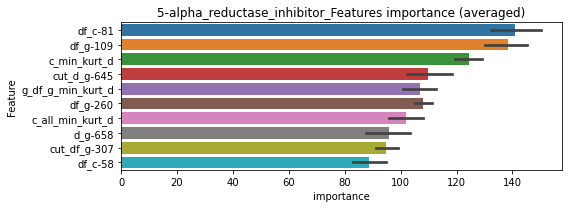

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000325864	valid_1's binary_logloss: 0.00104226
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000325066	valid_1's binary_logloss: 0.00137015
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000342025	valid_1's binary_logloss: 0.000646168
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.0012240535716462216


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000326643	valid_1's binary_logloss: 0.00183698
neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107143	valid_1's binary_logloss: 0.00229734
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00034221	valid_1's binary_logloss: 0.000992091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104808	valid_1's binary_logloss: 0.00251119
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000329551	valid_1's binary_logloss: 0.00107287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108087	valid_1's binary_logloss: 0.00370816
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000344985	valid_1's binary_logloss: 0.00254184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107073	valid_1's binary_logloss: 0.00207207


1 / 3 AUC score:1.000
y_Threshold: 0.0015193, Threshold: 0.0043089, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00302, conf_1:0.00560
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0043089
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0443089


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000342661	valid_1's binary_logloss: 0.000834908


threshold: 0.0443089, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100398	valid_1's binary_logloss: 0.00219893
[600]	training's binary_logloss: 0.000322243	valid_1's binary_logloss: 0.000969612
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000322243	valid_1's binary_logloss: 0.000969612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101449	valid_1's binary_logloss: 0.00224324
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000323446	valid_1's binary_logloss: 0.000978168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102602	valid_1's binary_logloss: 0.00365258
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000343104	valid_1's binary_logloss: 0.00248679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101175	valid_1's binary_logloss: 0.00193

2 / 3 AUC score:1.000
y_Threshold: 0.0311705, Threshold: 0.0443089, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.03545, conf_1:0.05317
threshold: 0.0443089, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000324174	valid_1's binary_logloss: 0.000724268
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000324184	valid_1's binary_logloss: 0.000724249


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100398	valid_1's binary_logloss: 0.00219893
[600]	training's binary_logloss: 0.000322243	valid_1's binary_logloss: 0.000969612
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000322243	valid_1's binary_logloss: 0.000969612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101449	valid_1's binary_logloss: 0.00224324
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000323446	valid_1's binary_logloss: 0.000978168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102602	valid_1's binary_logloss: 0.00365258
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000343104	valid_1's binary_logloss: 0.00248679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101175	valid_1's binary_logloss: 0.00193

3 / 3 AUC score:1.000
y_Threshold: 0.0311705, Threshold: 0.0443089, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.03988, conf_1:0.04874
threshold: 0.0443089, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000324174	valid_1's binary_logloss: 0.000724268
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000324184	valid_1's binary_logloss: 0.000724249


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


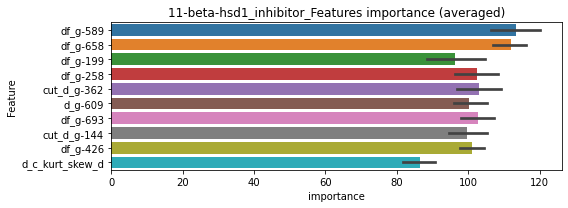

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000327067	valid_1's binary_logloss: 0.00099562


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000331549	valid_1's binary_logloss: 0.000746791


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000329191	valid_1's binary_logloss: 0.0015824


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000328638	valid_1's binary_logloss: 0.000626003


11-beta-hsd1_inhibitor logloss: 0.0009880815389247638


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146057	valid_1's binary_logloss: 0.0075963
[600]	training's binary_logloss: 0.000379182	valid_1's binary_logloss: 0.00485424
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000383711	valid_1's binary_logloss: 0.00483229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149273	valid_1's binary_logloss: 0.00646252
[600]	training's binary_logloss: 0.000383253	valid_1's binary_logloss: 0.00420274
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000387014	valid_1's binary_logloss: 0.00418258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152742	valid_1's binary_logloss: 0.00395974
[600]	training's binary_logloss: 0.000385953	valid_1's binary_logloss: 0.00198324
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000386156	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0019407, Threshold: 0.0047583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00333, conf_1:0.00619
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0047583
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_2: 0.0447583


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000390667	valid_1's binary_logloss: 0.00620338


threshold: 0.0447583, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137446	valid_1's binary_logloss: 0.00679048
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000379295	valid_1's binary_logloss: 0.00441723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142453	valid_1's binary_logloss: 0.00520155
[600]	training's binary_logloss: 0.000374344	valid_1's binary_logloss: 0.00283871
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000374344	valid_1's binary_logloss: 0.00283871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144925	valid_1's binary_logloss: 0.00329773
[600]	training's binary_logloss: 0.000376672	valid_1's binary_logloss: 0.0014687
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000382546	valid_1's binary_logloss: 0.00146619
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0140584, Threshold: 0.0447583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.03581, conf_1:0.05371
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0447583
threshold: 0.0447583, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000394522	valid_1's binary_logloss: 0.00737937


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137446	valid_1's binary_logloss: 0.00679048
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000379295	valid_1's binary_logloss: 0.00441723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142453	valid_1's binary_logloss: 0.00520155
[600]	training's binary_logloss: 0.000374344	valid_1's binary_logloss: 0.00283871
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000374344	valid_1's binary_logloss: 0.00283871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144925	valid_1's binary_logloss: 0.00329773
[600]	training's binary_logloss: 0.000376672	valid_1's binary_logloss: 0.0014687
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000382546	valid_1's binary_logloss: 0.00146619
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0140584, Threshold: 0.0447583, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.04028, conf_1:0.04923
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0447583
threshold: 0.0447583, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000394522	valid_1's binary_logloss: 0.00737937


positive_y_label: 656.0/3806, y_label_rate: 0.1723594


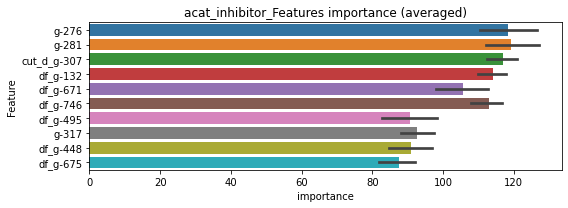

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000386654	valid_1's binary_logloss: 0.00395611


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951


Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000397394	valid_1's binary_logloss: 0.00270377


================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000382466	valid_1's binary_logloss: 0.00179591


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000390037	valid_1's binary_logloss: 0.00606093


acat_inhibitor logloss: 0.0036295210161161238


neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261
target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201853	valid_1's binary_logloss: 0.167678
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.01233	valid_1's binary_logloss: 0.164641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201606	valid_1's binary_logloss: 0.143219
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00523778	valid_1's binary_logloss: 0.136103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195728	valid_1's binary_logloss: 0.150727
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0130347	valid_1's binary_logloss: 0.14677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196525	valid_1's binary_logloss: 0.143392


1 / 3 AUC score:0.962
y_Threshold: 0.0426025, Threshold: 0.2497642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 249 → Positive_corect_labels: 593/3664
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, conf_0:0.17483, conf_1:0.32469


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00770231	valid_1's binary_logloss: 0.137824


threshold: 0.2497642, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 593.0/3664, y_label_rate: 0.1618450
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129385	valid_1's binary_logloss: 0.114209
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00312601	valid_1's binary_logloss: 0.102408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123248	valid_1's binary_logloss: 0.0997007
[600]	training's binary_logloss: 0.00200125	valid_1's binary_logloss: 0.0889941
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00190472	valid_1's binary_logloss: 0.0886611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014292	valid_1's binary_logloss: 0.100441
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00644081	valid_1's binary_logloss: 0.0933411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129292	valid_1's binary_logloss: 0.125014


2 / 3 AUC score:0.993
y_Threshold: 0.0479572, Threshold: 0.2497642, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00251616	valid_1's binary_logloss: 0.116194


Remove_noisy_data: 84 → Positive_corect_labels: 551.0/3580
p_label_rate: 0.0248619 Vs.target_rate: 0.00798
Num_p_label: 99.0, conf_0:0.19981, conf_1:0.29972
Num_p_label: 99.0, Expected: 31.8, Adj_threshold_1: 0.2497642
Num_p_label: 86.0, Expected: 31.8, Adj_threshold_2: 0.2897642
Num_p_label: 80.0, Expected: 31.8, Adj_threshold_3: 0.3297642
Num_p_label: 69.0, Expected: 31.8, Adj_threshold_4: 0.3697642
Num_p_label: 56.0, Expected: 31.8, Adj_threshold_5: 0.4097642
Num_p_label: 48.0, Expected: 31.8, Adj_threshold_6: 0.4497642
Num_p_label: 41.0, Expected: 31.8, Adj_threshold_7: 0.4897642
threshold: 0.4897642, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 551.0/3580, y_label_rate: 0.1539106
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00943029	valid_1's binary_logloss: 0.0784859
[600]	training's binary_logloss: 0.00158476	valid_1's binary_logloss: 0.0651976
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00142163	valid_1's binary_logloss: 0.0643501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00934665	valid_1's binary_logloss: 0.0729463
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00223706	valid_1's binary_logloss: 0.0603741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102582	valid_1's binary_logloss: 0.0647704
[600]	training's binary_logloss: 0.00170984	valid_1's binary_logloss: 0.0503614
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.0011926	valid_1's binary_logloss: 0.0485356
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.0493550, Threshold: 0.4897642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 539.0/3556
p_label_rate: 0.0097941 Vs.target_rate: 0.00798
Num_p_label: 39.0, conf_0:0.44079, conf_1:0.53874
threshold: 0.4897642, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 539.0/3556, y_label_rate: 0.1515748


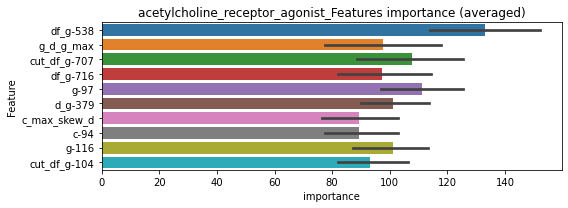

len(train_index) : 2667
len(valid_index) : 889
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2667
len(valid_index) : 889
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00364256	valid_1's binary_logloss: 0.0745085
Training until validation scores don't improve for 30 rounds


len(train_index) : 2667
len(valid_index) : 889
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00270985	valid_1's binary_logloss: 0.0561578
Training until validation scores don't improve for 30 rounds


len(train_index) : 2667
len(valid_index) : 889
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00195159	valid_1's binary_logloss: 0.0426073
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_agonist logloss: 0.05952545076771753


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.0020426	valid_1's binary_logloss: 0.0648282
neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241
target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0390467	valid_1's binary_logloss: 0.255797
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.0354961	valid_1's binary_logloss: 0.254619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0471601	valid_1's binary_logloss: 0.279096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372049	valid_1's binary_logloss: 0.246603
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0374357	valid_1's binary_logloss: 0.246554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0386482	valid_1's binary_logloss: 0.253551


1 / 3 AUC score:0.879
y_Threshold: 0.0912607, Threshold: 0.1801359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 446 → Positive_corect_labels: 490/3443
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.12610, conf_1:0.23418
threshold: 0.1801359, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.0360484	valid_1's binary_logloss: 0.252877


positive_y_label: 490.0/3443, y_label_rate: 0.1423177
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158067	valid_1's binary_logloss: 0.155071
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00476246	valid_1's binary_logloss: 0.151369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167069	valid_1's binary_logloss: 0.109529
[600]	training's binary_logloss: 0.00267478	valid_1's binary_logloss: 0.094801
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00256096	valid_1's binary_logloss: 0.0946142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160444	valid_1's binary_logloss: 0.144591
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00794307	valid_1's binary_logloss: 0.139888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158192	valid_1's binary_logloss: 0.162741


2 / 3 AUC score:0.981
y_Threshold: 0.0556009, Threshold: 0.1801359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 442.0/3347
p_label_rate: 0.0080362 Vs.target_rate: 0.01264
Num_p_label: 32.0, conf_0:0.14411, conf_1:0.21616
Num_p_label: 32.0, Expected: 50.3, Adj_threshold_1: 0.1801359
Num_p_label: 45.0, Expected: 50.3, Adj_threshold_2: 0.1501359


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00909358	valid_1's binary_logloss: 0.160599


threshold: 0.1501359, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 442.0/3347, y_label_rate: 0.1320586
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117347	valid_1's binary_logloss: 0.123669
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.0034071	valid_1's binary_logloss: 0.116296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120756	valid_1's binary_logloss: 0.105774
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0039575	valid_1's binary_logloss: 0.0942846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013201	valid_1's binary_logloss: 0.0855033
[600]	training's binary_logloss: 0.00214026	valid_1's binary_logloss: 0.0729988
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00155528	valid_1's binary_logloss: 0.0718021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113248	valid_1's binary_logloss: 0.119074


3 / 3 AUC score:0.996
y_Threshold: 0.0543603, Threshold: 0.1501359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 422.0/3307
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.13512, conf_1:0.16515


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00388506	valid_1's binary_logloss: 0.108898


threshold: 0.1501359, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 422.0/3307, y_label_rate: 0.1276081


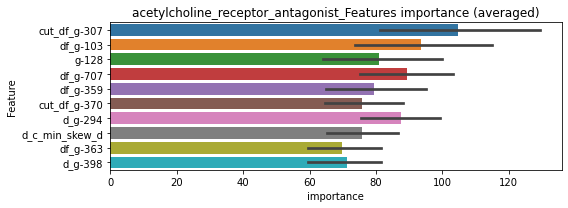

len(train_index) : 2480
len(valid_index) : 827
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2480
len(valid_index) : 827
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00693291	valid_1's binary_logloss: 0.10707
Training until validation scores don't improve for 30 rounds


len(train_index) : 2480
len(valid_index) : 827
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00442388	valid_1's binary_logloss: 0.0835744
Training until validation scores don't improve for 30 rounds


len(train_index) : 2481
len(valid_index) : 826
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00321662	valid_1's binary_logloss: 0.0762376
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.09481344599483675


Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00993355	valid_1's binary_logloss: 0.112393
neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618626	valid_1's binary_logloss: 0.0547933
[600]	training's binary_logloss: 0.00103454	valid_1's binary_logloss: 0.044124
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000983337	valid_1's binary_logloss: 0.0439686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068992	valid_1's binary_logloss: 0.0398669
[600]	training's binary_logloss: 0.00111235	valid_1's binary_logloss: 0.0287529
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000730236	valid_1's binary_logloss: 0.0277022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727213	valid_1's binary_logloss: 0.0251921
[600]	training's binary_logloss: 0.00115257	valid_1's binary_logloss: 0.0142489
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00106717	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0108789, Threshold: 0.0348986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795


Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00234363	valid_1's binary_logloss: 0.0560204


p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02443, conf_1:0.04537
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0348986
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_2: 0.0748986
threshold: 0.0748986, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563351	valid_1's binary_logloss: 0.0439048
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00112212	valid_1's binary_logloss: 0.0378813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598787	valid_1's binary_logloss: 0.0311826
[600]	training's binary_logloss: 0.0010187	valid_1's binary_logloss: 0.0204525
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000959595	valid_1's binary_logloss: 0.0201274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602714	valid_1's binary_logloss: 0.046852
[600]	training's binary_logloss: 0.0010303	valid_1's binary_logloss: 0.0360554
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000939653	valid_1's binary_logloss: 0.0359673
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0390290, Threshold: 0.0748986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05992, conf_1:0.08988
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0748986
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1148986
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_3: 0.1548986
threshold: 0.1548986, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 644.0/3781, y_label_rate: 0.1703253
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555375	valid_1's binary_logloss: 0.0370029
[600]	training's binary_logloss: 0.000967278	valid_1's binary_logloss: 0.0271585
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000891475	valid_1's binary_logloss: 0.0269809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547001	valid_1's binary_logloss: 0.0298107
[600]	training's binary_logloss: 0.000976635	valid_1's binary_logloss: 0.0214877
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000902995	valid_1's binary_logloss: 0.0210953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568167	valid_1's binary_logloss: 0.029811
[600]	training's binary_logloss: 0.00100523	valid_1's binary_logloss: 0.0204741
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000694807	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0399656, Threshold: 0.1548986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0027624 Vs.target_rate: 0.00307
Num_p_label: 11.0, conf_0:0.13941, conf_1:0.17039
threshold: 0.1548986, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 640.0/3773, y_label_rate: 0.1696263


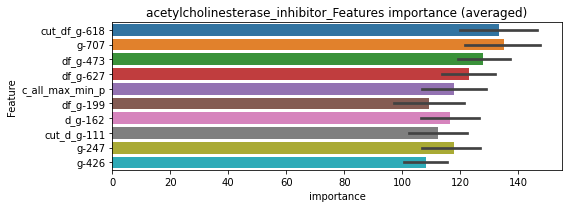

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000918782	valid_1's binary_logloss: 0.0220022


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00132408	valid_1's binary_logloss: 0.0376082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000711357	valid_1's binary_logloss: 0.0124979


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000748334	valid_1's binary_logloss: 0.0110797


acetylcholinesterase_inhibitor logloss: 0.02079733368003072


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345525	valid_1's binary_logloss: 0.0221111
[600]	training's binary_logloss: 0.000675522	valid_1's binary_logloss: 0.0152307
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000571486	valid_1's binary_logloss: 0.0147862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376558	valid_1's binary_logloss: 0.0105791
[600]	training's binary_logloss: 0.000712521	valid_1's binary_logloss: 0.0047454
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000570925	valid_1's binary_logloss: 0.00452399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370591	valid_1's binary_logloss: 0.0169291
[600]	training's binary_logloss: 0.000687492	valid_1's binary_logloss: 0.0104375
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000552309	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0040850, Threshold: 0.0138796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00972, conf_1:0.01804
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0138796
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_2: 0.0538796
threshold: 0.0538796, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334616	valid_1's binary_logloss: 0.0217676
[600]	training's binary_logloss: 0.000659527	valid_1's binary_logloss: 0.0144349
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000533479	valid_1's binary_logloss: 0.0140319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366618	valid_1's binary_logloss: 0.0111229
[600]	training's binary_logloss: 0.000691123	valid_1's binary_logloss: 0.00487591
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000544923	valid_1's binary_logloss: 0.00451347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348642	valid_1's binary_logloss: 0.013777
[600]	training's binary_logloss: 0.000664226	valid_1's binary_logloss: 0.00740938
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000547918	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0175509, Threshold: 0.0538796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0032647 Vs.target_rate: 0.00227
Num_p_label: 13.0, conf_0:0.04310, conf_1:0.06466
threshold: 0.0538796, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00337119	valid_1's binary_logloss: 0.0217851
[600]	training's binary_logloss: 0.000651875	valid_1's binary_logloss: 0.0144942
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000537633	valid_1's binary_logloss: 0.0140869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370119	valid_1's binary_logloss: 0.00870577
[600]	training's binary_logloss: 0.000685517	valid_1's binary_logloss: 0.00301594
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000553246	valid_1's binary_logloss: 0.00273864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354566	valid_1's binary_logloss: 0.0094437
[600]	training's binary_logloss: 0.00068438	valid_1's binary_logloss: 0.00333214
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000536415	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0269739, Threshold: 0.0538796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0030136 Vs.target_rate: 0.00227
Num_p_label: 12.0, conf_0:0.04849, conf_1:0.05927
threshold: 0.0538796, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3799, y_label_rate: 0.1721506


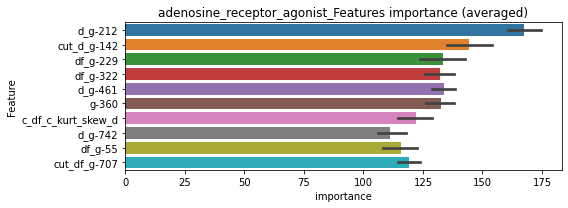

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000574555	valid_1's binary_logloss: 0.0146608


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000610693	valid_1's binary_logloss: 0.00443292


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558794	valid_1's binary_logloss: 0.00321105
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000536433	valid_1's binary_logloss: 0.00315205


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.008757223371666364


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000825885	valid_1's binary_logloss: 0.0127833
neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868792	valid_1's binary_logloss: 0.0658519
[600]	training's binary_logloss: 0.00137304	valid_1's binary_logloss: 0.0542474
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00100194	valid_1's binary_logloss: 0.0532446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888727	valid_1's binary_logloss: 0.04782
[600]	training's binary_logloss: 0.00141503	valid_1's binary_logloss: 0.0331871
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000906906	valid_1's binary_logloss: 0.0315989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894607	valid_1's binary_logloss: 0.0654831
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00190019	valid_1's binary_logloss: 0.0572546
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.995
y_Threshold: 0.0103630, Threshold: 0.0360580, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00209524	valid_1's binary_logloss: 0.0614772


Remove_noisy_data: 152 → Positive_corect_labels: 645/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.02524, conf_1:0.04688
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0360580
Num_p_label: 9.0, Expected: 16.1, Adj_threshold_2: 0.0760580
threshold: 0.0760580, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00766395	valid_1's binary_logloss: 0.0467211
[600]	training's binary_logloss: 0.00126296	valid_1's binary_logloss: 0.0338764
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000824775	valid_1's binary_logloss: 0.0325944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737971	valid_1's binary_logloss: 0.0565124
[600]	training's binary_logloss: 0.00122354	valid_1's binary_logloss: 0.0408795
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000800063	valid_1's binary_logloss: 0.0394835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00778721	valid_1's binary_logloss: 0.0437165
[600]	training's binary_logloss: 0.00129963	valid_1's binary_logloss: 0.030196
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000759154	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0246316, Threshold: 0.0760580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0062783 Vs.target_rate: 0.00403
Num_p_label: 25.0, conf_0:0.06085, conf_1:0.09127
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_1: 0.0760580
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.1160580
threshold: 0.1160580, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00758822	valid_1's binary_logloss: 0.0420977
[600]	training's binary_logloss: 0.00123445	valid_1's binary_logloss: 0.0250434
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000851029	valid_1's binary_logloss: 0.0237065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740311	valid_1's binary_logloss: 0.0415183
[600]	training's binary_logloss: 0.00122328	valid_1's binary_logloss: 0.028608
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000824845	valid_1's binary_logloss: 0.0274078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720884	valid_1's binary_logloss: 0.0391409
[600]	training's binary_logloss: 0.00120164	valid_1's binary_logloss: 0.0276011
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000994219	valid_1's binary_logloss: 

3 / 3 AUC score:0.999
y_Threshold: 0.0253892, Threshold: 0.1160580, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00148122	valid_1's binary_logloss: 0.0471621


Remove_noisy_data: 10 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0025113 Vs.target_rate: 0.00403
Num_p_label: 10.0, conf_0:0.10445, conf_1:0.12766
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_1: 0.1160580
threshold: 0.1160580, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 632.0/3753, y_label_rate: 0.1683986


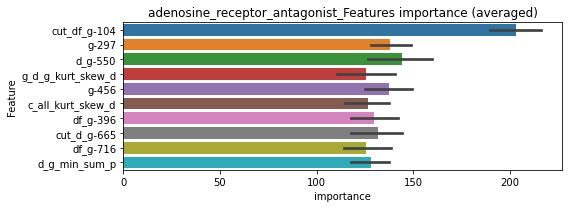

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00101883	valid_1's binary_logloss: 0.0298056


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00153624	valid_1's binary_logloss: 0.0321161
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00149798	valid_1's binary_logloss: 0.0280534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00110109	valid_1's binary_logloss: 0.0272285


adenosine_receptor_antagonist logloss: 0.029301027111006905


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001106	valid_1's binary_logloss: 0.0018619
[600]	training's binary_logloss: 0.000341401	valid_1's binary_logloss: 0.000691413
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000341401	valid_1's binary_logloss: 0.000691413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106236	valid_1's binary_logloss: 0.00346854
[600]	training's binary_logloss: 0.000337241	valid_1's binary_logloss: 0.00178059
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000337241	valid_1's binary_logloss: 0.00178059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109155	valid_1's binary_logloss: 0.00204189
[600]	training's binary_logloss: 0.000339504	valid_1's binary_logloss: 0.000839347
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000339504	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0018043, Threshold: 0.0134053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00938, conf_1:0.01743
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0134053
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0534053
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0934053


[600]	training's binary_logloss: 0.000339453	valid_1's binary_logloss: 0.00160568
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000339453	valid_1's binary_logloss: 0.00160568


threshold: 0.0934053, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000997673	valid_1's binary_logloss: 0.0017339
[600]	training's binary_logloss: 0.000321273	valid_1's binary_logloss: 0.000645339
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000318427	valid_1's binary_logloss: 0.00063985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000981686	valid_1's binary_logloss: 0.0023762
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000330198	valid_1's binary_logloss: 0.00113223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100442	valid_1's binary_logloss: 0.00152554
[600]	training's binary_logloss: 0.000327116	valid_1's binary_logloss: 0.000560219
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000327116	valid_1's binary_logloss: 0.000560219
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.0660268, Threshold: 0.0934053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0120542 Vs.target_rate: 0.00076
Num_p_label: 48.0, conf_0:0.07472, conf_1:0.11209
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_1: 0.0934053
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_2: 0.1334053
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_3: 0.1734053
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_4: 0.2134053
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2534053
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2934053
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.3334053
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_8: 0.3734053


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000326248	valid_1's binary_logloss: 0.00197552


threshold: 0.3734053, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000997673	valid_1's binary_logloss: 0.0017339
[600]	training's binary_logloss: 0.000321273	valid_1's binary_logloss: 0.000645339
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000318427	valid_1's binary_logloss: 0.00063985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000981686	valid_1's binary_logloss: 0.0023762
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000330198	valid_1's binary_logloss: 0.00113223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100442	valid_1's binary_logloss: 0.00152554
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000327116	valid_1's binary_logloss: 0.000560219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000998009	valid_1's binary_logloss: 0.00324

3 / 3 AUC score:1.000
y_Threshold: 0.0660268, Threshold: 0.3734053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.33606, conf_1:0.41075
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.3734053
threshold: 0.3734053, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000326248	valid_1's binary_logloss: 0.00197552


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


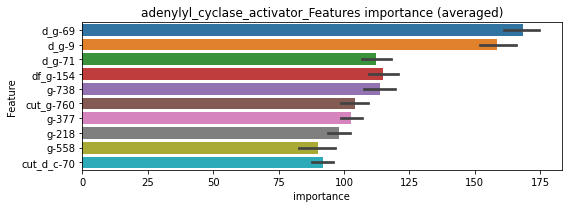

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318794	valid_1's binary_logloss: 0.000746764
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000318794	valid_1's binary_logloss: 0.000746764


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000322929	valid_1's binary_logloss: 0.00100341


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.00033663	valid_1's binary_logloss: 0.000586902


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000326892	valid_1's binary_logloss: 0.00129382


adenylyl_cyclase_activator logloss: 0.0009078767862441017


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254
target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318077	valid_1's binary_logloss: 0.225128
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0211468	valid_1's binary_logloss: 0.221747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0416825	valid_1's binary_logloss: 0.253679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0327276	valid_1's binary_logloss: 0.216181
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.021437	valid_1's binary_logloss: 0.21317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0341659	valid_1's binary_logloss: 0.22261
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0366635	valid_1's binary_logloss: 0.221975


1 / 3 AUC score:0.912
y_Threshold: 0.0813307, Threshold: 0.5017210, pos_neg_ratio: 0.8000000
Remove_noisy_data: 387 → Positive_corect_labels: 522/3517
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, conf_0:0.35120, conf_1:0.65224
threshold: 0.5017210, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 522.0/3517, y_label_rate: 0.1484220
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147683	valid_1's binary_logloss: 0.142137
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00771995	valid_1's binary_logloss: 0.136606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169967	valid_1's binary_logloss: 0.113397
[600]	training's binary_logloss: 0.0026928	valid_1's binary_logloss: 0.103597
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00246927	valid_1's binary_logloss: 0.103163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147996	valid_1's binary_logloss: 0.15716
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00987652	valid_1's binary_logloss: 0.153862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155668	valid_1's binary_logloss: 0.141105


2 / 3 AUC score:0.981
y_Threshold: 0.0769195, Threshold: 0.5017210, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 463.0/3399
p_label_rate: 0.0369161 Vs.target_rate: 0.01134
Num_p_label: 147.0, conf_0:0.40138, conf_1:0.60207
Num_p_label: 147.0, Expected: 45.1, Adj_threshold_1: 0.5017210
Num_p_label: 138.0, Expected: 45.1, Adj_threshold_2: 0.5417210
Num_p_label: 132.0, Expected: 45.1, Adj_threshold_3: 0.5817210


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00715462	valid_1's binary_logloss: 0.135315


Num_p_label: 122.0, Expected: 45.1, Adj_threshold_4: 0.6217210
Num_p_label: 107.0, Expected: 45.1, Adj_threshold_5: 0.6617210
Num_p_label: 98.0, Expected: 45.1, Adj_threshold_6: 0.7017210
Num_p_label: 92.0, Expected: 45.1, Adj_threshold_7: 0.7417210
Num_p_label: 79.0, Expected: 45.1, Adj_threshold_8: 0.7817210
Num_p_label: 62.0, Expected: 45.1, Adj_threshold_9: 0.8217210
threshold: 0.8217210, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 463.0/3399, y_label_rate: 0.1362165
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969097	valid_1's binary_logloss: 0.101042
[600]	training's binary_logloss: 0.00170169	valid_1's binary_logloss: 0.0863676
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00162477	valid_1's binary_logloss: 0.0862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966057	valid_1's binary_logloss: 0.104631
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00576641	valid_1's binary_logloss: 0.100726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102009	valid_1's binary_logloss: 0.0999309
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00322844	valid_1's binary_logloss: 0.0938757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987054	valid_1's binary_logloss: 0.0887907


3 / 3 AUC score:0.996


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00201159	valid_1's binary_logloss: 0.0803059


y_Threshold: 0.0632745, Threshold: 0.8217210, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 431.0/3335
p_label_rate: 0.0449523 Vs.target_rate: 0.01134
Num_p_label: 179.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 179.0, Expected: 45.1, Adj_threshold_1: 0.8217210
Num_p_label: 157.0, Expected: 45.1, Adj_threshold_2: 0.8617210
threshold: 0.8617210, positive_p_label: 157.0/3982, p_label_rate: 0.0394274
positive_y_label: 431.0/3335, y_label_rate: 0.1292354


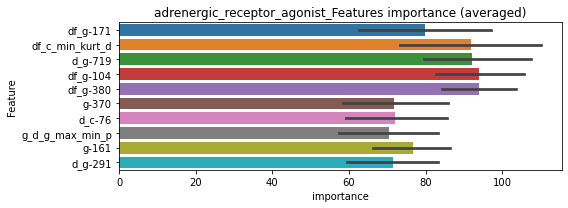

len(train_index) : 2501
len(valid_index) : 834
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2501
len(valid_index) : 834
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00365632	valid_1's binary_logloss: 0.0848888
Training until validation scores don't improve for 30 rounds


len(train_index) : 2501
len(valid_index) : 834
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00741009	valid_1's binary_logloss: 0.0929241
Training until validation scores don't improve for 30 rounds


len(train_index) : 2502
len(valid_index) : 833
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00165172	valid_1's binary_logloss: 0.0627895
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.08046922141180428


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00210447	valid_1's binary_logloss: 0.0812754
neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240
target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[227]	training's binary_logloss: 0.0690196	valid_1's binary_logloss: 0.311592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0439583	valid_1's binary_logloss: 0.293133
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0447949	valid_1's binary_logloss: 0.292852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040982	valid_1's binary_logloss: 0.27507
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.0428658	valid_1's binary_logloss: 0.274444
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.854
y_Threshold: 0.1117089, Threshold: 0.6945337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 528 → Positive_corect_labels: 449/3360
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, conf_0:0.48617, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.6945337


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0587479	valid_1's binary_logloss: 0.288083


Num_p_label: 53.0, Expected: 60.2, Adj_threshold_2: 0.6645337
threshold: 0.6645337, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 449.0/3360, y_label_rate: 0.1336310
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.018093	valid_1's binary_logloss: 0.164514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143634	valid_1's binary_logloss: 0.165327
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0142498	valid_1's binary_logloss: 0.165295
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0220511	valid_1's binary_logloss: 0.170142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149575	valid_1's binary_logloss: 0.130294


2 / 3 AUC score:0.969
y_Threshold: 0.0754113, Threshold: 0.6645337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 386.0/3234
p_label_rate: 0.0341537 Vs.target_rate: 0.01512
Num_p_label: 136.0, conf_0:0.50000, conf_1:0.79744
Num_p_label: 136.0, Expected: 60.2, Adj_threshold_1: 0.6645337


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00416966	valid_1's binary_logloss: 0.12216


Num_p_label: 130.0, Expected: 60.2, Adj_threshold_2: 0.7045337
Num_p_label: 123.0, Expected: 60.2, Adj_threshold_3: 0.7445337
Num_p_label: 106.0, Expected: 60.2, Adj_threshold_4: 0.7845337
Num_p_label: 98.0, Expected: 60.2, Adj_threshold_5: 0.8245337
Num_p_label: 76.0, Expected: 60.2, Adj_threshold_6: 0.8645337
threshold: 0.8645337, positive_p_label: 76.0/3982, p_label_rate: 0.0190859
positive_y_label: 386.0/3234, y_label_rate: 0.1193568
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00880632	valid_1's binary_logloss: 0.122349
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00465534	valid_1's binary_logloss: 0.119229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927152	valid_1's binary_logloss: 0.108511
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00280578	valid_1's binary_logloss: 0.102917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00942365	valid_1's binary_logloss: 0.10426
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.0026607	valid_1's binary_logloss: 0.0996037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00932642	valid_1's binary_logloss: 0.0995887


3 / 3 AUC score:0.991
y_Threshold: 0.0448080, Threshold: 0.8645337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 356.0/3174


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00220075	valid_1's binary_logloss: 0.0904117


p_label_rate: 0.0436966 Vs.target_rate: 0.01512
Num_p_label: 174.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 174.0, Expected: 60.2, Adj_threshold_1: 0.8645337
threshold: 0.8645337, positive_p_label: 174.0/3982, p_label_rate: 0.0436966
positive_y_label: 356.0/3174, y_label_rate: 0.1121613


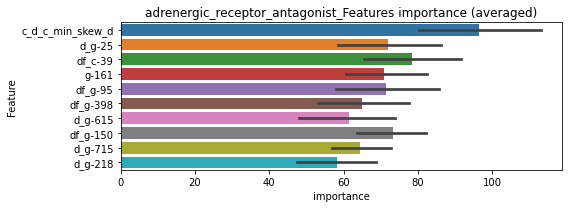

len(train_index) : 2380
len(valid_index) : 794
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2380
len(valid_index) : 794
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00446723	valid_1's binary_logloss: 0.117481
Training until validation scores don't improve for 30 rounds


len(train_index) : 2381
len(valid_index) : 793
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00561556	valid_1's binary_logloss: 0.114842
Training until validation scores don't improve for 30 rounds


len(train_index) : 2381
len(valid_index) : 793
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[188]	training's binary_logloss: 0.00648131	valid_1's binary_logloss: 0.0834483
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.10373379865313566


Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00752379	valid_1's binary_logloss: 0.0991326
neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284
target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531813	valid_1's binary_logloss: 0.0533226
[600]	training's binary_logloss: 0.000901509	valid_1's binary_logloss: 0.0431481
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000726065	valid_1's binary_logloss: 0.0423638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520117	valid_1's binary_logloss: 0.0372544
[600]	training's binary_logloss: 0.000914739	valid_1's binary_logloss: 0.0275833
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000840698	valid_1's binary_logloss: 0.0274034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578033	valid_1's binary_logloss: 0.0146443
[600]	training's binary_logloss: 0.000966933	valid_1's binary_logloss: 0.00544943
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000645413	valid_1's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0067519, Threshold: 0.0256040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00124212	valid_1's binary_logloss: 0.0379266


p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, conf_0:0.01792, conf_1:0.03329
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0256040
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.0656040
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_3: 0.1056040
Num_p_label: 13.0, Expected: 11.0, Adj_threshold_4: 0.1456040
threshold: 0.1456040, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488438	valid_1's binary_logloss: 0.0245306
[600]	training's binary_logloss: 0.000872853	valid_1's binary_logloss: 0.014535
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000594548	valid_1's binary_logloss: 0.0137957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464189	valid_1's binary_logloss: 0.0361518
[600]	training's binary_logloss: 0.000842142	valid_1's binary_logloss: 0.0269545
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000626361	valid_1's binary_logloss: 0.0259493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486171	valid_1's binary_logloss: 0.020221
[600]	training's binary_logloss: 0.000880517	valid_1's binary_logloss: 0.0122958
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00064414	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0192118, Threshold: 0.1456040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0060271 Vs.target_rate: 0.00277
Num_p_label: 24.0, conf_0:0.11648, conf_1:0.17472
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.1456040
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1856040
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_3: 0.2256040
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_4: 0.2656040
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_5: 0.3056040
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_6: 0.3456040
threshold: 0.3456040, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3794, y_label_rate: 0.1710596
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475918	valid_1's binary_logloss: 0.0324727
[600]	training's binary_logloss: 0.000842539	valid_1's binary_logloss: 0.0236204
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000697711	valid_1's binary_logloss: 0.0228488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453015	valid_1's binary_logloss: 0.0265737
[600]	training's binary_logloss: 0.000849734	valid_1's binary_logloss: 0.0169741
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000629313	valid_1's binary_logloss: 0.0161708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470892	valid_1's binary_logloss: 0.0157812
[600]	training's binary_logloss: 0.000863356	valid_1's binary_logloss: 0.00714425
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000596885	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0211590, Threshold: 0.3456040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0025113 Vs.target_rate: 0.00277
Num_p_label: 10.0, conf_0:0.31104, conf_1:0.38016
threshold: 0.3456040, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 646.0/3788, y_label_rate: 0.1705385


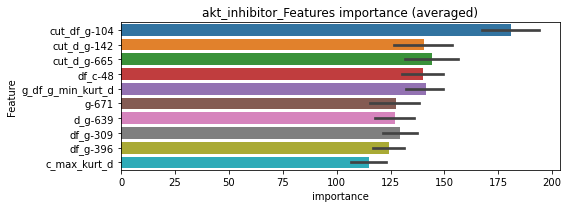

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000863346	valid_1's binary_logloss: 0.0197889


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 akt_inhibitor=================================


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000971452	valid_1's binary_logloss: 0.0150373
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000880427	valid_1's binary_logloss: 0.0159076


================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


akt_inhibitor logloss: 0.018856056421667138


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000994618	valid_1's binary_logloss: 0.0246904
neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116535	valid_1's binary_logloss: 0.00283592
[600]	training's binary_logloss: 0.000331912	valid_1's binary_logloss: 0.00125804
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000330983	valid_1's binary_logloss: 0.00125714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115003	valid_1's binary_logloss: 0.00359364
[600]	training's binary_logloss: 0.000331737	valid_1's binary_logloss: 0.00166437
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000330676	valid_1's binary_logloss: 0.0016606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120069	valid_1's binary_logloss: 0.00214549
[600]	training's binary_logloss: 0.000337586	valid_1's binary_logloss: 0.000780903
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000334892	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0017977, Threshold: 0.0063483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00444, conf_1:0.00825
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0063483
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0463483
threshold: 0.0463483, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110649	valid_1's binary_logloss: 0.00244471
[600]	training's binary_logloss: 0.000323385	valid_1's binary_logloss: 0.00114574
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000322879	valid_1's binary_logloss: 0.00114391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107365	valid_1's binary_logloss: 0.00410128
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000325292	valid_1's binary_logloss: 0.00219515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110905	valid_1's binary_logloss: 0.00184992
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000326599	valid_1's binary_logloss: 0.000622234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108812	valid_1's binary_logloss: 0.0021099

2 / 3 AUC score:1.000
y_Threshold: 0.1089196, Threshold: 0.0463483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, conf_0:0.03708, conf_1:0.05562
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0463483
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0863483


[600]	training's binary_logloss: 0.000320065	valid_1's binary_logloss: 0.000856555
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000320289	valid_1's binary_logloss: 0.000856076


threshold: 0.0863483, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110649	valid_1's binary_logloss: 0.00244471
[600]	training's binary_logloss: 0.000323385	valid_1's binary_logloss: 0.00114574
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000322879	valid_1's binary_logloss: 0.00114391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107365	valid_1's binary_logloss: 0.00410128
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000325292	valid_1's binary_logloss: 0.00219515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110905	valid_1's binary_logloss: 0.00184992
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000326599	valid_1's binary_logloss: 0.000622234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108812	valid_1's binary_logloss: 0.0021099

3 / 3 AUC score:1.000
y_Threshold: 0.1089196, Threshold: 0.0863483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, conf_0:0.07771, conf_1:0.09498


[600]	training's binary_logloss: 0.000320065	valid_1's binary_logloss: 0.000856555
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000320289	valid_1's binary_logloss: 0.000856076


Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0863483
threshold: 0.0863483, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


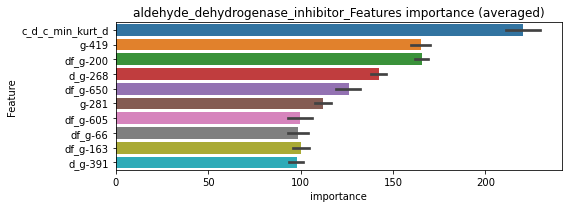

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324503	valid_1's binary_logloss: 0.000983055
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000324909	valid_1's binary_logloss: 0.000982826


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000322504	valid_1's binary_logloss: 0.00175322
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000322532	valid_1's binary_logloss: 0.00175308


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000322524	valid_1's binary_logloss: 0.000609353
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000322367	valid_1's binary_logloss: 0.000609103


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323308	valid_1's binary_logloss: 0.000887759
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.00032302	valid_1's binary_logloss: 0.000887318


aldehyde_dehydrogenase_inhibitor logloss: 0.001058172803119736


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313158	valid_1's binary_logloss: 0.0174674
[600]	training's binary_logloss: 0.000603893	valid_1's binary_logloss: 0.0103767
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000565082	valid_1's binary_logloss: 0.010199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285169	valid_1's binary_logloss: 0.0180804
[600]	training's binary_logloss: 0.000579377	valid_1's binary_logloss: 0.0119534
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000554877	valid_1's binary_logloss: 0.0118801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032068	valid_1's binary_logloss: 0.00954513
[600]	training's binary_logloss: 0.000623102	valid_1's binary_logloss: 0.00481228
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000531547	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0041082, Threshold: 0.0148240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01038, conf_1:0.01927
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0148240
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.0548240
threshold: 0.0548240, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283925	valid_1's binary_logloss: 0.0182133
[600]	training's binary_logloss: 0.000573621	valid_1's binary_logloss: 0.0109069
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000515643	valid_1's binary_logloss: 0.0107636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274791	valid_1's binary_logloss: 0.0168255
[600]	training's binary_logloss: 0.000562035	valid_1's binary_logloss: 0.0113877
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000555661	valid_1's binary_logloss: 0.0113769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289888	valid_1's binary_logloss: 0.00824159
[600]	training's binary_logloss: 0.000586253	valid_1's binary_logloss: 0.00373014
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000531185	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0232115, Threshold: 0.0548240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00176
Num_p_label: 28.0, conf_0:0.04386, conf_1:0.06579
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_1: 0.0548240
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_2: 0.0948240
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_3: 0.1348240
threshold: 0.1348240, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275445	valid_1's binary_logloss: 0.0153069
[600]	training's binary_logloss: 0.000569672	valid_1's binary_logloss: 0.00996393
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000547335	valid_1's binary_logloss: 0.00988664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271127	valid_1's binary_logloss: 0.0202742
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000927927	valid_1's binary_logloss: 0.017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284263	valid_1's binary_logloss: 0.00711569
[600]	training's binary_logloss: 0.000585656	valid_1's binary_logloss: 0.00366534
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000526952	valid_1's binary_logloss: 0.00358458
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0245617, Threshold: 0.1348240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, conf_0:0.12134, conf_1:0.14831
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.1348240
threshold: 0.1348240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


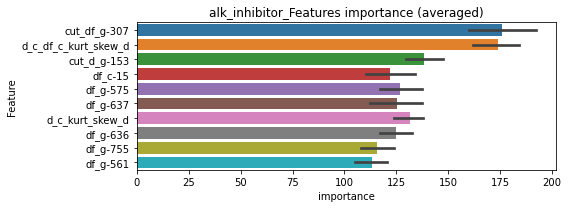

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000550842	valid_1's binary_logloss: 0.0100631


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000604124	valid_1's binary_logloss: 0.00479273


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000594639	valid_1's binary_logloss: 0.00467748


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000539175	valid_1's binary_logloss: 0.00515467


alk_inhibitor logloss: 0.006172696469363036


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648747	valid_1's binary_logloss: 0.00142548
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000264378	valid_1's binary_logloss: 0.000768736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000639464	valid_1's binary_logloss: 0.00385499
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000285291	valid_1's binary_logloss: 0.0031109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661558	valid_1's binary_logloss: 0.000995871
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000273788	valid_1's binary_logloss: 0.000470796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000640775	valid_1's binary_logloss: 0.00285764


1 / 3 AUC score:1.000
y_Threshold: 0.0010396, Threshold: 0.0038224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00268, conf_1:0.00497
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0038224
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0438224


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000267483	valid_1's binary_logloss: 0.00173186


threshold: 0.0438224, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000590672	valid_1's binary_logloss: 0.00172307
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00025651	valid_1's binary_logloss: 0.00111567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594386	valid_1's binary_logloss: 0.00341012
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000254599	valid_1's binary_logloss: 0.0028516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060134	valid_1's binary_logloss: 0.000698256
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000258029	valid_1's binary_logloss: 0.000308343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596769	valid_1's binary_logloss: 0.0017285


2 / 3 AUC score:1.000
y_Threshold: 0.0340904, Threshold: 0.0438224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, conf_0:0.03506, conf_1:0.05259
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0438224


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000254172	valid_1's binary_logloss: 0.000990371


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0838224
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1238224
threshold: 0.1238224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000590672	valid_1's binary_logloss: 0.00172307
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00025651	valid_1's binary_logloss: 0.00111567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594386	valid_1's binary_logloss: 0.00341012
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000254599	valid_1's binary_logloss: 0.0028516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060134	valid_1's binary_logloss: 0.000698256
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000258029	valid_1's binary_logloss: 0.000308343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596769	valid_1's binary_logloss: 0.0017285


3 / 3 AUC score:1.000
y_Threshold: 0.0340904, Threshold: 0.1238224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.11144, conf_1:0.13620
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.1238224
threshold: 0.1238224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000254172	valid_1's binary_logloss: 0.000990371


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


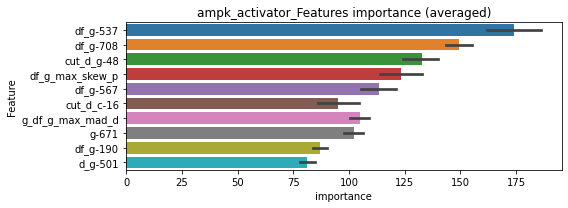

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000260873	valid_1's binary_logloss: 0.000511804
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000278525	valid_1's binary_logloss: 0.0027939
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000261813	valid_1's binary_logloss: 0.000335755
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010673815393850003


Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000257198	valid_1's binary_logloss: 0.000628654
neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700206	valid_1's binary_logloss: 0.00160044
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000280983	valid_1's binary_logloss: 0.000842034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000692815	valid_1's binary_logloss: 0.00147624
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000280148	valid_1's binary_logloss: 0.000708393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000720268	valid_1's binary_logloss: 0.00106438
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000283898	valid_1's binary_logloss: 0.000465684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000718352	valid_1's binary_logloss: 0.00108232


1 / 3 AUC score:1.000
y_Threshold: 0.0012578, Threshold: 0.0186588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01306, conf_1:0.02426
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0186588
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0586588
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.0986588
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.1386588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1786588
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_6: 0.2186588


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000282129	valid_1's binary_logloss: 0.000458965


threshold: 0.2186588, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637005	valid_1's binary_logloss: 0.00130992
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000263736	valid_1's binary_logloss: 0.000645886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000635596	valid_1's binary_logloss: 0.00100495
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265582	valid_1's binary_logloss: 0.000473234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644963	valid_1's binary_logloss: 0.000772402
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000267293	valid_1's binary_logloss: 0.000328334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644416	valid_1's binary_logloss: 0.000963472


2 / 3 AUC score:1.000
y_Threshold: 0.1565482, Threshold: 0.2186588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050
Num_p_label: 14.0, conf_0:0.17493, conf_1:0.26239
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.2186588


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000269618	valid_1's binary_logloss: 0.000442559


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.2586588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.2986588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.3386588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.3786588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.4186588
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.4586588
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.4986588
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.5386588
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.5786588
threshold: 0.5786588, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637005	valid_1's binary_logloss: 0.00130992
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000263736	valid_1's binary_logloss: 0.000645886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000635596	valid_1's binary_logloss: 0.00100495
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265582	valid_1's binary_logloss: 0.000473234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644963	valid_1's binary_logloss: 0.000772402
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000267293	valid_1's binary_logloss: 0.000328334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000644416	valid_1's binary_logloss: 0.000963472


3 / 3 AUC score:1.000
y_Threshold: 0.1565482, Threshold: 0.5786588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, conf_0:0.50000, conf_1:0.63652
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.5786588
threshold: 0.5786588, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000269618	valid_1's binary_logloss: 0.000442559


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


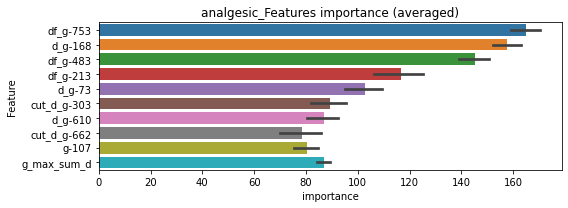

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


[1000]	training's binary_logloss: 0.000264266	valid_1's binary_logloss: 0.000444476
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000264266	valid_1's binary_logloss: 0.000444476
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000267455	valid_1's binary_logloss: 0.000445022
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000267887	valid_1's binary_logloss: 0.000345375
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0004100216526927924


Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000271699	valid_1's binary_logloss: 0.000405177
neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348452	valid_1's binary_logloss: 0.0239634
[600]	training's binary_logloss: 0.000671916	valid_1's binary_logloss: 0.014414
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000620817	valid_1's binary_logloss: 0.0141807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376524	valid_1's binary_logloss: 0.0206373
[600]	training's binary_logloss: 0.000685423	valid_1's binary_logloss: 0.0130079
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000550017	valid_1's binary_logloss: 0.0125102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395022	valid_1's binary_logloss: 0.00739562
[600]	training's binary_logloss: 0.000716451	valid_1's binary_logloss: 0.00192929
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000544354	valid_1's binary_logl

1 / 3 AUC score:0.999
y_Threshold: 0.0041302, Threshold: 0.0093768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00656, conf_1:0.01219
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0093768
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_2: 0.0493768
threshold: 0.0493768, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345369	valid_1's binary_logloss: 0.022088
[600]	training's binary_logloss: 0.000662025	valid_1's binary_logloss: 0.0144607
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000559246	valid_1's binary_logloss: 0.0140483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336207	valid_1's binary_logloss: 0.0140023
[600]	training's binary_logloss: 0.000651732	valid_1's binary_logloss: 0.00768328
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000537689	valid_1's binary_logloss: 0.00718519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003423	valid_1's binary_logloss: 0.0140242
[600]	training's binary_logloss: 0.000674691	valid_1's binary_logloss: 0.00798892
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000540203	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0177028, Threshold: 0.0493768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0015068 Vs.target_rate: 0.00202
Num_p_label: 6.0, conf_0:0.03950, conf_1:0.05925
threshold: 0.0493768, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324913	valid_1's binary_logloss: 0.0254234
[600]	training's binary_logloss: 0.000634665	valid_1's binary_logloss: 0.0191457
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000604595	valid_1's binary_logloss: 0.0189639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350946	valid_1's binary_logloss: 0.0134534
[600]	training's binary_logloss: 0.000665322	valid_1's binary_logloss: 0.00643759
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000540815	valid_1's binary_logloss: 0.00601855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354867	valid_1's binary_logloss: 0.0172089
[600]	training's binary_logloss: 0.000664313	valid_1's binary_logloss: 0.00985719
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000545958	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0174414, Threshold: 0.0493768, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0015068 Vs.target_rate: 0.00202
Num_p_label: 6.0, conf_0:0.04444, conf_1:0.05431
threshold: 0.0493768, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


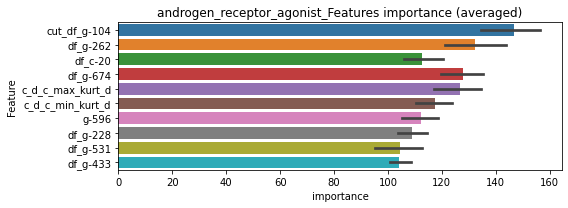

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000560679	valid_1's binary_logloss: 0.00680442


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000879792	valid_1's binary_logloss: 0.0154526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000600744	valid_1's binary_logloss: 0.00344742


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000638907	valid_1's binary_logloss: 0.013803


androgen_receptor_agonist logloss: 0.009879012438647972


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00788461	valid_1's binary_logloss: 0.060228
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00197121	valid_1's binary_logloss: 0.0527066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780764	valid_1's binary_logloss: 0.0519627
[600]	training's binary_logloss: 0.00126508	valid_1's binary_logloss: 0.0365978
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000831594	valid_1's binary_logloss: 0.0354483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792909	valid_1's binary_logloss: 0.0372898
[600]	training's binary_logloss: 0.00128779	valid_1's binary_logloss: 0.0240739
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000939838	valid_1's binary_logloss: 0.0231794
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0094387, Threshold: 0.0382486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02677, conf_1:0.04972
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0382486
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_2: 0.0782486
threshold: 0.0782486, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3790, y_label_rate: 0.1717678
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746103	valid_1's binary_logloss: 0.0573745
[600]	training's binary_logloss: 0.0012437	valid_1's binary_logloss: 0.0477444
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00126118	valid_1's binary_logloss: 0.0476541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668875	valid_1's binary_logloss: 0.0668001
[600]	training's binary_logloss: 0.00117494	valid_1's binary_logloss: 0.0565309
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00127617	valid_1's binary_logloss: 0.0563411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747936	valid_1's binary_logloss: 0.0368802
[600]	training's binary_logloss: 0.00122996	valid_1's binary_logloss: 0.0204523
[900]	training's binary_logloss: 0.000706202	valid_1's binary_logloss: 0.018312
Early stopping, best iterati

2 / 3 AUC score:0.999
y_Threshold: 0.0222690, Threshold: 0.0782486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0090407 Vs.target_rate: 0.00374
Num_p_label: 36.0, conf_0:0.06260, conf_1:0.09390
Num_p_label: 36.0, Expected: 14.9, Adj_threshold_1: 0.0782486
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.1182486
threshold: 0.1182486, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694675	valid_1's binary_logloss: 0.0467207
[600]	training's binary_logloss: 0.00116898	valid_1's binary_logloss: 0.0323853
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000940787	valid_1's binary_logloss: 0.0312764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00700791	valid_1's binary_logloss: 0.0434321
[600]	training's binary_logloss: 0.00117051	valid_1's binary_logloss: 0.0278931
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000774797	valid_1's binary_logloss: 0.0257856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697103	valid_1's binary_logloss: 0.0408345
[600]	training's binary_logloss: 0.00117864	valid_1's binary_logloss: 0.0319673
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000842612	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0330215, Threshold: 0.1182486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0057760 Vs.target_rate: 0.00374
Num_p_label: 23.0, conf_0:0.10642, conf_1:0.13007
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_1: 0.1182486
Num_p_label: 13.0, Expected: 14.9, Adj_threshold_2: 0.1582486
threshold: 0.1582486, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 638.0/3764, y_label_rate: 0.1695005


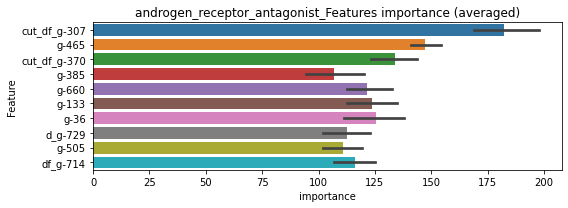

len(train_index) : 2823
len(valid_index) : 941
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2823
len(valid_index) : 941
================================= fold 2/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00152659	valid_1's binary_logloss: 0.0350695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000817566	valid_1's binary_logloss: 0.0188524


len(train_index) : 2823
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2823
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00154632	valid_1's binary_logloss: 0.0275741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000961985	valid_1's binary_logloss: 0.0282972


androgen_receptor_antagonist logloss: 0.027448292328927766


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590426	valid_1's binary_logloss: 0.0441882
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00135292	valid_1's binary_logloss: 0.0361038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563172	valid_1's binary_logloss: 0.0505957
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00140069	valid_1's binary_logloss: 0.0418077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591745	valid_1's binary_logloss: 0.032067
[600]	training's binary_logloss: 0.00107409	valid_1's binary_logloss: 0.0218051
[900]	training's binary_logloss: 0.000649035	valid_1's binary_logloss: 0.0210449
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000658691	valid_1's binary_logloss: 0.0209198
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.997
y_Threshold: 0.0088878, Threshold: 0.0154385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.01081, conf_1:0.02007


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00185258	valid_1's binary_logloss: 0.0368234


Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0154385
Num_p_label: 3.0, Expected: 13.4, Adj_threshold_2: 0.0554385
threshold: 0.0554385, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522132	valid_1's binary_logloss: 0.0341908
[600]	training's binary_logloss: 0.000972353	valid_1's binary_logloss: 0.0247162
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000650709	valid_1's binary_logloss: 0.0238127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00497707	valid_1's binary_logloss: 0.0467523
[600]	training's binary_logloss: 0.000961461	valid_1's binary_logloss: 0.0348672
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000727755	valid_1's binary_logloss: 0.0338644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056419	valid_1's binary_logloss: 0.0309459
[600]	training's binary_logloss: 0.00101939	valid_1's binary_logloss: 0.018226
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000651286	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0278717, Threshold: 0.0554385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0012557 Vs.target_rate: 0.00336
Num_p_label: 5.0, conf_0:0.04435, conf_1:0.06653
Num_p_label: 5.0, Expected: 13.4, Adj_threshold_1: 0.0554385
threshold: 0.0554385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525386	valid_1's binary_logloss: 0.0395876
[600]	training's binary_logloss: 0.000974517	valid_1's binary_logloss: 0.0306172
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000928744	valid_1's binary_logloss: 0.0305236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512023	valid_1's binary_logloss: 0.0347532
[600]	training's binary_logloss: 0.000979899	valid_1's binary_logloss: 0.0226533
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000639073	valid_1's binary_logloss: 0.0215986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526742	valid_1's binary_logloss: 0.035473
[600]	training's binary_logloss: 0.000976474	valid_1's binary_logloss: 0.0262636
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000806051	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0214944, Threshold: 0.0554385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0012557 Vs.target_rate: 0.00336
Num_p_label: 5.0, conf_0:0.04989, conf_1:0.06098
Num_p_label: 5.0, Expected: 13.4, Adj_threshold_1: 0.0554385
threshold: 0.0554385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


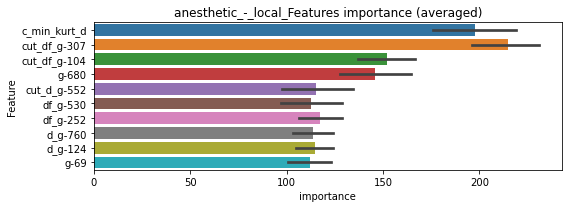

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000819089	valid_1's binary_logloss: 0.0222053


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00137322	valid_1's binary_logloss: 0.0340747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000761769	valid_1's binary_logloss: 0.0230533


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


anesthetic_-_local logloss: 0.02517092499998692


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00112326	valid_1's binary_logloss: 0.0213536
neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209964	valid_1's binary_logloss: 0.0137951
[600]	training's binary_logloss: 0.000472013	valid_1's binary_logloss: 0.00985807
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000464755	valid_1's binary_logloss: 0.00981884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219938	valid_1's binary_logloss: 0.0109338
[600]	training's binary_logloss: 0.000480222	valid_1's binary_logloss: 0.00666515
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000462856	valid_1's binary_logloss: 0.00661333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218022	valid_1's binary_logloss: 0.0081447
[600]	training's binary_logloss: 0.000483325	valid_1's binary_logloss: 0.00594973
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000506894	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0031283, Threshold: 0.0131803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00923, conf_1:0.01713
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0131803
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0531803
threshold: 0.0531803, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188595	valid_1's binary_logloss: 0.0120131
[600]	training's binary_logloss: 0.000460631	valid_1's binary_logloss: 0.00842282
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00046146	valid_1's binary_logloss: 0.00841641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201312	valid_1's binary_logloss: 0.0100214
[600]	training's binary_logloss: 0.000460618	valid_1's binary_logloss: 0.00594488
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000445445	valid_1's binary_logloss: 0.00590376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202149	valid_1's binary_logloss: 0.00842578
[600]	training's binary_logloss: 0.000458439	valid_1's binary_logloss: 0.00577282
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000459842	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0367436, Threshold: 0.0531803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0090407 Vs.target_rate: 0.00151
Num_p_label: 36.0, conf_0:0.04254, conf_1:0.06382
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_1: 0.0531803
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0931803
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1331803
threshold: 0.1331803, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188595	valid_1's binary_logloss: 0.0120131
[600]	training's binary_logloss: 0.000460631	valid_1's binary_logloss: 0.00842282
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00046146	valid_1's binary_logloss: 0.00841641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201312	valid_1's binary_logloss: 0.0100214
[600]	training's binary_logloss: 0.000460618	valid_1's binary_logloss: 0.00594488
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000445445	valid_1's binary_logloss: 0.00590376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202149	valid_1's binary_logloss: 0.00842578
[600]	training's binary_logloss: 0.000458439	valid_1's binary_logloss: 0.00577282
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000459842	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0367436, Threshold: 0.1331803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, conf_0:0.11986, conf_1:0.14650
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.1331803
threshold: 0.1331803, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


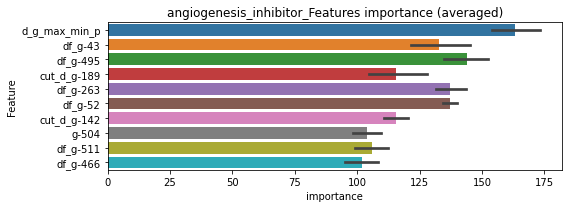

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000650377	valid_1's binary_logloss: 0.00896775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00047104	valid_1's binary_logloss: 0.00464028


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000493214	valid_1's binary_logloss: 0.00500042


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000479469	valid_1's binary_logloss: 0.00366589


angiogenesis_inhibitor logloss: 0.005570035167078133


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234816	valid_1's binary_logloss: 0.010081
[600]	training's binary_logloss: 0.000506209	valid_1's binary_logloss: 0.00524854
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000457751	valid_1's binary_logloss: 0.00508008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229374	valid_1's binary_logloss: 0.00964841
[600]	training's binary_logloss: 0.000505897	valid_1's binary_logloss: 0.00417801
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000455743	valid_1's binary_logloss: 0.00402478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237449	valid_1's binary_logloss: 0.00673434
[600]	training's binary_logloss: 0.000517003	valid_1's binary_logloss: 0.00286002
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000453506	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028773, Threshold: 0.0100059, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000557386	valid_1's binary_logloss: 0.00780594


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00700, conf_1:0.01301
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0100059
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_2: 0.0500059
threshold: 0.0500059, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214861	valid_1's binary_logloss: 0.00901005
[600]	training's binary_logloss: 0.000484444	valid_1's binary_logloss: 0.0045901
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000439833	valid_1's binary_logloss: 0.00444673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214251	valid_1's binary_logloss: 0.00873666
[600]	training's binary_logloss: 0.000488733	valid_1's binary_logloss: 0.00374298
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000435027	valid_1's binary_logloss: 0.00356126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226072	valid_1's binary_logloss: 0.00664399
[600]	training's binary_logloss: 0.000491552	valid_1's binary_logloss: 0.00270028
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000435527	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0260454, Threshold: 0.0500059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000538723	valid_1's binary_logloss: 0.00667609


p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.04000, conf_1:0.06001
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0500059
threshold: 0.0500059, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214861	valid_1's binary_logloss: 0.00901005
[600]	training's binary_logloss: 0.000484444	valid_1's binary_logloss: 0.0045901
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000439833	valid_1's binary_logloss: 0.00444673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214251	valid_1's binary_logloss: 0.00873666
[600]	training's binary_logloss: 0.000488733	valid_1's binary_logloss: 0.00374298
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000435027	valid_1's binary_logloss: 0.00356126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226072	valid_1's binary_logloss: 0.00664399
[600]	training's binary_logloss: 0.000491552	valid_1's binary_logloss: 0.00270028
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000435527	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0260454, Threshold: 0.0500059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000538723	valid_1's binary_logloss: 0.00667609


p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.04501, conf_1:0.05501
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0500059
threshold: 0.0500059, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


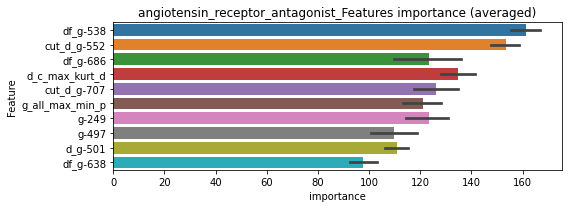

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000465581	valid_1's binary_logloss: 0.00468485


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452927	valid_1's binary_logloss: 0.00351813
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000452927	valid_1's binary_logloss: 0.00351813


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455057	valid_1's binary_logloss: 0.00212202
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000455231	valid_1's binary_logloss: 0.00212129


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


angiotensin_receptor_antagonist logloss: 0.004482864751937046


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000652747	valid_1's binary_logloss: 0.00760283
neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605954	valid_1's binary_logloss: 0.0425489
[600]	training's binary_logloss: 0.00103458	valid_1's binary_logloss: 0.0305229
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00111683	valid_1's binary_logloss: 0.0304737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060926	valid_1's binary_logloss: 0.0275176
[600]	training's binary_logloss: 0.00106513	valid_1's binary_logloss: 0.0150094
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000701642	valid_1's binary_logloss: 0.0138347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631375	valid_1's binary_logloss: 0.0484045
[600]	training's binary_logloss: 0.00106235	valid_1's binary_logloss: 0.0401811
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.0010316	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0079750, Threshold: 0.0780626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05464, conf_1:0.10148
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0780626
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.1180626
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_3: 0.1580626
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1980626
threshold: 0.1980626, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550026	valid_1's binary_logloss: 0.0487779
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00118694	valid_1's binary_logloss: 0.0403221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052921	valid_1's binary_logloss: 0.0354118
[600]	training's binary_logloss: 0.000970472	valid_1's binary_logloss: 0.024121
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000709474	valid_1's binary_logloss: 0.0233136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566979	valid_1's binary_logloss: 0.0303263
[600]	training's binary_logloss: 0.0010085	valid_1's binary_logloss: 0.0196499
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.00065097	valid_1's binary_logloss: 0.0184114
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0414687, Threshold: 0.1980626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0128076 Vs.target_rate: 0.00307
Num_p_label: 51.0, conf_0:0.15845, conf_1:0.23768
Num_p_label: 51.0, Expected: 12.2, Adj_threshold_1: 0.1980626
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_2: 0.2380626
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_3: 0.2780626
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_4: 0.3180626
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_5: 0.3580626
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_6: 0.3980626
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_7: 0.4380626
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_8: 0.4780626
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_9: 0.5180626
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_10: 0.5580626
threshold: 0.5980626, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507489	valid_1's binary_logloss: 0.0418746
[600]	training's binary_logloss: 0.000933974	valid_1's binary_logloss: 0.0321518
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000962309	valid_1's binary_logloss: 0.0320079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520891	valid_1's binary_logloss: 0.0400033
[600]	training's binary_logloss: 0.000947647	valid_1's binary_logloss: 0.0283251
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000770971	valid_1's binary_logloss: 0.0277603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538566	valid_1's binary_logloss: 0.0260032
[600]	training's binary_logloss: 0.000970908	valid_1's binary_logloss: 0.015787
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000683416	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0431031, Threshold: 0.5980626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.65787
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_1: 0.5980626
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.6380626
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_3: 0.6780626
threshold: 0.6780626, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3775, y_label_rate: 0.1700662


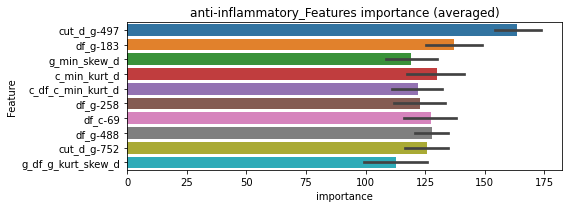

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000874301	valid_1's binary_logloss: 0.0373823


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000728824	valid_1's binary_logloss: 0.0286978


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00122384	valid_1's binary_logloss: 0.0137895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000792134	valid_1's binary_logloss: 0.0134068


anti-inflammatory logloss: 0.02332170720908685


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158938	valid_1's binary_logloss: 0.00484761
[600]	training's binary_logloss: 0.000401834	valid_1's binary_logloss: 0.00219638
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000403756	valid_1's binary_logloss: 0.0021921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169954	valid_1's binary_logloss: 0.00483803
[600]	training's binary_logloss: 0.00041326	valid_1's binary_logloss: 0.00229038
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000413157	valid_1's binary_logloss: 0.00229032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165944	valid_1's binary_logloss: 0.00449921
[600]	training's binary_logloss: 0.000414422	valid_1's binary_logloss: 0.00214973
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000414422	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0019701, Threshold: 0.0060673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


[600]	training's binary_logloss: 0.000410392	valid_1's binary_logloss: 0.00299732
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000416667	valid_1's binary_logloss: 0.00298771


Num_p_label: 40.0, conf_0:0.00425, conf_1:0.00789
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0060673
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0460673
threshold: 0.0460673, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155822	valid_1's binary_logloss: 0.00450239
[600]	training's binary_logloss: 0.000394622	valid_1's binary_logloss: 0.00187078
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000392836	valid_1's binary_logloss: 0.00186186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157291	valid_1's binary_logloss: 0.00425937
[600]	training's binary_logloss: 0.000400706	valid_1's binary_logloss: 0.00216926
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000403209	valid_1's binary_logloss: 0.002168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159757	valid_1's binary_logloss: 0.00471659
[600]	training's binary_logloss: 0.000407188	valid_1's binary_logloss: 0.00254634
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00041344	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0409821, Threshold: 0.0460673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.03685, conf_1:0.05528
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0460673


[600]	training's binary_logloss: 0.000402021	valid_1's binary_logloss: 0.00276044
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000409365	valid_1's binary_logloss: 0.00275515


threshold: 0.0460673, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155822	valid_1's binary_logloss: 0.00450239
[600]	training's binary_logloss: 0.000394622	valid_1's binary_logloss: 0.00187078
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000392836	valid_1's binary_logloss: 0.00186186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157291	valid_1's binary_logloss: 0.00425937
[600]	training's binary_logloss: 0.000400706	valid_1's binary_logloss: 0.00216926
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000403209	valid_1's binary_logloss: 0.002168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159757	valid_1's binary_logloss: 0.00471659
[600]	training's binary_logloss: 0.000407188	valid_1's binary_logloss: 0.00254634
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00041344	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0409821, Threshold: 0.0460673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.04146, conf_1:0.05067
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0460673


[600]	training's binary_logloss: 0.000402021	valid_1's binary_logloss: 0.00276044
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000409365	valid_1's binary_logloss: 0.00275515


threshold: 0.0460673, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


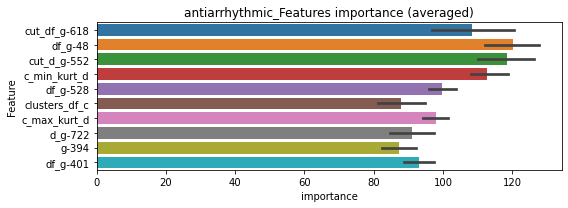

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000416206	valid_1's binary_logloss: 0.0019889


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000413538	valid_1's binary_logloss: 0.00235841


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000414453	valid_1's binary_logloss: 0.00197868


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000412464	valid_1's binary_logloss: 0.00229826


antiarrhythmic logloss: 0.002156402091504519


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281
target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292906	valid_1's binary_logloss: 0.0185517
[600]	training's binary_logloss: 0.00059056	valid_1's binary_logloss: 0.0119069
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000545337	valid_1's binary_logloss: 0.0116455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289112	valid_1's binary_logloss: 0.0115781
[600]	training's binary_logloss: 0.000588271	valid_1's binary_logloss: 0.00683029
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000534653	valid_1's binary_logloss: 0.00667297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311541	valid_1's binary_logloss: 0.00635275
[600]	training's binary_logloss: 0.000629158	valid_1's binary_logloss: 0.00217914
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000533505	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0044126, Threshold: 0.0304192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, conf_0:0.02129, conf_1:0.03954
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0304192
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_2: 0.0704192
threshold: 0.0704192, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266149	valid_1's binary_logloss: 0.01749
[600]	training's binary_logloss: 0.000564698	valid_1's binary_logloss: 0.0109964
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000514056	valid_1's binary_logloss: 0.0108047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270714	valid_1's binary_logloss: 0.00792595
[600]	training's binary_logloss: 0.000575136	valid_1's binary_logloss: 0.00387122
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000523253	valid_1's binary_logloss: 0.00377529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283303	valid_1's binary_logloss: 0.0062821
[600]	training's binary_logloss: 0.000588703	valid_1's binary_logloss: 0.00208463
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000535503	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0407159, Threshold: 0.0704192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0150678 Vs.target_rate: 0.00181
Num_p_label: 60.0, conf_0:0.05634, conf_1:0.08450
Num_p_label: 60.0, Expected: 7.2, Adj_threshold_1: 0.0704192
Num_p_label: 44.0, Expected: 7.2, Adj_threshold_2: 0.1104192
Num_p_label: 29.0, Expected: 7.2, Adj_threshold_3: 0.1504192
Num_p_label: 25.0, Expected: 7.2, Adj_threshold_4: 0.1904192
Num_p_label: 18.0, Expected: 7.2, Adj_threshold_5: 0.2304192
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_6: 0.2704192
threshold: 0.2704192, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266149	valid_1's binary_logloss: 0.01749
[600]	training's binary_logloss: 0.000564698	valid_1's binary_logloss: 0.0109964
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000514056	valid_1's binary_logloss: 0.0108047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270714	valid_1's binary_logloss: 0.00792595
[600]	training's binary_logloss: 0.000575136	valid_1's binary_logloss: 0.00387122
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000523253	valid_1's binary_logloss: 0.00377529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283303	valid_1's binary_logloss: 0.0062821
[600]	training's binary_logloss: 0.000588703	valid_1's binary_logloss: 0.00208463
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000535503	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0407159, Threshold: 0.2704192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0035158 Vs.target_rate: 0.00181
Num_p_label: 14.0, conf_0:0.24338, conf_1:0.29746
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_1: 0.2704192
threshold: 0.2704192, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


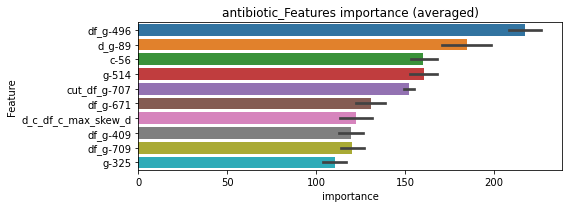

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000519406	valid_1's binary_logloss: 0.011361


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000603065	valid_1's binary_logloss: 0.00462824


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000537166	valid_1's binary_logloss: 0.00234668


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


antibiotic logloss: 0.0073887521075799096


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00081064	valid_1's binary_logloss: 0.0112049
neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00097645	valid_1's binary_logloss: 0.00256929
[600]	training's binary_logloss: 0.000302785	valid_1's binary_logloss: 0.00113588
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000302789	valid_1's binary_logloss: 0.00113588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000939423	valid_1's binary_logloss: 0.00394107
[600]	training's binary_logloss: 0.000301635	valid_1's binary_logloss: 0.00218186
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000301635	valid_1's binary_logloss: 0.00218186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000967745	valid_1's binary_logloss: 0.00456824
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000320738	valid_1's binary_logloss: 0.00382403
Training until validation scores don't improve for 30 rou

1 / 3 AUC score:1.000
y_Threshold: 0.0012891, Threshold: 0.0031518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00221, conf_1:0.00410
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0031518
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0431518


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000309729	valid_1's binary_logloss: 0.00133835


threshold: 0.0431518, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000951305	valid_1's binary_logloss: 0.00273245
[600]	training's binary_logloss: 0.000295346	valid_1's binary_logloss: 0.0013051
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000295346	valid_1's binary_logloss: 0.0013051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919601	valid_1's binary_logloss: 0.00400307
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000309138	valid_1's binary_logloss: 0.00242367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00093963	valid_1's binary_logloss: 0.00391376
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000319454	valid_1's binary_logloss: 0.00316209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947553	valid_1's binary_logloss: 0.0029495

2 / 3 AUC score:1.000
y_Threshold: 0.0195664, Threshold: 0.0431518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03452, conf_1:0.05178


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000301677	valid_1's binary_logloss: 0.00146068


threshold: 0.0431518, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000951305	valid_1's binary_logloss: 0.00273245
[600]	training's binary_logloss: 0.000295346	valid_1's binary_logloss: 0.0013051
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000295346	valid_1's binary_logloss: 0.0013051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919601	valid_1's binary_logloss: 0.00400307
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000309138	valid_1's binary_logloss: 0.00242367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00093963	valid_1's binary_logloss: 0.00391376
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000319454	valid_1's binary_logloss: 0.00316209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947553	valid_1's binary_logloss: 0.0029495

3 / 3 AUC score:1.000
y_Threshold: 0.0195664, Threshold: 0.0431518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03884, conf_1:0.04747


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000301677	valid_1's binary_logloss: 0.00146068


threshold: 0.0431518, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


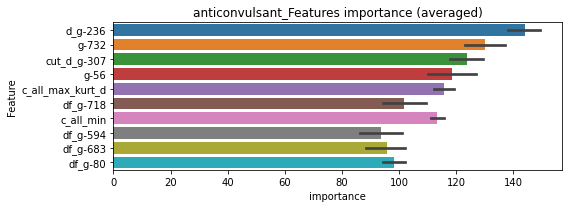

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000312472	valid_1's binary_logloss: 0.000978034


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[872]	training's binary_logloss: 0.00030655	valid_1's binary_logloss: 0.0024245


================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000349305	valid_1's binary_logloss: 0.00359125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000302395	valid_1's binary_logloss: 0.000907684


anticonvulsant logloss: 0.001975777807209294


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136296	valid_1's binary_logloss: 0.00422111
[600]	training's binary_logloss: 0.000380062	valid_1's binary_logloss: 0.00200242
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000381834	valid_1's binary_logloss: 0.00199781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131643	valid_1's binary_logloss: 0.00554949
[600]	training's binary_logloss: 0.000374931	valid_1's binary_logloss: 0.00356247
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000377706	valid_1's binary_logloss: 0.00356073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134146	valid_1's binary_logloss: 0.00271167
[600]	training's binary_logloss: 0.000376507	valid_1's binary_logloss: 0.00110979
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000376507	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0019098, Threshold: 0.0061571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00431, conf_1:0.00800
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0061571
Num_p_label: 4.0, Expected: 4.3, Adj_threshold_2: 0.0461571


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000385755	valid_1's binary_logloss: 0.00563616


threshold: 0.0461571, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130137	valid_1's binary_logloss: 0.00385837
[600]	training's binary_logloss: 0.000367521	valid_1's binary_logloss: 0.00169616
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000367532	valid_1's binary_logloss: 0.00169612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125081	valid_1's binary_logloss: 0.00569324
[600]	training's binary_logloss: 0.000367546	valid_1's binary_logloss: 0.00391451
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000368076	valid_1's binary_logloss: 0.00390597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132705	valid_1's binary_logloss: 0.003197
[600]	training's binary_logloss: 0.000367018	valid_1's binary_logloss: 0.00151674
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000368564	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0248463, Threshold: 0.0461571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00109
Num_p_label: 6.0, conf_0:0.03693, conf_1:0.05539


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000378588	valid_1's binary_logloss: 0.00546659


threshold: 0.0461571, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130137	valid_1's binary_logloss: 0.00385837
[600]	training's binary_logloss: 0.000367521	valid_1's binary_logloss: 0.00169616
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000367532	valid_1's binary_logloss: 0.00169612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125081	valid_1's binary_logloss: 0.00569324
[600]	training's binary_logloss: 0.000367546	valid_1's binary_logloss: 0.00391451
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000368076	valid_1's binary_logloss: 0.00390597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132705	valid_1's binary_logloss: 0.003197
[600]	training's binary_logloss: 0.000367018	valid_1's binary_logloss: 0.00151674
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000368564	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0248463, Threshold: 0.0461571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00109
Num_p_label: 6.0, conf_0:0.04154, conf_1:0.05077


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000378588	valid_1's binary_logloss: 0.00546659


threshold: 0.0461571, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


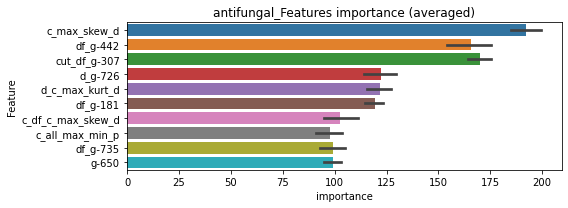

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000390679	valid_1's binary_logloss: 0.00136273


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000370831	valid_1's binary_logloss: 0.00334696


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000371547	valid_1's binary_logloss: 0.00134366


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000368431	valid_1's binary_logloss: 0.00491472


antifungal logloss: 0.0027437750209056712


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010145	valid_1's binary_logloss: 0.00243201
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000335978	valid_1's binary_logloss: 0.0012812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00099128	valid_1's binary_logloss: 0.00453902
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00033549	valid_1's binary_logloss: 0.00288734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010162	valid_1's binary_logloss: 0.00207549
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000344967	valid_1's binary_logloss: 0.000985368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990949	valid_1's binary_logloss: 0.00302736


1 / 3 AUC score:1.000
y_Threshold: 0.0015654, Threshold: 0.0727788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.05095, conf_1:0.09461
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0727788
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1127788
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.1527788
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.1927788
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2327788
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.2727788
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_7: 0.3127788


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000347582	valid_1's binary_logloss: 0.00187494


Num_p_label: 24.0, Expected: 3.0, Adj_threshold_8: 0.3527788
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_9: 0.3927788
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_10: 0.4327788
threshold: 0.4727788, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911702	valid_1's binary_logloss: 0.00221743
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000327017	valid_1's binary_logloss: 0.00113653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00088751	valid_1's binary_logloss: 0.00424275
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000331397	valid_1's binary_logloss: 0.00293462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935767	valid_1's binary_logloss: 0.00129957
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000324602	valid_1's binary_logloss: 0.000483934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901101	valid_1's binary_logloss: 0.00292196


2 / 3 AUC score:1.000
y_Threshold: 0.0811263, Threshold: 0.4727788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000320186	valid_1's binary_logloss: 0.00185994


p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, conf_0:0.37822, conf_1:0.56733
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.4727788
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_2: 0.5127788
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_3: 0.5527788
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_4: 0.5927788
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_5: 0.6327788
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_6: 0.6727788
Num_p_label: 39.0, Expected: 3.0, Adj_threshold_7: 0.7127788
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_8: 0.7527788
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_9: 0.7927788
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_10: 0.8327788
threshold: 0.8727788, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911702	valid_1's binary_logloss: 0.00221743
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000327017	valid_1's binary_logloss: 0.00113653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00088751	valid_1's binary_logloss: 0.00424275
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000331397	valid_1's binary_logloss: 0.00293462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935767	valid_1's binary_logloss: 0.00129957
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000324602	valid_1's binary_logloss: 0.000483934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901101	valid_1's binary_logloss: 0.00292196


3 / 3 AUC score:1.000
y_Threshold: 0.0811263, Threshold: 0.8727788, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.8727788


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000320186	valid_1's binary_logloss: 0.00185994


threshold: 0.8727788, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


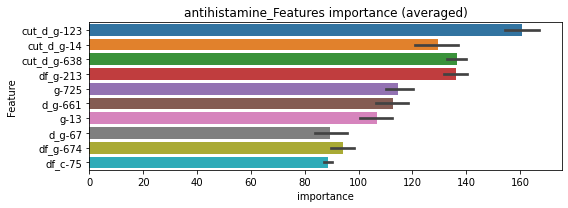

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000328669	valid_1's binary_logloss: 0.000811309
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000324832	valid_1's binary_logloss: 0.00281344
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000332288	valid_1's binary_logloss: 0.000490218
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0014403797258696206


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000330749	valid_1's binary_logloss: 0.00164646
neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111887	valid_1's binary_logloss: 0.00221361
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000361904	valid_1's binary_logloss: 0.00102873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111042	valid_1's binary_logloss: 0.00668812
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000355262	valid_1's binary_logloss: 0.00451704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114173	valid_1's binary_logloss: 0.00241438
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000364271	valid_1's binary_logloss: 0.0011684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111917	valid_1's binary_logloss: 0.00400384


1 / 3 AUC score:1.000
y_Threshold: 0.0019503, Threshold: 0.0072646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00509, conf_1:0.00944
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0072646
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0472646
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0872646


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000365288	valid_1's binary_logloss: 0.00246337


threshold: 0.0872646, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101338	valid_1's binary_logloss: 0.00194646
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000346624	valid_1's binary_logloss: 0.000897335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000996114	valid_1's binary_logloss: 0.00418818
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000350408	valid_1's binary_logloss: 0.0024258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105295	valid_1's binary_logloss: 0.0014813
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000345925	valid_1's binary_logloss: 0.000561535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101576	valid_1's binary_logloss: 0.0027658


2 / 3 AUC score:1.000
y_Threshold: 0.1618741, Threshold: 0.0872646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, conf_0:0.06981, conf_1:0.10472
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.0872646
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.1272646
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1672646
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.2072646
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.2472646
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.2872646
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.3272646


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000345749	valid_1's binary_logloss: 0.00160991


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3672646
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.4072646
threshold: 0.4072646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101338	valid_1's binary_logloss: 0.00194646
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000346624	valid_1's binary_logloss: 0.000897335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000996114	valid_1's binary_logloss: 0.00418818
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000350408	valid_1's binary_logloss: 0.0024258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105295	valid_1's binary_logloss: 0.0014813
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000345925	valid_1's binary_logloss: 0.000561535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101576	valid_1's binary_logloss: 0.0027658


3 / 3 AUC score:1.000
y_Threshold: 0.1618741, Threshold: 0.4072646, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000345749	valid_1's binary_logloss: 0.00160991


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.36654, conf_1:0.44799
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4072646
threshold: 0.4072646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


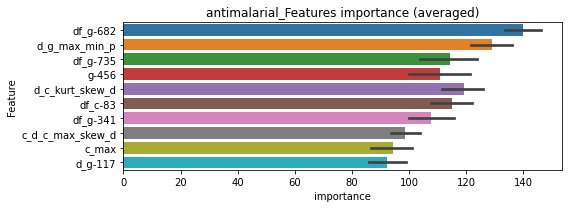

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000345129	valid_1's binary_logloss: 0.000905227
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000333793	valid_1's binary_logloss: 0.00219882
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000353791	valid_1's binary_logloss: 0.000554707
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.0012178641333519906


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000345716	valid_1's binary_logloss: 0.00121175
neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576997	valid_1's binary_logloss: 0.0442217
[600]	training's binary_logloss: 0.000969388	valid_1's binary_logloss: 0.0335712
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00100432	valid_1's binary_logloss: 0.033428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585914	valid_1's binary_logloss: 0.0381379
[600]	training's binary_logloss: 0.000985252	valid_1's binary_logloss: 0.0283395
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000696644	valid_1's binary_logloss: 0.0273626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065474	valid_1's binary_logloss: 0.0280986
[600]	training's binary_logloss: 0.00105734	valid_1's binary_logloss: 0.0194572
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000892048	valid_1's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0071874, Threshold: 0.0290328, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00135611	valid_1's binary_logloss: 0.0402996


Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02032, conf_1:0.03774
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0290328
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.0690328
threshold: 0.0690328, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563405	valid_1's binary_logloss: 0.0467949
[600]	training's binary_logloss: 0.000970069	valid_1's binary_logloss: 0.0380437
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000991275	valid_1's binary_logloss: 0.0380071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059073	valid_1's binary_logloss: 0.0383697
[600]	training's binary_logloss: 0.000977275	valid_1's binary_logloss: 0.0279971
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00092255	valid_1's binary_logloss: 0.0278111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572105	valid_1's binary_logloss: 0.0323418
[600]	training's binary_logloss: 0.000967643	valid_1's binary_logloss: 0.0199743
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000693409	valid_1's binary_logloss

2 / 3 AUC score:0.999
y_Threshold: 0.0271602, Threshold: 0.0690328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0107986 Vs.target_rate: 0.00307
Num_p_label: 43.0, conf_0:0.05523, conf_1:0.08284
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_1: 0.0690328
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1090328
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_3: 0.1490328
threshold: 0.1490328, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3785, y_label_rate: 0.1706737
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552949	valid_1's binary_logloss: 0.0302931
[600]	training's binary_logloss: 0.000944661	valid_1's binary_logloss: 0.0206696
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000704017	valid_1's binary_logloss: 0.0200624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516199	valid_1's binary_logloss: 0.048728
[600]	training's binary_logloss: 0.000904621	valid_1's binary_logloss: 0.0399739
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000778542	valid_1's binary_logloss: 0.0397183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533255	valid_1's binary_logloss: 0.0323049
[600]	training's binary_logloss: 0.00093457	valid_1's binary_logloss: 0.0205545
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00067671	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0276771, Threshold: 0.1490328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 643.0/3779
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, conf_0:0.13413, conf_1:0.16394
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.1490328
Num_p_label: 10.0, Expected: 12.2, Adj_threshold_2: 0.1890328
threshold: 0.1890328, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 643.0/3779, y_label_rate: 0.1701508


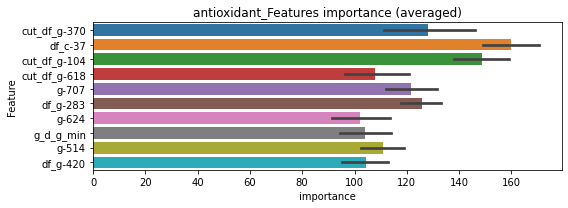

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00129213	valid_1's binary_logloss: 0.0249197
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00131021	valid_1's binary_logloss: 0.0245944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000864276	valid_1's binary_logloss: 0.0205153


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00069702	valid_1's binary_logloss: 0.0135004


antioxidant logloss: 0.02088440637736316


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255214	valid_1's binary_logloss: 0.00769683
[600]	training's binary_logloss: 0.000515233	valid_1's binary_logloss: 0.00287639
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000449779	valid_1's binary_logloss: 0.00271026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242076	valid_1's binary_logloss: 0.0100373
[600]	training's binary_logloss: 0.000507581	valid_1's binary_logloss: 0.00560274
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000459501	valid_1's binary_logloss: 0.00549909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259717	valid_1's binary_logloss: 0.00568677
[600]	training's binary_logloss: 0.000520634	valid_1's binary_logloss: 0.00154825
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00047011	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0035110, Threshold: 0.0124524, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00872, conf_1:0.01619
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0124524
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0524524
threshold: 0.0524524, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230397	valid_1's binary_logloss: 0.00709187
[600]	training's binary_logloss: 0.00048972	valid_1's binary_logloss: 0.00288958
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000440778	valid_1's binary_logloss: 0.0027708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234239	valid_1's binary_logloss: 0.00936719
[600]	training's binary_logloss: 0.000494288	valid_1's binary_logloss: 0.00510086
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000448839	valid_1's binary_logloss: 0.0049671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242747	valid_1's binary_logloss: 0.00535282
[600]	training's binary_logloss: 0.000504198	valid_1's binary_logloss: 0.00142627
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000460795	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0396043, Threshold: 0.0524524, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04196, conf_1:0.06294
threshold: 0.0524524, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230397	valid_1's binary_logloss: 0.00709187
[600]	training's binary_logloss: 0.00048972	valid_1's binary_logloss: 0.00288958
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000440778	valid_1's binary_logloss: 0.0027708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234239	valid_1's binary_logloss: 0.00936719
[600]	training's binary_logloss: 0.000494288	valid_1's binary_logloss: 0.00510086
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000448839	valid_1's binary_logloss: 0.0049671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242747	valid_1's binary_logloss: 0.00535282
[600]	training's binary_logloss: 0.000504198	valid_1's binary_logloss: 0.00142627
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000460795	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0396043, Threshold: 0.0524524, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04721, conf_1:0.05770
threshold: 0.0524524, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


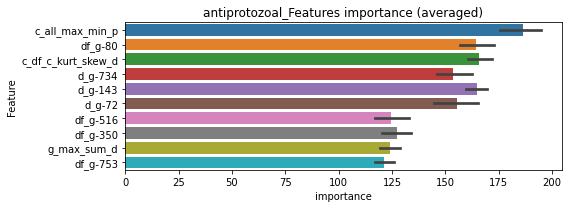

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446278	valid_1's binary_logloss: 0.00340992
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000447555	valid_1's binary_logloss: 0.00340543


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000463764	valid_1's binary_logloss: 0.00473796


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455058	valid_1's binary_logloss: 0.00120309
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000452774	valid_1's binary_logloss: 0.00119923


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000458106	valid_1's binary_logloss: 0.00457171


antiprotozoal logloss: 0.0034783903768332443


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118617	valid_1's binary_logloss: 0.00415223
[600]	training's binary_logloss: 0.000337686	valid_1's binary_logloss: 0.00215863
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000339088	valid_1's binary_logloss: 0.00215737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122015	valid_1's binary_logloss: 0.00271717
[600]	training's binary_logloss: 0.000345118	valid_1's binary_logloss: 0.00101312
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000345118	valid_1's binary_logloss: 0.00101312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125365	valid_1's binary_logloss: 0.00206893
[600]	training's binary_logloss: 0.0003449	valid_1's binary_logloss: 0.000680794
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000342616	valid_1's binar

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000343604	valid_1's binary_logloss: 0.00141726
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000341423	valid_1's binary_logloss: 0.00141127


y_Threshold: 0.0016604, Threshold: 0.0056575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00396, conf_1:0.00735
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0056575
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_2: 0.0456575
threshold: 0.0456575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114606	valid_1's binary_logloss: 0.00370531
[600]	training's binary_logloss: 0.000333387	valid_1's binary_logloss: 0.00180024
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000333298	valid_1's binary_logloss: 0.0018001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116219	valid_1's binary_logloss: 0.00269641
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000342499	valid_1's binary_logloss: 0.00108887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119335	valid_1's binary_logloss: 0.00222757
[600]	training's binary_logloss: 0.000340632	valid_1's binary_logloss: 0.000755207
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000340647	valid_1's binary_logloss: 0.000755177
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0899719, Threshold: 0.0456575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, conf_0:0.03653, conf_1:0.05479
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_1: 0.0456575


[600]	training's binary_logloss: 0.000337548	valid_1's binary_logloss: 0.00170818
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000340435	valid_1's binary_logloss: 0.00170469


threshold: 0.0456575, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114606	valid_1's binary_logloss: 0.00370531
[600]	training's binary_logloss: 0.000333387	valid_1's binary_logloss: 0.00180024
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000333298	valid_1's binary_logloss: 0.0018001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116219	valid_1's binary_logloss: 0.00269641
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000342499	valid_1's binary_logloss: 0.00108887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119335	valid_1's binary_logloss: 0.00222757
[600]	training's binary_logloss: 0.000340632	valid_1's binary_logloss: 0.000755207
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000340647	valid_1's binary_logloss: 0.000755177
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0899719, Threshold: 0.0456575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, conf_0:0.04109, conf_1:0.05022
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_1: 0.0456575


[600]	training's binary_logloss: 0.000337548	valid_1's binary_logloss: 0.00170818
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000340435	valid_1's binary_logloss: 0.00170469


threshold: 0.0456575, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


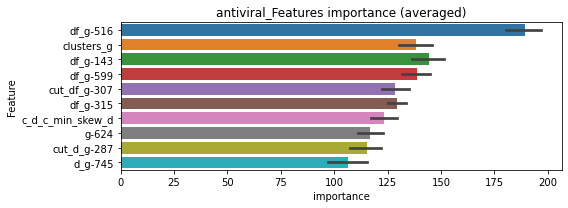

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000339744	valid_1's binary_logloss: 0.00161914


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000342365	valid_1's binary_logloss: 0.000740042


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000341911	valid_1's binary_logloss: 0.000626589


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332464	valid_1's binary_logloss: 0.00105322
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000331432	valid_1's binary_logloss: 0.00104901


antiviral logloss: 0.0010087844821549093


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283
target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315874	valid_1's binary_logloss: 0.0286983
[600]	training's binary_logloss: 0.000631264	valid_1's binary_logloss: 0.0225193
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000587648	valid_1's binary_logloss: 0.0224234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349976	valid_1's binary_logloss: 0.0246685
[600]	training's binary_logloss: 0.000658523	valid_1's binary_logloss: 0.0190132
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563439	valid_1's binary_logloss: 0.0188498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362797	valid_1's binary_logloss: 0.00747345
[600]	training's binary_logloss: 0.000680792	valid_1's binary_logloss: 0.00249361
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000555877	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0037287, Threshold: 0.0420833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, conf_0:0.02946, conf_1:0.05471
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0420833
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_2: 0.0820833
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_3: 0.1220833
threshold: 0.1220833, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00305207	valid_1's binary_logloss: 0.0294587
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00111641	valid_1's binary_logloss: 0.02475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00326724	valid_1's binary_logloss: 0.0247906
[600]	training's binary_logloss: 0.000640077	valid_1's binary_logloss: 0.0185758
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000634194	valid_1's binary_logloss: 0.0185574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347504	valid_1's binary_logloss: 0.0068678
[600]	training's binary_logloss: 0.000663956	valid_1's binary_logloss: 0.00217581
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000549995	valid_1's binary_logloss: 0.00191388
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0258150, Threshold: 0.1220833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0140633 Vs.target_rate: 0.00206
Num_p_label: 56.0, conf_0:0.09767, conf_1:0.14650
Num_p_label: 56.0, Expected: 8.2, Adj_threshold_1: 0.1220833
Num_p_label: 43.0, Expected: 8.2, Adj_threshold_2: 0.1620833
Num_p_label: 35.0, Expected: 8.2, Adj_threshold_3: 0.2020833
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_4: 0.2420833
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2820833
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_6: 0.3220833
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_7: 0.3620833
threshold: 0.3620833, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320942	valid_1's binary_logloss: 0.0112218
[600]	training's binary_logloss: 0.000630782	valid_1's binary_logloss: 0.00569498
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000527732	valid_1's binary_logloss: 0.00552743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319421	valid_1's binary_logloss: 0.01906
[600]	training's binary_logloss: 0.000632336	valid_1's binary_logloss: 0.0117118
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000523861	valid_1's binary_logloss: 0.0113536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307813	valid_1's binary_logloss: 0.0224167
[600]	training's binary_logloss: 0.000612331	valid_1's binary_logloss: 0.0164644
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000633468	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0344993, Threshold: 0.3620833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, conf_0:0.32587, conf_1:0.39829
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_1: 0.3620833
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_2: 0.4020833
threshold: 0.4020833, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


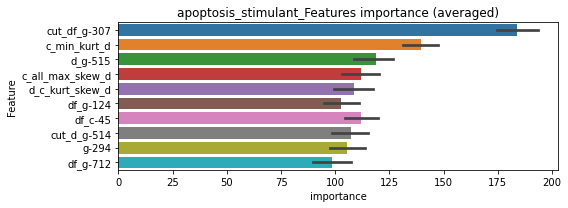

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00052776	valid_1's binary_logloss: 0.00630343
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.00052776	valid_1's binary_logloss: 0.00630343


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0008157	valid_1's binary_logloss: 0.0153322
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000795581	valid_1's binary_logloss: 0.00614136
Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.011480560639145524


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000788605	valid_1's binary_logloss: 0.0181523
neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283
target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328904	valid_1's binary_logloss: 0.0226829
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00080027	valid_1's binary_logloss: 0.01792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332661	valid_1's binary_logloss: 0.0152416
[600]	training's binary_logloss: 0.000653521	valid_1's binary_logloss: 0.0091122
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000553778	valid_1's binary_logloss: 0.00870143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346593	valid_1's binary_logloss: 0.00923051
[600]	training's binary_logloss: 0.000672566	valid_1's binary_logloss: 0.00411174
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000605441	valid_1's binary_logloss: 0.00400868
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0043799, Threshold: 0.0134652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, conf_0:0.00943, conf_1:0.01750
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0134652
Num_p_label: 7.0, Expected: 7.9, Adj_threshold_2: 0.0534652
threshold: 0.0534652, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307698	valid_1's binary_logloss: 0.0239246
[600]	training's binary_logloss: 0.000619424	valid_1's binary_logloss: 0.0189565
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000547969	valid_1's binary_logloss: 0.0187488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322995	valid_1's binary_logloss: 0.0151152
[600]	training's binary_logloss: 0.00063931	valid_1's binary_logloss: 0.00915768
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000530524	valid_1's binary_logloss: 0.00880031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332129	valid_1's binary_logloss: 0.00837611
[600]	training's binary_logloss: 0.000648216	valid_1's binary_logloss: 0.00371234
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00053931	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0151472, Threshold: 0.0534652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00197
Num_p_label: 13.0, conf_0:0.04277, conf_1:0.06416
Num_p_label: 13.0, Expected: 7.9, Adj_threshold_1: 0.0534652
threshold: 0.0534652, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307901	valid_1's binary_logloss: 0.0176471
[600]	training's binary_logloss: 0.000614979	valid_1's binary_logloss: 0.0112134
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000561614	valid_1's binary_logloss: 0.0111213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317038	valid_1's binary_logloss: 0.0161057
[600]	training's binary_logloss: 0.000624253	valid_1's binary_logloss: 0.0100632
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000521366	valid_1's binary_logloss: 0.00984143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325938	valid_1's binary_logloss: 0.011925
[600]	training's binary_logloss: 0.000630258	valid_1's binary_logloss: 0.00629156
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00059373	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0182687, Threshold: 0.0534652, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0037670 Vs.target_rate: 0.00197
Num_p_label: 15.0, conf_0:0.04812, conf_1:0.05881
Num_p_label: 15.0, Expected: 7.9, Adj_threshold_1: 0.0534652
threshold: 0.0534652, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


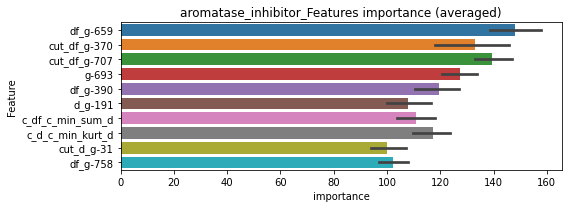

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000654568	valid_1's binary_logloss: 0.0107589


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000587275	valid_1's binary_logloss: 0.00921287


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000606261	valid_1's binary_logloss: 0.00662413


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000596494	valid_1's binary_logloss: 0.0104709


aromatase_inhibitor logloss: 0.00927032324879559


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000355644	valid_1's binary_logloss: 0.00120253
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000172674	valid_1's binary_logloss: 0.000800664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000349408	valid_1's binary_logloss: 0.00169626
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000178065	valid_1's binary_logloss: 0.00126521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000355441	valid_1's binary_logloss: 0.000357734
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000176845	valid_1's binary_logloss: 0.000179473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035098	valid_1's binary_logloss: 0.00100555


1 / 3 AUC score:1.000
y_Threshold: 0.0005216, Threshold: 0.0014061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00098, conf_1:0.00183
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0014061
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0414061
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.0814061
threshold: 0.0814061, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000175298	valid_1's binary_logloss: 0.000655122


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340216	valid_1's binary_logloss: 0.000417171
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000168751	valid_1's binary_logloss: 0.000214058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340294	valid_1's binary_logloss: 0.00102286
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00016945	valid_1's binary_logloss: 0.000684404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342297	valid_1's binary_logloss: 0.000343343
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00017011	valid_1's binary_logloss: 0.000169052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000338886	valid_1's binary_logloss: 0.00110113


2 / 3 AUC score:1.000
y_Threshold: 0.1057031, Threshold: 0.0814061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, conf_0:0.06512, conf_1:0.09769
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0814061
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.1214061
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1614061
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.2014061
threshold: 0.2014061, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000168883	valid_1's binary_logloss: 0.000738506


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340216	valid_1's binary_logloss: 0.000417171
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000168751	valid_1's binary_logloss: 0.000214058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340294	valid_1's binary_logloss: 0.00102286
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00016945	valid_1's binary_logloss: 0.000684404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342297	valid_1's binary_logloss: 0.000343343
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00017011	valid_1's binary_logloss: 0.000169052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000338886	valid_1's binary_logloss: 0.00110113


3 / 3 AUC score:1.000
y_Threshold: 0.1057031, Threshold: 0.2014061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.18127, conf_1:0.22155
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2014061
threshold: 0.2014061, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000168883	valid_1's binary_logloss: 0.000738506


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


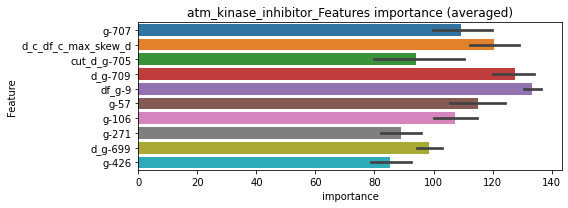

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000169623	valid_1's binary_logloss: 0.000213143
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000169496	valid_1's binary_logloss: 0.000213005


================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171443	valid_1's binary_logloss: 0.00051206
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000170353	valid_1's binary_logloss: 0.000510192


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170481	valid_1's binary_logloss: 0.000168385
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000169522	valid_1's binary_logloss: 0.000167405


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170744	valid_1's binary_logloss: 0.000266739


atm_kinase_inhibitor logloss: 0.0002881811415095693


Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.000167215	valid_1's binary_logloss: 0.000261969
neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406714	valid_1's binary_logloss: 0.000931877
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000206095	valid_1's binary_logloss: 0.000596615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000410181	valid_1's binary_logloss: 0.00479479
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000207707	valid_1's binary_logloss: 0.00423222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415573	valid_1's binary_logloss: 0.000454369
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000208332	valid_1's binary_logloss: 0.000232284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415373	valid_1's binary_logloss: 0.000514651


1 / 3 AUC score:1.000
y_Threshold: 0.0005795, Threshold: 0.0022465, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00157, conf_1:0.00292
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0022465
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0422465
threshold: 0.0422465, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000203632	valid_1's binary_logloss: 0.000252125


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388407	valid_1's binary_logloss: 0.000428854
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000197189	valid_1's binary_logloss: 0.000221024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386459	valid_1's binary_logloss: 0.00218229
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000196495	valid_1's binary_logloss: 0.00176191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386356	valid_1's binary_logloss: 0.000431539
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00019721	valid_1's binary_logloss: 0.000222477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038893	valid_1's binary_logloss: 0.000450845


2 / 3 AUC score:1.000
y_Threshold: 0.0573909, Threshold: 0.0422465, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00029
Num_p_label: 5.0, conf_0:0.03380, conf_1:0.05070
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_1: 0.0422465


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000197421	valid_1's binary_logloss: 0.000232084


Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0822465
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_3: 0.1222465
threshold: 0.1222465, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388407	valid_1's binary_logloss: 0.000428854
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000197189	valid_1's binary_logloss: 0.000221024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386459	valid_1's binary_logloss: 0.00218229
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000196495	valid_1's binary_logloss: 0.00176191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386356	valid_1's binary_logloss: 0.000431539
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00019721	valid_1's binary_logloss: 0.000222477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038893	valid_1's binary_logloss: 0.000450845


3 / 3 AUC score:1.000
y_Threshold: 0.0573909, Threshold: 0.1222465, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.11002, conf_1:0.13447
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.1222465
threshold: 0.1222465, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000197421	valid_1's binary_logloss: 0.000232084


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


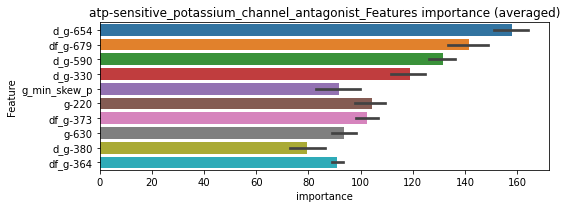

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


[1000]	training's binary_logloss: 0.0001959	valid_1's binary_logloss: 0.000233926
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.0001959	valid_1's binary_logloss: 0.000233926
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


[1000]	training's binary_logloss: 0.000194394	valid_1's binary_logloss: 0.000487266
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.0001945	valid_1's binary_logloss: 0.000487244
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


[1000]	training's binary_logloss: 0.000194871	valid_1's binary_logloss: 0.000230681
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000194871	valid_1's binary_logloss: 0.000230681
Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0002972985611543483


[1000]	training's binary_logloss: 0.000195251	valid_1's binary_logloss: 0.00023737
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000195251	valid_1's binary_logloss: 0.00023737
neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798121	valid_1's binary_logloss: 0.00180899
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000298759	valid_1's binary_logloss: 0.000905435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078995	valid_1's binary_logloss: 0.00150183
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000305299	valid_1's binary_logloss: 0.000746084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000790282	valid_1's binary_logloss: 0.001219
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000306711	valid_1's binary_logloss: 0.000519362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810574	valid_1's binary_logloss: 0.00140474


1 / 3 AUC score:1.000
y_Threshold: 0.0013747, Threshold: 0.0079191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00554, conf_1:0.01029
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0079191
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0479191
threshold: 0.0479191, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000298642	valid_1's binary_logloss: 0.00060036


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000745203	valid_1's binary_logloss: 0.00161947
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000292966	valid_1's binary_logloss: 0.000792219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000727484	valid_1's binary_logloss: 0.00216722
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000289221	valid_1's binary_logloss: 0.00112293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739974	valid_1's binary_logloss: 0.00107588
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000289921	valid_1's binary_logloss: 0.000448479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737126	valid_1's binary_logloss: 0.00150414


2 / 3 AUC score:1.000
y_Threshold: 0.1421025, Threshold: 0.0479191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0082873 Vs.target_rate: 0.00050
Num_p_label: 33.0, conf_0:0.03834, conf_1:0.05750
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_1: 0.0479191
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0879191
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.1279191
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.1679191


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000285572	valid_1's binary_logloss: 0.000755737


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.2079191
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_6: 0.2479191
threshold: 0.2479191, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000745203	valid_1's binary_logloss: 0.00161947
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000292966	valid_1's binary_logloss: 0.000792219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000727484	valid_1's binary_logloss: 0.00216722
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000289221	valid_1's binary_logloss: 0.00112293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739974	valid_1's binary_logloss: 0.00107588
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000289921	valid_1's binary_logloss: 0.000448479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737126	valid_1's binary_logloss: 0.00150414


3 / 3 AUC score:1.000
y_Threshold: 0.1421025, Threshold: 0.2479191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.22313, conf_1:0.27271
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.2479191
threshold: 0.2479191, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000285572	valid_1's binary_logloss: 0.000755737


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


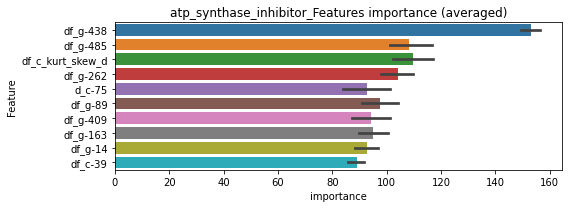

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000304174	valid_1's binary_logloss: 0.000585527
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.00029239	valid_1's binary_logloss: 0.00061441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000297447	valid_1's binary_logloss: 0.000450167


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005679484458873302


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00029795	valid_1's binary_logloss: 0.000621746
neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273
target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812207	valid_1's binary_logloss: 0.0831927
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00157687	valid_1's binary_logloss: 0.0737763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867625	valid_1's binary_logloss: 0.0608583
[600]	training's binary_logloss: 0.00137075	valid_1's binary_logloss: 0.0462381
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00112748	valid_1's binary_logloss: 0.0450275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815583	valid_1's binary_logloss: 0.0486743
[600]	training's binary_logloss: 0.00139311	valid_1's binary_logloss: 0.034645
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00141924	valid_1's binary_logloss: 0.0345772
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.998
y_Threshold: 0.0099931, Threshold: 0.0275098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, conf_0:0.01926, conf_1:0.03576
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0275098
Num_p_label: 2.0, Expected: 16.2, Adj_threshold_2: 0.0675098
threshold: 0.0675098, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 647.0/3781, y_label_rate: 0.1711188
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742725	valid_1's binary_logloss: 0.0589791
[600]	training's binary_logloss: 0.00125167	valid_1's binary_logloss: 0.0477952
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00124824	valid_1's binary_logloss: 0.0477802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733779	valid_1's binary_logloss: 0.0469588
[600]	training's binary_logloss: 0.0012737	valid_1's binary_logloss: 0.0334038
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00119851	valid_1's binary_logloss: 0.0329427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00749638	valid_1's binary_logloss: 0.0493973
[600]	training's binary_logloss: 0.00127693	valid_1's binary_logloss: 0.0368834
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00117659	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0331914, Threshold: 0.0675098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0040181 Vs.target_rate: 0.00407
Num_p_label: 16.0, conf_0:0.05401, conf_1:0.08101
threshold: 0.0675098, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679048	valid_1's binary_logloss: 0.0707329
[600]	training's binary_logloss: 0.00117893	valid_1's binary_logloss: 0.0583542
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000852061	valid_1's binary_logloss: 0.0566644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00682561	valid_1's binary_logloss: 0.0603143
[600]	training's binary_logloss: 0.00118292	valid_1's binary_logloss: 0.0474826
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00106959	valid_1's binary_logloss: 0.0466768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00738266	valid_1's binary_logloss: 0.0362757
[600]	training's binary_logloss: 0.00125762	valid_1's binary_logloss: 0.0235163
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000792927	valid_1's binary_logloss: 

3 / 3 AUC score:0.999
y_Threshold: 0.0313014, Threshold: 0.0675098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0032647 Vs.target_rate: 0.00407
Num_p_label: 13.0, conf_0:0.06076, conf_1:0.07426
threshold: 0.0675098, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 633.0/3753, y_label_rate: 0.1686651


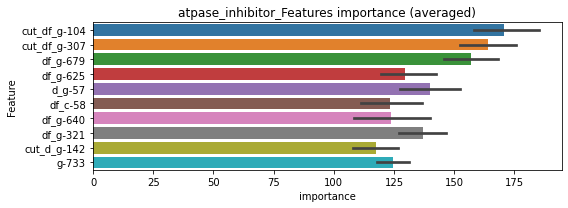

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00241125	valid_1's binary_logloss: 0.0366468
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00175827	valid_1's binary_logloss: 0.0471054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000893765	valid_1's binary_logloss: 0.0244517


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000974251	valid_1's binary_logloss: 0.0322327


atpase_inhibitor logloss: 0.03510958058467022


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134122	valid_1's binary_logloss: 0.00253452
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000383231	valid_1's binary_logloss: 0.000928754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130783	valid_1's binary_logloss: 0.00412037
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000370934	valid_1's binary_logloss: 0.00198726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133122	valid_1's binary_logloss: 0.00255535
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000376172	valid_1's binary_logloss: 0.000964939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001311	valid_1's binary_logloss: 0.00583694
[600]	training's binary_logloss: 0.000366451	valid_1's binary_logloss: 0.00327268

1 / 3 AUC score:1.000
y_Threshold: 0.0020006, Threshold: 0.0085505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00599, conf_1:0.01112
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0085505
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0485505
threshold: 0.0485505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124909	valid_1's binary_logloss: 0.00249019
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000372598	valid_1's binary_logloss: 0.00093347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122855	valid_1's binary_logloss: 0.00391441
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000366968	valid_1's binary_logloss: 0.00196339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012757	valid_1's binary_logloss: 0.00188137
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000370043	valid_1's binary_logloss: 0.000622355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123093	valid_1's binary_logloss: 0.00546453
[600]	training's binary_logloss: 0.000365729	valid_1's binary_logloss: 0.00336811

2 / 3 AUC score:1.000
y_Threshold: 0.0595996, Threshold: 0.0485505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0067805 Vs.target_rate: 0.00080
Num_p_label: 27.0, conf_0:0.03884, conf_1:0.05826
Num_p_label: 27.0, Expected: 3.2, Adj_threshold_1: 0.0485505
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_2: 0.0885505
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1285505
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_4: 0.1685505
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_5: 0.2085505
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_6: 0.2485505
threshold: 0.2485505, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124909	valid_1's binary_logloss: 0.00249019
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000372598	valid_1's binary_logloss: 0.00093347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122855	valid_1's binary_logloss: 0.00391441
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000366968	valid_1's binary_logloss: 0.00196339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012757	valid_1's binary_logloss: 0.00188137
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000370043	valid_1's binary_logloss: 0.000622355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123093	valid_1's binary_logloss: 0.00546453


3 / 3 AUC score:1.000
y_Threshold: 0.0595996, Threshold: 0.2485505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, conf_0:0.22370, conf_1:0.27341
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.2485505


[600]	training's binary_logloss: 0.000365729	valid_1's binary_logloss: 0.00336811
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000365739	valid_1's binary_logloss: 0.0033678


threshold: 0.2485505, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


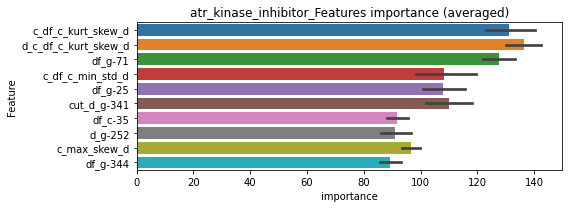

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000374085	valid_1's binary_logloss: 0.000876052


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000366196	valid_1's binary_logloss: 0.00197985


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00037827	valid_1's binary_logloss: 0.000632756


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000374797	valid_1's binary_logloss: 0.0024712


atr_kinase_inhibitor logloss: 0.0014899964904036835


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989528	valid_1's binary_logloss: 0.0767887
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00211148	valid_1's binary_logloss: 0.0666165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0099493	valid_1's binary_logloss: 0.0513257
[600]	training's binary_logloss: 0.00150612	valid_1's binary_logloss: 0.0292809
[900]	training's binary_logloss: 0.000790767	valid_1's binary_logloss: 0.0266998
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000754074	valid_1's binary_logloss: 0.0265591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010028	valid_1's binary_logloss: 0.0565779
[600]	training's binary_logloss: 0.00151185	valid_1's binary_logloss: 0.0416188
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000961217	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.995
y_Threshold: 0.0112478, Threshold: 0.0751604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.05261, conf_1:0.09771
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0751604
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.1151604
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_3: 0.1551604
threshold: 0.1551604, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00864218	valid_1's binary_logloss: 0.0693573
[600]	training's binary_logloss: 0.00135076	valid_1's binary_logloss: 0.0574469
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000884716	valid_1's binary_logloss: 0.055937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00850372	valid_1's binary_logloss: 0.0616161
[600]	training's binary_logloss: 0.00135364	valid_1's binary_logloss: 0.0480162
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000980241	valid_1's binary_logloss: 0.0468891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846223	valid_1's binary_logloss: 0.0576102
[600]	training's binary_logloss: 0.0013764	valid_1's binary_logloss: 0.0447998
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00124575	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.999
y_Threshold: 0.0352498, Threshold: 0.1551604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 635.0/3756
p_label_rate: 0.0077850 Vs.target_rate: 0.00403
Num_p_label: 31.0, conf_0:0.12413, conf_1:0.18619
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_1: 0.1551604
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_2: 0.1951604
threshold: 0.1951604, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 635.0/3756, y_label_rate: 0.1690628
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752847	valid_1's binary_logloss: 0.0730452
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00138007	valid_1's binary_logloss: 0.0618067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00817281	valid_1's binary_logloss: 0.0455544
[600]	training's binary_logloss: 0.0013282	valid_1's binary_logloss: 0.034197
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00131899	valid_1's binary_logloss: 0.0341371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832046	valid_1's binary_logloss: 0.0496655
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00170737	valid_1's binary_logloss: 0.0373916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087447	valid_1's binary_logloss: 0.0436596
[600]	training

3 / 3 AUC score:0.998
y_Threshold: 0.0399110, Threshold: 0.1951604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 626.0/3738
p_label_rate: 0.0067805 Vs.target_rate: 0.00403
Num_p_label: 27.0, conf_0:0.17564, conf_1:0.21468
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_1: 0.1951604
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_2: 0.2351604
threshold: 0.2351604, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 626.0/3738, y_label_rate: 0.1674692


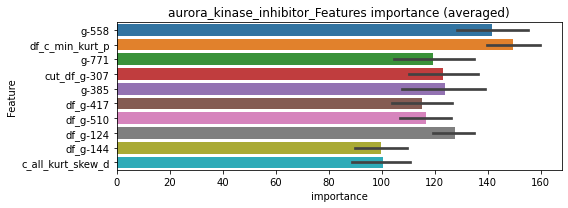

len(train_index) : 2803
len(valid_index) : 935
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00117233	valid_1's binary_logloss: 0.0304222


len(train_index) : 2803
len(valid_index) : 935
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00101962	valid_1's binary_logloss: 0.0294535


len(train_index) : 2804
len(valid_index) : 934
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0011741	valid_1's binary_logloss: 0.0311014


len(train_index) : 2804
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aurora_kinase_inhibitor logloss: 0.03082277994743976


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00158719	valid_1's binary_logloss: 0.032316
neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383735	valid_1's binary_logloss: 0.000538883
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000199859	valid_1's binary_logloss: 0.000305902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000370753	valid_1's binary_logloss: 0.000789616
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000187667	valid_1's binary_logloss: 0.000491815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376083	valid_1's binary_logloss: 0.000549495
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000189844	valid_1's binary_logloss: 0.000313753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000375975	valid_1's binary_logloss: 0.000450933


1 / 3 AUC score:1.000
y_Threshold: 0.0006565, Threshold: 0.0060432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00423, conf_1:0.00786
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0060432
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0460432
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.0860432
threshold: 0.0860432, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000190696	valid_1's binary_logloss: 0.00023838


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000339566	valid_1's binary_logloss: 0.000464585
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00016967	valid_1's binary_logloss: 0.000244624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000333678	valid_1's binary_logloss: 0.0010032
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000169358	valid_1's binary_logloss: 0.000667234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00033536	valid_1's binary_logloss: 0.000379899
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000169365	valid_1's binary_logloss: 0.000193065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000336426	valid_1's binary_logloss: 0.000368707


2 / 3 AUC score:1.000
y_Threshold: 0.1172309, Threshold: 0.0860432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00025
Num_p_label: 37.0, conf_0:0.06883, conf_1:0.10325
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0860432
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1260432
Num_p_label: 26.0, Expected: 1.0, Adj_threshold_3: 0.1660432
Num_p_label: 23.0, Expected: 1.0, Adj_threshold_4: 0.2060432
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_5: 0.2460432
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_6: 0.2860432
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_7: 0.3260432
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_8: 0.3660432
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_9: 0.4060432
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_10: 0.4460432


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00016974	valid_1's binary_logloss: 0.00019069


threshold: 0.4860432, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000339566	valid_1's binary_logloss: 0.000464585
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00016967	valid_1's binary_logloss: 0.000244624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000333678	valid_1's binary_logloss: 0.0010032
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000169358	valid_1's binary_logloss: 0.000667234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00033536	valid_1's binary_logloss: 0.000379899
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000169365	valid_1's binary_logloss: 0.000193065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000336426	valid_1's binary_logloss: 0.000368707


3 / 3 AUC score:1.000
y_Threshold: 0.1172309, Threshold: 0.4860432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, conf_0:0.43744, conf_1:0.53465
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.4860432
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.5260432
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.5660432
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.6060432
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.6460432
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.6860432
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_7: 0.7260432
threshold: 0.7260432, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00016974	valid_1's binary_logloss: 0.00019069


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


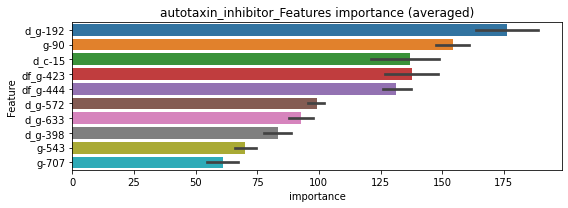

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173764	valid_1's binary_logloss: 0.000228597
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000172751	valid_1's binary_logloss: 0.0002273


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


[1000]	training's binary_logloss: 0.000172827	valid_1's binary_logloss: 0.000298415
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000172589	valid_1's binary_logloss: 0.000298086
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000174848	valid_1's binary_logloss: 0.000207506
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000173971	valid_1's binary_logloss: 0.000206491


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


autotaxin_inhibitor logloss: 0.00023323461877897695


[1000]	training's binary_logloss: 0.00017447	valid_1's binary_logloss: 0.000201391
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000174172	valid_1's binary_logloss: 0.000201062
neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493277	valid_1's binary_logloss: 0.0387355
[600]	training's binary_logloss: 0.000865304	valid_1's binary_logloss: 0.0289941
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00084917	valid_1's binary_logloss: 0.0289211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053804	valid_1's binary_logloss: 0.0212786
[600]	training's binary_logloss: 0.000897114	valid_1's binary_logloss: 0.0115439
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000651541	valid_1's binary_logloss: 0.0106082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512256	valid_1's binary_logloss: 0.0280824
[600]	training's binary_logloss: 0.000877526	valid_1's binary_logloss: 0.0179567
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000780708	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0071478, Threshold: 0.0237075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01660, conf_1:0.03082
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0237075
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.0637075
threshold: 0.0637075, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462147	valid_1's binary_logloss: 0.0360457
[600]	training's binary_logloss: 0.000826498	valid_1's binary_logloss: 0.0275204
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00076842	valid_1's binary_logloss: 0.0273239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462658	valid_1's binary_logloss: 0.029952
[600]	training's binary_logloss: 0.000838845	valid_1's binary_logloss: 0.022523
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000684212	valid_1's binary_logloss: 0.0222772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475647	valid_1's binary_logloss: 0.0274146
[600]	training's binary_logloss: 0.000840036	valid_1's binary_logloss: 0.0185068
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000657906	valid_1's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.0306470, Threshold: 0.0637075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0102963 Vs.target_rate: 0.00252
Num_p_label: 41.0, conf_0:0.05097, conf_1:0.07645
Num_p_label: 41.0, Expected: 10.0, Adj_threshold_1: 0.0637075


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00231271	valid_1's binary_logloss: 0.0370946


Num_p_label: 27.0, Expected: 10.0, Adj_threshold_2: 0.1037075
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_3: 0.1437075
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_4: 0.1837075
threshold: 0.1837075, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440886	valid_1's binary_logloss: 0.0284624
[600]	training's binary_logloss: 0.000804307	valid_1's binary_logloss: 0.0191396
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000612914	valid_1's binary_logloss: 0.0183991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437623	valid_1's binary_logloss: 0.0250916
[600]	training's binary_logloss: 0.000803085	valid_1's binary_logloss: 0.0173945
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000592273	valid_1's binary_logloss: 0.0166066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435885	valid_1's binary_logloss: 0.0219812
[600]	training's binary_logloss: 0.00081027	valid_1's binary_logloss: 0.0140071
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000684378	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0413098, Threshold: 0.1837075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0047715 Vs.target_rate: 0.00252
Num_p_label: 19.0, conf_0:0.16534, conf_1:0.20208
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_1: 0.1837075
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_2: 0.2237075
threshold: 0.2237075, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


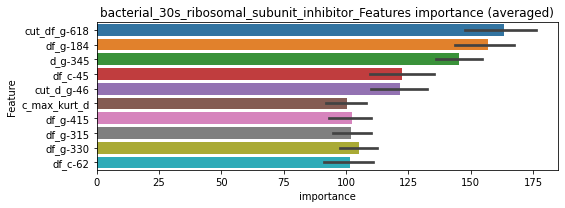

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000612224	valid_1's binary_logloss: 0.0164757


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000945291	valid_1's binary_logloss: 0.0191301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000784009	valid_1's binary_logloss: 0.0167931


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000664045	valid_1's binary_logloss: 0.0171987


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.017399388765476302


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00664232	valid_1's binary_logloss: 0.0507494
[600]	training's binary_logloss: 0.00111901	valid_1's binary_logloss: 0.0366017
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00102286	valid_1's binary_logloss: 0.0363913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689903	valid_1's binary_logloss: 0.0380784
[600]	training's binary_logloss: 0.00115331	valid_1's binary_logloss: 0.0270488
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00109304	valid_1's binary_logloss: 0.0269434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663287	valid_1's binary_logloss: 0.046833
[600]	training's binary_logloss: 0.00114049	valid_1's binary_logloss: 0.0371297
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00120742	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0099480, Threshold: 0.0300313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.02102, conf_1:0.03904
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0300313
Num_p_label: 11.0, Expected: 13.4, Adj_threshold_2: 0.0700313
threshold: 0.0700313, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3794, y_label_rate: 0.1718503
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00581507	valid_1's binary_logloss: 0.0524909
[600]	training's binary_logloss: 0.00104467	valid_1's binary_logloss: 0.0432078
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000825913	valid_1's binary_logloss: 0.0425868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585575	valid_1's binary_logloss: 0.0405204
[600]	training's binary_logloss: 0.00105412	valid_1's binary_logloss: 0.0320564
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00103419	valid_1's binary_logloss: 0.0320104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621842	valid_1's binary_logloss: 0.0293422
[600]	training's binary_logloss: 0.00108484	valid_1's binary_logloss: 0.0177682
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000724083	valid_1's binary_logloss: 

2 / 3 AUC score:0.999
y_Threshold: 0.0302420, Threshold: 0.0700313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0075339 Vs.target_rate: 0.00336
Num_p_label: 30.0, conf_0:0.05603, conf_1:0.08404
Num_p_label: 30.0, Expected: 13.4, Adj_threshold_1: 0.0700313
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_2: 0.1100313
threshold: 0.1100313, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539994	valid_1's binary_logloss: 0.0308547
[600]	training's binary_logloss: 0.000999768	valid_1's binary_logloss: 0.0194162
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.00070686	valid_1's binary_logloss: 0.0184209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556229	valid_1's binary_logloss: 0.0351018
[600]	training's binary_logloss: 0.00101342	valid_1's binary_logloss: 0.0218972
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000724416	valid_1's binary_logloss: 0.020653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557702	valid_1's binary_logloss: 0.026189
[600]	training's binary_logloss: 0.00103491	valid_1's binary_logloss: 0.0163003
[900]	training's binary_logloss: 0.000637054	valid_1's binary_logloss: 0.0150693
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0298353, Threshold: 0.1100313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 643.0/3776
p_label_rate: 0.0040181 Vs.target_rate: 0.00336
Num_p_label: 16.0, conf_0:0.09903, conf_1:0.12103
threshold: 0.1100313, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 643.0/3776, y_label_rate: 0.1702860


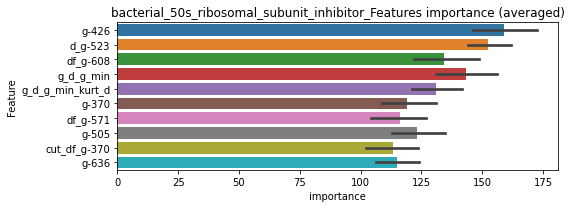

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000879696	valid_1's binary_logloss: 0.0231892


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000776821	valid_1's binary_logloss: 0.0215182


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00093983	valid_1's binary_logloss: 0.014116


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000835857	valid_1's binary_logloss: 0.0214204


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.020060919758627425


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239675	valid_1's binary_logloss: 0.0128537
[600]	training's binary_logloss: 0.000520411	valid_1's binary_logloss: 0.00738842
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000488005	valid_1's binary_logloss: 0.00731202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238575	valid_1's binary_logloss: 0.0150002
[600]	training's binary_logloss: 0.000513976	valid_1's binary_logloss: 0.00916271
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000494536	valid_1's binary_logloss: 0.0090637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245285	valid_1's binary_logloss: 0.00648029
[600]	training's binary_logloss: 0.000531608	valid_1's binary_logloss: 0.00276739
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000488002	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0030663, Threshold: 0.0245821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01721, conf_1:0.03196
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0245821
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.0645821
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_3: 0.1045821
threshold: 0.1045821, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022139	valid_1's binary_logloss: 0.00948331
[600]	training's binary_logloss: 0.000493551	valid_1's binary_logloss: 0.00475538
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000462978	valid_1's binary_logloss: 0.00470046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220444	valid_1's binary_logloss: 0.0141171
[600]	training's binary_logloss: 0.000490137	valid_1's binary_logloss: 0.00834459
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00047744	valid_1's binary_logloss: 0.0082977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231743	valid_1's binary_logloss: 0.00705742
[600]	training's binary_logloss: 0.000509319	valid_1's binary_logloss: 0.00317152
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000472921	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0555013, Threshold: 0.1045821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, conf_0:0.08367, conf_1:0.12550
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_1: 0.1045821
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1445821
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_3: 0.1845821
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_4: 0.2245821
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_5: 0.2645821
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_6: 0.3045821
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_7: 0.3445821
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_8: 0.3845821
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.4245821
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_10: 0.4645821
threshold: 0.5045821, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022139	valid_1's binary_logloss: 0.00948331
[600]	training's binary_logloss: 0.000493551	valid_1's binary_logloss: 0.00475538
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000462978	valid_1's binary_logloss: 0.00470046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220444	valid_1's binary_logloss: 0.0141171
[600]	training's binary_logloss: 0.000490137	valid_1's binary_logloss: 0.00834459
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00047744	valid_1's binary_logloss: 0.0082977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231743	valid_1's binary_logloss: 0.00705742
[600]	training's binary_logloss: 0.000509319	valid_1's binary_logloss: 0.00317152
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000472921	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0555013, Threshold: 0.5045821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, conf_0:0.45412, conf_1:0.55504
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.5045821
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_2: 0.5445821
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.5845821
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.6245821
threshold: 0.6245821, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


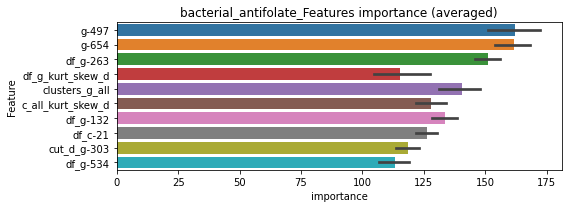

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000487143	valid_1's binary_logloss: 0.00450286


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455619	valid_1's binary_logloss: 0.00632771
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000456118	valid_1's binary_logloss: 0.00632501


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000494466	valid_1's binary_logloss: 0.00236708


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000472611	valid_1's binary_logloss: 0.00361336


bacterial_antifolate logloss: 0.004203817816762137


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268
target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203015	valid_1's binary_logloss: 0.178057
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0174658	valid_1's binary_logloss: 0.176235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203961	valid_1's binary_logloss: 0.154586
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00920718	valid_1's binary_logloss: 0.150056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209579	valid_1's binary_logloss: 0.150934
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00745622	valid_1's binary_logloss: 0.143504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220158	valid_1's binary_logloss: 0.145447


1 / 3 AUC score:0.965
y_Threshold: 0.0447097, Threshold: 0.2042932, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00611829	valid_1's binary_logloss: 0.135974


Remove_noisy_data: 266 → Positive_corect_labels: 586/3655
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, conf_0:0.14301, conf_1:0.26558
threshold: 0.2042932, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 586.0/3655, y_label_rate: 0.1603283
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118166	valid_1's binary_logloss: 0.107122
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00237696	valid_1's binary_logloss: 0.0989865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118446	valid_1's binary_logloss: 0.0952436
[600]	training's binary_logloss: 0.00201387	valid_1's binary_logloss: 0.0831911
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00160825	valid_1's binary_logloss: 0.0825469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127078	valid_1's binary_logloss: 0.0878955
[600]	training's binary_logloss: 0.00206348	valid_1's binary_logloss: 0.071742
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00190995	valid_1's binary_logloss: 0.0713085
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.996
y_Threshold: 0.0560334, Threshold: 0.2042932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 562.0/3607
p_label_rate: 0.0215972 Vs.target_rate: 0.00806
Num_p_label: 86.0, conf_0:0.16343, conf_1:0.24515
Num_p_label: 86.0, Expected: 32.1, Adj_threshold_1: 0.2042932
Num_p_label: 76.0, Expected: 32.1, Adj_threshold_2: 0.2442932
Num_p_label: 64.0, Expected: 32.1, Adj_threshold_3: 0.2842932
Num_p_label: 55.0, Expected: 32.1, Adj_threshold_4: 0.3242932
Num_p_label: 52.0, Expected: 32.1, Adj_threshold_5: 0.3642932
Num_p_label: 49.0, Expected: 32.1, Adj_threshold_6: 0.4042932
Num_p_label: 43.0, Expected: 32.1, Adj_threshold_7: 0.4442932
threshold: 0.4442932, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 562.0/3607, y_label_rate: 0.1558082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101117	valid_1's binary_logloss: 0.0898655
[600]	training's binary_logloss: 0.00175625	valid_1's binary_logloss: 0.0783104
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00139531	valid_1's binary_logloss: 0.0772207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101679	valid_1's binary_logloss: 0.0927861
[600]	training's binary_logloss: 0.00171957	valid_1's binary_logloss: 0.0821786
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00162207	valid_1's binary_logloss: 0.0816965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107228	valid_1's binary_logloss: 0.0699114
[600]	training's binary_logloss: 0.00182644	valid_1's binary_logloss: 0.0538023
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00136744	valid_1's binary_logloss: 0.052

3 / 3 AUC score:0.996
y_Threshold: 0.0537524, Threshold: 0.4442932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 544.0/3571
p_label_rate: 0.0143144 Vs.target_rate: 0.00806
Num_p_label: 57.0, conf_0:0.39986, conf_1:0.48872
Num_p_label: 57.0, Expected: 32.1, Adj_threshold_1: 0.4442932
Num_p_label: 52.0, Expected: 32.1, Adj_threshold_2: 0.4842932
Num_p_label: 47.0, Expected: 32.1, Adj_threshold_3: 0.5242932
threshold: 0.5242932, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 544.0/3571, y_label_rate: 0.1523383


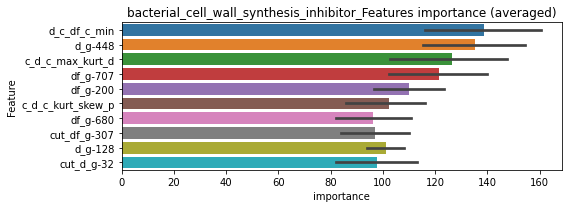

len(train_index) : 2678
len(valid_index) : 893
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2678
len(valid_index) : 893
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00521999	valid_1's binary_logloss: 0.0898163
Training until validation scores don't improve for 30 rounds


len(train_index) : 2678
len(valid_index) : 893
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00235618	valid_1's binary_logloss: 0.0569436
Training until validation scores don't improve for 30 rounds


len(train_index) : 2679
len(valid_index) : 892
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00209534	valid_1's binary_logloss: 0.0702988
Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.07313287928383382


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00273446	valid_1's binary_logloss: 0.0754754
neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826015	valid_1's binary_logloss: 0.0450929
[600]	training's binary_logloss: 0.00129468	valid_1's binary_logloss: 0.0273265
[900]	training's binary_logloss: 0.000708231	valid_1's binary_logloss: 0.0243161
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.00070415	valid_1's binary_logloss: 0.0242564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00785249	valid_1's binary_logloss: 0.0486147
[600]	training's binary_logloss: 0.00128824	valid_1's binary_logloss: 0.0355669
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000812552	valid_1's binary_logloss: 0.0337611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00806255	valid_1's binary_logloss: 0.0528305
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00148691	valid_1's binary_logloss: 

1 / 3 AUC score:0.999


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00157467	valid_1's binary_logloss: 0.0434039


y_Threshold: 0.0099384, Threshold: 0.0288169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02017, conf_1:0.03746
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0288169
Num_p_label: 5.0, Expected: 14.9, Adj_threshold_2: 0.0688169
threshold: 0.0688169, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00684005	valid_1's binary_logloss: 0.0431485
[600]	training's binary_logloss: 0.0011736	valid_1's binary_logloss: 0.0283513
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000801043	valid_1's binary_logloss: 0.0267835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694093	valid_1's binary_logloss: 0.0367045
[600]	training's binary_logloss: 0.00117239	valid_1's binary_logloss: 0.0229197
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000764928	valid_1's binary_logloss: 0.0212752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065609	valid_1's binary_logloss: 0.0526109
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00134533	valid_1's binary_logloss: 0.0425827
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0320471, Threshold: 0.0688169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, conf_0:0.05505, conf_1:0.08258
threshold: 0.0688169, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 644.0/3780, y_label_rate: 0.1703704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645959	valid_1's binary_logloss: 0.0535374
[600]	training's binary_logloss: 0.00111164	valid_1's binary_logloss: 0.0413742
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000995575	valid_1's binary_logloss: 0.0409982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627678	valid_1's binary_logloss: 0.0361438
[600]	training's binary_logloss: 0.00112307	valid_1's binary_logloss: 0.0248409
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000710679	valid_1's binary_logloss: 0.0239553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709831	valid_1's binary_logloss: 0.0345333
[600]	training's binary_logloss: 0.00118519	valid_1's binary_logloss: 0.0209575
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000703407	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0277968, Threshold: 0.0688169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0047715 Vs.target_rate: 0.00374
Num_p_label: 19.0, conf_0:0.06194, conf_1:0.07570
threshold: 0.0688169, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 638.0/3768, y_label_rate: 0.1693206


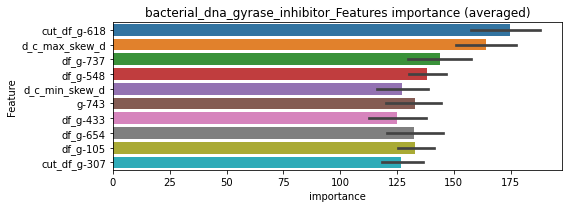

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00147379	valid_1's binary_logloss: 0.0426437
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00119867	valid_1's binary_logloss: 0.0216118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.00105767	valid_1's binary_logloss: 0.0283094


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_dna_gyrase_inhibitor logloss: 0.029704378293825124


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00130141	valid_1's binary_logloss: 0.0262526
neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101465	valid_1's binary_logloss: 0.108409
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00415555	valid_1's binary_logloss: 0.103927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113278	valid_1's binary_logloss: 0.0724414
[600]	training's binary_logloss: 0.00172526	valid_1's binary_logloss: 0.0558637
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00153191	valid_1's binary_logloss: 0.0551767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115811	valid_1's binary_logloss: 0.0619281
[600]	training's binary_logloss: 0.00176776	valid_1's binary_logloss: 0.0478143
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.0014538	valid_1's binary_logloss: 0.0472968
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.993
y_Threshold: 0.0150003, Threshold: 0.0466557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03266, conf_1:0.06065
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0466557
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_2: 0.0866557
threshold: 0.0866557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831021	valid_1's binary_logloss: 0.103448
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00238244	valid_1's binary_logloss: 0.0960158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00907589	valid_1's binary_logloss: 0.0603523
[600]	training's binary_logloss: 0.00146579	valid_1's binary_logloss: 0.0446447
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000820211	valid_1's binary_logloss: 0.0431447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00961328	valid_1's binary_logloss: 0.0417377
[600]	training's binary_logloss: 0.00154944	valid_1's binary_logloss: 0.0266298
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000943644	valid_1's binary_logloss: 0.0251425
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:0.999
y_Threshold: 0.0342055, Threshold: 0.0866557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 626.0/3740
p_label_rate: 0.0052737 Vs.target_rate: 0.00483
Num_p_label: 21.0, conf_0:0.06932, conf_1:0.10399
threshold: 0.0866557, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 626.0/3740, y_label_rate: 0.1673797
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790086	valid_1's binary_logloss: 0.0552128
[600]	training's binary_logloss: 0.00134395	valid_1's binary_logloss: 0.0397859
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000978425	valid_1's binary_logloss: 0.0385398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836525	valid_1's binary_logloss: 0.0617104
[600]	training's binary_logloss: 0.00137783	valid_1's binary_logloss: 0.0487128
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00116723	valid_1's binary_logloss: 0.0481394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00879055	valid_1's binary_logloss: 0.0524328
[600]	training's binary_logloss: 0.00140477	valid_1's binary_logloss: 0.0397199
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00103676	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00175351	valid_1's binary_logloss: 0.0584013


y_Threshold: 0.0298958, Threshold: 0.0866557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 618.0/3724
p_label_rate: 0.0060271 Vs.target_rate: 0.00483
Num_p_label: 24.0, conf_0:0.07799, conf_1:0.09532
threshold: 0.0866557, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 618.0/3724, y_label_rate: 0.1659506


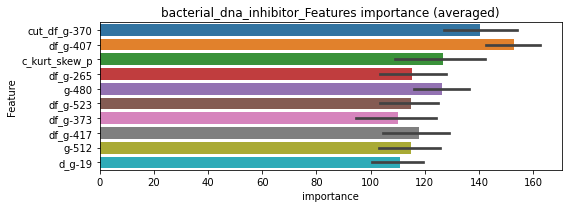

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00146991	valid_1's binary_logloss: 0.0389735
Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00234858	valid_1's binary_logloss: 0.0502228
Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00137918	valid_1's binary_logloss: 0.0338326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000969891	valid_1's binary_logloss: 0.0443438


bacterial_dna_inhibitor logloss: 0.04184315331207028


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107853	valid_1's binary_logloss: 0.00280698
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000324064	valid_1's binary_logloss: 0.00127651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107694	valid_1's binary_logloss: 0.00446759
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000326874	valid_1's binary_logloss: 0.00274499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110803	valid_1's binary_logloss: 0.00171008
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00033095	valid_1's binary_logloss: 0.000614962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108202	valid_1's binary_logloss: 0.00450731


1 / 3 AUC score:1.000
y_Threshold: 0.0017831, Threshold: 0.0053225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00373, conf_1:0.00692
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0053225
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0453225


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000329019	valid_1's binary_logloss: 0.00247604


threshold: 0.0453225, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101806	valid_1's binary_logloss: 0.00252508
[600]	training's binary_logloss: 0.000309152	valid_1's binary_logloss: 0.0011098
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000309152	valid_1's binary_logloss: 0.0011098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000995525	valid_1's binary_logloss: 0.00438746
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000335425	valid_1's binary_logloss: 0.00283396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102056	valid_1's binary_logloss: 0.00153277
[600]	training's binary_logloss: 0.000307713	valid_1's binary_logloss: 0.000524703
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000307713	valid_1's binary_logloss: 0.000524703
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0773915, Threshold: 0.0453225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, conf_0:0.03626, conf_1:0.05439
threshold: 0.0453225, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000318457	valid_1's binary_logloss: 0.00276222


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101806	valid_1's binary_logloss: 0.00252508
[600]	training's binary_logloss: 0.000309152	valid_1's binary_logloss: 0.0011098
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000309152	valid_1's binary_logloss: 0.0011098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000995525	valid_1's binary_logloss: 0.00438746
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000335425	valid_1's binary_logloss: 0.00283396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102056	valid_1's binary_logloss: 0.00153277
[600]	training's binary_logloss: 0.000307713	valid_1's binary_logloss: 0.000524703
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000307713	valid_1's binary_logloss: 0.000524703
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0773915, Threshold: 0.0453225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, conf_0:0.04079, conf_1:0.04985


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000318457	valid_1's binary_logloss: 0.00276222


threshold: 0.0453225, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


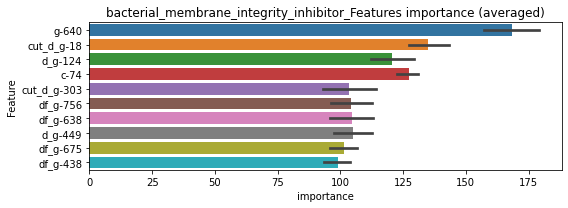

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000318552	valid_1's binary_logloss: 0.000925909


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[774]	training's binary_logloss: 0.00032791	valid_1's binary_logloss: 0.00324606


================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000323216	valid_1's binary_logloss: 0.000563578


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000319276	valid_1's binary_logloss: 0.0018413


bacterial_membrane_integrity_inhibitor logloss: 0.0016443715440731682


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200145	valid_1's binary_logloss: 0.0175805
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000508229	valid_1's binary_logloss: 0.0133752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214395	valid_1's binary_logloss: 0.00739288
[600]	training's binary_logloss: 0.000466153	valid_1's binary_logloss: 0.00363021
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000443104	valid_1's binary_logloss: 0.00353798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216703	valid_1's binary_logloss: 0.00356312
[600]	training's binary_logloss: 0.000471584	valid_1's binary_logloss: 0.00102472
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000457537	valid_1's binary_logloss: 0.000999549
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0032458, Threshold: 0.0148020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01036, conf_1:0.01924
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0148020
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_2: 0.0548020
threshold: 0.0548020, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019415	valid_1's binary_logloss: 0.0175702
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000486592	valid_1's binary_logloss: 0.0143702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202229	valid_1's binary_logloss: 0.00635999
[600]	training's binary_logloss: 0.00044007	valid_1's binary_logloss: 0.00270629
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000415889	valid_1's binary_logloss: 0.0026513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201918	valid_1's binary_logloss: 0.00301137
[600]	training's binary_logloss: 0.000449481	valid_1's binary_logloss: 0.000808194
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000434584	valid_1's binary_logloss: 0.000782823
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0260223, Threshold: 0.0548020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0050226 Vs.target_rate: 0.00130
Num_p_label: 20.0, conf_0:0.04384, conf_1:0.06576


[600]	training's binary_logloss: 0.000445062	valid_1's binary_logloss: 0.00453728
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000459474	valid_1's binary_logloss: 0.00451054


Num_p_label: 20.0, Expected: 5.2, Adj_threshold_1: 0.0548020
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_2: 0.0948020
threshold: 0.0948020, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019415	valid_1's binary_logloss: 0.0175702
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000486592	valid_1's binary_logloss: 0.0143702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202229	valid_1's binary_logloss: 0.00635999
[600]	training's binary_logloss: 0.00044007	valid_1's binary_logloss: 0.00270629
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000415889	valid_1's binary_logloss: 0.0026513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201918	valid_1's binary_logloss: 0.00301137
[600]	training's binary_logloss: 0.000449481	valid_1's binary_logloss: 0.000808194
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000434584	valid_1's binary_logloss: 0.000782823
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0260223, Threshold: 0.0948020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, conf_0:0.08532, conf_1:0.10428
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0948020


[600]	training's binary_logloss: 0.000445062	valid_1's binary_logloss: 0.00453728
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000459474	valid_1's binary_logloss: 0.00451054


threshold: 0.0948020, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


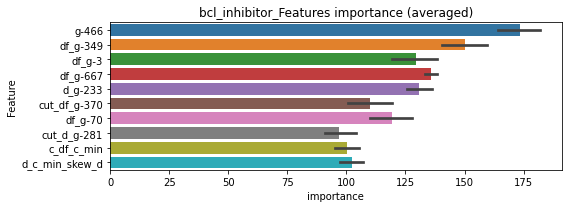

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000470486	valid_1's binary_logloss: 0.0132041


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000443922	valid_1's binary_logloss: 0.00219152


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430792	valid_1's binary_logloss: 0.000812604
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000430783	valid_1's binary_logloss: 0.000812586


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.00042804	valid_1's binary_logloss: 0.00397773


bcl_inhibitor logloss: 0.005047870887540309


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285
target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250729	valid_1's binary_logloss: 0.00707676
[600]	training's binary_logloss: 0.00053656	valid_1's binary_logloss: 0.00264755
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000483722	valid_1's binary_logloss: 0.00248394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235396	valid_1's binary_logloss: 0.0194507
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000553072	valid_1's binary_logloss: 0.0149924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248779	valid_1's binary_logloss: 0.00608124
[600]	training's binary_logloss: 0.000537185	valid_1's binary_logloss: 0.00280244
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000491961	valid_1's binary_logloss: 0.00267342
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0032041, Threshold: 0.0452470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.03167, conf_1:0.05882
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0452470
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.0852470
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1252470
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_4: 0.1652470
threshold: 0.1652470, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227149	valid_1's binary_logloss: 0.00650694
[600]	training's binary_logloss: 0.00050708	valid_1's binary_logloss: 0.00264865
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000495851	valid_1's binary_logloss: 0.0026034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220428	valid_1's binary_logloss: 0.0186617
[600]	training's binary_logloss: 0.000501339	valid_1's binary_logloss: 0.0147985
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00047881	valid_1's binary_logloss: 0.014667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231243	valid_1's binary_logloss: 0.00478338
[600]	training's binary_logloss: 0.00051643	valid_1's binary_logloss: 0.00182828
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000474806	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0575731, Threshold: 0.1652470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0123054 Vs.target_rate: 0.00160
Num_p_label: 49.0, conf_0:0.13220, conf_1:0.19830
Num_p_label: 49.0, Expected: 6.4, Adj_threshold_1: 0.1652470
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_2: 0.2052470
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_3: 0.2452470
Num_p_label: 28.0, Expected: 6.4, Adj_threshold_4: 0.2852470
Num_p_label: 28.0, Expected: 6.4, Adj_threshold_5: 0.3252470
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_6: 0.3652470
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_7: 0.4052470
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_8: 0.4452470
threshold: 0.4452470, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224612	valid_1's binary_logloss: 0.00808354
[600]	training's binary_logloss: 0.000502418	valid_1's binary_logloss: 0.00343794
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000468175	valid_1's binary_logloss: 0.00335723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222388	valid_1's binary_logloss: 0.0129867
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000669874	valid_1's binary_logloss: 0.0106238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216489	valid_1's binary_logloss: 0.0124252
[600]	training's binary_logloss: 0.000497945	valid_1's binary_logloss: 0.00759193
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000493018	valid_1's binary_logloss: 0.00755166
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0882106, Threshold: 0.4452470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0052737 Vs.target_rate: 0.00160
Num_p_label: 21.0, conf_0:0.40072, conf_1:0.48977
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_1: 0.4452470
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_2: 0.4852470
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_3: 0.5252470
threshold: 0.5252470, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


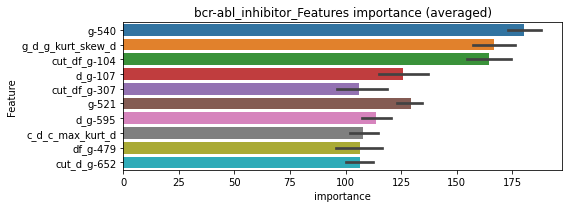

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000484562	valid_1's binary_logloss: 0.00409597


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000485664	valid_1's binary_logloss: 0.00412306


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000473111	valid_1's binary_logloss: 0.00598358


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000487634	valid_1's binary_logloss: 0.0040047


bcr-abl_inhibitor logloss: 0.00455823572437445


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536094	valid_1's binary_logloss: 0.0377518
[600]	training's binary_logloss: 0.000893953	valid_1's binary_logloss: 0.025179
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000742882	valid_1's binary_logloss: 0.0247847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558705	valid_1's binary_logloss: 0.0279024
[600]	training's binary_logloss: 0.000912749	valid_1's binary_logloss: 0.0160905
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000633937	valid_1's binary_logloss: 0.0151687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574446	valid_1's binary_logloss: 0.0292656
[600]	training's binary_logloss: 0.000944969	valid_1's binary_logloss: 0.0215745
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00090234	valid_1's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0062775, Threshold: 0.0164606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.01152, conf_1:0.02140
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0164606
Num_p_label: 8.0, Expected: 11.2, Adj_threshold_2: 0.0564606
threshold: 0.0564606, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513285	valid_1's binary_logloss: 0.0384733
[600]	training's binary_logloss: 0.000862281	valid_1's binary_logloss: 0.0305339
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000700004	valid_1's binary_logloss: 0.0301913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519393	valid_1's binary_logloss: 0.0312056
[600]	training's binary_logloss: 0.000877283	valid_1's binary_logloss: 0.0200312
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000631313	valid_1's binary_logloss: 0.0193687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532813	valid_1's binary_logloss: 0.0181169
[600]	training's binary_logloss: 0.000896046	valid_1's binary_logloss: 0.00802047
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000622028	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0197516, Threshold: 0.0564606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0035158 Vs.target_rate: 0.00281
Num_p_label: 14.0, conf_0:0.04517, conf_1:0.06775
threshold: 0.0564606, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488555	valid_1's binary_logloss: 0.0415084
[600]	training's binary_logloss: 0.000846594	valid_1's binary_logloss: 0.0302569
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000805976	valid_1's binary_logloss: 0.0300098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00497847	valid_1's binary_logloss: 0.0269554
[600]	training's binary_logloss: 0.000848671	valid_1's binary_logloss: 0.0166652
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597527	valid_1's binary_logloss: 0.0158021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510321	valid_1's binary_logloss: 0.0209924
[600]	training's binary_logloss: 0.000870126	valid_1's binary_logloss: 0.0110786
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000604131	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0291010, Threshold: 0.0564606, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, conf_0:0.05081, conf_1:0.06211
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_1: 0.0564606
Num_p_label: 9.0, Expected: 11.2, Adj_threshold_2: 0.0964606
threshold: 0.0964606, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


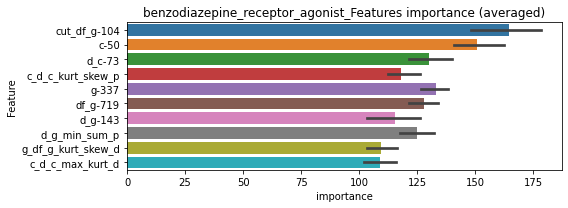

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00096749	valid_1's binary_logloss: 0.0222248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000747692	valid_1's binary_logloss: 0.0139403


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000979634	valid_1's binary_logloss: 0.0107318


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000642796	valid_1's binary_logloss: 0.0141044


benzodiazepine_receptor_agonist logloss: 0.015250336896977487


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161657	valid_1's binary_logloss: 0.00417561
[600]	training's binary_logloss: 0.00040592	valid_1's binary_logloss: 0.00190202
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000408273	valid_1's binary_logloss: 0.00189627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151612	valid_1's binary_logloss: 0.00641314
[600]	training's binary_logloss: 0.000392652	valid_1's binary_logloss: 0.00357292
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000392652	valid_1's binary_logloss: 0.00357292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162143	valid_1's binary_logloss: 0.00345483
[600]	training's binary_logloss: 0.000401741	valid_1's binary_logloss: 0.00120202
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000396563	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0017609, Threshold: 0.0072986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00511, conf_1:0.00949
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0072986
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0472986
threshold: 0.0472986, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154862	valid_1's binary_logloss: 0.00343132
[600]	training's binary_logloss: 0.00039774	valid_1's binary_logloss: 0.00139753
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00039774	valid_1's binary_logloss: 0.00139753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014944	valid_1's binary_logloss: 0.0061177
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000401502	valid_1's binary_logloss: 0.00372125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016044	valid_1's binary_logloss: 0.00297412
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00041516	valid_1's binary_logloss: 0.000984261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148289	valid_1's binary_logloss: 0.00741935


2 / 3 AUC score:1.000
y_Threshold: 0.0209502, Threshold: 0.0472986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00101
Num_p_label: 12.0, conf_0:0.03784, conf_1:0.05676


[600]	training's binary_logloss: 0.000388855	valid_1's binary_logloss: 0.00476269
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000394183	valid_1's binary_logloss: 0.00474826


Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0472986
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0872986
threshold: 0.0872986, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154862	valid_1's binary_logloss: 0.00343132
[600]	training's binary_logloss: 0.00039774	valid_1's binary_logloss: 0.00139753
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00039774	valid_1's binary_logloss: 0.00139753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014944	valid_1's binary_logloss: 0.0061177
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000401502	valid_1's binary_logloss: 0.00372125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016044	valid_1's binary_logloss: 0.00297412
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00041516	valid_1's binary_logloss: 0.000984261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148289	valid_1's binary_logloss: 0.00741935


3 / 3 AUC score:1.000
y_Threshold: 0.0209502, Threshold: 0.0872986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, conf_0:0.07857, conf_1:0.09603


[600]	training's binary_logloss: 0.000388855	valid_1's binary_logloss: 0.00476269
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000394183	valid_1's binary_logloss: 0.00474826


threshold: 0.0872986, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


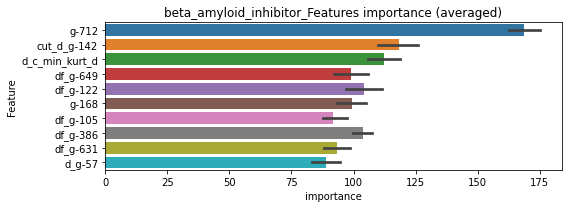

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000409928	valid_1's binary_logloss: 0.00110443


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000413411	valid_1's binary_logloss: 0.00307798


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000413411	valid_1's binary_logloss: 0.000985094


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000411307	valid_1's binary_logloss: 0.00601665


beta_amyloid_inhibitor logloss: 0.002796036540773844


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281
target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545656	valid_1's binary_logloss: 0.0431394
[600]	training's binary_logloss: 0.000945208	valid_1's binary_logloss: 0.0312759
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000890376	valid_1's binary_logloss: 0.0310013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055974	valid_1's binary_logloss: 0.0356381
[600]	training's binary_logloss: 0.00095966	valid_1's binary_logloss: 0.0252057
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000798271	valid_1's binary_logloss: 0.0249099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006346	valid_1's binary_logloss: 0.0193629
[600]	training's binary_logloss: 0.0010345	valid_1's binary_logloss: 0.0078361
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000689875	valid_1's binary_logloss: 0.

1 / 3 AUC score:1.000
y_Threshold: 0.0066240, Threshold: 0.0175224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, conf_0:0.01227, conf_1:0.02278
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0175224
Num_p_label: 4.0, Expected: 11.4, Adj_threshold_2: 0.0575224
threshold: 0.0575224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540866	valid_1's binary_logloss: 0.0423356
[600]	training's binary_logloss: 0.000939378	valid_1's binary_logloss: 0.0297627
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000738187	valid_1's binary_logloss: 0.0290363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510749	valid_1's binary_logloss: 0.0344669
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00106688	valid_1's binary_logloss: 0.0249683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582497	valid_1's binary_logloss: 0.0177726
[600]	training's binary_logloss: 0.000988578	valid_1's binary_logloss: 0.00728424
[900]	training's binary_logloss: 0.000623474	valid_1's binary_logloss: 0.00630936
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000619548	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0319101, Threshold: 0.0575224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0050226 Vs.target_rate: 0.00286
Num_p_label: 20.0, conf_0:0.04602, conf_1:0.06903
Num_p_label: 20.0, Expected: 11.4, Adj_threshold_1: 0.0575224
Num_p_label: 8.0, Expected: 11.4, Adj_threshold_2: 0.0975224
threshold: 0.0975224, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540568	valid_1's binary_logloss: 0.047903
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00124806	valid_1's binary_logloss: 0.0421103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550634	valid_1's binary_logloss: 0.0408846
[600]	training's binary_logloss: 0.00094598	valid_1's binary_logloss: 0.0300349
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000668495	valid_1's binary_logloss: 0.0288242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556246	valid_1's binary_logloss: 0.0240328
[600]	training's binary_logloss: 0.000960376	valid_1's binary_logloss: 0.012539
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00066825	valid_1's binary_logloss: 0.0115712
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0285075, Threshold: 0.0975224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0032647 Vs.target_rate: 0.00286
Num_p_label: 13.0, conf_0:0.08777, conf_1:0.10727
threshold: 0.0975224, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


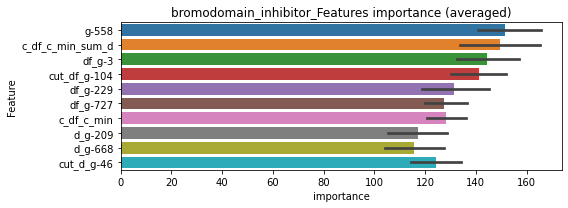

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000735782	valid_1's binary_logloss: 0.0231272


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000918653	valid_1's binary_logloss: 0.0224385


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000725663	valid_1's binary_logloss: 0.0180902


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bromodomain_inhibitor logloss: 0.020236601886214678


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00104109	valid_1's binary_logloss: 0.0172874
neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202751	valid_1's binary_logloss: 0.00863987
[600]	training's binary_logloss: 0.000465954	valid_1's binary_logloss: 0.0047486
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000436031	valid_1's binary_logloss: 0.00464683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202198	valid_1's binary_logloss: 0.0110675
[600]	training's binary_logloss: 0.000458552	valid_1's binary_logloss: 0.00607999
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000423286	valid_1's binary_logloss: 0.00600429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212068	valid_1's binary_logloss: 0.00595785
[600]	training's binary_logloss: 0.00047595	valid_1's binary_logloss: 0.00221143
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000440812	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0027145, Threshold: 0.0164088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.01149, conf_1:0.02133
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0164088
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.0564088
threshold: 0.0564088, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188732	valid_1's binary_logloss: 0.00822886
[600]	training's binary_logloss: 0.000448793	valid_1's binary_logloss: 0.00468644
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000447557	valid_1's binary_logloss: 0.0046847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193239	valid_1's binary_logloss: 0.00899304
[600]	training's binary_logloss: 0.000446152	valid_1's binary_logloss: 0.00509615
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00041888	valid_1's binary_logloss: 0.00503903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195708	valid_1's binary_logloss: 0.00490107
[600]	training's binary_logloss: 0.000453647	valid_1's binary_logloss: 0.00168958
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000429648	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0395325, Threshold: 0.0564088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00122
Num_p_label: 31.0, conf_0:0.04513, conf_1:0.06769
Num_p_label: 31.0, Expected: 4.8, Adj_threshold_1: 0.0564088
Num_p_label: 19.0, Expected: 4.8, Adj_threshold_2: 0.0964088
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_3: 0.1364088
threshold: 0.1364088, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188732	valid_1's binary_logloss: 0.00822886
[600]	training's binary_logloss: 0.000448793	valid_1's binary_logloss: 0.00468644
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000447557	valid_1's binary_logloss: 0.0046847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193239	valid_1's binary_logloss: 0.00899304
[600]	training's binary_logloss: 0.000446152	valid_1's binary_logloss: 0.00509615
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00041888	valid_1's binary_logloss: 0.00503903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195708	valid_1's binary_logloss: 0.00490107
[600]	training's binary_logloss: 0.000453647	valid_1's binary_logloss: 0.00168958
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000429648	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0395325, Threshold: 0.1364088, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, conf_0:0.12277, conf_1:0.15005
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_1: 0.1364088
threshold: 0.1364088, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


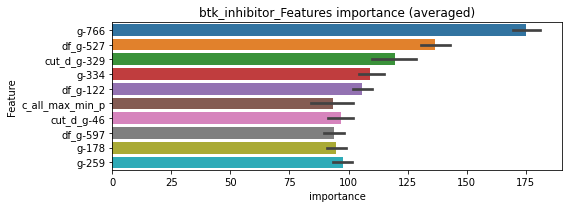

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000457971	valid_1's binary_logloss: 0.00466845


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000419767	valid_1's binary_logloss: 0.00412533
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000419395	valid_1's binary_logloss: 0.00412441


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431735	valid_1's binary_logloss: 0.00151491
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000430205	valid_1's binary_logloss: 0.00150783


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428434	valid_1's binary_logloss: 0.00180062
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000426165	valid_1's binary_logloss: 0.00179408


btk_inhibitor logloss: 0.003024967543101892


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000704665	valid_1's binary_logloss: 0.00167464
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000282646	valid_1's binary_logloss: 0.000858904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000699829	valid_1's binary_logloss: 0.0017418
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00027882	valid_1's binary_logloss: 0.000985644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726301	valid_1's binary_logloss: 0.00121442
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000284202	valid_1's binary_logloss: 0.000526936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00071183	valid_1's binary_logloss: 0.0016285


1 / 3 AUC score:1.000
y_Threshold: 0.0013866, Threshold: 0.0162942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01141, conf_1:0.02118
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0162942
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0562942
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.0962942
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1362942
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.1762942


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000280815	valid_1's binary_logloss: 0.000799826


threshold: 0.1762942, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641666	valid_1's binary_logloss: 0.00169638
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000269507	valid_1's binary_logloss: 0.000905436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064695	valid_1's binary_logloss: 0.00138532
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000261628	valid_1's binary_logloss: 0.00074949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652391	valid_1's binary_logloss: 0.000804212
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000265477	valid_1's binary_logloss: 0.000341726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064057	valid_1's binary_logloss: 0.00139339


2 / 3 AUC score:1.000
y_Threshold: 0.1429825, Threshold: 0.1762942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0097941 Vs.target_rate: 0.00050
Num_p_label: 39.0, conf_0:0.14104, conf_1:0.21155
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_1: 0.1762942
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_2: 0.2162942
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_3: 0.2562942
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_4: 0.2962942
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_5: 0.3362942
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_6: 0.3762942
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_7: 0.4162942
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_8: 0.4562942
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_9: 0.4962942


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000259266	valid_1's binary_logloss: 0.000743046


Num_p_label: 21.0, Expected: 2.0, Adj_threshold_10: 0.5362942
threshold: 0.5762942, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641666	valid_1's binary_logloss: 0.00169638
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000269507	valid_1's binary_logloss: 0.000905436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064695	valid_1's binary_logloss: 0.00138532
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000261628	valid_1's binary_logloss: 0.00074949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652391	valid_1's binary_logloss: 0.000804212
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000265477	valid_1's binary_logloss: 0.000341726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064057	valid_1's binary_logloss: 0.00139339


3 / 3 AUC score:1.000
y_Threshold: 0.1429825, Threshold: 0.5762942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, conf_0:0.50000, conf_1:0.63392
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.5762942
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.6162942
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.6562942
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.6962942
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.7362942
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_6: 0.7762942


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000259266	valid_1's binary_logloss: 0.000743046


threshold: 0.7762942, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


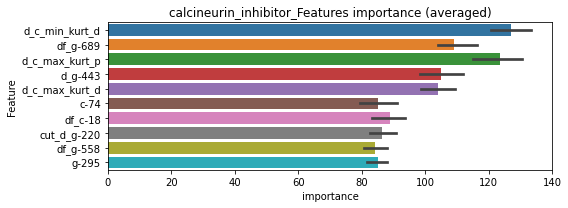

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000272862	valid_1's binary_logloss: 0.000598462
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000274006	valid_1's binary_logloss: 0.00074937
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000269785	valid_1's binary_logloss: 0.000377648
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005824516162735781


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.00027071	valid_1's binary_logloss: 0.000604114
neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246
target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0465603	valid_1's binary_logloss: 0.253077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0357064	valid_1's binary_logloss: 0.263063
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.0408416	valid_1's binary_logloss: 0.262468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355872	valid_1's binary_logloss: 0.223672
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0274956	valid_1's binary_logloss: 0.221943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0347445	valid_1's binary_logloss: 0.208052


1 / 3 AUC score:0.909
y_Threshold: 0.0849640, Threshold: 0.2328921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 418 → Positive_corect_labels: 505/3477
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, conf_0:0.16302, conf_1:0.30276


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0154134	valid_1's binary_logloss: 0.201311


threshold: 0.2328921, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 505.0/3477, y_label_rate: 0.1452401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150795	valid_1's binary_logloss: 0.163524
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00937639	valid_1's binary_logloss: 0.162108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160499	valid_1's binary_logloss: 0.128803
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00610422	valid_1's binary_logloss: 0.121467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015846	valid_1's binary_logloss: 0.129496
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00408184	valid_1's binary_logloss: 0.117588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135451	valid_1's binary_logloss: 0.165744


2 / 3 AUC score:0.982
y_Threshold: 0.0612562, Threshold: 0.2328921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 445.0/3357
p_label_rate: 0.0223506 Vs.target_rate: 0.01180
Num_p_label: 89.0, conf_0:0.18631, conf_1:0.27947
Num_p_label: 89.0, Expected: 47.0, Adj_threshold_1: 0.2328921
Num_p_label: 76.0, Expected: 47.0, Adj_threshold_2: 0.2728921
Num_p_label: 64.0, Expected: 47.0, Adj_threshold_3: 0.3128921


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00656741	valid_1's binary_logloss: 0.163662


threshold: 0.3128921, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 445.0/3357, y_label_rate: 0.1325588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100783	valid_1's binary_logloss: 0.100095
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00277075	valid_1's binary_logloss: 0.0920828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100351	valid_1's binary_logloss: 0.0804474
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00275139	valid_1's binary_logloss: 0.0686058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104224	valid_1's binary_logloss: 0.103886
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00222198	valid_1's binary_logloss: 0.0936083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00950167	valid_1's binary_logloss: 0.122579


3 / 3 AUC score:0.995
y_Threshold: 0.0505051, Threshold: 0.3128921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 421.0/3309
p_label_rate: 0.0243596 Vs.target_rate: 0.01180
Num_p_label: 97.0, conf_0:0.28160, conf_1:0.34418
Num_p_label: 97.0, Expected: 47.0, Adj_threshold_1: 0.3128921
Num_p_label: 82.0, Expected: 47.0, Adj_threshold_2: 0.3528921
Num_p_label: 81.0, Expected: 47.0, Adj_threshold_3: 0.3928921


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00451839	valid_1's binary_logloss: 0.118292


Num_p_label: 75.0, Expected: 47.0, Adj_threshold_4: 0.4328921
Num_p_label: 64.0, Expected: 47.0, Adj_threshold_5: 0.4728921
threshold: 0.4728921, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 421.0/3309, y_label_rate: 0.1272288


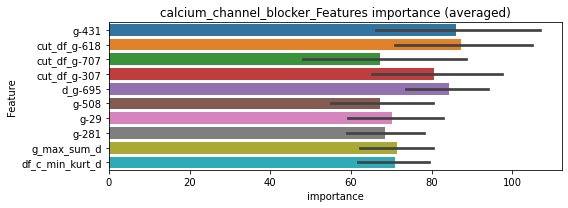

len(train_index) : 2481
len(valid_index) : 828
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2482
len(valid_index) : 827
================================= fold 2/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00243163	valid_1's binary_logloss: 0.0739585
Training until validation scores don't improve for 30 rounds


len(train_index) : 2482
len(valid_index) : 827
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00289693	valid_1's binary_logloss: 0.0768897
Training until validation scores don't improve for 30 rounds


len(train_index) : 2482
len(valid_index) : 827


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.0015611	valid_1's binary_logloss: 0.0509929


================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


calcium_channel_blocker logloss: 0.06731924733026742


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00387081	valid_1's binary_logloss: 0.0674279
neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294673	valid_1's binary_logloss: 0.0215143
[600]	training's binary_logloss: 0.000590488	valid_1's binary_logloss: 0.0140741
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000523648	valid_1's binary_logloss: 0.0138442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319831	valid_1's binary_logloss: 0.0119678
[600]	training's binary_logloss: 0.000614832	valid_1's binary_logloss: 0.00599449
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000582385	valid_1's binary_logloss: 0.0058969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329465	valid_1's binary_logloss: 0.00739058
[600]	training's binary_logloss: 0.000631193	valid_1's binary_logloss: 0.00259334
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000535785	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0040413, Threshold: 0.0231698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01622, conf_1:0.03012
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0231698
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_2: 0.0631698
threshold: 0.0631698, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284074	valid_1's binary_logloss: 0.0207277
[600]	training's binary_logloss: 0.000580499	valid_1's binary_logloss: 0.0137454
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000541522	valid_1's binary_logloss: 0.0135461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304899	valid_1's binary_logloss: 0.0101447
[600]	training's binary_logloss: 0.000596887	valid_1's binary_logloss: 0.00513408
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000545885	valid_1's binary_logloss: 0.00507744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298912	valid_1's binary_logloss: 0.00660869
[600]	training's binary_logloss: 0.000600473	valid_1's binary_logloss: 0.00233152
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000540799	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0395770, Threshold: 0.0631698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0085384 Vs.target_rate: 0.00176
Num_p_label: 34.0, conf_0:0.05054, conf_1:0.07580
Num_p_label: 34.0, Expected: 7.0, Adj_threshold_1: 0.0631698
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_2: 0.1031698
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_3: 0.1431698
threshold: 0.1431698, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284074	valid_1's binary_logloss: 0.0207277
[600]	training's binary_logloss: 0.000580499	valid_1's binary_logloss: 0.0137454
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000541522	valid_1's binary_logloss: 0.0135461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304899	valid_1's binary_logloss: 0.0101447
[600]	training's binary_logloss: 0.000596887	valid_1's binary_logloss: 0.00513408
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000545885	valid_1's binary_logloss: 0.00507744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298912	valid_1's binary_logloss: 0.00660869
[600]	training's binary_logloss: 0.000600473	valid_1's binary_logloss: 0.00233152
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000540799	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0395770, Threshold: 0.1431698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0035158 Vs.target_rate: 0.00176
Num_p_label: 14.0, conf_0:0.12885, conf_1:0.15749
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.1431698
threshold: 0.1431698, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


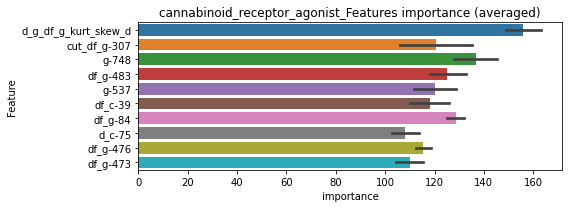

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000543371	valid_1's binary_logloss: 0.0110457


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000562616	valid_1's binary_logloss: 0.00543578


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.00252077


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000522812	valid_1's binary_logloss: 0.00734468


cannabinoid_receptor_agonist logloss: 0.0065879050628535486


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376585	valid_1's binary_logloss: 0.032261
[600]	training's binary_logloss: 0.000728536	valid_1's binary_logloss: 0.0267832
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000692558	valid_1's binary_logloss: 0.026674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003909	valid_1's binary_logloss: 0.0295102
[600]	training's binary_logloss: 0.000743698	valid_1's binary_logloss: 0.0201723
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000619322	valid_1's binary_logloss: 0.0197928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411806	valid_1's binary_logloss: 0.0155542
[600]	training's binary_logloss: 0.000775679	valid_1's binary_logloss: 0.00954177
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000588744	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0049595, Threshold: 0.0205247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01437, conf_1:0.02668
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0205247
Num_p_label: 8.0, Expected: 9.2, Adj_threshold_2: 0.0605247
threshold: 0.0605247, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339707	valid_1's binary_logloss: 0.0324797
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000826414	valid_1's binary_logloss: 0.0271298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373547	valid_1's binary_logloss: 0.0149808
[600]	training's binary_logloss: 0.000729335	valid_1's binary_logloss: 0.008224
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000619882	valid_1's binary_logloss: 0.00785999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365588	valid_1's binary_logloss: 0.0154493
[600]	training's binary_logloss: 0.000719551	valid_1's binary_logloss: 0.00901802
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000544883	valid_1's binary_logloss: 0.00864114
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0177413, Threshold: 0.0605247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0062783 Vs.target_rate: 0.00231
Num_p_label: 25.0, conf_0:0.04842, conf_1:0.07263
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_1: 0.0605247
Num_p_label: 11.0, Expected: 9.2, Adj_threshold_2: 0.1005247
threshold: 0.1005247, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358236	valid_1's binary_logloss: 0.023641
[600]	training's binary_logloss: 0.000709072	valid_1's binary_logloss: 0.0175371
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000613004	valid_1's binary_logloss: 0.0171131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356786	valid_1's binary_logloss: 0.0171659
[600]	training's binary_logloss: 0.000709724	valid_1's binary_logloss: 0.00927605
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000545338	valid_1's binary_logloss: 0.00860889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364889	valid_1's binary_logloss: 0.01361
[600]	training's binary_logloss: 0.000715556	valid_1's binary_logloss: 0.00641247
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000548058	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0225706, Threshold: 0.1005247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0045203 Vs.target_rate: 0.00231
Num_p_label: 18.0, conf_0:0.09047, conf_1:0.11058
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_1: 0.1005247
threshold: 0.1005247, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


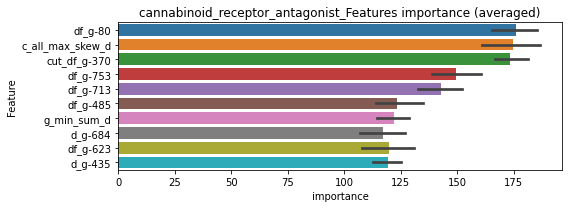

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000630766	valid_1's binary_logloss: 0.015537


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000586563	valid_1's binary_logloss: 0.00809939


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000663126	valid_1's binary_logloss: 0.00966163


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000778365	valid_1's binary_logloss: 0.0117715


cannabinoid_receptor_antagonist logloss: 0.011267663732162838


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286522	valid_1's binary_logloss: 0.0142491
[600]	training's binary_logloss: 0.000550963	valid_1's binary_logloss: 0.00767742
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000493358	valid_1's binary_logloss: 0.00744832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276688	valid_1's binary_logloss: 0.0103296
[600]	training's binary_logloss: 0.000546171	valid_1's binary_logloss: 0.00626286
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000504941	valid_1's binary_logloss: 0.00618681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281798	valid_1's binary_logloss: 0.00492867
[600]	training's binary_logloss: 0.000550889	valid_1's binary_logloss: 0.00132947
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000495836	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0032449, Threshold: 0.0392661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.02749, conf_1:0.05105
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0392661
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.0792661
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1192661
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_4: 0.1592661
threshold: 0.1592661, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258512	valid_1's binary_logloss: 0.0122324
[600]	training's binary_logloss: 0.000524052	valid_1's binary_logloss: 0.00675044
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000490419	valid_1's binary_logloss: 0.00664779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260179	valid_1's binary_logloss: 0.00906588
[600]	training's binary_logloss: 0.000536229	valid_1's binary_logloss: 0.0049871
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000494779	valid_1's binary_logloss: 0.00487103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264437	valid_1's binary_logloss: 0.00437042
[600]	training's binary_logloss: 0.000544719	valid_1's binary_logloss: 0.00118768
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000493616	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0432819, Threshold: 0.1592661, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000519325	valid_1's binary_logloss: 0.01473
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000545827	valid_1's binary_logloss: 0.0146423


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0080362 Vs.target_rate: 0.00151
Num_p_label: 32.0, conf_0:0.12741, conf_1:0.19112
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_1: 0.1592661
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.1992661
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.2392661
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.2792661
threshold: 0.2792661, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258512	valid_1's binary_logloss: 0.0122324
[600]	training's binary_logloss: 0.000524052	valid_1's binary_logloss: 0.00675044
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000490419	valid_1's binary_logloss: 0.00664779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260179	valid_1's binary_logloss: 0.00906588
[600]	training's binary_logloss: 0.000536229	valid_1's binary_logloss: 0.0049871
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000494779	valid_1's binary_logloss: 0.00487103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264437	valid_1's binary_logloss: 0.00437042
[600]	training's binary_logloss: 0.000544719	valid_1's binary_logloss: 0.00118768
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000493616	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0432819, Threshold: 0.2792661, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000519325	valid_1's binary_logloss: 0.01473
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000545827	valid_1's binary_logloss: 0.0146423


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.25134, conf_1:0.30719
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.2792661
threshold: 0.2792661, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


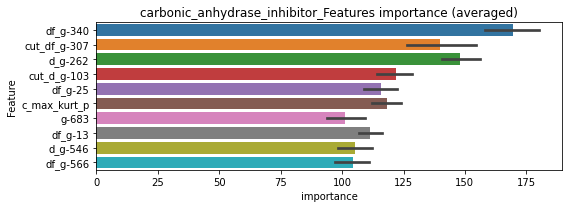

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000487238	valid_1's binary_logloss: 0.00537331


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000530899	valid_1's binary_logloss: 0.00504319


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000512989	valid_1's binary_logloss: 0.0012883


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000509178	valid_1's binary_logloss: 0.0123184


carbonic_anhydrase_inhibitor logloss: 0.006007375719088333


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205529	valid_1's binary_logloss: 0.012168
[600]	training's binary_logloss: 0.000463967	valid_1's binary_logloss: 0.00752784
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000447882	valid_1's binary_logloss: 0.00743181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221966	valid_1's binary_logloss: 0.00640641
[600]	training's binary_logloss: 0.000479752	valid_1's binary_logloss: 0.00254136
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000442966	valid_1's binary_logloss: 0.00246797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226972	valid_1's binary_logloss: 0.00433089
[600]	training's binary_logloss: 0.000499328	valid_1's binary_logloss: 0.00151577
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000455394	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027511, Threshold: 0.0066255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00464, conf_1:0.00861
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0066255
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0466255
threshold: 0.0466255, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195972	valid_1's binary_logloss: 0.0107474
[600]	training's binary_logloss: 0.000450348	valid_1's binary_logloss: 0.00654791
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000415875	valid_1's binary_logloss: 0.00637067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200345	valid_1's binary_logloss: 0.00643635
[600]	training's binary_logloss: 0.000457291	valid_1's binary_logloss: 0.00274941
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000426185	valid_1's binary_logloss: 0.00267041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210151	valid_1's binary_logloss: 0.00377213
[600]	training's binary_logloss: 0.000472921	valid_1's binary_logloss: 0.00128713
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00043673	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0216626, Threshold: 0.0466255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.03730, conf_1:0.05595
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0466255
threshold: 0.0466255, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195972	valid_1's binary_logloss: 0.0107474
[600]	training's binary_logloss: 0.000450348	valid_1's binary_logloss: 0.00654791
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000415875	valid_1's binary_logloss: 0.00637067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200345	valid_1's binary_logloss: 0.00643635
[600]	training's binary_logloss: 0.000457291	valid_1's binary_logloss: 0.00274941
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000426185	valid_1's binary_logloss: 0.00267041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210151	valid_1's binary_logloss: 0.00377213
[600]	training's binary_logloss: 0.000472921	valid_1's binary_logloss: 0.00128713
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00043673	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0216626, Threshold: 0.0466255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, conf_0:0.04196, conf_1:0.05129
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0466255
threshold: 0.0466255, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


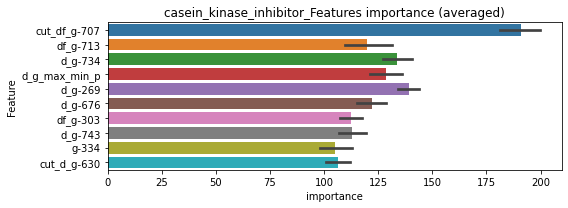

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000440253	valid_1's binary_logloss: 0.00707397


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000441472	valid_1's binary_logloss: 0.00258655


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000443842	valid_1's binary_logloss: 0.00133409


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


casein_kinase_inhibitor logloss: 0.004969409687809183


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000601048	valid_1's binary_logloss: 0.00888597
neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000967674	valid_1's binary_logloss: 0.00193391
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000332536	valid_1's binary_logloss: 0.000976356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000964414	valid_1's binary_logloss: 0.00305684
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000332586	valid_1's binary_logloss: 0.00183463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00097334	valid_1's binary_logloss: 0.00320948
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000342137	valid_1's binary_logloss: 0.00196035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000945706	valid_1's binary_logloss: 0.00173046


1 / 3 AUC score:1.000
y_Threshold: 0.0015484, Threshold: 0.0113942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00798, conf_1:0.01481
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0113942
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0513942
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0913942


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000328821	valid_1's binary_logloss: 0.000759466


threshold: 0.0913942, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911784	valid_1's binary_logloss: 0.00171565
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000322868	valid_1's binary_logloss: 0.000871937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888541	valid_1's binary_logloss: 0.001941
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000320112	valid_1's binary_logloss: 0.000941999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906751	valid_1's binary_logloss: 0.00338075
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000334245	valid_1's binary_logloss: 0.00238262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901836	valid_1's binary_logloss: 0.0015051


2 / 3 AUC score:1.000
y_Threshold: 0.0469532, Threshold: 0.0913942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, conf_0:0.07312, conf_1:0.10967
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0913942
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.1313942
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.1713942
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.2113942
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2513942
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2913942
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_7: 0.3313942


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000317789	valid_1's binary_logloss: 0.000630798


threshold: 0.3313942, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911784	valid_1's binary_logloss: 0.00171565
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000322868	valid_1's binary_logloss: 0.000871937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888541	valid_1's binary_logloss: 0.001941
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000320112	valid_1's binary_logloss: 0.000941999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906751	valid_1's binary_logloss: 0.00338075
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000334245	valid_1's binary_logloss: 0.00238262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901836	valid_1's binary_logloss: 0.0015051


3 / 3 AUC score:1.000
y_Threshold: 0.0469532, Threshold: 0.3313942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.29825, conf_1:0.36453
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.3313942
threshold: 0.3313942, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000317789	valid_1's binary_logloss: 0.000630798


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


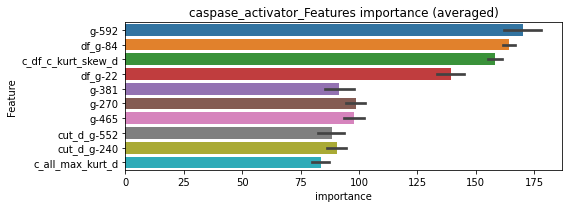

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000319802	valid_1's binary_logloss: 0.000969492


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000322292	valid_1's binary_logloss: 0.000798137
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000335352	valid_1's binary_logloss: 0.00175548
Training until validation scores don't improve for 30 rounds


caspase_activator logloss: 0.0010575539040545963


Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000332043	valid_1's binary_logloss: 0.000707197
neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107318	valid_1's binary_logloss: 0.00208919
[600]	training's binary_logloss: 0.00032876	valid_1's binary_logloss: 0.000838322
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00032736	valid_1's binary_logloss: 0.000836091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010412	valid_1's binary_logloss: 0.00534124
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00033181	valid_1's binary_logloss: 0.00329422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105939	valid_1's binary_logloss: 0.002042
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000341046	valid_1's binary_logloss: 0.000954045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107167	valid_1's binary_logloss: 0.00364567


1 / 3 AUC score:1.000
y_Threshold: 0.0017655, Threshold: 0.0090526, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000330212	valid_1's binary_logloss: 0.00178669


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00634, conf_1:0.01177
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0090526
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0490526
threshold: 0.0490526, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000992588	valid_1's binary_logloss: 0.00181816
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328347	valid_1's binary_logloss: 0.000713364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000987275	valid_1's binary_logloss: 0.00429928
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000323673	valid_1's binary_logloss: 0.00241935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101632	valid_1's binary_logloss: 0.00147103
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000325141	valid_1's binary_logloss: 0.000552015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101307	valid_1's binary_logloss: 0.00355473


2 / 3 AUC score:1.000


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000321924	valid_1's binary_logloss: 0.00183347


y_Threshold: 0.0944106, Threshold: 0.0490526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, conf_0:0.03924, conf_1:0.05886
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0490526
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0890526
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1290526
threshold: 0.1290526, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000992588	valid_1's binary_logloss: 0.00181816
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000328347	valid_1's binary_logloss: 0.000713364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000987275	valid_1's binary_logloss: 0.00429928
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000323673	valid_1's binary_logloss: 0.00241935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101632	valid_1's binary_logloss: 0.00147103
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000325141	valid_1's binary_logloss: 0.000552015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101307	valid_1's binary_logloss: 0.00355473


3 / 3 AUC score:1.000
y_Threshold: 0.0944106, Threshold: 0.1290526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.11615, conf_1:0.14196
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1290526


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000321924	valid_1's binary_logloss: 0.00183347


threshold: 0.1290526, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


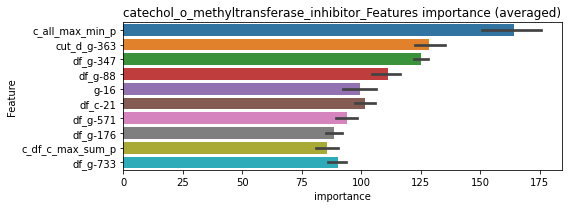

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000332436	valid_1's binary_logloss: 0.000687349


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000331338	valid_1's binary_logloss: 0.00169956


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000334481	valid_1's binary_logloss: 0.000650506


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000323177	valid_1's binary_logloss: 0.00108522


catechol_o_methyltransferase_inhibitor logloss: 0.0010306690427196873


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276
target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00930367	valid_1's binary_logloss: 0.0872279
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00228261	valid_1's binary_logloss: 0.0785524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101818	valid_1's binary_logloss: 0.0675941
[600]	training's binary_logloss: 0.00157016	valid_1's binary_logloss: 0.0503087
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000992607	valid_1's binary_logloss: 0.0484992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097312	valid_1's binary_logloss: 0.0468946
[600]	training's binary_logloss: 0.00154489	valid_1's binary_logloss: 0.0301722
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000957574	valid_1's binary_logloss: 0.028472
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.997
y_Threshold: 0.0114748, Threshold: 0.0418064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, conf_0:0.02926, conf_1:0.05435
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0418064
Num_p_label: 10.0, Expected: 17.1, Adj_threshold_2: 0.0818064
threshold: 0.0818064, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876402	valid_1's binary_logloss: 0.0675149
[600]	training's binary_logloss: 0.0014271	valid_1's binary_logloss: 0.051464
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00149279	valid_1's binary_logloss: 0.0513166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886575	valid_1's binary_logloss: 0.0488877
[600]	training's binary_logloss: 0.00144301	valid_1's binary_logloss: 0.0310435
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000870468	valid_1's binary_logloss: 0.0295079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886213	valid_1's binary_logloss: 0.0627074
[600]	training's binary_logloss: 0.00143808	valid_1's binary_logloss: 0.0503947
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0011056	valid_1's binary_logloss: 0.04

2 / 3 AUC score:1.000
y_Threshold: 0.0326505, Threshold: 0.0818064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0065294 Vs.target_rate: 0.00428
Num_p_label: 26.0, conf_0:0.06545, conf_1:0.09817
Num_p_label: 26.0, Expected: 17.1, Adj_threshold_1: 0.0818064
Num_p_label: 10.0, Expected: 17.1, Adj_threshold_2: 0.1218064
threshold: 0.1218064, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868746	valid_1's binary_logloss: 0.0606564
[600]	training's binary_logloss: 0.00138066	valid_1's binary_logloss: 0.0469167
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00106135	valid_1's binary_logloss: 0.0460839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00810291	valid_1's binary_logloss: 0.0675757
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00261603	valid_1's binary_logloss: 0.0586745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826181	valid_1's binary_logloss: 0.0453743
[600]	training's binary_logloss: 0.00137538	valid_1's binary_logloss: 0.029969
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000878235	valid_1's binary_logloss: 0.0286965
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0330456, Threshold: 0.1218064, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00200246	valid_1's binary_logloss: 0.0551121


Remove_noisy_data: 24 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0030136 Vs.target_rate: 0.00428
Num_p_label: 12.0, conf_0:0.10963, conf_1:0.13399
threshold: 0.1218064, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 629.0/3747, y_label_rate: 0.1678676


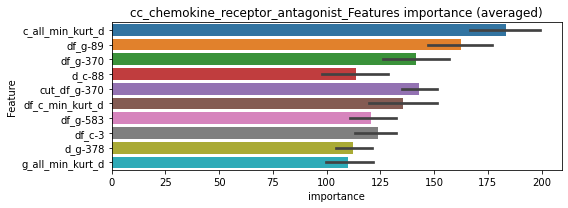

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00162166	valid_1's binary_logloss: 0.0408714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00133585	valid_1's binary_logloss: 0.041591


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2811
len(valid_index) : 936
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00147429	valid_1's binary_logloss: 0.0345278
Training until validation scores don't improve for 30 rounds


cc_chemokine_receptor_antagonist logloss: 0.03671036654701509


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00128351	valid_1's binary_logloss: 0.0298439
neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118824	valid_1's binary_logloss: 0.00260876
[600]	training's binary_logloss: 0.000345214	valid_1's binary_logloss: 0.00103915
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000345214	valid_1's binary_logloss: 0.00103915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117953	valid_1's binary_logloss: 0.0050459
[600]	training's binary_logloss: 0.00033897	valid_1's binary_logloss: 0.00249097
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000337263	valid_1's binary_logloss: 0.00248523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119346	valid_1's binary_logloss: 0.00206404
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00035105	valid_1's binary_logloss: 0.000765509
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0014849, Threshold: 0.0035872, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000340764	valid_1's binary_logloss: 0.000885474
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000340519	valid_1's binary_logloss: 0.000885262


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00251, conf_1:0.00466
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0035872
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0435872
threshold: 0.0435872, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112836	valid_1's binary_logloss: 0.00247832
[600]	training's binary_logloss: 0.000333145	valid_1's binary_logloss: 0.000935659
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000333145	valid_1's binary_logloss: 0.000935659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011114	valid_1's binary_logloss: 0.00506421
[600]	training's binary_logloss: 0.000332576	valid_1's binary_logloss: 0.00264973
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000332441	valid_1's binary_logloss: 0.00264784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117041	valid_1's binary_logloss: 0.00173172
[600]	training's binary_logloss: 0.00033438	valid_1's binary_logloss: 0.000607831
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000334626	valid_1's bin

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000332554	valid_1's binary_logloss: 0.000718851
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000330968	valid_1's binary_logloss: 0.00071635


y_Threshold: 0.0665443, Threshold: 0.0435872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.03487, conf_1:0.05230
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0435872
threshold: 0.0435872, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112836	valid_1's binary_logloss: 0.00247832
[600]	training's binary_logloss: 0.000333145	valid_1's binary_logloss: 0.000935659
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000333145	valid_1's binary_logloss: 0.000935659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011114	valid_1's binary_logloss: 0.00506421
[600]	training's binary_logloss: 0.000332576	valid_1's binary_logloss: 0.00264973
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000332441	valid_1's binary_logloss: 0.00264784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117041	valid_1's binary_logloss: 0.00173172
[600]	training's binary_logloss: 0.00033438	valid_1's binary_logloss: 0.000607831
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000334626	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0665443, Threshold: 0.0435872, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000332554	valid_1's binary_logloss: 0.000718851
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000330968	valid_1's binary_logloss: 0.00071635


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.03923, conf_1:0.04795
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0435872
threshold: 0.0435872, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


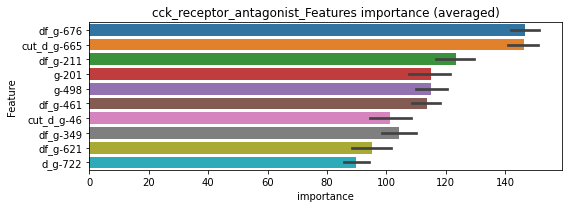

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000343036	valid_1's binary_logloss: 0.000912345


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000335008	valid_1's binary_logloss: 0.00179921


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000355386	valid_1's binary_logloss: 0.000665024


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000333264	valid_1's binary_logloss: 0.000731871
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000333264	valid_1's binary_logloss: 0.000731871


cck_receptor_antagonist logloss: 0.0010273030852959869


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241
target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0510308	valid_1's binary_logloss: 0.295743
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0375497	valid_1's binary_logloss: 0.293786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0495548	valid_1's binary_logloss: 0.317565
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0498769	valid_1's binary_logloss: 0.317306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0511877	valid_1's binary_logloss: 0.321277
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.0496566	valid_1's binary_logloss: 0.320387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497089	valid_1's binary_logloss: 0.318628


1 / 3 AUC score:0.837
y_Threshold: 0.1054951, Threshold: 0.4489214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 554 → Positive_corect_labels: 436/3335
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, conf_0:0.31424, conf_1:0.58360
threshold: 0.4489214, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0441864	valid_1's binary_logloss: 0.317549


positive_y_label: 436.0/3335, y_label_rate: 0.1307346
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191574	valid_1's binary_logloss: 0.18954
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0139165	valid_1's binary_logloss: 0.188103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194354	valid_1's binary_logloss: 0.172601
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00768033	valid_1's binary_logloss: 0.161624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202363	valid_1's binary_logloss: 0.152897
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00355299	valid_1's binary_logloss: 0.133872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0190806	valid_1's binary_logloss: 0.184696


2 / 3 AUC score:0.965
y_Threshold: 0.0866496, Threshold: 0.4489214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 364.0/3191
p_label_rate: 0.0276243 Vs.target_rate: 0.01478
Num_p_label: 110.0, conf_0:0.35914, conf_1:0.53871
Num_p_label: 110.0, Expected: 58.9, Adj_threshold_1: 0.4489214
Num_p_label: 108.0, Expected: 58.9, Adj_threshold_2: 0.4889214
Num_p_label: 106.0, Expected: 58.9, Adj_threshold_3: 0.5289214
Num_p_label: 102.0, Expected: 58.9, Adj_threshold_4: 0.5689214
Num_p_label: 98.0, Expected: 58.9, Adj_threshold_5: 0.6089214
Num_p_label: 84.0, Expected: 58.9, Adj_threshold_6: 0.6489214
threshold: 0.6489214, positive_p_label: 84.0/3982, p_label_rate: 0.0210949


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0141518	valid_1's binary_logloss: 0.179801


positive_y_label: 364.0/3191, y_label_rate: 0.1140708
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012432	valid_1's binary_logloss: 0.113899
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00291348	valid_1's binary_logloss: 0.101103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126472	valid_1's binary_logloss: 0.0961468
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00359644	valid_1's binary_logloss: 0.0813578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120507	valid_1's binary_logloss: 0.145877
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0047112	valid_1's binary_logloss: 0.135965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011645	valid_1's binary_logloss: 0.139179


3 / 3 AUC score:0.985
y_Threshold: 0.0692760, Threshold: 0.6489214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 329.0/3121
p_label_rate: 0.0291311 Vs.target_rate: 0.01478
Num_p_label: 116.0, conf_0:0.50000, conf_1:0.71381
Num_p_label: 116.0, Expected: 58.9, Adj_threshold_1: 0.6489214
Num_p_label: 109.0, Expected: 58.9, Adj_threshold_2: 0.6889214
Num_p_label: 98.0, Expected: 58.9, Adj_threshold_3: 0.7289214


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00538879	valid_1's binary_logloss: 0.133443


Num_p_label: 95.0, Expected: 58.9, Adj_threshold_4: 0.7689214
Num_p_label: 90.0, Expected: 58.9, Adj_threshold_5: 0.8089214
Num_p_label: 80.0, Expected: 58.9, Adj_threshold_6: 0.8489214
threshold: 0.8489214, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 329.0/3121, y_label_rate: 0.1054149


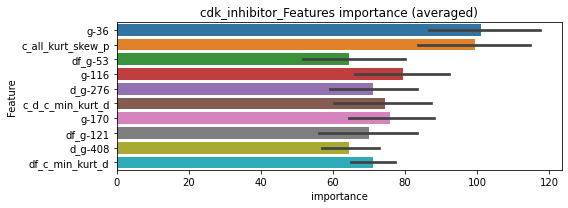

len(train_index) : 2340
len(valid_index) : 781
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2341
len(valid_index) : 780
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0028745	valid_1's binary_logloss: 0.103867
Training until validation scores don't improve for 30 rounds


len(train_index) : 2341
len(valid_index) : 780
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00576505	valid_1's binary_logloss: 0.0964888
Training until validation scores don't improve for 30 rounds


len(train_index) : 2341
len(valid_index) : 780
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00428806	valid_1's binary_logloss: 0.118261
Training until validation scores don't improve for 30 rounds


cdk_inhibitor logloss: 0.10732677159082506


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0056109	valid_1's binary_logloss: 0.110696
neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336871	valid_1's binary_logloss: 0.0290491
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000949477	valid_1's binary_logloss: 0.0230824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361426	valid_1's binary_logloss: 0.0227275
[600]	training's binary_logloss: 0.000714084	valid_1's binary_logloss: 0.0157951
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000603484	valid_1's binary_logloss: 0.0154152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393392	valid_1's binary_logloss: 0.0112411
[600]	training's binary_logloss: 0.000747093	valid_1's binary_logloss: 0.00526151
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00057651	valid_1's binary_logloss: 0.00489039
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0046110, Threshold: 0.0198795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01392, conf_1:0.02584
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0198795
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_2: 0.0598795
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_3: 0.0998795
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_4: 0.1398795
threshold: 0.1398795, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328971	valid_1's binary_logloss: 0.0286477
[600]	training's binary_logloss: 0.000672059	valid_1's binary_logloss: 0.0220511
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000560666	valid_1's binary_logloss: 0.0216714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357076	valid_1's binary_logloss: 0.02078
[600]	training's binary_logloss: 0.000702233	valid_1's binary_logloss: 0.0134449
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000577707	valid_1's binary_logloss: 0.0131239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360758	valid_1's binary_logloss: 0.00989911
[600]	training's binary_logloss: 0.000719635	valid_1's binary_logloss: 0.00521206
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000560251	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0240723, Threshold: 0.1398795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, conf_0:0.11190, conf_1:0.16786
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.1398795
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_2: 0.1798795
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_3: 0.2198795
threshold: 0.2198795, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344362	valid_1's binary_logloss: 0.0234958
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000934146	valid_1's binary_logloss: 0.0187994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349726	valid_1's binary_logloss: 0.015538
[600]	training's binary_logloss: 0.000690124	valid_1's binary_logloss: 0.00968933
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000545007	valid_1's binary_logloss: 0.00924819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342685	valid_1's binary_logloss: 0.0189791
[600]	training's binary_logloss: 0.00069299	valid_1's binary_logloss: 0.0105862
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000536078	valid_1's binary_logloss: 0.00993536
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0156577, Threshold: 0.2198795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0052737 Vs.target_rate: 0.00227
Num_p_label: 21.0, conf_0:0.19789, conf_1:0.24187
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_1: 0.2198795
threshold: 0.2198795, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


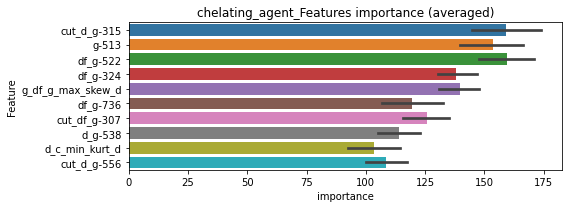

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000629719	valid_1's binary_logloss: 0.0102816


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000586087	valid_1's binary_logloss: 0.0119902


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000835405	valid_1's binary_logloss: 0.0070654
Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.010173271625618922


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000872208	valid_1's binary_logloss: 0.011349
neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136841	valid_1's binary_logloss: 0.00332174
[600]	training's binary_logloss: 0.000387488	valid_1's binary_logloss: 0.00136845
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000387492	valid_1's binary_logloss: 0.00136843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139984	valid_1's binary_logloss: 0.00409645
[600]	training's binary_logloss: 0.000385132	valid_1's binary_logloss: 0.00162681
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000385132	valid_1's binary_logloss: 0.00162681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136106	valid_1's binary_logloss: 0.00292185
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000400064	valid_1's binary_logloss: 0.00110092
Training until validation scores don't improve for 30 round

1 / 3 AUC score:1.000
y_Threshold: 0.0028088, Threshold: 0.0620877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.04346, conf_1:0.08071
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0620877
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.1020877
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_3: 0.1420877
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.1820877
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.2220877
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_6: 0.2620877
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_7: 0.3020877
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_8: 0.3420877
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3820877
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_10: 0.4220877
threshold: 0.4220877, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127723	valid_1's binary_logloss: 0.00260399
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000384783	valid_1's binary_logloss: 0.00108508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129156	valid_1's binary_logloss: 0.00411121
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000376991	valid_1's binary_logloss: 0.001878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012726	valid_1's binary_logloss: 0.00226459
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000389777	valid_1's binary_logloss: 0.000806569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125702	valid_1's binary_logloss: 0.00258684


2 / 3 AUC score:1.000
y_Threshold: 0.1423907, Threshold: 0.4220877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


[600]	training's binary_logloss: 0.000373753	valid_1's binary_logloss: 0.000964241
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000373753	valid_1's binary_logloss: 0.000964241


p_label_rate: 0.0085384 Vs.target_rate: 0.00101
Num_p_label: 34.0, conf_0:0.33767, conf_1:0.50651
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_1: 0.4220877
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_2: 0.4620877
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_3: 0.5020877
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_4: 0.5420877
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_5: 0.5820877
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_6: 0.6220877
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.6620877
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_8: 0.7020877
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_9: 0.7420877
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_10: 0.7820877
threshold: 0.8220877, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127723	valid_1's binary_logloss: 0.00260399
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000384783	valid_1's binary_logloss: 0.00108508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129156	valid_1's binary_logloss: 0.00411121
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000376991	valid_1's binary_logloss: 0.001878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012726	valid_1's binary_logloss: 0.00226459
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000389777	valid_1's binary_logloss: 0.000806569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125702	valid_1's binary_logloss: 0.00258684
[600]	training's binary_logloss: 0.000373753	valid_1's binary_logloss: 0.000964241


3 / 3 AUC score:1.000
y_Threshold: 0.1423907, Threshold: 0.8220877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00101
Num_p_label: 15.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_1: 0.8220877
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_2: 0.8620877
threshold: 0.8620877, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


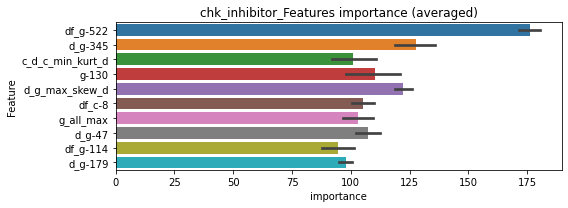

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000389242	valid_1's binary_logloss: 0.00108541


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000387962	valid_1's binary_logloss: 0.00166638


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000389564	valid_1's binary_logloss: 0.000983637


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000380096	valid_1's binary_logloss: 0.00105312


chk_inhibitor logloss: 0.0011973243701673933


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026113	valid_1's binary_logloss: 0.017683
[600]	training's binary_logloss: 0.000556136	valid_1's binary_logloss: 0.0108647
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000501297	valid_1's binary_logloss: 0.0105919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277225	valid_1's binary_logloss: 0.0130135
[600]	training's binary_logloss: 0.000570047	valid_1's binary_logloss: 0.00746415
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000521456	valid_1's binary_logloss: 0.00736157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002881	valid_1's binary_logloss: 0.00653456
[600]	training's binary_logloss: 0.000586355	valid_1's binary_logloss: 0.00229117
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000512502	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0036166, Threshold: 0.0378897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.02652, conf_1:0.04926
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0378897
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_2: 0.0778897
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_3: 0.1178897
threshold: 0.1178897, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245989	valid_1's binary_logloss: 0.0179236
[600]	training's binary_logloss: 0.000535412	valid_1's binary_logloss: 0.011821
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000482502	valid_1's binary_logloss: 0.0116173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256012	valid_1's binary_logloss: 0.0132613
[600]	training's binary_logloss: 0.00054734	valid_1's binary_logloss: 0.00786198
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.00050854	valid_1's binary_logloss: 0.00766826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274153	valid_1's binary_logloss: 0.00580969
[600]	training's binary_logloss: 0.00056408	valid_1's binary_logloss: 0.00194626
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000499922	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0807930, Threshold: 0.1178897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0110497 Vs.target_rate: 0.00176
Num_p_label: 44.0, conf_0:0.09431, conf_1:0.14147
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_1: 0.1178897
Num_p_label: 39.0, Expected: 7.0, Adj_threshold_2: 0.1578897
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_3: 0.1978897
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_4: 0.2378897
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_5: 0.2778897
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_6: 0.3178897
threshold: 0.3178897, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250591	valid_1's binary_logloss: 0.0111983
[600]	training's binary_logloss: 0.000539757	valid_1's binary_logloss: 0.00596429
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00050333	valid_1's binary_logloss: 0.00580812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246535	valid_1's binary_logloss: 0.0115392
[600]	training's binary_logloss: 0.000544021	valid_1's binary_logloss: 0.00651284
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000499951	valid_1's binary_logloss: 0.00641012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025434	valid_1's binary_logloss: 0.0122451
[600]	training's binary_logloss: 0.000553014	valid_1's binary_logloss: 0.00736212
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000488127	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0381270, Threshold: 0.3178897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, conf_0:0.28610, conf_1:0.34968
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.3178897
threshold: 0.3178897, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


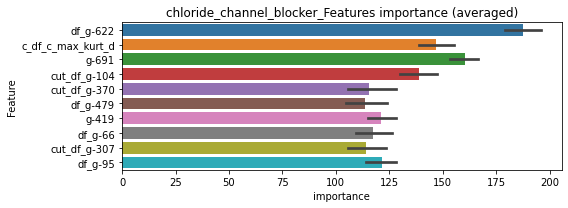

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.00051006	valid_1's binary_logloss: 0.00572864


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000527452	valid_1's binary_logloss: 0.00492247


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000693116	valid_1's binary_logloss: 0.00720862


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


chloride_channel_blocker logloss: 0.006422481218986616


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000634208	valid_1's binary_logloss: 0.0078302
neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343722	valid_1's binary_logloss: 0.0179414
[600]	training's binary_logloss: 0.000657097	valid_1's binary_logloss: 0.0104805
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000537065	valid_1's binary_logloss: 0.0100924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335134	valid_1's binary_logloss: 0.0205473
[600]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0155076
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000560176	valid_1's binary_logloss: 0.0153116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352654	valid_1's binary_logloss: 0.00855702
[600]	training's binary_logloss: 0.00066931	valid_1's binary_logloss: 0.00300401
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000532861	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0039507, Threshold: 0.0126131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00883, conf_1:0.01640
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0126131
Num_p_label: 6.0, Expected: 8.0, Adj_threshold_2: 0.0526131
threshold: 0.0526131, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318985	valid_1's binary_logloss: 0.0154764
[600]	training's binary_logloss: 0.000622907	valid_1's binary_logloss: 0.00818075
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000531424	valid_1's binary_logloss: 0.00781649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302226	valid_1's binary_logloss: 0.017674
[600]	training's binary_logloss: 0.00061357	valid_1's binary_logloss: 0.0136185
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000545556	valid_1's binary_logloss: 0.0134957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329422	valid_1's binary_logloss: 0.00773854
[600]	training's binary_logloss: 0.000641196	valid_1's binary_logloss: 0.0025294
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000536006	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0162008, Threshold: 0.0526131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00202
Num_p_label: 19.0, conf_0:0.04209, conf_1:0.06314
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_1: 0.0526131
threshold: 0.0526131, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321323	valid_1's binary_logloss: 0.0160203
[600]	training's binary_logloss: 0.000619127	valid_1's binary_logloss: 0.0087613
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000530486	valid_1's binary_logloss: 0.00848885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317884	valid_1's binary_logloss: 0.00951002
[600]	training's binary_logloss: 0.000624882	valid_1's binary_logloss: 0.0042633
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000521865	valid_1's binary_logloss: 0.00398608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333305	valid_1's binary_logloss: 0.00712093
[600]	training's binary_logloss: 0.000641107	valid_1's binary_logloss: 0.00211791
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000531988	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0389512, Threshold: 0.0526131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, conf_0:0.04735, conf_1:0.05787
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_1: 0.0526131
threshold: 0.0526131, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


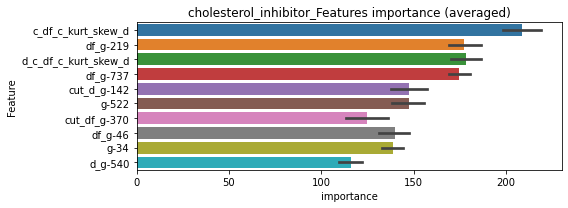

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000589842	valid_1's binary_logloss: 0.0102492


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000569997	valid_1's binary_logloss: 0.00504188


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536825	valid_1's binary_logloss: 0.00198166
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000532867	valid_1's binary_logloss: 0.00197466


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cholesterol_inhibitor logloss: 0.007165643183770553


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000959417	valid_1's binary_logloss: 0.0114012
neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034184	valid_1's binary_logloss: 0.0321156
[600]	training's binary_logloss: 0.00068627	valid_1's binary_logloss: 0.0230787
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000580922	valid_1's binary_logloss: 0.0225439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355688	valid_1's binary_logloss: 0.0210163
[600]	training's binary_logloss: 0.000708746	valid_1's binary_logloss: 0.0152223
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000653406	valid_1's binary_logloss: 0.0150065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380583	valid_1's binary_logloss: 0.00784619
[600]	training's binary_logloss: 0.000735104	valid_1's binary_logloss: 0.00278379
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000584885	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0040337, Threshold: 0.0122486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00857, conf_1:0.01592
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0122486
Num_p_label: 3.0, Expected: 9.0, Adj_threshold_2: 0.0522486
threshold: 0.0522486, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318417	valid_1's binary_logloss: 0.03213
[600]	training's binary_logloss: 0.000656911	valid_1's binary_logloss: 0.0238813
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000548162	valid_1's binary_logloss: 0.0232826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334708	valid_1's binary_logloss: 0.020092
[600]	training's binary_logloss: 0.000681355	valid_1's binary_logloss: 0.0145752
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000583846	valid_1's binary_logloss: 0.0141508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352752	valid_1's binary_logloss: 0.00740808
[600]	training's binary_logloss: 0.000702457	valid_1's binary_logloss: 0.0027535
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000570042	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0234057, Threshold: 0.0522486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, conf_0:0.04180, conf_1:0.06270
threshold: 0.0522486, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314378	valid_1's binary_logloss: 0.0231548
[600]	training's binary_logloss: 0.000658763	valid_1's binary_logloss: 0.0164912
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000604507	valid_1's binary_logloss: 0.0162033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318693	valid_1's binary_logloss: 0.0189165
[600]	training's binary_logloss: 0.00066519	valid_1's binary_logloss: 0.0119761
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000583096	valid_1's binary_logloss: 0.011842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032535	valid_1's binary_logloss: 0.0159633
[600]	training's binary_logloss: 0.000666648	valid_1's binary_logloss: 0.00964409
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000608446	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0375486, Threshold: 0.0522486, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, conf_0:0.04702, conf_1:0.05747
threshold: 0.0522486, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


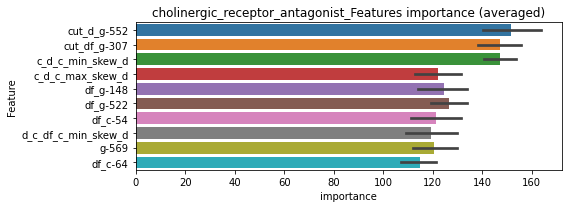

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000654223	valid_1's binary_logloss: 0.0154377


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000623646	valid_1's binary_logloss: 0.0114621


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000837004	valid_1's binary_logloss: 0.0111341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000579126	valid_1's binary_logloss: 0.0053064


cholinergic_receptor_antagonist logloss: 0.01083651452337545


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159427	valid_1's binary_logloss: 0.00342111
[600]	training's binary_logloss: 0.000398033	valid_1's binary_logloss: 0.00125126
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000379189	valid_1's binary_logloss: 0.00121598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015331	valid_1's binary_logloss: 0.00507364
[600]	training's binary_logloss: 0.000390805	valid_1's binary_logloss: 0.00235511
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000370944	valid_1's binary_logloss: 0.00231026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155389	valid_1's binary_logloss: 0.00371282
[600]	training's binary_logloss: 0.000390717	valid_1's binary_logloss: 0.00150598
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000378873	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0021716, Threshold: 0.0118546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00830, conf_1:0.01541
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0118546
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0518546
threshold: 0.0518546, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152264	valid_1's binary_logloss: 0.00316308
[600]	training's binary_logloss: 0.000384746	valid_1's binary_logloss: 0.0011279
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000375288	valid_1's binary_logloss: 0.0011118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145736	valid_1's binary_logloss: 0.00495081
[600]	training's binary_logloss: 0.000381076	valid_1's binary_logloss: 0.00251568
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000366857	valid_1's binary_logloss: 0.00247941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145881	valid_1's binary_logloss: 0.00331701
[600]	training's binary_logloss: 0.000379237	valid_1's binary_logloss: 0.00128271
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000364372	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0185489, Threshold: 0.0518546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.04148, conf_1:0.06223
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0518546
threshold: 0.0518546, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152264	valid_1's binary_logloss: 0.00316308
[600]	training's binary_logloss: 0.000384746	valid_1's binary_logloss: 0.0011279
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000375288	valid_1's binary_logloss: 0.0011118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145736	valid_1's binary_logloss: 0.00495081
[600]	training's binary_logloss: 0.000381076	valid_1's binary_logloss: 0.00251568
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000366857	valid_1's binary_logloss: 0.00247941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145881	valid_1's binary_logloss: 0.00331701
[600]	training's binary_logloss: 0.000379237	valid_1's binary_logloss: 0.00128271
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000364372	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0185489, Threshold: 0.0518546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.04667, conf_1:0.05704
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0518546
threshold: 0.0518546, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


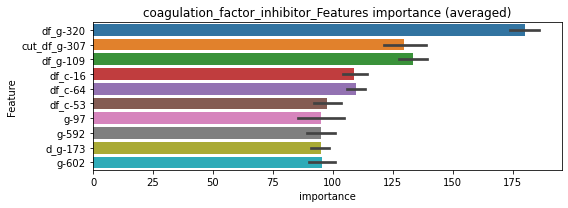

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000384993	valid_1's binary_logloss: 0.000921878
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000384993	valid_1's binary_logloss: 0.000921878


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000379377	valid_1's binary_logloss: 0.0021975


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000377101	valid_1's binary_logloss: 0.00142555
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000373555	valid_1's binary_logloss: 0.00141732


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.0024751790024707286


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000428621	valid_1's binary_logloss: 0.00536565


neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275008	valid_1's binary_logloss: 0.00981016
[600]	training's binary_logloss: 0.000541451	valid_1's binary_logloss: 0.00435201
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000477538	valid_1's binary_logloss: 0.00419131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271095	valid_1's binary_logloss: 0.0152299
[600]	training's binary_logloss: 0.000537914	valid_1's binary_logloss: 0.00879527
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000515165	valid_1's binary_logloss: 0.00875477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285971	valid_1's binary_logloss: 0.00808037
[600]	training's binary_logloss: 0.000555648	valid_1's binary_logloss: 0.00354052
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000474989	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0034874, Threshold: 0.0106596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00746, conf_1:0.01386
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0106596
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0506596
threshold: 0.0506596, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256607	valid_1's binary_logloss: 0.009423
[600]	training's binary_logloss: 0.000523786	valid_1's binary_logloss: 0.00434706
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000448748	valid_1's binary_logloss: 0.00412038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258534	valid_1's binary_logloss: 0.0143289
[600]	training's binary_logloss: 0.000522594	valid_1's binary_logloss: 0.00938529
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000530022	valid_1's binary_logloss: 0.00935767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267262	valid_1's binary_logloss: 0.0074108
[600]	training's binary_logloss: 0.000533883	valid_1's binary_logloss: 0.00343157
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000460394	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0244285, Threshold: 0.0506596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00151
Num_p_label: 8.0, conf_0:0.04053, conf_1:0.06079
threshold: 0.0506596, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249965	valid_1's binary_logloss: 0.0160669
[600]	training's binary_logloss: 0.00051579	valid_1's binary_logloss: 0.0101206
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000452478	valid_1's binary_logloss: 0.00977274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251526	valid_1's binary_logloss: 0.00787857
[600]	training's binary_logloss: 0.000526447	valid_1's binary_logloss: 0.00331442
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000458146	valid_1's binary_logloss: 0.0031447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254491	valid_1's binary_logloss: 0.00596202
[600]	training's binary_logloss: 0.00053022	valid_1's binary_logloss: 0.00186038
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000463475	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0326133, Threshold: 0.0506596, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.04559, conf_1:0.05573
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0506596
threshold: 0.0506596, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


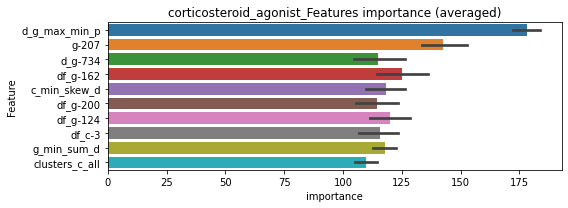

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000609012	valid_1's binary_logloss: 0.00800155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000487408	valid_1's binary_logloss: 0.0029998


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000476367	valid_1's binary_logloss: 0.00180696


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000476113	valid_1's binary_logloss: 0.00240747


corticosteroid_agonist logloss: 0.003804142909928247


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235
target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0732777	valid_1's binary_logloss: 0.359142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.0894713	valid_1's binary_logloss: 0.374438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[199]	training's binary_logloss: 0.0985652	valid_1's binary_logloss: 0.37368
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.755
y_Threshold: 0.1378753, Threshold: 0.4704401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 694 → Positive_corect_labels: 365/3188
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, conf_0:0.32931, conf_1:0.61157
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.4704401
Num_p_label: 46.0, Expected: 72.7, Adj_threshold_2: 0.4404401
Num_p_label: 57.0, Expected: 72.7, Adj_threshold_3: 0.4104401
threshold: 0.4104401, positive_p_label: 57.0/3982, p_label_rate: 0.0143144


Early stopping, best iteration is:
[221]	training's binary_logloss: 0.087603	valid_1's binary_logloss: 0.363587


positive_y_label: 365.0/3188, y_label_rate: 0.1144918
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0223796	valid_1's binary_logloss: 0.18554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147003	valid_1's binary_logloss: 0.192098
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0128506	valid_1's binary_logloss: 0.190903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145748	valid_1's binary_logloss: 0.179598
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0126319	valid_1's binary_logloss: 0.17789
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.946
y_Threshold: 0.0771418, Threshold: 0.4104401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 283.0/3024
p_label_rate: 0.0283777 Vs.target_rate: 0.01827
Num_p_label: 113.0, conf_0:0.32835, conf_1:0.49253
Num_p_label: 113.0, Expected: 72.7, Adj_threshold_1: 0.4104401
Num_p_label: 110.0, Expected: 72.7, Adj_threshold_2: 0.4504401
Num_p_label: 102.0, Expected: 72.7, Adj_threshold_3: 0.4904401
threshold: 0.4904401, positive_p_label: 102.0/3982, p_label_rate: 0.0256153


Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0196663	valid_1's binary_logloss: 0.217842


positive_y_label: 283.0/3024, y_label_rate: 0.0935847
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.0135654	valid_1's binary_logloss: 0.147166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00866198	valid_1's binary_logloss: 0.117258
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0027033	valid_1's binary_logloss: 0.110927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00807478	valid_1's binary_logloss: 0.133752
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00440539	valid_1's binary_logloss: 0.130578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00787116	valid_1's binary_logloss: 0.115132


3 / 3 AUC score:0.986
y_Threshold: 0.0479337, Threshold: 0.4904401, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 250.0/2958
p_label_rate: 0.0323958 Vs.target_rate: 0.01827
Num_p_label: 129.0, conf_0:0.44140, conf_1:0.53948
Num_p_label: 129.0, Expected: 72.7, Adj_threshold_1: 0.4904401
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_2: 0.5304401
Num_p_label: 120.0, Expected: 72.7, Adj_threshold_3: 0.5704401
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_4: 0.6104401
Num_p_label: 110.0, Expected: 72.7, Adj_threshold_5: 0.6504401
Num_p_label: 100.0, Expected: 72.7, Adj_threshold_6: 0.6904401
threshold: 0.6904401, positive_p_label: 100.0/3982, p_label_rate: 0.0251130


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00610624	valid_1's binary_logloss: 0.11376


positive_y_label: 250.0/2958, y_label_rate: 0.0845166


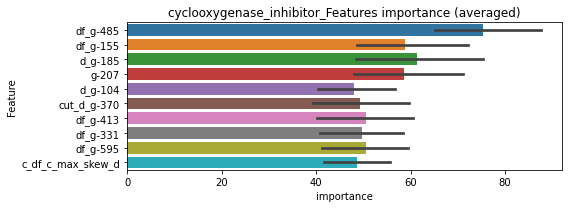

len(train_index) : 2218
len(valid_index) : 740
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2218
len(valid_index) : 740
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00497839	valid_1's binary_logloss: 0.114489
Training until validation scores don't improve for 30 rounds


len(train_index) : 2219
len(valid_index) : 739
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00772118	valid_1's binary_logloss: 0.136917
Training until validation scores don't improve for 30 rounds


len(train_index) : 2219
len(valid_index) : 739
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[112]	training's binary_logloss: 0.0132635	valid_1's binary_logloss: 0.131884
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.12692139231323085


Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00490259	valid_1's binary_logloss: 0.1244
neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273
target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00906327	valid_1's binary_logloss: 0.0750211
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00171264	valid_1's binary_logloss: 0.0645511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876749	valid_1's binary_logloss: 0.0730363
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00215233	valid_1's binary_logloss: 0.0641639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00978462	valid_1's binary_logloss: 0.0475276
[600]	training's binary_logloss: 0.00150665	valid_1's binary_logloss: 0.0308242
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000847242	valid_1's binary_logloss: 0.0292974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972313	valid_1's binary_logloss: 0.055732
[600]	train

1 / 3 AUC score:0.998
y_Threshold: 0.0104370, Threshold: 0.0388041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, conf_0:0.02716, conf_1:0.05045
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0388041
Num_p_label: 16.0, Expected: 17.4, Adj_threshold_2: 0.0788041
threshold: 0.0788041, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790982	valid_1's binary_logloss: 0.0653671
[600]	training's binary_logloss: 0.00131496	valid_1's binary_logloss: 0.0558556
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00140027	valid_1's binary_logloss: 0.0556524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00842486	valid_1's binary_logloss: 0.0470289
[600]	training's binary_logloss: 0.00137479	valid_1's binary_logloss: 0.0343418
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000931775	valid_1's binary_logloss: 0.0336405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0085583	valid_1's binary_logloss: 0.051218
[600]	training's binary_logloss: 0.00138192	valid_1's binary_logloss: 0.0377419
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00122971	valid_1's binary_logloss: 0.0

2 / 3 AUC score:0.999
y_Threshold: 0.0313900, Threshold: 0.0788041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0115520 Vs.target_rate: 0.00437
Num_p_label: 46.0, conf_0:0.06304, conf_1:0.09456
Num_p_label: 46.0, Expected: 17.4, Adj_threshold_1: 0.0788041
Num_p_label: 35.0, Expected: 17.4, Adj_threshold_2: 0.1188041
Num_p_label: 26.0, Expected: 17.4, Adj_threshold_3: 0.1588041
threshold: 0.1588041, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768699	valid_1's binary_logloss: 0.0528616
[600]	training's binary_logloss: 0.00128438	valid_1's binary_logloss: 0.0398928
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000926181	valid_1's binary_logloss: 0.0382831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736136	valid_1's binary_logloss: 0.059224
[600]	training's binary_logloss: 0.00124316	valid_1's binary_logloss: 0.0453742
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000873475	valid_1's binary_logloss: 0.0439708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801462	valid_1's binary_logloss: 0.0438805
[600]	training's binary_logloss: 0.00131873	valid_1's binary_logloss: 0.029046
[900]	training's binary_logloss: 0.000720396	valid_1's binary_logloss: 0.0273362
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0304376, Threshold: 0.1588041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 634.0/3755
p_label_rate: 0.0077850 Vs.target_rate: 0.00437
Num_p_label: 31.0, conf_0:0.14292, conf_1:0.17468
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_1: 0.1588041
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_2: 0.1988041
threshold: 0.1988041, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 634.0/3755, y_label_rate: 0.1688415


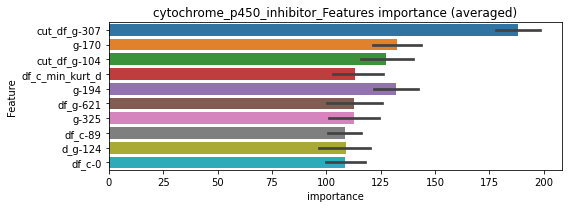

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000952451	valid_1's binary_logloss: 0.0391077


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00128439	valid_1's binary_logloss: 0.0405186
Training until validation scores don't improve for 30 rounds


len(train_index) : 2817
len(valid_index) : 938


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.0012372	valid_1's binary_logloss: 0.0469207


================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00092597	valid_1's binary_logloss: 0.0365094


cytochrome_p450_inhibitor logloss: 0.04076522796120414


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235512	valid_1's binary_logloss: 0.00867847
[600]	training's binary_logloss: 0.000498577	valid_1's binary_logloss: 0.00422683
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000493545	valid_1's binary_logloss: 0.00420509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234235	valid_1's binary_logloss: 0.0054486
[600]	training's binary_logloss: 0.0005073	valid_1's binary_logloss: 0.00183413
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000463757	valid_1's binary_logloss: 0.00173187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226724	valid_1's binary_logloss: 0.00500148
[600]	training's binary_logloss: 0.000498367	valid_1's binary_logloss: 0.00152371
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000465766	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0031544, Threshold: 0.0132581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00928, conf_1:0.01724
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0132581
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_2: 0.0532581
threshold: 0.0532581, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209281	valid_1's binary_logloss: 0.0067736
[600]	training's binary_logloss: 0.000480189	valid_1's binary_logloss: 0.00309487
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000460808	valid_1's binary_logloss: 0.00306986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217309	valid_1's binary_logloss: 0.00494039
[600]	training's binary_logloss: 0.000486144	valid_1's binary_logloss: 0.00166654
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000468026	valid_1's binary_logloss: 0.00163338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215781	valid_1's binary_logloss: 0.00401491
[600]	training's binary_logloss: 0.00049165	valid_1's binary_logloss: 0.00113849
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000467001	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0589135, Threshold: 0.0532581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, conf_0:0.04261, conf_1:0.06391
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0532581
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0932581
threshold: 0.0932581, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209281	valid_1's binary_logloss: 0.0067736
[600]	training's binary_logloss: 0.000480189	valid_1's binary_logloss: 0.00309487
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000460808	valid_1's binary_logloss: 0.00306986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217309	valid_1's binary_logloss: 0.00494039
[600]	training's binary_logloss: 0.000486144	valid_1's binary_logloss: 0.00166654
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000468026	valid_1's binary_logloss: 0.00163338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215781	valid_1's binary_logloss: 0.00401491
[600]	training's binary_logloss: 0.00049165	valid_1's binary_logloss: 0.00113849
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000467001	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0589135, Threshold: 0.0932581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00151
Num_p_label: 9.0, conf_0:0.08393, conf_1:0.10258
threshold: 0.0932581, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


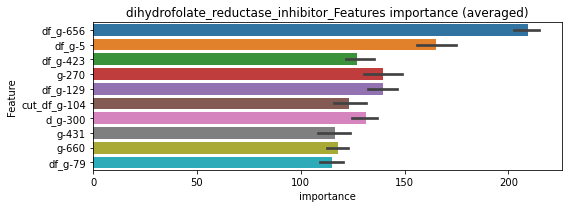

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.00047545	valid_1's binary_logloss: 0.00341792


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000462351	valid_1's binary_logloss: 0.00148605


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000463416	valid_1's binary_logloss: 0.00111118
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000463416	valid_1's binary_logloss: 0.00111118


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000470322	valid_1's binary_logloss: 0.00475422


dihydrofolate_reductase_inhibitor logloss: 0.0026941537833486905


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169646	valid_1's binary_logloss: 0.0041051
[600]	training's binary_logloss: 0.000405268	valid_1's binary_logloss: 0.00151243
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000399488	valid_1's binary_logloss: 0.00149838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163621	valid_1's binary_logloss: 0.0091913
[600]	training's binary_logloss: 0.000398119	valid_1's binary_logloss: 0.0054384
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000408965	valid_1's binary_logloss: 0.0054149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171608	valid_1's binary_logloss: 0.00364129
[600]	training's binary_logloss: 0.000407308	valid_1's binary_logloss: 0.00126376
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000393199	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0023844, Threshold: 0.0082165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00575, conf_1:0.01068
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0082165
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0482165
threshold: 0.0482165, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159825	valid_1's binary_logloss: 0.00342583
[600]	training's binary_logloss: 0.000396215	valid_1's binary_logloss: 0.00127546
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000393162	valid_1's binary_logloss: 0.0012669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150255	valid_1's binary_logloss: 0.0087854
[600]	training's binary_logloss: 0.000387691	valid_1's binary_logloss: 0.00520696
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00039261	valid_1's binary_logloss: 0.00519096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158673	valid_1's binary_logloss: 0.00292182
[600]	training's binary_logloss: 0.000398621	valid_1's binary_logloss: 0.000940516
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000398621	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0662364, Threshold: 0.0482165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, conf_0:0.03857, conf_1:0.05786
Num_p_label: 20.0, Expected: 4.2, Adj_threshold_1: 0.0482165
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0882165
threshold: 0.0882165, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159825	valid_1's binary_logloss: 0.00342583
[600]	training's binary_logloss: 0.000396215	valid_1's binary_logloss: 0.00127546
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000393162	valid_1's binary_logloss: 0.0012669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150255	valid_1's binary_logloss: 0.0087854
[600]	training's binary_logloss: 0.000387691	valid_1's binary_logloss: 0.00520696
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00039261	valid_1's binary_logloss: 0.00519096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158673	valid_1's binary_logloss: 0.00292182
[600]	training's binary_logloss: 0.000398621	valid_1's binary_logloss: 0.000940516
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000398621	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0662364, Threshold: 0.0882165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, conf_0:0.07939, conf_1:0.09704
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0882165
threshold: 0.0882165, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


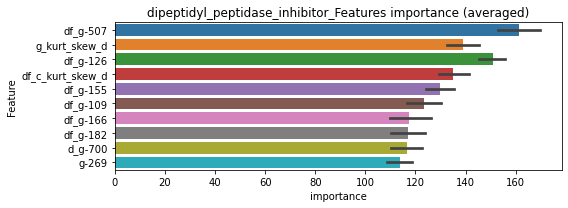

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000399963	valid_1's binary_logloss: 0.00121537


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000406093	valid_1's binary_logloss: 0.00409


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00105754
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00105754


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389377	valid_1's binary_logloss: 0.00147686
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000388704	valid_1's binary_logloss: 0.00147459


dipeptidyl_peptidase_inhibitor logloss: 0.001959819347387567


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393948	valid_1's binary_logloss: 0.000591098
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000197717	valid_1's binary_logloss: 0.000327143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391096	valid_1's binary_logloss: 0.00416219
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000198997	valid_1's binary_logloss: 0.00373877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393009	valid_1's binary_logloss: 0.000488548
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000196824	valid_1's binary_logloss: 0.000250651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390818	valid_1's binary_logloss: 0.000557361


1 / 3 AUC score:1.000
y_Threshold: 0.0005362, Threshold: 0.0021406, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00150, conf_1:0.00278
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021406
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0421406
threshold: 0.0421406, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000199332	valid_1's binary_logloss: 0.00029772


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362146	valid_1's binary_logloss: 0.00155837
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000184898	valid_1's binary_logloss: 0.00113245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035712	valid_1's binary_logloss: 0.00388859
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00019996	valid_1's binary_logloss: 0.00345499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036579	valid_1's binary_logloss: 0.000384306
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000183619	valid_1's binary_logloss: 0.000193484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365765	valid_1's binary_logloss: 0.00037454


2 / 3 AUC score:1.000
y_Threshold: 0.0172698, Threshold: 0.0421406, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, conf_0:0.03371, conf_1:0.05057
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0421406
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0821406
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1221406
threshold: 0.1221406, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000187072	valid_1's binary_logloss: 0.00019238


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362146	valid_1's binary_logloss: 0.00155837
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000184898	valid_1's binary_logloss: 0.00113245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035712	valid_1's binary_logloss: 0.00388859
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00019996	valid_1's binary_logloss: 0.00345499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036579	valid_1's binary_logloss: 0.000384306
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000183619	valid_1's binary_logloss: 0.000193484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365765	valid_1's binary_logloss: 0.00037454


3 / 3 AUC score:1.000
y_Threshold: 0.0172698, Threshold: 0.1221406, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.10993, conf_1:0.13435
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1221406
threshold: 0.1221406, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000187072	valid_1's binary_logloss: 0.00019238


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


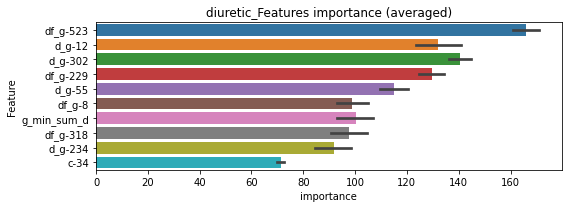

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186177	valid_1's binary_logloss: 0.000449049
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.00018519	valid_1's binary_logloss: 0.000447484


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185981	valid_1's binary_logloss: 0.00221895
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000184992	valid_1's binary_logloss: 0.00221545


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186092	valid_1's binary_logloss: 0.000213418
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.00018527	valid_1's binary_logloss: 0.000212481


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000187272	valid_1's binary_logloss: 0.000197912
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000186664	valid_1's binary_logloss: 0.000197249


diuretic logloss: 0.00076822253904158


neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307857	valid_1's binary_logloss: 0.0229005
[600]	training's binary_logloss: 0.000622282	valid_1's binary_logloss: 0.0172505
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000577897	valid_1's binary_logloss: 0.0171291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322788	valid_1's binary_logloss: 0.0173896
[600]	training's binary_logloss: 0.000641119	valid_1's binary_logloss: 0.0104098
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0100256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342396	valid_1's binary_logloss: 0.00836051
[600]	training's binary_logloss: 0.000670521	valid_1's binary_logloss: 0.00266482
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000537786	valid_1's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0036537, Threshold: 0.0775910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.05431, conf_1:0.10087
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0775910
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_2: 0.1175910
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_3: 0.1575910
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_4: 0.1975910
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_5: 0.2375910
threshold: 0.2375910, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027419	valid_1's binary_logloss: 0.021058
[600]	training's binary_logloss: 0.000578941	valid_1's binary_logloss: 0.0144607
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000535725	valid_1's binary_logloss: 0.0144192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293845	valid_1's binary_logloss: 0.0122631
[600]	training's binary_logloss: 0.000607253	valid_1's binary_logloss: 0.00690535
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000541338	valid_1's binary_logloss: 0.00665339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028994	valid_1's binary_logloss: 0.0183198
[600]	training's binary_logloss: 0.000592783	valid_1's binary_logloss: 0.0104371
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000567782	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0910716, Threshold: 0.2375910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0175791 Vs.target_rate: 0.00202
Num_p_label: 70.0, conf_0:0.19007, conf_1:0.28511
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2375910
Num_p_label: 69.0, Expected: 8.0, Adj_threshold_2: 0.2775910
Num_p_label: 63.0, Expected: 8.0, Adj_threshold_3: 0.3175910
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_4: 0.3575910
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_5: 0.3975910
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_6: 0.4375910
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_7: 0.4775910
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_8: 0.5175910
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_9: 0.5575910
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_10: 0.5975910
threshold: 0.6375910, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277856	valid_1's binary_logloss: 0.0120327
[600]	training's binary_logloss: 0.000589017	valid_1's binary_logloss: 0.00632529
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000524493	valid_1's binary_logloss: 0.00606677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277669	valid_1's binary_logloss: 0.0151687
[600]	training's binary_logloss: 0.000582946	valid_1's binary_logloss: 0.00869471
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000539135	valid_1's binary_logloss: 0.0084594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277096	valid_1's binary_logloss: 0.0106963
[600]	training's binary_logloss: 0.00058766	valid_1's binary_logloss: 0.00517374
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000532985	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0451203, Threshold: 0.6375910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0128076 Vs.target_rate: 0.00202
Num_p_label: 51.0, conf_0:0.50000, conf_1:0.70135
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_1: 0.6375910
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_2: 0.6775910
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_3: 0.7175910
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_4: 0.7575910
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_5: 0.7975910
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_6: 0.8375910
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.8775910
threshold: 0.8775910, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


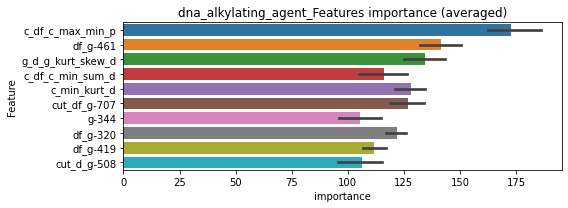

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000542436	valid_1's binary_logloss: 0.0039653


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000523016	valid_1's binary_logloss: 0.0128183


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000529766	valid_1's binary_logloss: 0.00358225


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000545028	valid_1's binary_logloss: 0.00497702


dna_alkylating_agent logloss: 0.006338188514159224


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248
target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0478178	valid_1's binary_logloss: 0.352608
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0441596	valid_1's binary_logloss: 0.351988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0514353	valid_1's binary_logloss: 0.330548
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.0486188	valid_1's binary_logloss: 0.330079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0518553	valid_1's binary_logloss: 0.327165
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0527497	valid_1's binary_logloss: 0.326676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0521	valid_1's binary_logloss: 0.315764


1 / 3 AUC score:0.819
y_Threshold: 0.1121697, Threshold: 0.4937419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 581 → Positive_corect_labels: 424/3316
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, conf_0:0.34562, conf_1:0.64186
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4937419
Num_p_label: 46.0, Expected: 67.2, Adj_threshold_2: 0.4637419


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0478011	valid_1's binary_logloss: 0.31443


threshold: 0.4637419, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 424.0/3316, y_label_rate: 0.1278649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166766	valid_1's binary_logloss: 0.197521
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00962871	valid_1's binary_logloss: 0.196018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174991	valid_1's binary_logloss: 0.18374
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.0193381	valid_1's binary_logloss: 0.182944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176529	valid_1's binary_logloss: 0.17072
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00686659	valid_1's binary_logloss: 0.166723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180716	valid_1's binary_logloss: 0.18397


2 / 3 AUC score:0.965
y_Threshold: 0.0727418, Threshold: 0.4637419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 349.0/3166
p_label_rate: 0.0271220 Vs.target_rate: 0.01688
Num_p_label: 108.0, conf_0:0.37099, conf_1:0.55649
Num_p_label: 108.0, Expected: 67.2, Adj_threshold_1: 0.4637419
Num_p_label: 100.0, Expected: 67.2, Adj_threshold_2: 0.5037419
threshold: 0.5037419, positive_p_label: 100.0/3982, p_label_rate: 0.0251130


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00991467	valid_1's binary_logloss: 0.18087


positive_y_label: 349.0/3166, y_label_rate: 0.1102337
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115391	valid_1's binary_logloss: 0.160698
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00430443	valid_1's binary_logloss: 0.155709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117197	valid_1's binary_logloss: 0.164813
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0143446	valid_1's binary_logloss: 0.164309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110012	valid_1's binary_logloss: 0.16418
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00594078	valid_1's binary_logloss: 0.162026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111857	valid_1's binary_logloss: 0.158706
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.0124503	valid_1's binary_logloss: 

3 / 3 AUC score:0.963
y_Threshold: 0.0581178, Threshold: 0.5037419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 296.0/3060
p_label_rate: 0.0331492 Vs.target_rate: 0.01688
Num_p_label: 132.0, conf_0:0.45337, conf_1:0.55412
Num_p_label: 132.0, Expected: 67.2, Adj_threshold_1: 0.5037419
Num_p_label: 127.0, Expected: 67.2, Adj_threshold_2: 0.5437419
Num_p_label: 124.0, Expected: 67.2, Adj_threshold_3: 0.5837419
Num_p_label: 123.0, Expected: 67.2, Adj_threshold_4: 0.6237419
Num_p_label: 114.0, Expected: 67.2, Adj_threshold_5: 0.6637419
Num_p_label: 110.0, Expected: 67.2, Adj_threshold_6: 0.7037419
Num_p_label: 101.0, Expected: 67.2, Adj_threshold_7: 0.7437419
Num_p_label: 97.0, Expected: 67.2, Adj_threshold_8: 0.7837419
threshold: 0.7837419, positive_p_label: 97.0/3982, p_label_rate: 0.0243596
positive_y_label: 296.0/3060, y_label_rate: 0.0967320


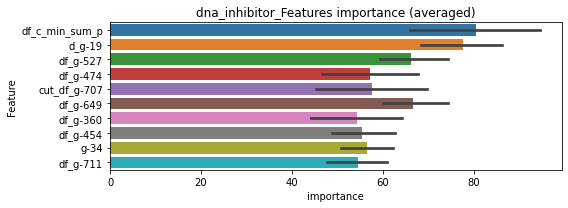

len(train_index) : 2295
len(valid_index) : 765
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2295
len(valid_index) : 765
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00859259	valid_1's binary_logloss: 0.147473
Training until validation scores don't improve for 30 rounds


len(train_index) : 2295
len(valid_index) : 765
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00200346	valid_1's binary_logloss: 0.102676
Training until validation scores don't improve for 30 rounds


len(train_index) : 2295
len(valid_index) : 765
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[110]	training's binary_logloss: 0.0159042	valid_1's binary_logloss: 0.149986
Training until validation scores don't improve for 30 rounds


dna_inhibitor logloss: 0.13351701655954046


Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00824715	valid_1's binary_logloss: 0.133934
neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272
target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00934321	valid_1's binary_logloss: 0.118497
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00654686	valid_1's binary_logloss: 0.11614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109469	valid_1's binary_logloss: 0.0659775
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00225133	valid_1's binary_logloss: 0.0557786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110887	valid_1's binary_logloss: 0.0601555
[600]	training's binary_logloss: 0.00175132	valid_1's binary_logloss: 0.0449692
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00154019	valid_1's binary_logloss: 0.0442499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105772	valid_1's binary_logloss: 0.0729216
[600]	training's 

1 / 3 AUC score:0.993
y_Threshold: 0.0201376, Threshold: 0.0638261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 637/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, conf_0:0.04468, conf_1:0.08297
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0638261
Num_p_label: 20.0, Expected: 20.2, Adj_threshold_2: 0.1038261
threshold: 0.1038261, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746995	valid_1's binary_logloss: 0.0903155
[600]	training's binary_logloss: 0.00133924	valid_1's binary_logloss: 0.0797073
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.0011958	valid_1's binary_logloss: 0.0785541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00833539	valid_1's binary_logloss: 0.061619
[600]	training's binary_logloss: 0.00142869	valid_1's binary_logloss: 0.0484332
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00131183	valid_1's binary_logloss: 0.0479665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00879762	valid_1's binary_logloss: 0.0572301
[600]	training's binary_logloss: 0.00147518	valid_1's binary_logloss: 0.0433014
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00149141	valid_1's binary_logloss: 0.04

2 / 3 AUC score:0.996
y_Threshold: 0.0383391, Threshold: 0.1038261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 619.0/3724
p_label_rate: 0.0092918 Vs.target_rate: 0.00508
Num_p_label: 37.0, conf_0:0.08306, conf_1:0.12459
Num_p_label: 37.0, Expected: 20.2, Adj_threshold_1: 0.1038261
Num_p_label: 29.0, Expected: 20.2, Adj_threshold_2: 0.1438261
threshold: 0.1438261, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 619.0/3724, y_label_rate: 0.1662191
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705416	valid_1's binary_logloss: 0.0600635
[600]	training's binary_logloss: 0.00125164	valid_1's binary_logloss: 0.0471255
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00105595	valid_1's binary_logloss: 0.0466918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780605	valid_1's binary_logloss: 0.0457944
[600]	training's binary_logloss: 0.00133108	valid_1's binary_logloss: 0.0302389
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00105752	valid_1's binary_logloss: 0.0293466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746934	valid_1's binary_logloss: 0.0553299
[600]	training's binary_logloss: 0.00131169	valid_1's binary_logloss: 0.0433598
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00102212	valid_1's binary_logloss: 0.

3 / 3 AUC score:0.999
y_Threshold: 0.0442039, Threshold: 0.1438261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 613.0/3712
p_label_rate: 0.0092918 Vs.target_rate: 0.00508
Num_p_label: 37.0, conf_0:0.12944, conf_1:0.15821
Num_p_label: 37.0, Expected: 20.2, Adj_threshold_1: 0.1438261
Num_p_label: 25.0, Expected: 20.2, Adj_threshold_2: 0.1838261
threshold: 0.1838261, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 613.0/3712, y_label_rate: 0.1651401


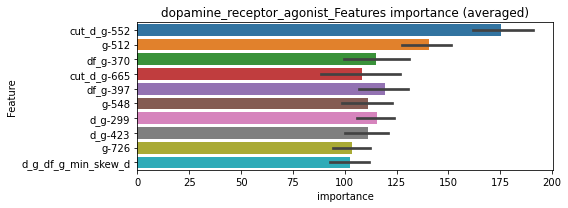

len(train_index) : 2784
len(valid_index) : 928
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2784
len(valid_index) : 928
================================= fold 2/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00138253	valid_1's binary_logloss: 0.0375197
Training until validation scores don't improve for 30 rounds


len(train_index) : 2784
len(valid_index) : 928
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00244594	valid_1's binary_logloss: 0.0494975
Training until validation scores don't improve for 30 rounds


len(train_index) : 2784
len(valid_index) : 928
================================= fold 4/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.001702	valid_1's binary_logloss: 0.0440354
Training until validation scores don't improve for 30 rounds


dopamine_receptor_agonist logloss: 0.04299381344767913


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00133455	valid_1's binary_logloss: 0.0409227
neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231
target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.0878753	valid_1's binary_logloss: 0.377313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0549032	valid_1's binary_logloss: 0.357318
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0649875	valid_1's binary_logloss: 0.355495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0567091	valid_1's binary_logloss: 0.352127
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0632465	valid_1's binary_logloss: 0.350445
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.763
y_Threshold: 0.1232027, Threshold: 0.5268284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 704 → Positive_corect_labels: 359/3173
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, conf_0:0.36878, conf_1:0.68488
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5268284
Num_p_label: 48.0, Expected: 70.9, Adj_threshold_2: 0.4968284
threshold: 0.4968284, positive_p_label: 48.0/3982, p_label_rate: 0.0120542


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.0732081	valid_1's binary_logloss: 0.373816


positive_y_label: 359.0/3173, y_label_rate: 0.1131421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0138059	valid_1's binary_logloss: 0.165616
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0135725	valid_1's binary_logloss: 0.165451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149485	valid_1's binary_logloss: 0.179265
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0177016	valid_1's binary_logloss: 0.177785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132706	valid_1's binary_logloss: 0.171325
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0109139	valid_1's binary_logloss: 0.169733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149751	valid_1's binary_logloss: 0.16255


2 / 3 AUC score:0.958
y_Threshold: 0.0742904, Threshold: 0.4968284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 284.0/3023
p_label_rate: 0.0346560 Vs.target_rate: 0.01780
Num_p_label: 138.0, conf_0:0.39746, conf_1:0.59619
Num_p_label: 138.0, Expected: 70.9, Adj_threshold_1: 0.4968284
Num_p_label: 132.0, Expected: 70.9, Adj_threshold_2: 0.5368284
Num_p_label: 121.0, Expected: 70.9, Adj_threshold_3: 0.5768284
Num_p_label: 115.0, Expected: 70.9, Adj_threshold_4: 0.6168284
Num_p_label: 105.0, Expected: 70.9, Adj_threshold_5: 0.6568284
threshold: 0.6568284, positive_p_label: 105.0/3982, p_label_rate: 0.0263687


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00853021	valid_1's binary_logloss: 0.160645


positive_y_label: 284.0/3023, y_label_rate: 0.0939464
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00996151	valid_1's binary_logloss: 0.169808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00769483	valid_1's binary_logloss: 0.133267
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00595189	valid_1's binary_logloss: 0.132231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740413	valid_1's binary_logloss: 0.109156
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00492503	valid_1's binary_logloss: 0.107769
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.971
y_Threshold: 0.0565257, Threshold: 0.6568284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 229.0/2913
p_label_rate: 0.0381718 Vs.target_rate: 0.01780
Num_p_label: 152.0, conf_0:0.50000, conf_1:0.72251
Num_p_label: 152.0, Expected: 70.9, Adj_threshold_1: 0.6568284
Num_p_label: 146.0, Expected: 70.9, Adj_threshold_2: 0.6968284
Num_p_label: 141.0, Expected: 70.9, Adj_threshold_3: 0.7368284
Num_p_label: 139.0, Expected: 70.9, Adj_threshold_4: 0.7768284
Num_p_label: 125.0, Expected: 70.9, Adj_threshold_5: 0.8168284
Num_p_label: 110.0, Expected: 70.9, Adj_threshold_6: 0.8568284
Num_p_label: 93.0, Expected: 70.9, Adj_threshold_7: 0.8968284
threshold: 0.8968284, positive_p_label: 93.0/3982, p_label_rate: 0.0233551


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.0110419	valid_1's binary_logloss: 0.147092


positive_y_label: 229.0/2913, y_label_rate: 0.0786131


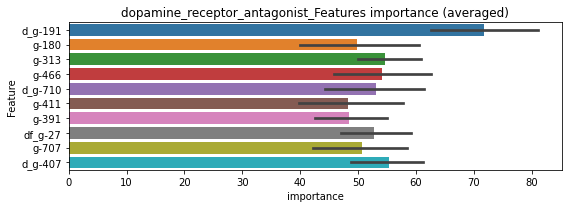

len(train_index) : 2184
len(valid_index) : 729
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2185
len(valid_index) : 728
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00316879	valid_1's binary_logloss: 0.085815
Training until validation scores don't improve for 30 rounds


len(train_index) : 2185
len(valid_index) : 728
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00698837	valid_1's binary_logloss: 0.122204
Training until validation scores don't improve for 30 rounds


len(train_index) : 2185
len(valid_index) : 728
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00477884	valid_1's binary_logloss: 0.0829146
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.10221118370712323


Early stopping, best iteration is:
[127]	training's binary_logloss: 0.00858494	valid_1's binary_logloss: 0.117934
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242
target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0474439	valid_1's binary_logloss: 0.285183
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0391574	valid_1's binary_logloss: 0.284096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454578	valid_1's binary_logloss: 0.286166
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0316328	valid_1's binary_logloss: 0.28174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464831	valid_1's binary_logloss: 0.296601
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.0482393	valid_1's binary_logloss: 0.296343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464062	valid_1's binary_logloss: 0.298213


1 / 3 AUC score:0.860
y_Threshold: 0.0977407, Threshold: 0.7493283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 500 → Positive_corect_labels: 463/3390
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7493283, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0370819	valid_1's binary_logloss: 0.296826


positive_y_label: 463.0/3390, y_label_rate: 0.1365782
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197264	valid_1's binary_logloss: 0.174107
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00709354	valid_1's binary_logloss: 0.161438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193473	valid_1's binary_logloss: 0.181493
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.0105132	valid_1's binary_logloss: 0.175588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203981	valid_1's binary_logloss: 0.148943
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.0053487	valid_1's binary_logloss: 0.136127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021404	valid_1's binary_logloss: 0.164509


2 / 3 AUC score:0.965
y_Threshold: 0.0673163, Threshold: 0.7493283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 391.0/3246


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00494551	valid_1's binary_logloss: 0.153367


p_label_rate: 0.0328980 Vs.target_rate: 0.01411
Num_p_label: 131.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 131.0, Expected: 56.2, Adj_threshold_1: 0.7493283
Num_p_label: 127.0, Expected: 56.2, Adj_threshold_2: 0.7893283
Num_p_label: 116.0, Expected: 56.2, Adj_threshold_3: 0.8293283
Num_p_label: 108.0, Expected: 56.2, Adj_threshold_4: 0.8693283
threshold: 0.8693283, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 391.0/3246, y_label_rate: 0.1204559
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123455	valid_1's binary_logloss: 0.134868
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00347795	valid_1's binary_logloss: 0.125497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129296	valid_1's binary_logloss: 0.130964
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00568364	valid_1's binary_logloss: 0.125681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119746	valid_1's binary_logloss: 0.11236
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00345386	valid_1's binary_logloss: 0.102352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123437	valid_1's binary_logloss: 0.128543


3 / 3 AUC score:0.983
y_Threshold: 0.0573335, Threshold: 0.8693283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 349.0/3162
p_label_rate: 0.0359116 Vs.target_rate: 0.01411
Num_p_label: 143.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 143.0, Expected: 56.2, Adj_threshold_1: 0.8693283
threshold: 0.8693283, positive_p_label: 143.0/3982, p_label_rate: 0.0359116


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00467402	valid_1's binary_logloss: 0.121124


positive_y_label: 349.0/3162, y_label_rate: 0.1103732


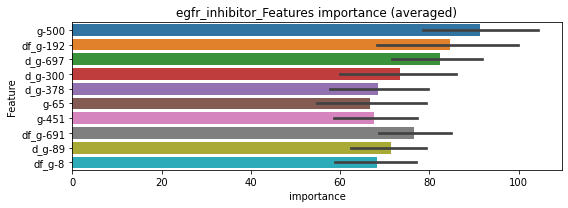

len(train_index) : 2371
len(valid_index) : 791
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2371
len(valid_index) : 791
================================= fold 2/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00487555	valid_1's binary_logloss: 0.108049
Training until validation scores don't improve for 30 rounds


len(train_index) : 2372
len(valid_index) : 790
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00331881	valid_1's binary_logloss: 0.0930771
Training until validation scores don't improve for 30 rounds


len(train_index) : 2372
len(valid_index) : 790
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[128]	training's binary_logloss: 0.0122477	valid_1's binary_logloss: 0.146206
Training until validation scores don't improve for 30 rounds


egfr_inhibitor logloss: 0.11210863175382745


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00356493	valid_1's binary_logloss: 0.101132
neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000622239	valid_1's binary_logloss: 0.00237084
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00026094	valid_1's binary_logloss: 0.00156346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633225	valid_1's binary_logloss: 0.00234619
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000262179	valid_1's binary_logloss: 0.00150713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650391	valid_1's binary_logloss: 0.000844393
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000265952	valid_1's binary_logloss: 0.000374856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643484	valid_1's binary_logloss: 0.000936385


1 / 3 AUC score:1.000
y_Threshold: 0.0010724, Threshold: 0.0030556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00214, conf_1:0.00397
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0030556
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0430556


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000259445	valid_1's binary_logloss: 0.000436437


threshold: 0.0430556, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000600155	valid_1's binary_logloss: 0.00285314
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000249348	valid_1's binary_logloss: 0.00208054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606765	valid_1's binary_logloss: 0.00189676
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00024762	valid_1's binary_logloss: 0.00117106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634455	valid_1's binary_logloss: 0.000829487
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000255828	valid_1's binary_logloss: 0.000354668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621545	valid_1's binary_logloss: 0.000799888


2 / 3 AUC score:1.000
y_Threshold: 0.0500476, Threshold: 0.0430556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.03444, conf_1:0.05167
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0430556
threshold: 0.0430556, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000251081	valid_1's binary_logloss: 0.000352776


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000600155	valid_1's binary_logloss: 0.00285314
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000249348	valid_1's binary_logloss: 0.00208054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606765	valid_1's binary_logloss: 0.00189676
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00024762	valid_1's binary_logloss: 0.00117106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634455	valid_1's binary_logloss: 0.000829487
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000255828	valid_1's binary_logloss: 0.000354668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621545	valid_1's binary_logloss: 0.000799888


3 / 3 AUC score:1.000
y_Threshold: 0.0500476, Threshold: 0.0430556, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000251081	valid_1's binary_logloss: 0.000352776


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.03875, conf_1:0.04736
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0430556
threshold: 0.0430556, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


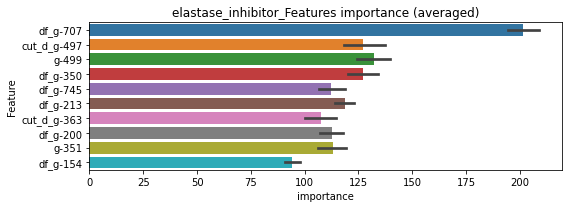

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000252636	valid_1's binary_logloss: 0.00202639
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000268852	valid_1's binary_logloss: 0.000942924
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000263208	valid_1's binary_logloss: 0.00036772
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.000935059697299313


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000261095	valid_1's binary_logloss: 0.000402275
neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287
target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013207	valid_1's binary_logloss: 0.00403424
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00040933	valid_1's binary_logloss: 0.00296809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130623	valid_1's binary_logloss: 0.00353597
[600]	training's binary_logloss: 0.000357684	valid_1's binary_logloss: 0.00177989
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000358492	valid_1's binary_logloss: 0.00177889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013913	valid_1's binary_logloss: 0.00237637
[600]	training's binary_logloss: 0.000360808	valid_1's binary_logloss: 0.000785334
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000354519	valid_1's binary_logloss: 0.00077503
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0018983, Threshold: 0.0079610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, conf_0:0.00557, conf_1:0.01035
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0079610
Num_p_label: 3.0, Expected: 3.3, Adj_threshold_2: 0.0479610
threshold: 0.0479610, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126499	valid_1's binary_logloss: 0.00374376
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000385451	valid_1's binary_logloss: 0.00289381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125943	valid_1's binary_logloss: 0.00335203
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356066	valid_1's binary_logloss: 0.00145333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127903	valid_1's binary_logloss: 0.00193312
[600]	training's binary_logloss: 0.000354439	valid_1's binary_logloss: 0.000607338
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000351618	valid_1's binary_logloss: 0.000602832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127063	valid_1's binary_logloss: 0.002626

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000346166	valid_1's binary_logloss: 0.000827105
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000342294	valid_1's binary_logloss: 0.000822232


y_Threshold: 0.0327302, Threshold: 0.0479610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00084
Num_p_label: 11.0, conf_0:0.03837, conf_1:0.05755
Num_p_label: 11.0, Expected: 3.3, Adj_threshold_1: 0.0479610
Num_p_label: 5.0, Expected: 3.3, Adj_threshold_2: 0.0879610
threshold: 0.0879610, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126499	valid_1's binary_logloss: 0.00374376
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000385451	valid_1's binary_logloss: 0.00289381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125943	valid_1's binary_logloss: 0.00335203
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356066	valid_1's binary_logloss: 0.00145333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127903	valid_1's binary_logloss: 0.00193312
[600]	training's binary_logloss: 0.000354439	valid_1's binary_logloss: 0.000607338
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000351618	valid_1's binary_logloss: 0.000602832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127063	valid_1's binary_logloss: 0.002626

3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000346166	valid_1's binary_logloss: 0.000827105
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000342294	valid_1's binary_logloss: 0.000822232


y_Threshold: 0.0327302, Threshold: 0.0879610, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00084
Num_p_label: 5.0, conf_0:0.07916, conf_1:0.09676
threshold: 0.0879610, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


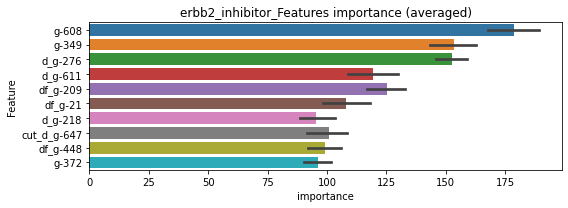

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000412887	valid_1's binary_logloss: 0.00356473
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000342598	valid_1's binary_logloss: 0.00127193
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000339841	valid_1's binary_logloss: 0.00126656


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000349196	valid_1's binary_logloss: 0.00066405
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000346345	valid_1's binary_logloss: 0.000660073


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000343521	valid_1's binary_logloss: 0.000765434
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000343663	valid_1's binary_logloss: 0.000765409


erbb2_inhibitor logloss: 0.0015642051082356125


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270
target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165544	valid_1's binary_logloss: 0.127207
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00389667	valid_1's binary_logloss: 0.115693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161538	valid_1's binary_logloss: 0.134178
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00315048	valid_1's binary_logloss: 0.128437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168447	valid_1's binary_logloss: 0.0893047
[600]	training's binary_logloss: 0.00257572	valid_1's binary_logloss: 0.0749945
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00250208	valid_1's binary_logloss: 0.0747314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159867	valid_1's binary_logloss: 0.138038


1 / 3 AUC score:0.981
y_Threshold: 0.0236189, Threshold: 0.2778281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 213 → Positive_corect_labels: 613/3711
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, conf_0:0.19448, conf_1:0.36118
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2778281
Num_p_label: 38.0, Expected: 26.4, Adj_threshold_2: 0.3178281


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00859745	valid_1's binary_logloss: 0.135068


threshold: 0.3178281, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 613.0/3711, y_label_rate: 0.1651846
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114115	valid_1's binary_logloss: 0.0986058
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00362109	valid_1's binary_logloss: 0.0919889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113975	valid_1's binary_logloss: 0.0861269
[600]	training's binary_logloss: 0.00181762	valid_1's binary_logloss: 0.0693865
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00122899	valid_1's binary_logloss: 0.0682914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123796	valid_1's binary_logloss: 0.0741137
[600]	training's binary_logloss: 0.00187715	valid_1's binary_logloss: 0.0566149
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00197279	valid_1's binary_logloss: 0.0563467
Training until validation scores don't improve for 30 rounds
[300]	training

2 / 3 AUC score:0.997
y_Threshold: 0.0351508, Threshold: 0.3178281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 595.0/3675
p_label_rate: 0.0188348 Vs.target_rate: 0.00663
Num_p_label: 75.0, conf_0:0.25426, conf_1:0.38139
Num_p_label: 75.0, Expected: 26.4, Adj_threshold_1: 0.3178281
Num_p_label: 70.0, Expected: 26.4, Adj_threshold_2: 0.3578281
Num_p_label: 66.0, Expected: 26.4, Adj_threshold_3: 0.3978281
Num_p_label: 59.0, Expected: 26.4, Adj_threshold_4: 0.4378281
Num_p_label: 51.0, Expected: 26.4, Adj_threshold_5: 0.4778281
Num_p_label: 45.0, Expected: 26.4, Adj_threshold_6: 0.5178281
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_7: 0.5578281
Num_p_label: 35.0, Expected: 26.4, Adj_threshold_8: 0.5978281
threshold: 0.5978281, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 595.0/3675, y_label_rate: 0.1619048
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970117	valid_1's binary_logloss: 0.0863173
[600]	training's binary_logloss: 0.0016127	valid_1's binary_logloss: 0.0763976
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00178906	valid_1's binary_logloss: 0.0759092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102604	valid_1's binary_logloss: 0.0773911
[600]	training's binary_logloss: 0.00164954	valid_1's binary_logloss: 0.058793
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00128283	valid_1's binary_logloss: 0.0572759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105721	valid_1's binary_logloss: 0.0586042
[600]	training's binary_logloss: 0.00171489	valid_1's binary_logloss: 0.0458721
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00134311	valid_1's binary_logloss: 0.0447

3 / 3 AUC score:0.999
y_Threshold: 0.0414618, Threshold: 0.5978281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 582.0/3649
p_label_rate: 0.0107986 Vs.target_rate: 0.00663
Num_p_label: 43.0, conf_0:0.50000, conf_1:0.65761
Num_p_label: 43.0, Expected: 26.4, Adj_threshold_1: 0.5978281
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_2: 0.6378281
Num_p_label: 37.0, Expected: 26.4, Adj_threshold_3: 0.6778281
threshold: 0.6778281, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 582.0/3649, y_label_rate: 0.1594958


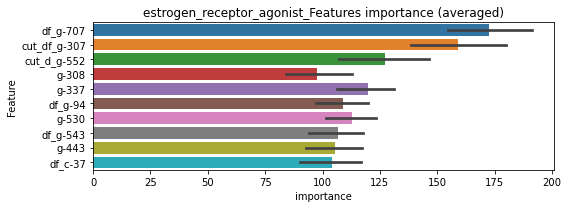

len(train_index) : 2736
len(valid_index) : 913
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2737
len(valid_index) : 912
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00403544	valid_1's binary_logloss: 0.0676809
Training until validation scores don't improve for 30 rounds


len(train_index) : 2737
len(valid_index) : 912
================================= fold 3/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00257157	valid_1's binary_logloss: 0.0663076
Training until validation scores don't improve for 30 rounds


len(train_index) : 2737
len(valid_index) : 912
================================= fold 4/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00198652	valid_1's binary_logloss: 0.050445
Training until validation scores don't improve for 30 rounds


estrogen_receptor_agonist logloss: 0.06416376145768453


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0028437	valid_1's binary_logloss: 0.0722177
neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323619	valid_1's binary_logloss: 0.0165765
[600]	training's binary_logloss: 0.000648242	valid_1's binary_logloss: 0.00983546
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000622676	valid_1's binary_logloss: 0.00973034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332457	valid_1's binary_logloss: 0.0186411
[600]	training's binary_logloss: 0.000660601	valid_1's binary_logloss: 0.0129652
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.0005575	valid_1's binary_logloss: 0.0127665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360355	valid_1's binary_logloss: 0.00946251
[600]	training's binary_logloss: 0.000684076	valid_1's binary_logloss: 0.00434376
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00057207	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0054274, Threshold: 0.1666863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.11668, conf_1:0.21669
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1666863
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_2: 0.2066863


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.0008824	valid_1's binary_logloss: 0.0270412


Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.2466863
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.2866863
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_5: 0.3266863
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_6: 0.3666863
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_7: 0.4066863
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.4466863
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4866863
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_10: 0.5266863
threshold: 0.5266863, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304901	valid_1's binary_logloss: 0.0241133
[600]	training's binary_logloss: 0.000615934	valid_1's binary_logloss: 0.0189163
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000592288	valid_1's binary_logloss: 0.0187615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316426	valid_1's binary_logloss: 0.0123997
[600]	training's binary_logloss: 0.000631464	valid_1's binary_logloss: 0.00669888
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000537456	valid_1's binary_logloss: 0.00646084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316181	valid_1's binary_logloss: 0.00870934
[600]	training's binary_logloss: 0.000640535	valid_1's binary_logloss: 0.00361195
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000567431	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0225485, Threshold: 0.5266863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0090407 Vs.target_rate: 0.00202
Num_p_label: 36.0, conf_0:0.42135, conf_1:0.63202
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.5266863
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_2: 0.5666863
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_3: 0.6066863
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_4: 0.6466863


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00104809	valid_1's binary_logloss: 0.0286471


Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.6866863
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_6: 0.7266863
threshold: 0.7266863, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296626	valid_1's binary_logloss: 0.00958493
[600]	training's binary_logloss: 0.00060909	valid_1's binary_logloss: 0.00521617
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000574037	valid_1's binary_logloss: 0.00512463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029088	valid_1's binary_logloss: 0.0142062
[600]	training's binary_logloss: 0.000600445	valid_1's binary_logloss: 0.00870406
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000528493	valid_1's binary_logloss: 0.00864449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312548	valid_1's binary_logloss: 0.0132266
[600]	training's binary_logloss: 0.00062492	valid_1's binary_logloss: 0.00778914
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000604532	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0217784, Threshold: 0.7266863, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000678727	valid_1's binary_logloss: 0.0209606


Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0062783 Vs.target_rate: 0.00202
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.79935
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_1: 0.7266863
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.7666863
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.8066863
threshold: 0.8066863, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


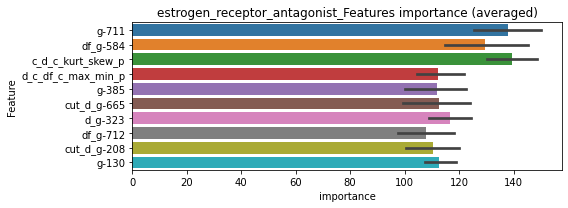

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000810496	valid_1's binary_logloss: 0.00806105
Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000741808	valid_1's binary_logloss: 0.0111596
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000607344	valid_1's binary_logloss: 0.00873851


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


estrogen_receptor_antagonist logloss: 0.01026448964761295


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000795646	valid_1's binary_logloss: 0.0131011
neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215087	valid_1's binary_logloss: 0.0105679
[600]	training's binary_logloss: 0.00048146	valid_1's binary_logloss: 0.00622999
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000448599	valid_1's binary_logloss: 0.00616377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223293	valid_1's binary_logloss: 0.00655237
[600]	training's binary_logloss: 0.000491041	valid_1's binary_logloss: 0.00268691
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000477289	valid_1's binary_logloss: 0.00265069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221369	valid_1's binary_logloss: 0.00692392
[600]	training's binary_logloss: 0.000498225	valid_1's binary_logloss: 0.00393889
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000490227	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0030142, Threshold: 0.0095267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00667, conf_1:0.01238
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0095267
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_2: 0.0495267
threshold: 0.0495267, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202862	valid_1's binary_logloss: 0.00901364
[600]	training's binary_logloss: 0.000467994	valid_1's binary_logloss: 0.00476937
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000436917	valid_1's binary_logloss: 0.0046718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204732	valid_1's binary_logloss: 0.00617197
[600]	training's binary_logloss: 0.000467442	valid_1's binary_logloss: 0.00273514
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000429218	valid_1's binary_logloss: 0.00265255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208259	valid_1's binary_logloss: 0.0059946
[600]	training's binary_logloss: 0.000473399	valid_1's binary_logloss: 0.00335071
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000453494	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0343992, Threshold: 0.0495267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.03962, conf_1:0.05943
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0495267
threshold: 0.0495267, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202862	valid_1's binary_logloss: 0.00901364
[600]	training's binary_logloss: 0.000467994	valid_1's binary_logloss: 0.00476937
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000436917	valid_1's binary_logloss: 0.0046718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204732	valid_1's binary_logloss: 0.00617197
[600]	training's binary_logloss: 0.000467442	valid_1's binary_logloss: 0.00273514
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000429218	valid_1's binary_logloss: 0.00265255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208259	valid_1's binary_logloss: 0.0059946
[600]	training's binary_logloss: 0.000473399	valid_1's binary_logloss: 0.00335071
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000453494	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0343992, Threshold: 0.0495267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.04457, conf_1:0.05448
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0495267
threshold: 0.0495267, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


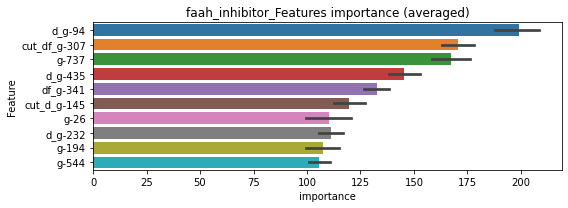

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000449545	valid_1's binary_logloss: 0.0048419


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000460267	valid_1's binary_logloss: 0.00290191


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000447595	valid_1's binary_logloss: 0.00330212
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000448155	valid_1's binary_logloss: 0.00329998


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000467802	valid_1's binary_logloss: 0.00477721


faah_inhibitor logloss: 0.003957075722886639


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107313	valid_1's binary_logloss: 0.00241887
[600]	training's binary_logloss: 0.000325094	valid_1's binary_logloss: 0.00105459
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000325094	valid_1's binary_logloss: 0.00105459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103727	valid_1's binary_logloss: 0.00328527
[600]	training's binary_logloss: 0.000319885	valid_1's binary_logloss: 0.00151934
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00032009	valid_1's binary_logloss: 0.0015187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108029	valid_1's binary_logloss: 0.0016466
[600]	training's binary_logloss: 0.000324991	valid_1's binary_logloss: 0.000579044
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000324542	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0014905, Threshold: 0.0047728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00334, conf_1:0.00620
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0047728
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0447728


[600]	training's binary_logloss: 0.000322258	valid_1's binary_logloss: 0.00425308
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000323703	valid_1's binary_logloss: 0.00424315


threshold: 0.0447728, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101299	valid_1's binary_logloss: 0.00267771
[600]	training's binary_logloss: 0.000313807	valid_1's binary_logloss: 0.0013629
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000315738	valid_1's binary_logloss: 0.00136283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100436	valid_1's binary_logloss: 0.00263382
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00031898	valid_1's binary_logloss: 0.00122864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102799	valid_1's binary_logloss: 0.00147681
[600]	training's binary_logloss: 0.000318097	valid_1's binary_logloss: 0.00050252
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000318097	valid_1's binary_logloss: 0.00050252
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0180029, Threshold: 0.0447728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.03582, conf_1:0.05373
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0447728
threshold: 0.0447728, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.0003301	valid_1's binary_logloss: 0.00406218


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101299	valid_1's binary_logloss: 0.00267771
[600]	training's binary_logloss: 0.000313807	valid_1's binary_logloss: 0.0013629
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000315738	valid_1's binary_logloss: 0.00136283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100436	valid_1's binary_logloss: 0.00263382
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00031898	valid_1's binary_logloss: 0.00122864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102799	valid_1's binary_logloss: 0.00147681
[600]	training's binary_logloss: 0.000318097	valid_1's binary_logloss: 0.00050252
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000318097	valid_1's binary_logloss: 0.00050252
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.0003301	valid_1's binary_logloss: 0.00406218


y_Threshold: 0.0180029, Threshold: 0.0447728, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.04030, conf_1:0.04925
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0447728
threshold: 0.0447728, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


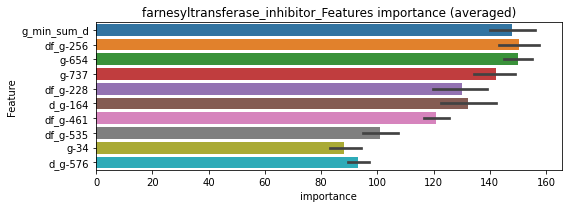

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000320962	valid_1's binary_logloss: 0.00125107


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000313871	valid_1's binary_logloss: 0.00100005
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000313545	valid_1's binary_logloss: 0.000999307


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000318913	valid_1's binary_logloss: 0.000509662


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0014335684404069512


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000383229	valid_1's binary_logloss: 0.00297391
neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140875	valid_1's binary_logloss: 0.00810258
[600]	training's binary_logloss: 0.000379145	valid_1's binary_logloss: 0.00652315
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00038644	valid_1's binary_logloss: 0.00650929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141428	valid_1's binary_logloss: 0.00810029
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000541812	valid_1's binary_logloss: 0.00586328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140138	valid_1's binary_logloss: 0.00281476
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000389951	valid_1's binary_logloss: 0.00100851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142494	valid_1's binary_logloss: 0.00608058


1 / 3 AUC score:1.000
y_Threshold: 0.0023590, Threshold: 0.0111246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00779, conf_1:0.01446
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0111246
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0511246


[600]	training's binary_logloss: 0.000369361	valid_1's binary_logloss: 0.00379988
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00037763	valid_1's binary_logloss: 0.00378677


threshold: 0.0511246, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136216	valid_1's binary_logloss: 0.00781831
[600]	training's binary_logloss: 0.000370282	valid_1's binary_logloss: 0.00612559
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00037716	valid_1's binary_logloss: 0.00610993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135461	valid_1's binary_logloss: 0.00729578
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000545756	valid_1's binary_logloss: 0.00526982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141437	valid_1's binary_logloss: 0.00251184
[600]	training's binary_logloss: 0.000376357	valid_1's binary_logloss: 0.000846944
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000372692	valid_1's binary_logloss: 0.0008425
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000362927	valid_1's binary_logloss: 0.00444378
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000360733	valid_1's binary_logloss: 0.00442882


y_Threshold: 0.0109813, Threshold: 0.0511246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, conf_0:0.04090, conf_1:0.06135
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0511246
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0911246
threshold: 0.0911246, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130722	valid_1's binary_logloss: 0.010963
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000399766	valid_1's binary_logloss: 0.00792268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135319	valid_1's binary_logloss: 0.00255834
[600]	training's binary_logloss: 0.000366129	valid_1's binary_logloss: 0.000915517
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000366129	valid_1's binary_logloss: 0.000915517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013556	valid_1's binary_logloss: 0.00385702
[600]	training's binary_logloss: 0.000370665	valid_1's binary_logloss: 0.0023982
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000370665	valid_1's binary_logloss: 0.0023982
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0304310, Threshold: 0.0911246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, conf_0:0.08201, conf_1:0.10024
threshold: 0.0911246, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


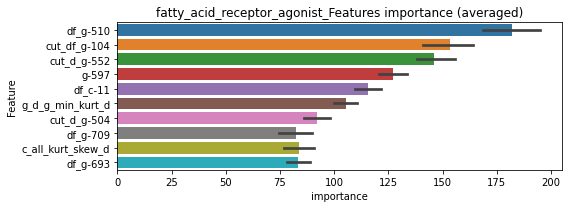

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952


Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000412655	valid_1's binary_logloss: 0.00657268


================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000380085	valid_1's binary_logloss: 0.000933821


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000377399	valid_1's binary_logloss: 0.00203001


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000372026	valid_1's binary_logloss: 0.00308584


fatty_acid_receptor_agonist logloss: 0.003156857492673059


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284
target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414067	valid_1's binary_logloss: 0.0197187
[600]	training's binary_logloss: 0.000721142	valid_1's binary_logloss: 0.0103376
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00055437	valid_1's binary_logloss: 0.00983637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425632	valid_1's binary_logloss: 0.013281
[600]	training's binary_logloss: 0.000735398	valid_1's binary_logloss: 0.00485433
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000569964	valid_1's binary_logloss: 0.004358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445659	valid_1's binary_logloss: 0.00950814
[600]	training's binary_logloss: 0.000760923	valid_1's binary_logloss: 0.00275066
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000564715	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0049438, Threshold: 0.0168952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, conf_0:0.01183, conf_1:0.02196
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0168952
Num_p_label: 15.0, Expected: 8.4, Adj_threshold_2: 0.0568952
threshold: 0.0568952, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038925	valid_1's binary_logloss: 0.0153728
[600]	training's binary_logloss: 0.000703943	valid_1's binary_logloss: 0.00932529
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000644598	valid_1's binary_logloss: 0.00907609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382946	valid_1's binary_logloss: 0.0138138
[600]	training's binary_logloss: 0.000698298	valid_1's binary_logloss: 0.00618319
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000545652	valid_1's binary_logloss: 0.0055742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403997	valid_1's binary_logloss: 0.0109211
[600]	training's binary_logloss: 0.000723934	valid_1's binary_logloss: 0.00349801
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000572085	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0236835, Threshold: 0.0568952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0057760 Vs.target_rate: 0.00210
Num_p_label: 23.0, conf_0:0.04552, conf_1:0.06827
Num_p_label: 23.0, Expected: 8.4, Adj_threshold_1: 0.0568952
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_2: 0.0968952
threshold: 0.0968952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379175	valid_1's binary_logloss: 0.0146978
[600]	training's binary_logloss: 0.00069246	valid_1's binary_logloss: 0.00733294
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000550396	valid_1's binary_logloss: 0.00695951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373542	valid_1's binary_logloss: 0.01817
[600]	training's binary_logloss: 0.000688934	valid_1's binary_logloss: 0.00931394
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000650912	valid_1's binary_logloss: 0.0090689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036385	valid_1's binary_logloss: 0.016985
[600]	training's binary_logloss: 0.000689303	valid_1's binary_logloss: 0.00805549
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000550049	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0424992, Threshold: 0.0968952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00210
Num_p_label: 15.0, conf_0:0.08721, conf_1:0.10658
Num_p_label: 15.0, Expected: 8.4, Adj_threshold_1: 0.0968952
threshold: 0.0968952, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


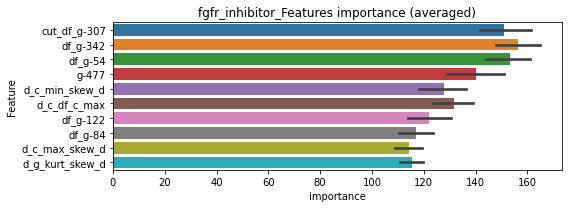

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000580137	valid_1's binary_logloss: 0.00742638


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000582825	valid_1's binary_logloss: 0.00897356


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000584673	valid_1's binary_logloss: 0.00770253


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563873	valid_1's binary_logloss: 0.0068515
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.00055267	valid_1's binary_logloss: 0.00682158


fgfr_inhibitor logloss: 0.007732117900721043


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258
target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363014	valid_1's binary_logloss: 0.261852
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0249804	valid_1's binary_logloss: 0.259067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369008	valid_1's binary_logloss: 0.25088
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0281467	valid_1's binary_logloss: 0.248495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0395632	valid_1's binary_logloss: 0.255079
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.035932	valid_1's binary_logloss: 0.254414
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423968	valid_1's binary_logloss: 0.216574
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0161062	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.893
y_Threshold: 0.0793188, Threshold: 0.6647514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 425 → Positive_corect_labels: 504/3484
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, conf_0:0.46533, conf_1:0.80000
threshold: 0.6647514, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 504.0/3484, y_label_rate: 0.1446613
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175324	valid_1's binary_logloss: 0.172256
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0105913	valid_1's binary_logloss: 0.169241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017956	valid_1's binary_logloss: 0.131408
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00408518	valid_1's binary_logloss: 0.118284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168305	valid_1's binary_logloss: 0.130053
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00355996	valid_1's binary_logloss: 0.112743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181559	valid_1's binary_logloss: 0.118721
[600]	training's binary_logloss: 0.00280893	valid_1's binary_logloss: 0.101785
Early stopping, best iter

2 / 3 AUC score:0.981
y_Threshold: 0.0690325, Threshold: 0.6647514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 457.0/3390
p_label_rate: 0.0163235 Vs.target_rate: 0.01172
Num_p_label: 65.0, conf_0:0.50000, conf_1:0.79770
threshold: 0.6647514, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 457.0/3390, y_label_rate: 0.1348083
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127761	valid_1's binary_logloss: 0.108627
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00299213	valid_1's binary_logloss: 0.0946487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124274	valid_1's binary_logloss: 0.132114
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00401002	valid_1's binary_logloss: 0.121967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131171	valid_1's binary_logloss: 0.103714
[600]	training's binary_logloss: 0.00213968	valid_1's binary_logloss: 0.085288
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.0014178	valid_1's binary_logloss: 0.0837351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127411	valid_1's binary_logloss: 0.136731


3 / 3 AUC score:0.992
y_Threshold: 0.0565413, Threshold: 0.6647514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 425.0/3326


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00359331	valid_1's binary_logloss: 0.12521


p_label_rate: 0.0188348 Vs.target_rate: 0.01172
Num_p_label: 75.0, conf_0:0.50000, conf_1:0.73123
Num_p_label: 75.0, Expected: 46.7, Adj_threshold_1: 0.6647514
Num_p_label: 69.0, Expected: 46.7, Adj_threshold_2: 0.7047514
threshold: 0.7047514, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 425.0/3326, y_label_rate: 0.1277811


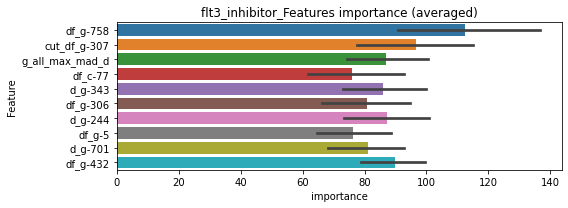

len(train_index) : 2494
len(valid_index) : 832
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2494
len(valid_index) : 832
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00570835	valid_1's binary_logloss: 0.121772
Training until validation scores don't improve for 30 rounds


len(train_index) : 2495
len(valid_index) : 831
================================= fold 3/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00490716	valid_1's binary_logloss: 0.108609
Training until validation scores don't improve for 30 rounds


len(train_index) : 2495
len(valid_index) : 831
================================= fold 4/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00849331	valid_1's binary_logloss: 0.113592
Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.11263193039548107


Early stopping, best iteration is:
[212]	training's binary_logloss: 0.00659759	valid_1's binary_logloss: 0.106549
neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104538	valid_1's binary_logloss: 0.00218614
[600]	training's binary_logloss: 0.000322206	valid_1's binary_logloss: 0.000945461
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000323201	valid_1's binary_logloss: 0.000944063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103659	valid_1's binary_logloss: 0.00356274
[600]	training's binary_logloss: 0.000321873	valid_1's binary_logloss: 0.0018164
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000321884	valid_1's binary_logloss: 0.00181637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106853	valid_1's binary_logloss: 0.00221267
[600]	training's binary_logloss: 0.000322639	valid_1's binary_logloss: 0.000992946
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000320025	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0015148, Threshold: 0.0062151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00435, conf_1:0.00808
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0062151


[600]	training's binary_logloss: 0.000321259	valid_1's binary_logloss: 0.00109048
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000321656	valid_1's binary_logloss: 0.00108996


Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0462151
threshold: 0.0462151, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000988538	valid_1's binary_logloss: 0.00223761
[600]	training's binary_logloss: 0.000315543	valid_1's binary_logloss: 0.00104686
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000315885	valid_1's binary_logloss: 0.00104607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000975918	valid_1's binary_logloss: 0.00290164
[600]	training's binary_logloss: 0.000313013	valid_1's binary_logloss: 0.00146715
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00030844	valid_1's binary_logloss: 0.00146067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000991903	valid_1's binary_logloss: 0.001662
[600]	training's binary_logloss: 0.000316047	valid_1's binary_logloss: 0.000644912
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000312373	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1089469, Threshold: 0.0462151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, conf_0:0.03697, conf_1:0.05546
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0462151


[600]	training's binary_logloss: 0.000309947	valid_1's binary_logloss: 0.00107903
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000310287	valid_1's binary_logloss: 0.00107762


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0862151
threshold: 0.0862151, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000988538	valid_1's binary_logloss: 0.00223761
[600]	training's binary_logloss: 0.000315543	valid_1's binary_logloss: 0.00104686
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000315885	valid_1's binary_logloss: 0.00104607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000975918	valid_1's binary_logloss: 0.00290164
[600]	training's binary_logloss: 0.000313013	valid_1's binary_logloss: 0.00146715
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00030844	valid_1's binary_logloss: 0.00146067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000991903	valid_1's binary_logloss: 0.001662
[600]	training's binary_logloss: 0.000316047	valid_1's binary_logloss: 0.000644912
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000312373	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1089469, Threshold: 0.0862151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076


[600]	training's binary_logloss: 0.000309947	valid_1's binary_logloss: 0.00107903
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000310287	valid_1's binary_logloss: 0.00107762


Num_p_label: 6.0, conf_0:0.07759, conf_1:0.09484
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0862151
threshold: 0.0862151, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


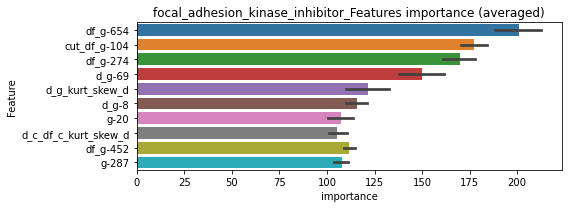

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031664	valid_1's binary_logloss: 0.00093265
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.00031664	valid_1's binary_logloss: 0.00093265


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318351	valid_1's binary_logloss: 0.00112419
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000315232	valid_1's binary_logloss: 0.00111781


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317733	valid_1's binary_logloss: 0.000649841
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000317733	valid_1's binary_logloss: 0.000649841


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315115	valid_1's binary_logloss: 0.000728174
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000315115	valid_1's binary_logloss: 0.000728174


focal_adhesion_kinase_inhibitor logloss: 0.0008571389460500154


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108142	valid_1's binary_logloss: 0.00223504
[600]	training's binary_logloss: 0.000330252	valid_1's binary_logloss: 0.000932688
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000330252	valid_1's binary_logloss: 0.000932688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010878	valid_1's binary_logloss: 0.00304706
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000339794	valid_1's binary_logloss: 0.00138067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107394	valid_1's binary_logloss: 0.0020254
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000333429	valid_1's binary_logloss: 0.000785931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106199	valid_1's binary_logloss: 0.0040634

1 / 3 AUC score:1.000
y_Threshold: 0.0016724, Threshold: 0.0059786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00419, conf_1:0.00777
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0059786
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0459786
threshold: 0.0459786, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000423307	valid_1's binary_logloss: 0.00302356


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102235	valid_1's binary_logloss: 0.00257365
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000323564	valid_1's binary_logloss: 0.00121152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102033	valid_1's binary_logloss: 0.00296618
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000320144	valid_1's binary_logloss: 0.00138804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101515	valid_1's binary_logloss: 0.00162916
[600]	training's binary_logloss: 0.000319557	valid_1's binary_logloss: 0.000620729
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319557	valid_1's binary_logloss: 0.000620729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100731	valid_1's binary_logloss: 0.003591

2 / 3 AUC score:1.000
y_Threshold: 0.0343387, Threshold: 0.0459786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03678, conf_1:0.05517
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0459786
threshold: 0.0459786, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000329572	valid_1's binary_logloss: 0.00244288


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102235	valid_1's binary_logloss: 0.00257365
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000323564	valid_1's binary_logloss: 0.00121152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102033	valid_1's binary_logloss: 0.00296618
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000320144	valid_1's binary_logloss: 0.00138804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101515	valid_1's binary_logloss: 0.00162916
[600]	training's binary_logloss: 0.000319557	valid_1's binary_logloss: 0.000620729
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000319557	valid_1's binary_logloss: 0.000620729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100731	valid_1's binary_logloss: 0.003591

3 / 3 AUC score:1.000
y_Threshold: 0.0343387, Threshold: 0.0459786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.04138, conf_1:0.05058
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0459786
threshold: 0.0459786, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000329572	valid_1's binary_logloss: 0.00244288


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


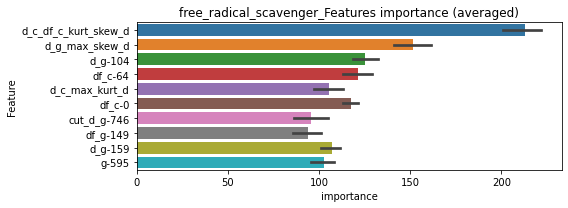

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000327763	valid_1's binary_logloss: 0.000808898


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000325477	valid_1's binary_logloss: 0.000830592


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000331611	valid_1's binary_logloss: 0.000737413


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000338553	valid_1's binary_logloss: 0.00286205


free_radical_scavenger logloss: 0.0013096078893293506


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152049	valid_1's binary_logloss: 0.00364245
[600]	training's binary_logloss: 0.000395026	valid_1's binary_logloss: 0.00154994
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000395026	valid_1's binary_logloss: 0.00154994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137581	valid_1's binary_logloss: 0.0105786
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000392527	valid_1's binary_logloss: 0.00757703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154305	valid_1's binary_logloss: 0.00300942
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000406935	valid_1's binary_logloss: 0.00112848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014671	valid_1's binary_logloss: 0.00409405
[

1 / 3 AUC score:1.000
y_Threshold: 0.0021086, Threshold: 0.0062384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00437, conf_1:0.00811
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0062384
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_2: 0.0462384
threshold: 0.0462384, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140476	valid_1's binary_logloss: 0.00342311
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000402129	valid_1's binary_logloss: 0.00146666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133036	valid_1's binary_logloss: 0.0101734
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000412521	valid_1's binary_logloss: 0.00719475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146813	valid_1's binary_logloss: 0.00272716
[600]	training's binary_logloss: 0.000388337	valid_1's binary_logloss: 0.000961677
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00038692	valid_1's binary_logloss: 0.000959975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014581	valid_1's binary_logloss: 0.00446934


2 / 3 AUC score:1.000
y_Threshold: 0.0241658, Threshold: 0.0462384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, conf_0:0.03699, conf_1:0.05549
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_1: 0.0462384
Num_p_label: 4.0, Expected: 3.8, Adj_threshold_2: 0.0862384


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000401578	valid_1's binary_logloss: 0.00249828


threshold: 0.0862384, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140476	valid_1's binary_logloss: 0.00342311
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000402129	valid_1's binary_logloss: 0.00146666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133036	valid_1's binary_logloss: 0.0101734
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000412521	valid_1's binary_logloss: 0.00719475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146813	valid_1's binary_logloss: 0.00272716
[600]	training's binary_logloss: 0.000388337	valid_1's binary_logloss: 0.000961677
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00038692	valid_1's binary_logloss: 0.000959975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014581	valid_1's binary_logloss: 0.00446934


3 / 3 AUC score:1.000
y_Threshold: 0.0241658, Threshold: 0.0862384, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00097
Num_p_label: 4.0, conf_0:0.07761, conf_1:0.09486


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000401578	valid_1's binary_logloss: 0.00249828


threshold: 0.0862384, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


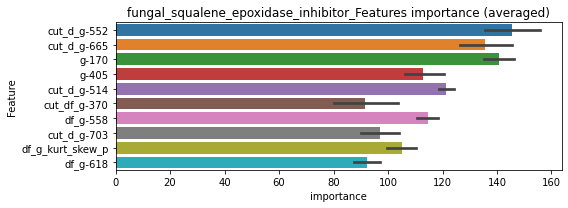

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000399026	valid_1's binary_logloss: 0.00141131


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000387465	valid_1's binary_logloss: 0.00553109


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000393728	valid_1's binary_logloss: 0.000926752


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000406398	valid_1's binary_logloss: 0.00177176


fungal_squalene_epoxidase_inhibitor logloss: 0.0024117670290816715


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00849064	valid_1's binary_logloss: 0.085255
[600]	training's binary_logloss: 0.0013911	valid_1's binary_logloss: 0.0747013
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00144221	valid_1's binary_logloss: 0.0744387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0089432	valid_1's binary_logloss: 0.0555547
[600]	training's binary_logloss: 0.00147363	valid_1's binary_logloss: 0.0437053
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00133566	valid_1's binary_logloss: 0.0434969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00938262	valid_1's binary_logloss: 0.0414079
[600]	training's binary_logloss: 0.00151793	valid_1's binary_logloss: 0.0270257
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00127702	valid_1's binary_logloss: 0.026

1 / 3 AUC score:0.998
y_Threshold: 0.0126698, Threshold: 0.1067789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 145 → Positive_corect_labels: 647/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07475, conf_1:0.13881
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1067789
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_2: 0.1467789
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_3: 0.1867789
threshold: 0.1867789, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 647.0/3780, y_label_rate: 0.1711640
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791467	valid_1's binary_logloss: 0.0465489
[600]	training's binary_logloss: 0.00132574	valid_1's binary_logloss: 0.0314449
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00087292	valid_1's binary_logloss: 0.029357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750783	valid_1's binary_logloss: 0.0865385
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00432543	valid_1's binary_logloss: 0.0824548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779852	valid_1's binary_logloss: 0.0620866
[600]	training's binary_logloss: 0.00131891	valid_1's binary_logloss: 0.0525731
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00128242	valid_1's binary_logloss: 0.0524281
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.998
y_Threshold: 0.0411595, Threshold: 0.1867789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 629.0/3744
p_label_rate: 0.0153189 Vs.target_rate: 0.00445
Num_p_label: 61.0, conf_0:0.14942, conf_1:0.22413
Num_p_label: 61.0, Expected: 17.7, Adj_threshold_1: 0.1867789
Num_p_label: 52.0, Expected: 17.7, Adj_threshold_2: 0.2267789
Num_p_label: 48.0, Expected: 17.7, Adj_threshold_3: 0.2667789
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_4: 0.3067789
Num_p_label: 36.0, Expected: 17.7, Adj_threshold_5: 0.3467789
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_6: 0.3867789
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_7: 0.4267789
threshold: 0.4267789, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 629.0/3744, y_label_rate: 0.1680021
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671789	valid_1's binary_logloss: 0.0476501
[600]	training's binary_logloss: 0.00116606	valid_1's binary_logloss: 0.0348025
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000788112	valid_1's binary_logloss: 0.0334855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068128	valid_1's binary_logloss: 0.0466278
[600]	training's binary_logloss: 0.00120316	valid_1's binary_logloss: 0.0335329
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000876219	valid_1's binary_logloss: 0.0321066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00703748	valid_1's binary_logloss: 0.0360204
[600]	training's binary_logloss: 0.00120989	valid_1's binary_logloss: 0.0253361
[900]	training's binary_logloss: 0.000706988	valid_1's binary_logloss: 0.0237212
Early stopping, best iter

3 / 3 AUC score:1.000
y_Threshold: 0.0561063, Threshold: 0.4267789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 623.0/3732
p_label_rate: 0.0087896 Vs.target_rate: 0.00445
Num_p_label: 35.0, conf_0:0.38410, conf_1:0.46946
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_1: 0.4267789
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.4667789
Num_p_label: 32.0, Expected: 17.7, Adj_threshold_3: 0.5067789
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_4: 0.5467789
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_5: 0.5867789
threshold: 0.5867789, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 623.0/3732, y_label_rate: 0.1669346


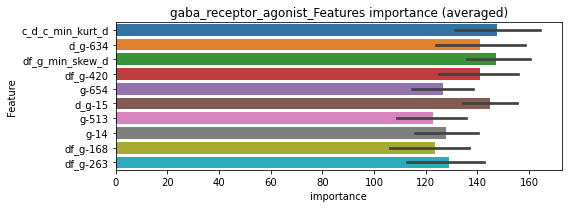

len(train_index) : 2799
len(valid_index) : 933
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 2/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00159418	valid_1's binary_logloss: 0.0421655
Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00119655	valid_1's binary_logloss: 0.0252998


================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 4/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00139733	valid_1's binary_logloss: 0.0297871
Training until validation scores don't improve for 30 rounds


gaba_receptor_agonist logloss: 0.031530076737577774


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00121309	valid_1's binary_logloss: 0.028868
neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266
target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165682	valid_1's binary_logloss: 0.135522
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00325519	valid_1's binary_logloss: 0.122735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166375	valid_1's binary_logloss: 0.120072
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00425942	valid_1's binary_logloss: 0.110291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175992	valid_1's binary_logloss: 0.126219
[600]	training's binary_logloss: 0.00260645	valid_1's binary_logloss: 0.114008
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.0028434	valid_1's binary_logloss: 0.11351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166408	valid_1's binary_logloss: 0.128535
Early stopping, best iter

1 / 3 AUC score:0.982
y_Threshold: 0.0294828, Threshold: 0.0873688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 217 → Positive_corect_labels: 610/3702
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, conf_0:0.06116, conf_1:0.11358
threshold: 0.0873688, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 610.0/3702, y_label_rate: 0.1647758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124662	valid_1's binary_logloss: 0.0923677
[600]	training's binary_logloss: 0.00198226	valid_1's binary_logloss: 0.0784664
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00165666	valid_1's binary_logloss: 0.078278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012213	valid_1's binary_logloss: 0.0954508
[600]	training's binary_logloss: 0.00194693	valid_1's binary_logloss: 0.0810033
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00216181	valid_1's binary_logloss: 0.0806248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131557	valid_1's binary_logloss: 0.0713457
[600]	training's binary_logloss: 0.00206759	valid_1's binary_logloss: 0.05277
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00109241	valid_1's binary_logloss: 0.0500432

2 / 3 AUC score:0.997
y_Threshold: 0.0367480, Threshold: 0.0873688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 590.0/3662
p_label_rate: 0.0120542 Vs.target_rate: 0.00693
Num_p_label: 48.0, conf_0:0.06990, conf_1:0.10484
Num_p_label: 48.0, Expected: 27.6, Adj_threshold_1: 0.0873688
Num_p_label: 33.0, Expected: 27.6, Adj_threshold_2: 0.1273688
threshold: 0.1273688, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 590.0/3662, y_label_rate: 0.1611141
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109087	valid_1's binary_logloss: 0.0929927
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00212425	valid_1's binary_logloss: 0.0833893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106946	valid_1's binary_logloss: 0.0865797
[600]	training's binary_logloss: 0.00174305	valid_1's binary_logloss: 0.0714087
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00190471	valid_1's binary_logloss: 0.0713846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119895	valid_1's binary_logloss: 0.0739173
[600]	training's binary_logloss: 0.0018524	valid_1's binary_logloss: 0.0580797
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00125166	valid_1's binary_logloss: 0.0568128
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.999
y_Threshold: 0.0377763, Threshold: 0.1273688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 575.0/3632
p_label_rate: 0.0097941 Vs.target_rate: 0.00693
Num_p_label: 39.0, conf_0:0.11463, conf_1:0.14011
threshold: 0.1273688, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 575.0/3632, y_label_rate: 0.1583150


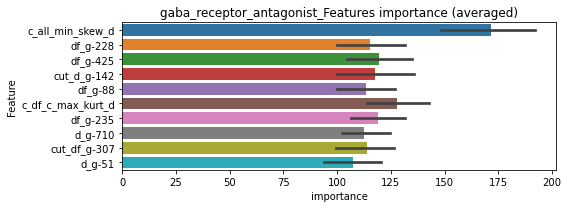

len(train_index) : 2724
len(valid_index) : 908
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2724
len(valid_index) : 908
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00189716	valid_1's binary_logloss: 0.0796519
Training until validation scores don't improve for 30 rounds


len(train_index) : 2724
len(valid_index) : 908
================================= fold 3/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00259425	valid_1's binary_logloss: 0.083972
Training until validation scores don't improve for 30 rounds


len(train_index) : 2724
len(valid_index) : 908
================================= fold 4/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00283525	valid_1's binary_logloss: 0.0486024
Training until validation scores don't improve for 30 rounds


gaba_receptor_antagonist logloss: 0.07198272129839087


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00331457	valid_1's binary_logloss: 0.0757046
neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370191	valid_1's binary_logloss: 0.0352204
[600]	training's binary_logloss: 0.000714908	valid_1's binary_logloss: 0.0275812
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000566962	valid_1's binary_logloss: 0.0269323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004242	valid_1's binary_logloss: 0.0210067
[600]	training's binary_logloss: 0.000759141	valid_1's binary_logloss: 0.0124653
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000568168	valid_1's binary_logloss: 0.0117896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431598	valid_1's binary_logloss: 0.0134781
[600]	training's binary_logloss: 0.000783942	valid_1's binary_logloss: 0.00607682
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000569384	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0056241, Threshold: 0.0177917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01245, conf_1:0.02313
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0177917
Num_p_label: 1.0, Expected: 9.4, Adj_threshold_2: 0.0577917


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0013974	valid_1's binary_logloss: 0.0234772


threshold: 0.0577917, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371828	valid_1's binary_logloss: 0.0338947
[600]	training's binary_logloss: 0.000702868	valid_1's binary_logloss: 0.025425
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000602139	valid_1's binary_logloss: 0.0248834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392487	valid_1's binary_logloss: 0.0186867
[600]	training's binary_logloss: 0.00073898	valid_1's binary_logloss: 0.0107634
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000564175	valid_1's binary_logloss: 0.00993022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407969	valid_1's binary_logloss: 0.0117405
[600]	training's binary_logloss: 0.000760965	valid_1's binary_logloss: 0.00539697
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000581014	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0346202, Threshold: 0.0577917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0050226 Vs.target_rate: 0.00235
Num_p_label: 20.0, conf_0:0.04623, conf_1:0.06935
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_1: 0.0577917
threshold: 0.0577917, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377885	valid_1's binary_logloss: 0.0398949
[600]	training's binary_logloss: 0.000707418	valid_1's binary_logloss: 0.0330581
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00072443	valid_1's binary_logloss: 0.0328977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379914	valid_1's binary_logloss: 0.0189544
[600]	training's binary_logloss: 0.000721598	valid_1's binary_logloss: 0.0117191
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000556688	valid_1's binary_logloss: 0.0110943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366242	valid_1's binary_logloss: 0.0278237
[600]	training's binary_logloss: 0.000713144	valid_1's binary_logloss: 0.021236
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000653763	valid_1's binary_logloss

3 / 3 AUC score:0.999
y_Threshold: 0.0207319, Threshold: 0.0577917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0037670 Vs.target_rate: 0.00235
Num_p_label: 15.0, conf_0:0.05201, conf_1:0.06357
Num_p_label: 15.0, Expected: 9.4, Adj_threshold_1: 0.0577917
threshold: 0.0577917, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


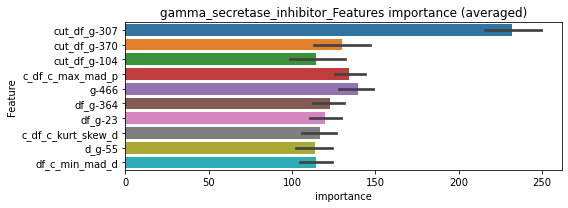

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000659394	valid_1's binary_logloss: 0.0121763


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000650793	valid_1's binary_logloss: 0.013016


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000676047	valid_1's binary_logloss: 0.0227991


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


gamma_secretase_inhibitor logloss: 0.01597543727630459


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000924675	valid_1's binary_logloss: 0.0159175
neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248
target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0378705	valid_1's binary_logloss: 0.234759
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.012986	valid_1's binary_logloss: 0.227457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0356011	valid_1's binary_logloss: 0.237354
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0181355	valid_1's binary_logloss: 0.232932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0388309	valid_1's binary_logloss: 0.203454
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00962125	valid_1's binary_logloss: 0.189761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355184	valid_1's binary_logloss: 0.237612


1 / 3 AUC score:0.921
y_Threshold: 0.0672718, Threshold: 0.3002314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 373 → Positive_corect_labels: 528/3524
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, conf_0:0.21016, conf_1:0.39030
threshold: 0.3002314, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0215613	valid_1's binary_logloss: 0.23068


positive_y_label: 528.0/3524, y_label_rate: 0.1498297
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197446	valid_1's binary_logloss: 0.145219
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.0061714	valid_1's binary_logloss: 0.130288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202939	valid_1's binary_logloss: 0.136976
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00365008	valid_1's binary_logloss: 0.118491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197252	valid_1's binary_logloss: 0.137894
[600]	training's binary_logloss: 0.00300468	valid_1's binary_logloss: 0.117204
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00274663	valid_1's binary_logloss: 0.11659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213994	valid_1's binary_logloss: 0.134887
[600]	training's binary_l

2 / 3 AUC score:0.982
y_Threshold: 0.0589760, Threshold: 0.3002314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 485.0/3438
p_label_rate: 0.0198393 Vs.target_rate: 0.01117
Num_p_label: 79.0, conf_0:0.24019, conf_1:0.36028
Num_p_label: 79.0, Expected: 44.5, Adj_threshold_1: 0.3002314
Num_p_label: 71.0, Expected: 44.5, Adj_threshold_2: 0.3402314
Num_p_label: 61.0, Expected: 44.5, Adj_threshold_3: 0.3802314
threshold: 0.3802314, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 485.0/3438, y_label_rate: 0.1410704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155432	valid_1's binary_logloss: 0.134183
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00349872	valid_1's binary_logloss: 0.117425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156381	valid_1's binary_logloss: 0.110147
[600]	training's binary_logloss: 0.00248365	valid_1's binary_logloss: 0.0936789
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00163295	valid_1's binary_logloss: 0.0921884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148971	valid_1's binary_logloss: 0.13783
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00617957	valid_1's binary_logloss: 0.128266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014883	valid_1's binary_logloss: 0.166811


3 / 3 AUC score:0.986
y_Threshold: 0.0567053, Threshold: 0.3802314, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00509646	valid_1's binary_logloss: 0.160327


Remove_noisy_data: 92 → Positive_corect_labels: 439.0/3346
p_label_rate: 0.0150678 Vs.target_rate: 0.01117
Num_p_label: 60.0, conf_0:0.34221, conf_1:0.41825
threshold: 0.3802314, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 439.0/3346, y_label_rate: 0.1312014


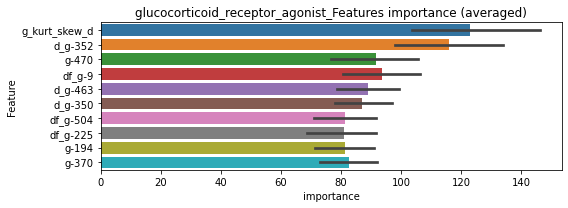

len(train_index) : 2509
len(valid_index) : 837
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2509
len(valid_index) : 837
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00445064	valid_1's binary_logloss: 0.123901
Training until validation scores don't improve for 30 rounds


len(train_index) : 2510
len(valid_index) : 836
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00311787	valid_1's binary_logloss: 0.114543
Training until validation scores don't improve for 30 rounds


len(train_index) : 2510
len(valid_index) : 836
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00309605	valid_1's binary_logloss: 0.0868009
Training until validation scores don't improve for 30 rounds


glucocorticoid_receptor_agonist logloss: 0.11007613011581686


Early stopping, best iteration is:
[190]	training's binary_logloss: 0.0083041	valid_1's binary_logloss: 0.115038
neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285
target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000763315	valid_1's binary_logloss: 0.00212806
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000283473	valid_1's binary_logloss: 0.0010802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768409	valid_1's binary_logloss: 0.00193495
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000285853	valid_1's binary_logloss: 0.000947433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768962	valid_1's binary_logloss: 0.00124286
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000297449	valid_1's binary_logloss: 0.000563543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000770033	valid_1's binary_logloss: 0.00120232


1 / 3 AUC score:1.000
y_Threshold: 0.0010614, Threshold: 0.0033694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, conf_0:0.00236, conf_1:0.00438
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0033694
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_2: 0.0433694
threshold: 0.0433694, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00029291	valid_1's binary_logloss: 0.000543317


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000712616	valid_1's binary_logloss: 0.00209147
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000275879	valid_1's binary_logloss: 0.00116366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000717961	valid_1's binary_logloss: 0.00227607
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000282216	valid_1's binary_logloss: 0.00129768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000722538	valid_1's binary_logloss: 0.000949845
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000286027	valid_1's binary_logloss: 0.000397964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000725601	valid_1's binary_logloss: 0.00119061


2 / 3 AUC score:1.000
y_Threshold: 0.0933530, Threshold: 0.0433694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, conf_0:0.03470, conf_1:0.05204
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_1: 0.0433694
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_2: 0.0833694
threshold: 0.0833694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000278371	valid_1's binary_logloss: 0.000543246


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000712616	valid_1's binary_logloss: 0.00209147
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000275879	valid_1's binary_logloss: 0.00116366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000717961	valid_1's binary_logloss: 0.00227607
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000282216	valid_1's binary_logloss: 0.00129768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000722538	valid_1's binary_logloss: 0.000949845
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000286027	valid_1's binary_logloss: 0.000397964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000725601	valid_1's binary_logloss: 0.00119061


3 / 3 AUC score:1.000
y_Threshold: 0.0933530, Threshold: 0.0833694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, conf_0:0.07503, conf_1:0.09171
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0833694
threshold: 0.0833694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000278371	valid_1's binary_logloss: 0.000543246


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


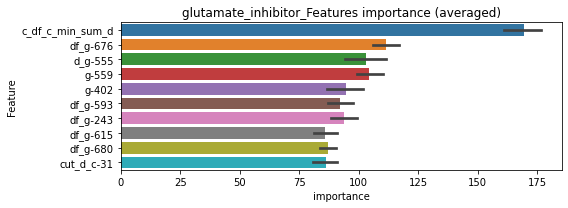

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000279996	valid_1's binary_logloss: 0.000878123
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000283101	valid_1's binary_logloss: 0.000862882
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000288533	valid_1's binary_logloss: 0.000410556
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.0007044305835807947


Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000289899	valid_1's binary_logloss: 0.000665793
neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00609508	valid_1's binary_logloss: 0.0444159
[600]	training's binary_logloss: 0.000984802	valid_1's binary_logloss: 0.0329526
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000869644	valid_1's binary_logloss: 0.0324957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580629	valid_1's binary_logloss: 0.0411423
[600]	training's binary_logloss: 0.000999054	valid_1's binary_logloss: 0.0315931
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000710468	valid_1's binary_logloss: 0.0306754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067022	valid_1's binary_logloss: 0.0218154
[600]	training's binary_logloss: 0.00106988	valid_1's binary_logloss: 0.0119903
[900]	training's binary_logloss: 0.000644367	valid_1's binary_logloss: 0.0107744
Early stopping, best it

1 / 3 AUC score:0.999
y_Threshold: 0.0069729, Threshold: 0.1741028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.12187, conf_1:0.22633
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.1741028
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_2: 0.2141028
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_3: 0.2541028
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_4: 0.2941028
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_5: 0.3341028
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_6: 0.3741028
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_7: 0.4141028
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_8: 0.4541028
threshold: 0.4541028, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545334	valid_1's binary_logloss: 0.0367329
[600]	training's binary_logloss: 0.00092856	valid_1's binary_logloss: 0.0268104
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000705275	valid_1's binary_logloss: 0.0263884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555333	valid_1's binary_logloss: 0.0364173
[600]	training's binary_logloss: 0.000955673	valid_1's binary_logloss: 0.0258029
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000679592	valid_1's binary_logloss: 0.0249929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547216	valid_1's binary_logloss: 0.0361618
[600]	training's binary_logloss: 0.000944814	valid_1's binary_logloss: 0.0255264
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000743586	valid_1's binary_loglos

2 / 3 AUC score:0.999
y_Threshold: 0.0455476, Threshold: 0.4541028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0143144 Vs.target_rate: 0.00311
Num_p_label: 57.0, conf_0:0.36328, conf_1:0.54492
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_1: 0.4541028
Num_p_label: 49.0, Expected: 12.4, Adj_threshold_2: 0.4941028
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_3: 0.5341028
Num_p_label: 42.0, Expected: 12.4, Adj_threshold_4: 0.5741028
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_5: 0.6141028
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_6: 0.6541028
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_7: 0.6941028
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_8: 0.7341028
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_9: 0.7741028
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_10: 0.8141028
threshold: 0.8141028, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3787, y_label_rate: 0.1705836


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0049631	valid_1's binary_logloss: 0.0327348
[600]	training's binary_logloss: 0.000886461	valid_1's binary_logloss: 0.023182
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000655202	valid_1's binary_logloss: 0.0222628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509644	valid_1's binary_logloss: 0.0321777
[600]	training's binary_logloss: 0.000882976	valid_1's binary_logloss: 0.0206166
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000615563	valid_1's binary_logloss: 0.0194234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534261	valid_1's binary_logloss: 0.0405147
[600]	training's binary_logloss: 0.000899159	valid_1's binary_logloss: 0.0305734
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000615827	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0394427, Threshold: 0.8141028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3777
p_label_rate: 0.0065294 Vs.target_rate: 0.00311
Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_1: 0.8141028
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.8541028
threshold: 0.8541028, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3777, y_label_rate: 0.1697114


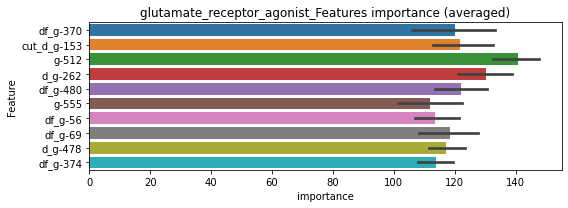

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000837956	valid_1's binary_logloss: 0.0240377


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000788442	valid_1's binary_logloss: 0.0219098


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000996858	valid_1's binary_logloss: 0.0179834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000664182	valid_1's binary_logloss: 0.0119054


glutamate_receptor_agonist logloss: 0.018960412569449112


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235
target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0616611	valid_1's binary_logloss: 0.343648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0489445	valid_1's binary_logloss: 0.321906
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.0509366	valid_1's binary_logloss: 0.321049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0632967	valid_1's binary_logloss: 0.330882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491097	valid_1's binary_logloss: 0.296113


1 / 3 AUC score:0.813
y_Threshold: 0.1137758, Threshold: 0.4015388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 586 → Positive_corect_labels: 419/3296
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, conf_0:0.28108, conf_1:0.52200
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.4015388
Num_p_label: 49.0, Expected: 61.4, Adj_threshold_2: 0.3715388
threshold: 0.3715388, positive_p_label: 49.0/3982, p_label_rate: 0.0123054


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.044025	valid_1's binary_logloss: 0.293473


positive_y_label: 419.0/3296, y_label_rate: 0.1271238
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162354	valid_1's binary_logloss: 0.178049
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0182785	valid_1's binary_logloss: 0.177602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169319	valid_1's binary_logloss: 0.169465
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00967315	valid_1's binary_logloss: 0.164263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164937	valid_1's binary_logloss: 0.155013
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00490513	valid_1's binary_logloss: 0.148064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164069	valid_1's binary_logloss: 0.139008
[600]	training's binary_logloss: 0.00267344	valid_1's binary_logloss: 0.119567
Early stopping, best ite

2 / 3 AUC score:0.967
y_Threshold: 0.0692112, Threshold: 0.3715388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 366.0/3190
p_label_rate: 0.0205927 Vs.target_rate: 0.01541
Num_p_label: 82.0, conf_0:0.29723, conf_1:0.44585
threshold: 0.3715388, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 366.0/3190, y_label_rate: 0.1147335
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117701	valid_1's binary_logloss: 0.159608
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00927624	valid_1's binary_logloss: 0.157232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121489	valid_1's binary_logloss: 0.138422
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00788876	valid_1's binary_logloss: 0.13538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115892	valid_1's binary_logloss: 0.143358
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00603335	valid_1's binary_logloss: 0.140468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114323	valid_1's binary_logloss: 0.151361
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00549865	valid_1's binary_logloss

3 / 3 AUC score:0.977
y_Threshold: 0.0532041, Threshold: 0.3715388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 323.0/3104
p_label_rate: 0.0246107 Vs.target_rate: 0.01541
Num_p_label: 98.0, conf_0:0.33438, conf_1:0.40869
Num_p_label: 98.0, Expected: 61.4, Adj_threshold_1: 0.3715388
Num_p_label: 96.0, Expected: 61.4, Adj_threshold_2: 0.4115388
Num_p_label: 94.0, Expected: 61.4, Adj_threshold_3: 0.4515388
Num_p_label: 92.0, Expected: 61.4, Adj_threshold_4: 0.4915388
threshold: 0.4915388, positive_p_label: 92.0/3982, p_label_rate: 0.0231040
positive_y_label: 323.0/3104, y_label_rate: 0.1040593


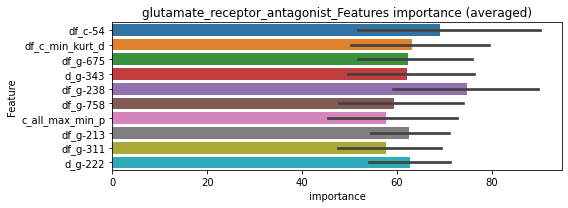

len(train_index) : 2328
len(valid_index) : 776
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2328
len(valid_index) : 776
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[207]	training's binary_logloss: 0.00607583	valid_1's binary_logloss: 0.122071
Training until validation scores don't improve for 30 rounds


len(train_index) : 2328
len(valid_index) : 776


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00260916	valid_1's binary_logloss: 0.0894338


================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2328
len(valid_index) : 776
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00406493	valid_1's binary_logloss: 0.129519
Training until validation scores don't improve for 30 rounds


glutamate_receptor_antagonist logloss: 0.10317352796850172


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00189371	valid_1's binary_logloss: 0.07167
neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130161	valid_1's binary_logloss: 0.00601055
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000373976	valid_1's binary_logloss: 0.00367672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129822	valid_1's binary_logloss: 0.0045303
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000373791	valid_1's binary_logloss: 0.00270212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128881	valid_1's binary_logloss: 0.00382756
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000386792	valid_1's binary_logloss: 0.00209144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130241	valid_1's binary_logloss: 0.00421617


1 / 3 AUC score:1.000
y_Threshold: 0.0021164, Threshold: 0.0085992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00602, conf_1:0.01118
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0085992
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0485992
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0885992


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000378865	valid_1's binary_logloss: 0.00244287


threshold: 0.0885992, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120222	valid_1's binary_logloss: 0.00618226
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000356838	valid_1's binary_logloss: 0.00390986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122625	valid_1's binary_logloss: 0.00444509
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000359301	valid_1's binary_logloss: 0.0029431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122169	valid_1's binary_logloss: 0.00306951
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000361952	valid_1's binary_logloss: 0.00158825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122449	valid_1's binary_logloss: 0.00423757


2 / 3 AUC score:1.000
y_Threshold: 0.0366403, Threshold: 0.0885992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, conf_0:0.07088, conf_1:0.10632
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0885992
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.1285992
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1685992


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000398799	valid_1's binary_logloss: 0.0026692


threshold: 0.1685992, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120222	valid_1's binary_logloss: 0.00618226
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000356838	valid_1's binary_logloss: 0.00390986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122625	valid_1's binary_logloss: 0.00444509
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000359301	valid_1's binary_logloss: 0.0029431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122169	valid_1's binary_logloss: 0.00306951
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000361952	valid_1's binary_logloss: 0.00158825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122449	valid_1's binary_logloss: 0.00423757


3 / 3 AUC score:1.000
y_Threshold: 0.0366403, Threshold: 0.1685992, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.15174, conf_1:0.18546
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1685992
threshold: 0.1685992, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000398799	valid_1's binary_logloss: 0.0026692


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


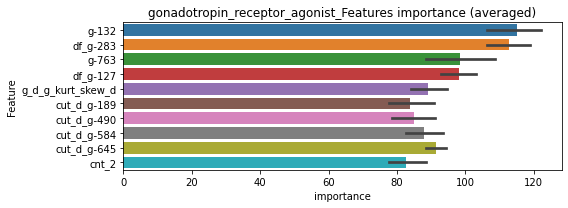

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000355461	valid_1's binary_logloss: 0.00265168


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000363371	valid_1's binary_logloss: 0.00204219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000358625	valid_1's binary_logloss: 0.00118029


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


gonadotropin_receptor_agonist logloss: 0.0019577158897722763


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000367626	valid_1's binary_logloss: 0.00195384
neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047821	valid_1's binary_logloss: 0.0291627
[600]	training's binary_logloss: 0.000876107	valid_1's binary_logloss: 0.0191903
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000628857	valid_1's binary_logloss: 0.0180988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501549	valid_1's binary_logloss: 0.0239048
[600]	training's binary_logloss: 0.000887082	valid_1's binary_logloss: 0.0137023
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000602948	valid_1's binary_logloss: 0.0125044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533638	valid_1's binary_logloss: 0.0123135
[600]	training's binary_logloss: 0.000928477	valid_1's binary_logloss: 0.00379318
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000662548	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0065033, Threshold: 0.0319175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.02234, conf_1:0.04149
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0319175
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.0719175
threshold: 0.0719175, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435579	valid_1's binary_logloss: 0.0285645
[600]	training's binary_logloss: 0.000837467	valid_1's binary_logloss: 0.0192216
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000592069	valid_1's binary_logloss: 0.0181757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448712	valid_1's binary_logloss: 0.024625
[600]	training's binary_logloss: 0.000840771	valid_1's binary_logloss: 0.0138764
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000612438	valid_1's binary_logloss: 0.0127713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485876	valid_1's binary_logloss: 0.0118495
[600]	training's binary_logloss: 0.000888234	valid_1's binary_logloss: 0.00330468
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000597917	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0526726, Threshold: 0.0719175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.05753, conf_1:0.08630
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0719175
Num_p_label: 22.0, Expected: 10.0, Adj_threshold_2: 0.1119175
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_3: 0.1519175
threshold: 0.1519175, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435905	valid_1's binary_logloss: 0.0264838
[600]	training's binary_logloss: 0.000834909	valid_1's binary_logloss: 0.0181241
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000695761	valid_1's binary_logloss: 0.0176367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452924	valid_1's binary_logloss: 0.0219947
[600]	training's binary_logloss: 0.000843955	valid_1's binary_logloss: 0.011004
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000585929	valid_1's binary_logloss: 0.00989514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447661	valid_1's binary_logloss: 0.0396567
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00129513	valid_1's binary_logloss: 0.035518
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0309857, Threshold: 0.1519175, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0020090 Vs.target_rate: 0.00252
Num_p_label: 8.0, conf_0:0.13673, conf_1:0.16711
threshold: 0.1519175, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


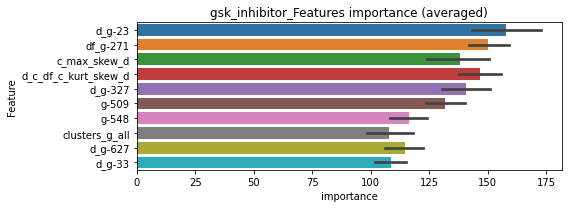

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000626479	valid_1's binary_logloss: 0.00774499
Early stopping, best iteration is:
[1128]	training's binary_logloss: 0.000594985	valid_1's binary_logloss: 0.0075998


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000650046	valid_1's binary_logloss: 0.0165243


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000620691	valid_1's binary_logloss: 0.00626979
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000604313	valid_1's binary_logloss: 0.0061993


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


gsk_inhibitor logloss: 0.013371341263667772


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00104467	valid_1's binary_logloss: 0.0231467
neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531519	valid_1's binary_logloss: 0.0442463
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00115664	valid_1's binary_logloss: 0.0363597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557071	valid_1's binary_logloss: 0.0283304
[600]	training's binary_logloss: 0.000982683	valid_1's binary_logloss: 0.0174328
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000684285	valid_1's binary_logloss: 0.0165801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054274	valid_1's binary_logloss: 0.0293807
[600]	training's binary_logloss: 0.000975967	valid_1's binary_logloss: 0.0194151
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000653524	valid_1's binary_logloss: 0.0185112
Training until validation scores don't improve for 30 rounds
[300]	tr

1 / 3 AUC score:0.999
y_Threshold: 0.0072241, Threshold: 0.0188607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01320, conf_1:0.02452
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0188607
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.0588607
threshold: 0.0588607, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504842	valid_1's binary_logloss: 0.0274962
[600]	training's binary_logloss: 0.000923924	valid_1's binary_logloss: 0.0167041
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000758926	valid_1's binary_logloss: 0.0162596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484108	valid_1's binary_logloss: 0.0320772
[600]	training's binary_logloss: 0.000904114	valid_1's binary_logloss: 0.0207317
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000672007	valid_1's binary_logloss: 0.0199144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484503	valid_1's binary_logloss: 0.0320755
[600]	training's binary_logloss: 0.000919571	valid_1's binary_logloss: 0.0209364
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000684385	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0309926, Threshold: 0.0588607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0090407 Vs.target_rate: 0.00302
Num_p_label: 36.0, conf_0:0.04709, conf_1:0.07063
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_1: 0.0588607
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_2: 0.0988607
Num_p_label: 14.0, Expected: 12.0, Adj_threshold_3: 0.1388607
threshold: 0.1388607, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047401	valid_1's binary_logloss: 0.0277433
[600]	training's binary_logloss: 0.000895224	valid_1's binary_logloss: 0.0171878
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000736414	valid_1's binary_logloss: 0.0164849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481463	valid_1's binary_logloss: 0.0246248
[600]	training's binary_logloss: 0.00090552	valid_1's binary_logloss: 0.0138128
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.00065033	valid_1's binary_logloss: 0.012679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491732	valid_1's binary_logloss: 0.0326283
[600]	training's binary_logloss: 0.000910261	valid_1's binary_logloss: 0.0216879
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000651579	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0425912, Threshold: 0.1388607, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0035158 Vs.target_rate: 0.00302
Num_p_label: 14.0, conf_0:0.12497, conf_1:0.15275
threshold: 0.1388607, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3783, y_label_rate: 0.1712926


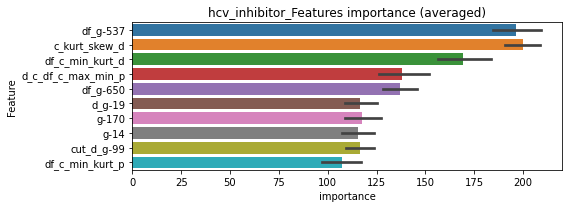

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000678211	valid_1's binary_logloss: 0.0157304


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000721827	valid_1's binary_logloss: 0.0152076


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000662421	valid_1's binary_logloss: 0.0174663


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hcv_inhibitor logloss: 0.017071928258496016


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00105291	valid_1's binary_logloss: 0.0198863
neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00975215	valid_1's binary_logloss: 0.0874236
[600]	training's binary_logloss: 0.00154009	valid_1's binary_logloss: 0.0696687
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00115187	valid_1's binary_logloss: 0.0675402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00936088	valid_1's binary_logloss: 0.0766172
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00225986	valid_1's binary_logloss: 0.0660927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993418	valid_1's binary_logloss: 0.0742762
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00184631	valid_1's binary_logloss: 0.0660959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989413	valid_1's binary_logloss: 0.0615076
[600]	train

1 / 3 AUC score:0.994
y_Threshold: 0.0143688, Threshold: 0.0955236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 641/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.06687, conf_1:0.12418
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.0955236
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_2: 0.1355236
threshold: 0.1355236, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00818442	valid_1's binary_logloss: 0.0503962
[600]	training's binary_logloss: 0.00137777	valid_1's binary_logloss: 0.0317104
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000794099	valid_1's binary_logloss: 0.0291291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825938	valid_1's binary_logloss: 0.0504378
[600]	training's binary_logloss: 0.00138085	valid_1's binary_logloss: 0.035488
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000785077	valid_1's binary_logloss: 0.0335177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811319	valid_1's binary_logloss: 0.044193
[600]	training's binary_logloss: 0.00138448	valid_1's binary_logloss: 0.0293402
[900]	training's binary_logloss: 0.000767794	valid_1's binary_logloss: 0.0267143
Early stopping, best itera

2 / 3 AUC score:0.999
y_Threshold: 0.0376116, Threshold: 0.1355236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0138122 Vs.target_rate: 0.00445
Num_p_label: 55.0, conf_0:0.10842, conf_1:0.16263
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_1: 0.1355236
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_2: 0.1755236
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_3: 0.2155236
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_4: 0.2555236
threshold: 0.2555236, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762494	valid_1's binary_logloss: 0.0544638
[600]	training's binary_logloss: 0.0013033	valid_1's binary_logloss: 0.0402326
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000837916	valid_1's binary_logloss: 0.0386454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00738613	valid_1's binary_logloss: 0.0559037
[600]	training's binary_logloss: 0.00127479	valid_1's binary_logloss: 0.0401551
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000806843	valid_1's binary_logloss: 0.03826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083034	valid_1's binary_logloss: 0.0355434
[600]	training's binary_logloss: 0.00138865	valid_1's binary_logloss: 0.0215993
[900]	training's binary_logloss: 0.000761949	valid_1's binary_logloss: 0.019398
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0512533, Threshold: 0.2555236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0057760 Vs.target_rate: 0.00445
Num_p_label: 23.0, conf_0:0.22997, conf_1:0.28108
threshold: 0.2555236, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 628.0/3745, y_label_rate: 0.1676903


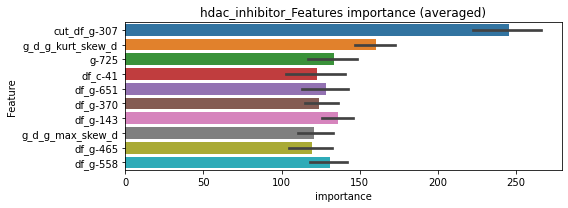

len(train_index) : 2808
len(valid_index) : 937
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2809
len(valid_index) : 936
================================= fold 2/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00168059	valid_1's binary_logloss: 0.0531364
Training until validation scores don't improve for 30 rounds


len(train_index) : 2809
len(valid_index) : 936
================================= fold 3/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00136619	valid_1's binary_logloss: 0.0419054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000847573	valid_1's binary_logloss: 0.0289093


len(train_index) : 2809
len(valid_index) : 936
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.0010762	valid_1's binary_logloss: 0.0354661


hdac_inhibitor logloss: 0.03985784037933872


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283
target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039722	valid_1's binary_logloss: 0.0392017
[600]	training's binary_logloss: 0.000741905	valid_1's binary_logloss: 0.0289215
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000678499	valid_1's binary_logloss: 0.0285216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421548	valid_1's binary_logloss: 0.0321076
[600]	training's binary_logloss: 0.000765498	valid_1's binary_logloss: 0.0235231
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000647939	valid_1's binary_logloss: 0.0230668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473566	valid_1's binary_logloss: 0.0132817
[600]	training's binary_logloss: 0.000817504	valid_1's binary_logloss: 0.00789846
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000616564	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0048096, Threshold: 0.0136469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, conf_0:0.00955, conf_1:0.01774
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0136469
Num_p_label: 2.0, Expected: 9.9, Adj_threshold_2: 0.0536469
threshold: 0.0536469, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381931	valid_1's binary_logloss: 0.0334657
[600]	training's binary_logloss: 0.000729524	valid_1's binary_logloss: 0.0242341
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000668322	valid_1's binary_logloss: 0.0239512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392038	valid_1's binary_logloss: 0.0315564
[600]	training's binary_logloss: 0.00073902	valid_1's binary_logloss: 0.0233777
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000559837	valid_1's binary_logloss: 0.0226489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440105	valid_1's binary_logloss: 0.013021
[600]	training's binary_logloss: 0.000782955	valid_1's binary_logloss: 0.00752777
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000601309	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0197342, Threshold: 0.0536469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00248
Num_p_label: 12.0, conf_0:0.04292, conf_1:0.06438
threshold: 0.0536469, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395172	valid_1's binary_logloss: 0.0288874
[600]	training's binary_logloss: 0.000731135	valid_1's binary_logloss: 0.0205609
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000640978	valid_1's binary_logloss: 0.0201904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407169	valid_1's binary_logloss: 0.0265433
[600]	training's binary_logloss: 0.000738816	valid_1's binary_logloss: 0.0198306
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000760886	valid_1's binary_logloss: 0.0197409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413241	valid_1's binary_logloss: 0.0205865
[600]	training's binary_logloss: 0.000759658	valid_1's binary_logloss: 0.0128322
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000581895	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0304539, Threshold: 0.0536469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0027624 Vs.target_rate: 0.00248
Num_p_label: 11.0, conf_0:0.04828, conf_1:0.05901
threshold: 0.0536469, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


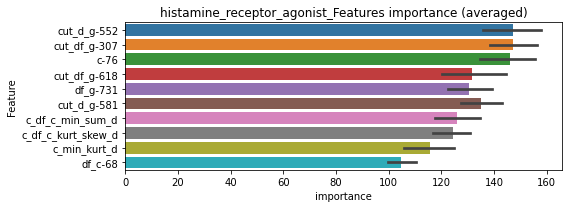

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000874711	valid_1's binary_logloss: 0.0256174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000635581	valid_1's binary_logloss: 0.00963149


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00108644	valid_1's binary_logloss: 0.021827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000621721	valid_1's binary_logloss: 0.0207521


histamine_receptor_agonist logloss: 0.01945666393727854


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255
target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0291452	valid_1's binary_logloss: 0.203997
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0169328	valid_1's binary_logloss: 0.200914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025917	valid_1's binary_logloss: 0.21548
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0223717	valid_1's binary_logloss: 0.21445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0282492	valid_1's binary_logloss: 0.1784
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.0134399	valid_1's binary_logloss: 0.174305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303451	valid_1's binary_logloss: 0.171509


1 / 3 AUC score:0.944
y_Threshold: 0.0537526, Threshold: 0.3804213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 325 → Positive_corect_labels: 554/3581


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0110816	valid_1's binary_logloss: 0.164397


p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, conf_0:0.26629, conf_1:0.49455
threshold: 0.3804213, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3581, y_label_rate: 0.1547054
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156317	valid_1's binary_logloss: 0.124175
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00287387	valid_1's binary_logloss: 0.114383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171192	valid_1's binary_logloss: 0.102745
[600]	training's binary_logloss: 0.00271886	valid_1's binary_logloss: 0.0915308
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00277662	valid_1's binary_logloss: 0.0911603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163912	valid_1's binary_logloss: 0.131
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.0056585	valid_1's binary_logloss: 0.124525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160512	valid_1's binary_logloss: 0.126639


2 / 3 AUC score:0.988
y_Threshold: 0.0492693, Threshold: 0.3804213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 515.0/3503
p_label_rate: 0.0185836 Vs.target_rate: 0.01012
Num_p_label: 74.0, conf_0:0.30434, conf_1:0.45651
Num_p_label: 74.0, Expected: 40.3, Adj_threshold_1: 0.3804213


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00463947	valid_1's binary_logloss: 0.11886


Num_p_label: 66.0, Expected: 40.3, Adj_threshold_2: 0.4204213
Num_p_label: 62.0, Expected: 40.3, Adj_threshold_3: 0.4604213
Num_p_label: 58.0, Expected: 40.3, Adj_threshold_4: 0.5004213
threshold: 0.5004213, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 515.0/3503, y_label_rate: 0.1470168
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119548	valid_1's binary_logloss: 0.124972
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00631473	valid_1's binary_logloss: 0.120206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118822	valid_1's binary_logloss: 0.109684
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00376666	valid_1's binary_logloss: 0.102492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119167	valid_1's binary_logloss: 0.080045
[600]	training's binary_logloss: 0.00202845	valid_1's binary_logloss: 0.0690518
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.0021943	valid_1's binary_logloss: 0.0686684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123867	valid_1's binary_logloss: 0.0863288


3 / 3 AUC score:0.994
y_Threshold: 0.0522581, Threshold: 0.5004213, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00287088	valid_1's binary_logloss: 0.0774948


Remove_noisy_data: 50 → Positive_corect_labels: 490.0/3453
p_label_rate: 0.0183325 Vs.target_rate: 0.01012
Num_p_label: 73.0, conf_0:0.45038, conf_1:0.55046
Num_p_label: 73.0, Expected: 40.3, Adj_threshold_1: 0.5004213
Num_p_label: 69.0, Expected: 40.3, Adj_threshold_2: 0.5404213
Num_p_label: 61.0, Expected: 40.3, Adj_threshold_3: 0.5804213
Num_p_label: 55.0, Expected: 40.3, Adj_threshold_4: 0.6204213
threshold: 0.6204213, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 490.0/3453, y_label_rate: 0.1419056


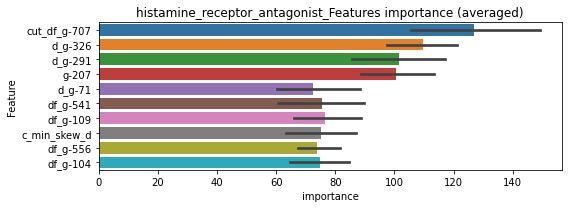

len(train_index) : 2589
len(valid_index) : 864
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00320114	valid_1's binary_logloss: 0.0955321
Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00201611	valid_1's binary_logloss: 0.0442742
Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 4/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00351104	valid_1's binary_logloss: 0.0901306
Training until validation scores don't improve for 30 rounds


histamine_receptor_antagonist logloss: 0.08369081420479593


Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00475455	valid_1's binary_logloss: 0.104813
neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173475	valid_1's binary_logloss: 0.00484904
[600]	training's binary_logloss: 0.000417826	valid_1's binary_logloss: 0.00194391
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000414332	valid_1's binary_logloss: 0.00193419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176959	valid_1's binary_logloss: 0.00614842
[600]	training's binary_logloss: 0.000423593	valid_1's binary_logloss: 0.00315451
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423593	valid_1's binary_logloss: 0.00315451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177252	valid_1's binary_logloss: 0.00312876
[600]	training's binary_logloss: 0.000425519	valid_1's binary_logloss: 0.00103104
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000425528	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0022741, Threshold: 0.0209985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.01470, conf_1:0.02730
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0209985
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.0609985
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_3: 0.1009985
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.1409985
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1809985
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.2209985
threshold: 0.2209985, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165403	valid_1's binary_logloss: 0.00431188
[600]	training's binary_logloss: 0.000406464	valid_1's binary_logloss: 0.00166962
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00040001	valid_1's binary_logloss: 0.00166074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163909	valid_1's binary_logloss: 0.00543091
[600]	training's binary_logloss: 0.000410184	valid_1's binary_logloss: 0.00289076
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000404688	valid_1's binary_logloss: 0.00288464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166251	valid_1's binary_logloss: 0.00290926
[600]	training's binary_logloss: 0.00041122	valid_1's binary_logloss: 0.000964753
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000407954	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0477348, Threshold: 0.2209985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0062783 Vs.target_rate: 0.00101
Num_p_label: 25.0, conf_0:0.17680, conf_1:0.26520
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_1: 0.2209985
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2609985
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.3009985
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3409985
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_5: 0.3809985
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.4209985
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.4609985
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.5009985
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_9: 0.5409985
threshold: 0.5409985, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165403	valid_1's binary_logloss: 0.00431188
[600]	training's binary_logloss: 0.000406464	valid_1's binary_logloss: 0.00166962
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00040001	valid_1's binary_logloss: 0.00166074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163909	valid_1's binary_logloss: 0.00543091
[600]	training's binary_logloss: 0.000410184	valid_1's binary_logloss: 0.00289076
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000404688	valid_1's binary_logloss: 0.00288464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166251	valid_1's binary_logloss: 0.00290926
[600]	training's binary_logloss: 0.00041122	valid_1's binary_logloss: 0.000964753
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000407954	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0477348, Threshold: 0.5409985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.48690, conf_1:0.59510
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.5409985
threshold: 0.5409985, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


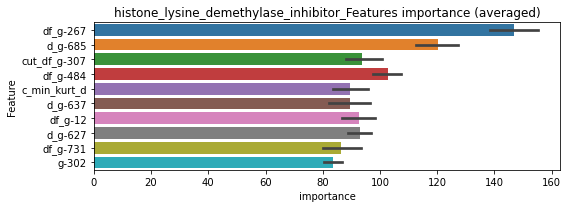

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000405586	valid_1's binary_logloss: 0.00177517


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000420804	valid_1's binary_logloss: 0.00181545


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000423314	valid_1's binary_logloss: 0.00133468


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000425869	valid_1's binary_logloss: 0.00215544


histone_lysine_demethylase_inhibitor logloss: 0.001770179477165524


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205938	valid_1's binary_logloss: 0.00905048
[600]	training's binary_logloss: 0.00045322	valid_1's binary_logloss: 0.00530882
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000441329	valid_1's binary_logloss: 0.00529834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206731	valid_1's binary_logloss: 0.00811977
[600]	training's binary_logloss: 0.000455349	valid_1's binary_logloss: 0.00520623
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000479094	valid_1's binary_logloss: 0.00518377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215565	valid_1's binary_logloss: 0.00400878
[600]	training's binary_logloss: 0.00046713	valid_1's binary_logloss: 0.00116055
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000434534	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028845, Threshold: 0.0092899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00650, conf_1:0.01208
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0092899
Num_p_label: 4.0, Expected: 5.4, Adj_threshold_2: 0.0492899
threshold: 0.0492899, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198504	valid_1's binary_logloss: 0.0045638
[600]	training's binary_logloss: 0.000447304	valid_1's binary_logloss: 0.00165085
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000424607	valid_1's binary_logloss: 0.00161578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203123	valid_1's binary_logloss: 0.00812267
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000590681	valid_1's binary_logloss: 0.00579456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019591	valid_1's binary_logloss: 0.00778213
[600]	training's binary_logloss: 0.000452855	valid_1's binary_logloss: 0.0042128
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000421581	valid_1's binary_logloss: 0.00415907
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0183284, Threshold: 0.0492899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.03943, conf_1:0.05915
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_1: 0.0492899
threshold: 0.0492899, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198504	valid_1's binary_logloss: 0.0045638
[600]	training's binary_logloss: 0.000447304	valid_1's binary_logloss: 0.00165085
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000424607	valid_1's binary_logloss: 0.00161578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203123	valid_1's binary_logloss: 0.00812267
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000590681	valid_1's binary_logloss: 0.00579456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019591	valid_1's binary_logloss: 0.00778213
[600]	training's binary_logloss: 0.000452855	valid_1's binary_logloss: 0.0042128
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000421581	valid_1's binary_logloss: 0.00415907
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0183284, Threshold: 0.0492899, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.04436, conf_1:0.05422
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_1: 0.0492899
threshold: 0.0492899, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


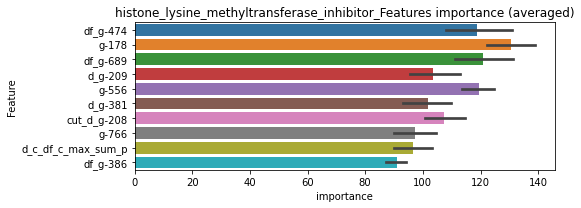

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00043051	valid_1's binary_logloss: 0.00188788
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.00043051	valid_1's binary_logloss: 0.00188788


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000485687	valid_1's binary_logloss: 0.00556678


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000439701	valid_1's binary_logloss: 0.00323236


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000436542	valid_1's binary_logloss: 0.00699826


histone_lysine_methyltransferase_inhibitor logloss: 0.004420954956975832


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518113	valid_1's binary_logloss: 0.0532651
[600]	training's binary_logloss: 0.000913446	valid_1's binary_logloss: 0.0437132
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000765971	valid_1's binary_logloss: 0.0431639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00530201	valid_1's binary_logloss: 0.0268154
[600]	training's binary_logloss: 0.000958464	valid_1's binary_logloss: 0.0132246
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000628163	valid_1's binary_logloss: 0.0116457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540696	valid_1's binary_logloss: 0.0218629
[600]	training's binary_logloss: 0.000970668	valid_1's binary_logloss: 0.0124016
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000686008	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0059224, Threshold: 0.0986375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.06905, conf_1:0.12823
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0986375
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_2: 0.1386375
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_3: 0.1786375
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_4: 0.2186375
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.2586375
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_6: 0.2986375
threshold: 0.2986375, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491996	valid_1's binary_logloss: 0.0331217
[600]	training's binary_logloss: 0.000907001	valid_1's binary_logloss: 0.0229363
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000615336	valid_1's binary_logloss: 0.0220219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487077	valid_1's binary_logloss: 0.026862
[600]	training's binary_logloss: 0.000912797	valid_1's binary_logloss: 0.0170555
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000661415	valid_1's binary_logloss: 0.0160601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496296	valid_1's binary_logloss: 0.03235
[600]	training's binary_logloss: 0.000907815	valid_1's binary_logloss: 0.0212747
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000608376	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0405903, Threshold: 0.2986375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0118031 Vs.target_rate: 0.00302
Num_p_label: 47.0, conf_0:0.23891, conf_1:0.35837
Num_p_label: 47.0, Expected: 12.0, Adj_threshold_1: 0.2986375
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_2: 0.3386375
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_3: 0.3786375
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_4: 0.4186375
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_5: 0.4586375
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_6: 0.4986375
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.5386375
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_8: 0.5786375
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_9: 0.6186375
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_10: 0.6586375
threshold: 0.6986375, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481164	valid_1's binary_logloss: 0.0291559
[600]	training's binary_logloss: 0.000899548	valid_1's binary_logloss: 0.0195752
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00068328	valid_1's binary_logloss: 0.0186949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00479633	valid_1's binary_logloss: 0.0259082
[600]	training's binary_logloss: 0.000899379	valid_1's binary_logloss: 0.0154229
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000634383	valid_1's binary_logloss: 0.0144339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450687	valid_1's binary_logloss: 0.0325806
[600]	training's binary_logloss: 0.000861885	valid_1's binary_logloss: 0.0212434
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00060731	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0551951, Threshold: 0.6986375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00302
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.76850
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_1: 0.6986375
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.7386375
threshold: 0.7386375, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


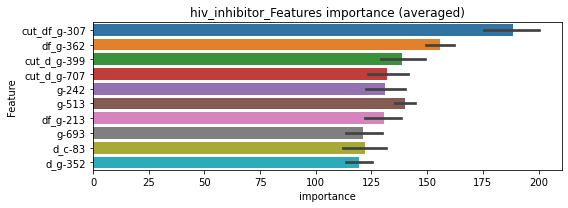

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000660334	valid_1's binary_logloss: 0.0176502


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000724109	valid_1's binary_logloss: 0.0178331


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000998782	valid_1's binary_logloss: 0.0220014
Training until validation scores don't improve for 30 rounds


hiv_inhibitor logloss: 0.020866710054045258


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.0012818	valid_1's binary_logloss: 0.0259887
neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246
target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392437	valid_1's binary_logloss: 0.230726
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.012021	valid_1's binary_logloss: 0.220351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403139	valid_1's binary_logloss: 0.253757
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.0182631	valid_1's binary_logloss: 0.248655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03998	valid_1's binary_logloss: 0.244109
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.0280701	valid_1's binary_logloss: 0.238909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399625	valid_1's binary_logloss: 0.241916


1 / 3 AUC score:0.905
y_Threshold: 0.0720197, Threshold: 0.3720852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 392 → Positive_corect_labels: 518/3503


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.0141326	valid_1's binary_logloss: 0.234678


p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, conf_0:0.26046, conf_1:0.48371
threshold: 0.3720852, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 518.0/3503, y_label_rate: 0.1478733
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209635	valid_1's binary_logloss: 0.166956
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00888958	valid_1's binary_logloss: 0.154357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209924	valid_1's binary_logloss: 0.178485
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00885551	valid_1's binary_logloss: 0.170795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0215781	valid_1's binary_logloss: 0.177251
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00706012	valid_1's binary_logloss: 0.16893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0218814	valid_1's binary_logloss: 0.140761
[600]	training's binary_logloss: 0.00333606	valid_1's binary_logloss: 0.11756
Early stopping, best iter

2 / 3 AUC score:0.970
y_Threshold: 0.0663249, Threshold: 0.3720852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 450.0/3367
p_label_rate: 0.0140633 Vs.target_rate: 0.01188
Num_p_label: 56.0, conf_0:0.29767, conf_1:0.44650
threshold: 0.3720852, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 450.0/3367, y_label_rate: 0.1336501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144275	valid_1's binary_logloss: 0.149299
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.0045264	valid_1's binary_logloss: 0.137494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145785	valid_1's binary_logloss: 0.109631
[600]	training's binary_logloss: 0.0023604	valid_1's binary_logloss: 0.0931845
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00249122	valid_1's binary_logloss: 0.0928516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152705	valid_1's binary_logloss: 0.168204
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00469255	valid_1's binary_logloss: 0.159052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160539	valid_1's binary_logloss: 0.108443
[600]	training's binary

3 / 3 AUC score:0.984
y_Threshold: 0.0517046, Threshold: 0.3720852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 416.0/3299
p_label_rate: 0.0138122 Vs.target_rate: 0.01188
Num_p_label: 55.0, conf_0:0.33488, conf_1:0.40929
threshold: 0.3720852, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 416.0/3299, y_label_rate: 0.1260988


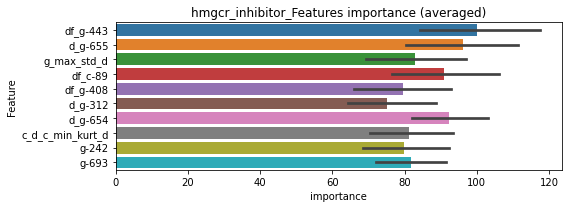

len(train_index) : 2474
len(valid_index) : 825
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2474
len(valid_index) : 825
================================= fold 2/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00495309	valid_1's binary_logloss: 0.125426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.0059135	valid_1's binary_logloss: 0.0940361


len(train_index) : 2474
len(valid_index) : 825
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2475
len(valid_index) : 824
================================= fold 4/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00224027	valid_1's binary_logloss: 0.0629946
Training until validation scores don't improve for 30 rounds


hmgcr_inhibitor logloss: 0.09469291854664084


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00300857	valid_1's binary_logloss: 0.0963171
neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272
target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00808524	valid_1's binary_logloss: 0.0609377
[600]	training's binary_logloss: 0.00132796	valid_1's binary_logloss: 0.0518665
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00123103	valid_1's binary_logloss: 0.0514685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00842605	valid_1's binary_logloss: 0.044356
[600]	training's binary_logloss: 0.00138601	valid_1's binary_logloss: 0.0286052
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000789658	valid_1's binary_logloss: 0.0271063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00837107	valid_1's binary_logloss: 0.0363877
[600]	training's binary_logloss: 0.00138912	valid_1's binary_logloss: 0.0204719
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000856818	valid_1's binary_logloss: 0

1 / 3 AUC score:0.998
y_Threshold: 0.0118191, Threshold: 0.1600972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.11207, conf_1:0.20813
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1600972
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_2: 0.2000972
Num_p_label: 23.0, Expected: 15.6, Adj_threshold_3: 0.2400972
threshold: 0.2400972, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680206	valid_1's binary_logloss: 0.0607309
[600]	training's binary_logloss: 0.00118491	valid_1's binary_logloss: 0.0468905
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00106885	valid_1's binary_logloss: 0.046453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677146	valid_1's binary_logloss: 0.0548533
[600]	training's binary_logloss: 0.00117508	valid_1's binary_logloss: 0.0439038
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000856978	valid_1's binary_logloss: 0.0433359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732875	valid_1's binary_logloss: 0.0239178
[600]	training's binary_logloss: 0.00126305	valid_1's binary_logloss: 0.0101253
[900]	training's binary_logloss: 0.000731605	valid_1's binary_logloss: 0.00840319
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.0633285, Threshold: 0.2400972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0261175 Vs.target_rate: 0.00391
Num_p_label: 104.0, conf_0:0.19208, conf_1:0.28812
Num_p_label: 104.0, Expected: 15.6, Adj_threshold_1: 0.2400972
Num_p_label: 97.0, Expected: 15.6, Adj_threshold_2: 0.2800972
Num_p_label: 91.0, Expected: 15.6, Adj_threshold_3: 0.3200972
Num_p_label: 86.0, Expected: 15.6, Adj_threshold_4: 0.3600972
Num_p_label: 81.0, Expected: 15.6, Adj_threshold_5: 0.4000972
Num_p_label: 74.0, Expected: 15.6, Adj_threshold_6: 0.4400972
Num_p_label: 70.0, Expected: 15.6, Adj_threshold_7: 0.4800972
Num_p_label: 62.0, Expected: 15.6, Adj_threshold_8: 0.5200972
Num_p_label: 59.0, Expected: 15.6, Adj_threshold_9: 0.5600972
Num_p_label: 49.0, Expected: 15.6, Adj_threshold_10: 0.6000972
threshold: 0.6400972, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 638.0/3762, y_label_rate: 0.169590

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588968	valid_1's binary_logloss: 0.0333984
[600]	training's binary_logloss: 0.00109983	valid_1's binary_logloss: 0.0227437
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000707875	valid_1's binary_logloss: 0.0217493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637766	valid_1's binary_logloss: 0.0350357
[600]	training's binary_logloss: 0.00114238	valid_1's binary_logloss: 0.0216741
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000723487	valid_1's binary_logloss: 0.0199922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678446	valid_1's binary_logloss: 0.0287322
[600]	training's binary_logloss: 0.00117464	valid_1's binary_logloss: 0.0144152
[900]	training's binary_logloss: 0.000699683	valid_1's binary_logloss: 0.0124816
Early stopping, best ite

3 / 3 AUC score:1.000
y_Threshold: 0.0706625, Threshold: 0.6400972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0145655 Vs.target_rate: 0.00391
Num_p_label: 58.0, conf_0:0.50000, conf_1:0.70411
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_1: 0.6400972
Num_p_label: 51.0, Expected: 15.6, Adj_threshold_2: 0.6800972
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_3: 0.7200972
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_4: 0.7600972
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_5: 0.8000972
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_6: 0.8400972
threshold: 0.8400972, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 634.0/3754, y_label_rate: 0.1688865


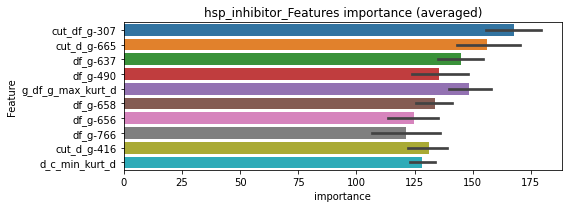

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.00079796	valid_1's binary_logloss: 0.02519


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000933308	valid_1's binary_logloss: 0.0229519


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00105382	valid_1's binary_logloss: 0.0243231


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000866434	valid_1's binary_logloss: 0.020829


hsp_inhibitor logloss: 0.023323896017427688


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248149	valid_1's binary_logloss: 0.0248179
[600]	training's binary_logloss: 0.000529669	valid_1's binary_logloss: 0.0184569
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000517327	valid_1's binary_logloss: 0.0183478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263881	valid_1's binary_logloss: 0.0117845
[600]	training's binary_logloss: 0.000546376	valid_1's binary_logloss: 0.007393
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000500251	valid_1's binary_logloss: 0.00726129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267562	valid_1's binary_logloss: 0.0069541
[600]	training's binary_logloss: 0.000553491	valid_1's binary_logloss: 0.00255562
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000485208	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0030014, Threshold: 0.0217037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01519, conf_1:0.02821
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0217037
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0617037
threshold: 0.0617037, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231693	valid_1's binary_logloss: 0.0243743
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000558091	valid_1's binary_logloss: 0.0184325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246086	valid_1's binary_logloss: 0.00971411
[600]	training's binary_logloss: 0.000523008	valid_1's binary_logloss: 0.00599572
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000478689	valid_1's binary_logloss: 0.00592339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251301	valid_1's binary_logloss: 0.00607559
[600]	training's binary_logloss: 0.000533766	valid_1's binary_logloss: 0.00204015
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000487207	valid_1's binary_logloss: 0.00195013
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0379807, Threshold: 0.0617037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0113009 Vs.target_rate: 0.00155
Num_p_label: 45.0, conf_0:0.04936, conf_1:0.07404
Num_p_label: 45.0, Expected: 6.2, Adj_threshold_1: 0.0617037
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_2: 0.1017037
Num_p_label: 22.0, Expected: 6.2, Adj_threshold_3: 0.1417037
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_4: 0.1817037
threshold: 0.1817037, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240388	valid_1's binary_logloss: 0.0114024
[600]	training's binary_logloss: 0.000509997	valid_1's binary_logloss: 0.00714018
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000492567	valid_1's binary_logloss: 0.00708041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238867	valid_1's binary_logloss: 0.011605
[600]	training's binary_logloss: 0.000519273	valid_1's binary_logloss: 0.00692596
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000490748	valid_1's binary_logloss: 0.00678605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023919	valid_1's binary_logloss: 0.0148642
[600]	training's binary_logloss: 0.000516138	valid_1's binary_logloss: 0.0104074
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000505058	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0267461, Threshold: 0.1817037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0045203 Vs.target_rate: 0.00155
Num_p_label: 18.0, conf_0:0.16353, conf_1:0.19987
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_1: 0.1817037
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.2217037
threshold: 0.2217037, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


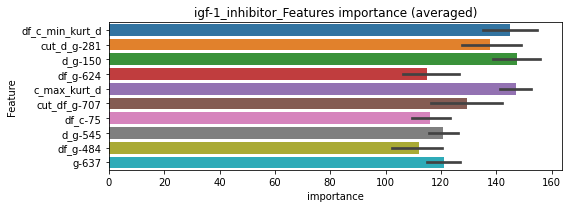

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000558077	valid_1's binary_logloss: 0.00805334


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000517537	valid_1's binary_logloss: 0.00452455


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000882906	valid_1's binary_logloss: 0.0125672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000493709	valid_1's binary_logloss: 0.00480185


igf-1_inhibitor logloss: 0.007487852285406489


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164425	valid_1's binary_logloss: 0.0114499
[600]	training's binary_logloss: 0.000407993	valid_1's binary_logloss: 0.00719018
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000404154	valid_1's binary_logloss: 0.00716489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167866	valid_1's binary_logloss: 0.00445786
[600]	training's binary_logloss: 0.00041006	valid_1's binary_logloss: 0.00177092
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000400301	valid_1's binary_logloss: 0.00175138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173682	valid_1's binary_logloss: 0.00493269
[600]	training's binary_logloss: 0.000416858	valid_1's binary_logloss: 0.00236376
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000395928	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0029521, Threshold: 0.0111349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00779, conf_1:0.01448
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0111349
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0511349
threshold: 0.0511349, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154216	valid_1's binary_logloss: 0.0124274
[600]	training's binary_logloss: 0.000400887	valid_1's binary_logloss: 0.00890068
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000395409	valid_1's binary_logloss: 0.00888347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151569	valid_1's binary_logloss: 0.00406868
[600]	training's binary_logloss: 0.000395968	valid_1's binary_logloss: 0.00160469
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000395968	valid_1's binary_logloss: 0.00160469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160455	valid_1's binary_logloss: 0.00339791
[600]	training's binary_logloss: 0.000399197	valid_1's binary_logloss: 0.00110748
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000391975	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0448999, Threshold: 0.0511349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00126
Num_p_label: 26.0, conf_0:0.04091, conf_1:0.06136
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_1: 0.0511349
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.0911349
threshold: 0.0911349, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154216	valid_1's binary_logloss: 0.0124274
[600]	training's binary_logloss: 0.000400887	valid_1's binary_logloss: 0.00890068
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000395409	valid_1's binary_logloss: 0.00888347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151569	valid_1's binary_logloss: 0.00406868
[600]	training's binary_logloss: 0.000395968	valid_1's binary_logloss: 0.00160469
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000395968	valid_1's binary_logloss: 0.00160469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160455	valid_1's binary_logloss: 0.00339791
[600]	training's binary_logloss: 0.000399197	valid_1's binary_logloss: 0.00110748
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000391975	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0448999, Threshold: 0.0911349, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, conf_0:0.08202, conf_1:0.10025
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.0911349
threshold: 0.0911349, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


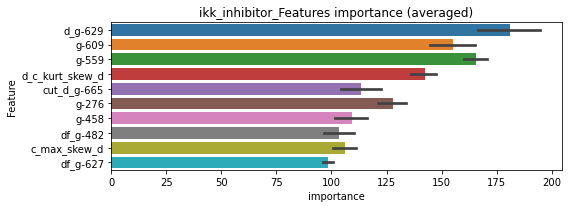

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000432922	valid_1's binary_logloss: 0.00723895


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389785	valid_1's binary_logloss: 0.00193137
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000389837	valid_1's binary_logloss: 0.00193122


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000407113	valid_1's binary_logloss: 0.00107149


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000405115	valid_1's binary_logloss: 0.00126483


ikk_inhibitor logloss: 0.002877556983671491


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160306	valid_1's binary_logloss: 0.00736639
[600]	training's binary_logloss: 0.000411261	valid_1's binary_logloss: 0.00453553
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000411814	valid_1's binary_logloss: 0.00453399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154725	valid_1's binary_logloss: 0.0132937
[600]	training's binary_logloss: 0.000402428	valid_1's binary_logloss: 0.00931495
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000416867	valid_1's binary_logloss: 0.00928823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162919	valid_1's binary_logloss: 0.00353942
[600]	training's binary_logloss: 0.000416123	valid_1's binary_logloss: 0.00149049
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000406534	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0024283, Threshold: 0.0122673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00859, conf_1:0.01595
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0122673
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_2: 0.0522673
threshold: 0.0522673, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152522	valid_1's binary_logloss: 0.00672286
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000423843	valid_1's binary_logloss: 0.00423372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146071	valid_1's binary_logloss: 0.0116983
[600]	training's binary_logloss: 0.000382511	valid_1's binary_logloss: 0.008679
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000378276	valid_1's binary_logloss: 0.00863503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015291	valid_1's binary_logloss: 0.00325025
[600]	training's binary_logloss: 0.000401552	valid_1's binary_logloss: 0.00138709
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000401561	valid_1's binary_logloss: 0.001387
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0219587, Threshold: 0.0522673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00130
Num_p_label: 25.0, conf_0:0.04181, conf_1:0.06272
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_1: 0.0522673


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000420255	valid_1's binary_logloss: 0.00281717


Num_p_label: 20.0, Expected: 5.2, Adj_threshold_2: 0.0922673
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_3: 0.1322673
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_4: 0.1722673
threshold: 0.1722673, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152522	valid_1's binary_logloss: 0.00672286
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000423843	valid_1's binary_logloss: 0.00423372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146071	valid_1's binary_logloss: 0.0116983
[600]	training's binary_logloss: 0.000382511	valid_1's binary_logloss: 0.008679
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000378276	valid_1's binary_logloss: 0.00863503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015291	valid_1's binary_logloss: 0.00325025
[600]	training's binary_logloss: 0.000401552	valid_1's binary_logloss: 0.00138709
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000401561	valid_1's binary_logloss: 0.001387
Training until validation scores don't improve for 30 rounds
[300

3 / 3 AUC score:1.000
y_Threshold: 0.0219587, Threshold: 0.1722673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000420255	valid_1's binary_logloss: 0.00281717


p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.15504, conf_1:0.18949
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.1722673
threshold: 0.1722673, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


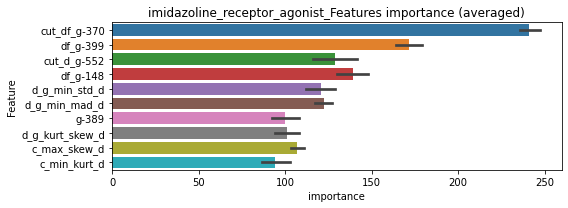

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000412816	valid_1's binary_logloss: 0.00386124


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000406602	valid_1's binary_logloss: 0.0101677


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000409983	valid_1's binary_logloss: 0.00132603


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000426896	valid_1's binary_logloss: 0.00234731


imidazoline_receptor_agonist logloss: 0.004426363824569046


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059285	valid_1's binary_logloss: 0.0323241
[600]	training's binary_logloss: 0.000995928	valid_1's binary_logloss: 0.021575
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000777927	valid_1's binary_logloss: 0.0208348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655933	valid_1's binary_logloss: 0.039491
[600]	training's binary_logloss: 0.00105126	valid_1's binary_logloss: 0.0271171
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000649321	valid_1's binary_logloss: 0.0257333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614712	valid_1's binary_logloss: 0.0313506
[600]	training's binary_logloss: 0.00102975	valid_1's binary_logloss: 0.0201086
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000687718	valid_1's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0058114, Threshold: 0.0159236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01115, conf_1:0.02070
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0159236
Num_p_label: 4.0, Expected: 12.2, Adj_threshold_2: 0.0559236
threshold: 0.0559236, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543142	valid_1's binary_logloss: 0.0328793
[600]	training's binary_logloss: 0.000960321	valid_1's binary_logloss: 0.0226833
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000738266	valid_1's binary_logloss: 0.0220933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584017	valid_1's binary_logloss: 0.0361172
[600]	training's binary_logloss: 0.000993225	valid_1's binary_logloss: 0.0239047
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000710953	valid_1's binary_logloss: 0.0228902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0058726	valid_1's binary_logloss: 0.0248067
[600]	training's binary_logloss: 0.00101608	valid_1's binary_logloss: 0.0141164
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000644851	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0246434, Threshold: 0.0559236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0020090 Vs.target_rate: 0.00307
Num_p_label: 8.0, conf_0:0.04474, conf_1:0.06711
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0559236
threshold: 0.0559236, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543109	valid_1's binary_logloss: 0.0390395
[600]	training's binary_logloss: 0.000965994	valid_1's binary_logloss: 0.0269563
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000795352	valid_1's binary_logloss: 0.0263172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056329	valid_1's binary_logloss: 0.0324335
[600]	training's binary_logloss: 0.000991211	valid_1's binary_logloss: 0.0217688
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000641654	valid_1's binary_logloss: 0.0209296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590888	valid_1's binary_logloss: 0.0269885
[600]	training's binary_logloss: 0.00101825	valid_1's binary_logloss: 0.0151023
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00071234	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0321317, Threshold: 0.0559236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0025113 Vs.target_rate: 0.00307
Num_p_label: 10.0, conf_0:0.05033, conf_1:0.06152
threshold: 0.0559236, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


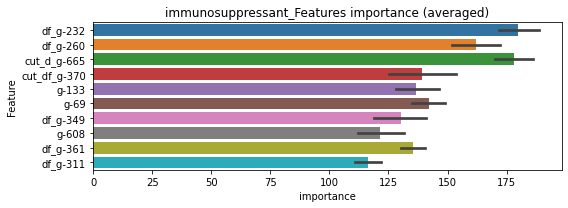

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000937249	valid_1's binary_logloss: 0.0201086


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00105817	valid_1's binary_logloss: 0.0384377
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000759658	valid_1's binary_logloss: 0.0187088


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000758325	valid_1's binary_logloss: 0.0178169


immunosuppressant logloss: 0.02377089834850781


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180498	valid_1's binary_logloss: 0.012218
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000571096	valid_1's binary_logloss: 0.00903616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193631	valid_1's binary_logloss: 0.00752708
[600]	training's binary_logloss: 0.000470739	valid_1's binary_logloss: 0.00383699
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000445064	valid_1's binary_logloss: 0.00376854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204083	valid_1's binary_logloss: 0.0036307
[600]	training's binary_logloss: 0.000474461	valid_1's binary_logloss: 0.00127803
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000447998	valid_1's binary_logloss: 0.00123003
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0027731, Threshold: 0.0105585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00739, conf_1:0.01373
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0105585
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_2: 0.0505585
threshold: 0.0505585, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173638	valid_1's binary_logloss: 0.0120374
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000473889	valid_1's binary_logloss: 0.00908732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188011	valid_1's binary_logloss: 0.00592292
[600]	training's binary_logloss: 0.000456613	valid_1's binary_logloss: 0.00301397
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000451814	valid_1's binary_logloss: 0.00299329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193023	valid_1's binary_logloss: 0.00331432
[600]	training's binary_logloss: 0.0004562	valid_1's binary_logloss: 0.00110498
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000433933	valid_1's binary_logloss: 0.00106229
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0121091, Threshold: 0.0505585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0047715 Vs.target_rate: 0.00126
Num_p_label: 19.0, conf_0:0.04045, conf_1:0.06067
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0505585
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0905585
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_3: 0.1305585
threshold: 0.1305585, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173638	valid_1's binary_logloss: 0.0120374
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000473889	valid_1's binary_logloss: 0.00908732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188011	valid_1's binary_logloss: 0.00592292
[600]	training's binary_logloss: 0.000456613	valid_1's binary_logloss: 0.00301397
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000451814	valid_1's binary_logloss: 0.00299329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193023	valid_1's binary_logloss: 0.00331432
[600]	training's binary_logloss: 0.0004562	valid_1's binary_logloss: 0.00110498
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000433933	valid_1's binary_logloss: 0.00106229
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0121091, Threshold: 0.1305585, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, conf_0:0.11750, conf_1:0.14361
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.1305585
threshold: 0.1305585, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


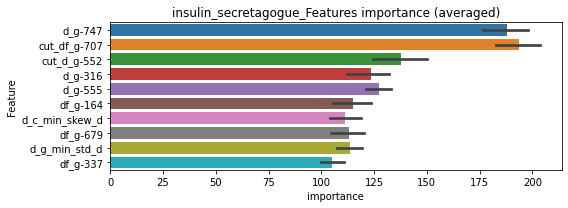

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000455702	valid_1's binary_logloss: 0.00820511


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000460758	valid_1's binary_logloss: 0.00278896


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000474269	valid_1's binary_logloss: 0.0010263


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000460113	valid_1's binary_logloss: 0.00670956


insulin_secretagogue logloss: 0.004685635378804885


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284
target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345083	valid_1's binary_logloss: 0.0336344
[600]	training's binary_logloss: 0.000636325	valid_1's binary_logloss: 0.0288923
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000620402	valid_1's binary_logloss: 0.028801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350946	valid_1's binary_logloss: 0.0187545
[600]	training's binary_logloss: 0.000650194	valid_1's binary_logloss: 0.0109293
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000524984	valid_1's binary_logloss: 0.0104047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360581	valid_1's binary_logloss: 0.00961141
[600]	training's binary_logloss: 0.000671185	valid_1's binary_logloss: 0.00349542
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000528766	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0038048, Threshold: 0.0097442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, conf_0:0.00682, conf_1:0.01267
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0097442
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_2: 0.0497442
threshold: 0.0497442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033779	valid_1's binary_logloss: 0.0194897
[600]	training's binary_logloss: 0.000630328	valid_1's binary_logloss: 0.0127592
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00051956	valid_1's binary_logloss: 0.0124076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334998	valid_1's binary_logloss: 0.0119856
[600]	training's binary_logloss: 0.000644816	valid_1's binary_logloss: 0.00487759
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000527672	valid_1's binary_logloss: 0.00444681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340788	valid_1's binary_logloss: 0.011209
[600]	training's binary_logloss: 0.000645751	valid_1's binary_logloss: 0.0048669
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000521715	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0152976, Threshold: 0.0497442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0025113 Vs.target_rate: 0.00214
Num_p_label: 10.0, conf_0:0.03980, conf_1:0.05969
threshold: 0.0497442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00326603	valid_1's binary_logloss: 0.0177947
[600]	training's binary_logloss: 0.000618213	valid_1's binary_logloss: 0.0113259
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000526831	valid_1's binary_logloss: 0.0111347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321559	valid_1's binary_logloss: 0.0174327
[600]	training's binary_logloss: 0.000614085	valid_1's binary_logloss: 0.0114267
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000572718	valid_1's binary_logloss: 0.0113647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328266	valid_1's binary_logloss: 0.0193537
[600]	training's binary_logloss: 0.000621216	valid_1's binary_logloss: 0.0129992
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000533762	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0206834, Threshold: 0.0497442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0022602 Vs.target_rate: 0.00214
Num_p_label: 9.0, conf_0:0.04477, conf_1:0.05472
threshold: 0.0497442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


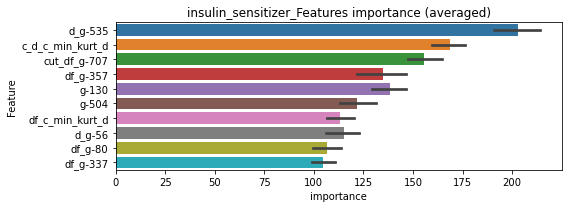

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000542188	valid_1's binary_logloss: 0.0104831


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000779433	valid_1's binary_logloss: 0.0120912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000555937	valid_1's binary_logloss: 0.011168


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000626159	valid_1's binary_logloss: 0.00617042


insulin_sensitizer logloss: 0.009978848210245379


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313925	valid_1's binary_logloss: 0.0181506
[600]	training's binary_logloss: 0.000589085	valid_1's binary_logloss: 0.0116566
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000539308	valid_1's binary_logloss: 0.0114975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311537	valid_1's binary_logloss: 0.0120671
[600]	training's binary_logloss: 0.000593015	valid_1's binary_logloss: 0.00584231
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000497283	valid_1's binary_logloss: 0.00566048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00337197	valid_1's binary_logloss: 0.00788085
[600]	training's binary_logloss: 0.000612194	valid_1's binary_logloss: 0.00291394
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00051587	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0040675, Threshold: 0.0129560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.00907, conf_1:0.01684
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0129560
Num_p_label: 2.0, Expected: 7.0, Adj_threshold_2: 0.0529560
threshold: 0.0529560, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281908	valid_1's binary_logloss: 0.0168489
[600]	training's binary_logloss: 0.000560621	valid_1's binary_logloss: 0.0110646
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506026	valid_1's binary_logloss: 0.0109312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296967	valid_1's binary_logloss: 0.0111227
[600]	training's binary_logloss: 0.000580157	valid_1's binary_logloss: 0.00550338
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000515846	valid_1's binary_logloss: 0.0054066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322206	valid_1's binary_logloss: 0.00734661
[600]	training's binary_logloss: 0.000608687	valid_1's binary_logloss: 0.00271997
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000501948	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0559620, Threshold: 0.0529560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, conf_0:0.04236, conf_1:0.06355
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.0529560
threshold: 0.0529560, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281908	valid_1's binary_logloss: 0.0168489
[600]	training's binary_logloss: 0.000560621	valid_1's binary_logloss: 0.0110646
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506026	valid_1's binary_logloss: 0.0109312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296967	valid_1's binary_logloss: 0.0111227
[600]	training's binary_logloss: 0.000580157	valid_1's binary_logloss: 0.00550338
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000515846	valid_1's binary_logloss: 0.0054066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322206	valid_1's binary_logloss: 0.00734661
[600]	training's binary_logloss: 0.000608687	valid_1's binary_logloss: 0.00271997
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000501948	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0559620, Threshold: 0.0529560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, conf_0:0.04766, conf_1:0.05825
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.0529560
threshold: 0.0529560, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


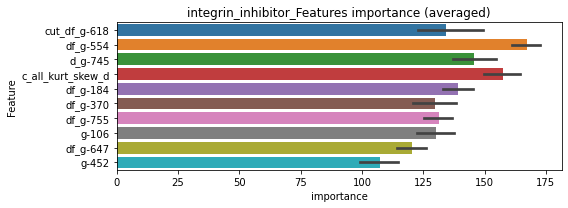

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000582002	valid_1's binary_logloss: 0.00952235


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000523342	valid_1's binary_logloss: 0.0049157


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000550884	valid_1's binary_logloss: 0.00318534


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000495766	valid_1's binary_logloss: 0.00664356
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000496322	valid_1's binary_logloss: 0.00664207


integrin_inhibitor logloss: 0.0060683276904976045


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273
target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0088791	valid_1's binary_logloss: 0.0628471
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00150433	valid_1's binary_logloss: 0.0522567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00844797	valid_1's binary_logloss: 0.0631657
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00248108	valid_1's binary_logloss: 0.0566968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0082659	valid_1's binary_logloss: 0.0376795
[600]	training's binary_logloss: 0.00133229	valid_1's binary_logloss: 0.0241912
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000886885	valid_1's binary_logloss: 0.0227914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946455	valid_1's binary_logloss: 0.0503804
[600]	traini

1 / 3 AUC score:0.996
y_Threshold: 0.0126736, Threshold: 0.0747433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, conf_0:0.05232, conf_1:0.09717
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0747433
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_2: 0.1147433
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_3: 0.1547433
Num_p_label: 20.0, Expected: 15.4, Adj_threshold_4: 0.1947433
threshold: 0.1947433, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713366	valid_1's binary_logloss: 0.0494549
[600]	training's binary_logloss: 0.00118582	valid_1's binary_logloss: 0.0377467
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.0011109	valid_1's binary_logloss: 0.0374256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723016	valid_1's binary_logloss: 0.0355368
[600]	training's binary_logloss: 0.00119948	valid_1's binary_logloss: 0.0216352
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000796571	valid_1's binary_logloss: 0.0202871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727723	valid_1's binary_logloss: 0.0307148
[600]	training's binary_logloss: 0.00122663	valid_1's binary_logloss: 0.0179676
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000808614	valid_1's binary_logloss: 0

2 / 3 AUC score:0.999
y_Threshold: 0.0356850, Threshold: 0.1947433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0102963 Vs.target_rate: 0.00386
Num_p_label: 41.0, conf_0:0.15579, conf_1:0.23369
Num_p_label: 41.0, Expected: 15.4, Adj_threshold_1: 0.1947433
Num_p_label: 39.0, Expected: 15.4, Adj_threshold_2: 0.2347433
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_3: 0.2747433
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_4: 0.3147433
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_5: 0.3547433
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_6: 0.3947433
threshold: 0.3947433, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065795	valid_1's binary_logloss: 0.046046
[600]	training's binary_logloss: 0.00113936	valid_1's binary_logloss: 0.0332141
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000765714	valid_1's binary_logloss: 0.0324057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699635	valid_1's binary_logloss: 0.0435919
[600]	training's binary_logloss: 0.0011565	valid_1's binary_logloss: 0.0303032
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000833833	valid_1's binary_logloss: 0.029309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721979	valid_1's binary_logloss: 0.0383865
[600]	training's binary_logloss: 0.00120381	valid_1's binary_logloss: 0.0276409
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00111034	valid_1's binary_logloss: 0.02

3 / 3 AUC score:0.999
y_Threshold: 0.0345969, Threshold: 0.3947433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 634.0/3755
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, conf_0:0.35527, conf_1:0.43422
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_1: 0.3947433
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_2: 0.4347433
threshold: 0.4347433, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 634.0/3755, y_label_rate: 0.1688415


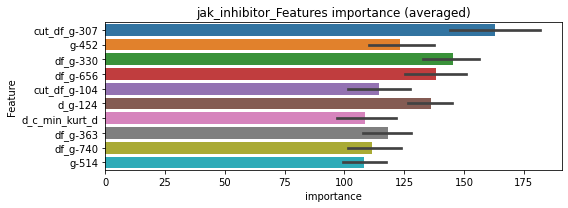

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 jak_inhibitor=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00166342	valid_1's binary_logloss: 0.0298782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000963254	valid_1's binary_logloss: 0.0245335


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00110803	valid_1's binary_logloss: 0.0223189


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000847795	valid_1's binary_logloss: 0.0180019


jak_inhibitor logloss: 0.023684639659930055


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248
target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0352982	valid_1's binary_logloss: 0.251067
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0317465	valid_1's binary_logloss: 0.248949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.034057	valid_1's binary_logloss: 0.255958
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0280426	valid_1's binary_logloss: 0.254467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0385592	valid_1's binary_logloss: 0.216849
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.0173963	valid_1's binary_logloss: 0.20626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369839	valid_1's binary_logloss: 0.216503


1 / 3 AUC score:0.916
y_Threshold: 0.0754368, Threshold: 0.5531602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 401 → Positive_corect_labels: 514/3496
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, conf_0:0.38721, conf_1:0.71911
threshold: 0.5531602, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0239727	valid_1's binary_logloss: 0.212376


positive_y_label: 514.0/3496, y_label_rate: 0.1470252
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157633	valid_1's binary_logloss: 0.156589
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00878481	valid_1's binary_logloss: 0.152021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171247	valid_1's binary_logloss: 0.149631
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00487848	valid_1's binary_logloss: 0.142256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169688	valid_1's binary_logloss: 0.148723
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00704847	valid_1's binary_logloss: 0.143648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174613	valid_1's binary_logloss: 0.127397
[600]	training's binary_logloss: 0.00272186	valid_1's binary_logloss: 0.109385
Early stopping, best it

2 / 3 AUC score:0.981
y_Threshold: 0.0600119, Threshold: 0.5531602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 465.0/3398
p_label_rate: 0.0210949 Vs.target_rate: 0.01146
Num_p_label: 84.0, conf_0:0.44253, conf_1:0.66379
Num_p_label: 84.0, Expected: 45.6, Adj_threshold_1: 0.5531602
Num_p_label: 79.0, Expected: 45.6, Adj_threshold_2: 0.5931602
Num_p_label: 74.0, Expected: 45.6, Adj_threshold_3: 0.6331602
Num_p_label: 70.0, Expected: 45.6, Adj_threshold_4: 0.6731602
Num_p_label: 62.0, Expected: 45.6, Adj_threshold_5: 0.7131602
threshold: 0.7131602, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 465.0/3398, y_label_rate: 0.1368452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123399	valid_1's binary_logloss: 0.146236
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00514201	valid_1's binary_logloss: 0.141658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134689	valid_1's binary_logloss: 0.106135
[600]	training's binary_logloss: 0.00214806	valid_1's binary_logloss: 0.0925849
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00193494	valid_1's binary_logloss: 0.0921294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128318	valid_1's binary_logloss: 0.122617
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00935574	valid_1's binary_logloss: 0.120251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136639	valid_1's binary_logloss: 0.110454
[600]	training's bina

3 / 3 AUC score:0.990
y_Threshold: 0.0507980, Threshold: 0.7131602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 433.0/3334
p_label_rate: 0.0210949 Vs.target_rate: 0.01146
Num_p_label: 84.0, conf_0:0.50000, conf_1:0.78448
Num_p_label: 84.0, Expected: 45.6, Adj_threshold_1: 0.7131602
Num_p_label: 77.0, Expected: 45.6, Adj_threshold_2: 0.7531602
Num_p_label: 71.0, Expected: 45.6, Adj_threshold_3: 0.7931602
Num_p_label: 58.0, Expected: 45.6, Adj_threshold_4: 0.8331602
threshold: 0.8331602, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 433.0/3334, y_label_rate: 0.1298740


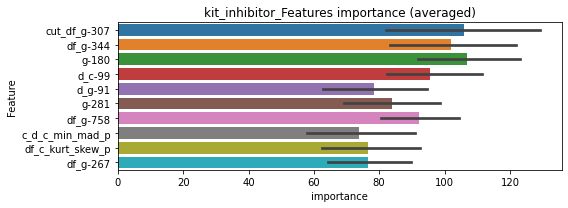

len(train_index) : 2500
len(valid_index) : 834
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2500
len(valid_index) : 834
================================= fold 2/4 kit_inhibitor=================================


Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00570904	valid_1's binary_logloss: 0.118397
Training until validation scores don't improve for 30 rounds


len(train_index) : 2501
len(valid_index) : 833
================================= fold 3/4 kit_inhibitor=================================


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00307701	valid_1's binary_logloss: 0.0805167
Training until validation scores don't improve for 30 rounds


len(train_index) : 2501
len(valid_index) : 833
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.0063128	valid_1's binary_logloss: 0.0991657
Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.09599128744369545


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00362437	valid_1's binary_logloss: 0.0858771
neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353237	valid_1's binary_logloss: 0.000650035
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00017153	valid_1's binary_logloss: 0.000340758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000350611	valid_1's binary_logloss: 0.00126564
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000177989	valid_1's binary_logloss: 0.00101323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000356627	valid_1's binary_logloss: 0.000392566
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000173151	valid_1's binary_logloss: 0.00019079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353184	valid_1's binary_logloss: 0.000448399


1 / 3 AUC score:1.000
y_Threshold: 0.0004621, Threshold: 0.0013715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00096, conf_1:0.00178
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013715
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0413715
threshold: 0.0413715, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000176121	valid_1's binary_logloss: 0.000241028


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328813	valid_1's binary_logloss: 0.000355076
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000162482	valid_1's binary_logloss: 0.000175243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322794	valid_1's binary_logloss: 0.00131652
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000165738	valid_1's binary_logloss: 0.00108618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000331521	valid_1's binary_logloss: 0.000349811
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000161011	valid_1's binary_logloss: 0.000171394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325553	valid_1's binary_logloss: 0.00037263


2 / 3 AUC score:1.000
y_Threshold: 0.0946065, Threshold: 0.0413715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, conf_0:0.03310, conf_1:0.04965
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0413715
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0813715
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1213715
threshold: 0.1213715, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000160829	valid_1's binary_logloss: 0.000186782


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328813	valid_1's binary_logloss: 0.000355076
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000162482	valid_1's binary_logloss: 0.000175243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322794	valid_1's binary_logloss: 0.00131652
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000165738	valid_1's binary_logloss: 0.00108618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000331521	valid_1's binary_logloss: 0.000349811
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000161011	valid_1's binary_logloss: 0.000171394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325553	valid_1's binary_logloss: 0.00037263


3 / 3 AUC score:1.000
y_Threshold: 0.0946065, Threshold: 0.1213715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.10923, conf_1:0.13351
threshold: 0.1213715, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000160829	valid_1's binary_logloss: 0.000186782


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


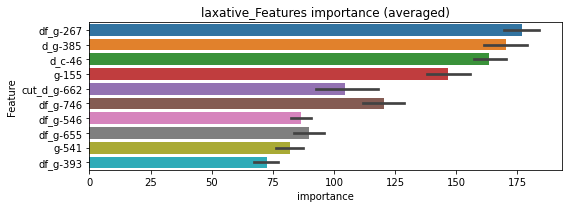

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000167877	valid_1's binary_logloss: 0.000180388
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000165528	valid_1's binary_logloss: 0.000177761


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000173597	valid_1's binary_logloss: 0.00190162
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166994	valid_1's binary_logloss: 0.000181953
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000165216	valid_1's binary_logloss: 0.000179996


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000168378	valid_1's binary_logloss: 0.000200065


laxative logloss: 0.0006135928812165414


Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000164354	valid_1's binary_logloss: 0.000195454
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036801	valid_1's binary_logloss: 0.000928196
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000185602	valid_1's binary_logloss: 0.000578891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364229	valid_1's binary_logloss: 0.00517317
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000182173	valid_1's binary_logloss: 0.00457468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000372253	valid_1's binary_logloss: 0.0004508
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000186288	valid_1's binary_logloss: 0.000227439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364734	valid_1's binary_logloss: 0.000543885


1 / 3 AUC score:1.000
y_Threshold: 0.0005679, Threshold: 0.0014871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00104, conf_1:0.00193
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0014871
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0414871
threshold: 0.0414871, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000182107	valid_1's binary_logloss: 0.000285804


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343188	valid_1's binary_logloss: 0.0010709
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00017282	valid_1's binary_logloss: 0.000834666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000341275	valid_1's binary_logloss: 0.00248104
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000176106	valid_1's binary_logloss: 0.00197226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000347922	valid_1's binary_logloss: 0.000381973
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000172608	valid_1's binary_logloss: 0.00019228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340942	valid_1's binary_logloss: 0.000393585


2 / 3 AUC score:1.000
y_Threshold: 0.0387201, Threshold: 0.0414871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, conf_0:0.03319, conf_1:0.04978
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0414871
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0814871
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1214871
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1614871
threshold: 0.1614871, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000172007	valid_1's binary_logloss: 0.000204789


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343188	valid_1's binary_logloss: 0.0010709
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00017282	valid_1's binary_logloss: 0.000834666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000341275	valid_1's binary_logloss: 0.00248104
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000176106	valid_1's binary_logloss: 0.00197226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000347922	valid_1's binary_logloss: 0.000381973
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000172608	valid_1's binary_logloss: 0.00019228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340942	valid_1's binary_logloss: 0.000393585


3 / 3 AUC score:1.000
y_Threshold: 0.0387201, Threshold: 0.1614871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.14534, conf_1:0.17764
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1614871


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000172007	valid_1's binary_logloss: 0.000204789


threshold: 0.1614871, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


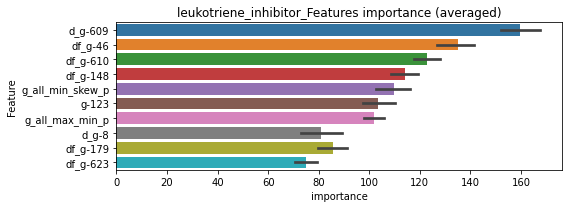

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000176234	valid_1's binary_logloss: 0.000659711
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173495	valid_1's binary_logloss: 0.000596503
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000172344	valid_1's binary_logloss: 0.000594089


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


[1000]	training's binary_logloss: 0.000175	valid_1's binary_logloss: 0.000207738
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000175	valid_1's binary_logloss: 0.000207738
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000174018	valid_1's binary_logloss: 0.000207998
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.0001724	valid_1's binary_logloss: 0.000206147


leukotriene_inhibitor logloss: 0.000417059845401737


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390394	valid_1's binary_logloss: 0.0421447
[600]	training's binary_logloss: 0.000781349	valid_1's binary_logloss: 0.0354298
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000667669	valid_1's binary_logloss: 0.0348224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003811	valid_1's binary_logloss: 0.0429951
[600]	training's binary_logloss: 0.000771157	valid_1's binary_logloss: 0.0363716
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000689829	valid_1's binary_logloss: 0.0359345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448968	valid_1's binary_logloss: 0.0125567
[600]	training's binary_logloss: 0.000834568	valid_1's binary_logloss: 0.00648511
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000635968	valid_1's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0043839, Threshold: 0.0108233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.00758, conf_1:0.01407
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0108233
Num_p_label: 1.0, Expected: 10.4, Adj_threshold_2: 0.0508233
threshold: 0.0508233, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037925	valid_1's binary_logloss: 0.0332001
[600]	training's binary_logloss: 0.000768357	valid_1's binary_logloss: 0.0273426
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000790234	valid_1's binary_logloss: 0.0272279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038996	valid_1's binary_logloss: 0.0293879
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00105552	valid_1's binary_logloss: 0.023365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396659	valid_1's binary_logloss: 0.0250937
[600]	training's binary_logloss: 0.000782407	valid_1's binary_logloss: 0.0177354
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000604146	valid_1's binary_logloss: 0.0172202
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0179702, Threshold: 0.0508233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0015068 Vs.target_rate: 0.00260
Num_p_label: 6.0, conf_0:0.04066, conf_1:0.06099
Num_p_label: 6.0, Expected: 10.4, Adj_threshold_1: 0.0508233
threshold: 0.0508233, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378929	valid_1's binary_logloss: 0.0222413
[600]	training's binary_logloss: 0.000768163	valid_1's binary_logloss: 0.0156145
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000697131	valid_1's binary_logloss: 0.0153718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00369646	valid_1's binary_logloss: 0.0335749
[600]	training's binary_logloss: 0.000749497	valid_1's binary_logloss: 0.0277776
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000775804	valid_1's binary_logloss: 0.0276918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401799	valid_1's binary_logloss: 0.0221379
[600]	training's binary_logloss: 0.000791458	valid_1's binary_logloss: 0.017308
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000675281	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0141589, Threshold: 0.0508233, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, conf_0:0.04574, conf_1:0.05591
threshold: 0.0508233, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


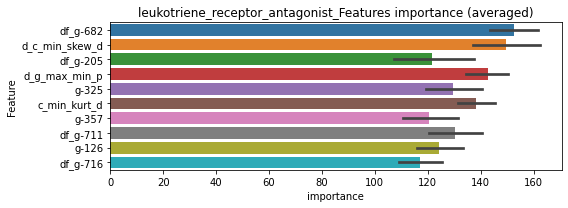

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000624353	valid_1's binary_logloss: 0.0146472


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000717671	valid_1's binary_logloss: 0.0156571


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00116159	valid_1's binary_logloss: 0.0210158
Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.019059693240201937


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000835141	valid_1's binary_logloss: 0.0249211
neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000603162	valid_1's binary_logloss: 0.00546201
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000259634	valid_1's binary_logloss: 0.00476096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000634566	valid_1's binary_logloss: 0.00178898
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000248476	valid_1's binary_logloss: 0.000902595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641438	valid_1's binary_logloss: 0.000971094
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000257837	valid_1's binary_logloss: 0.000419349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000630715	valid_1's binary_logloss: 0.00354635


1 / 3 AUC score:1.000
y_Threshold: 0.0008772, Threshold: 0.0025003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00175, conf_1:0.00325
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0025003
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0425003
threshold: 0.0425003, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000246691	valid_1's binary_logloss: 0.00239226


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570267	valid_1's binary_logloss: 0.00761526
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000261021	valid_1's binary_logloss: 0.0067152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000605192	valid_1's binary_logloss: 0.00153779
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000238032	valid_1's binary_logloss: 0.000761108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616581	valid_1's binary_logloss: 0.000656599
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000250087	valid_1's binary_logloss: 0.000274298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059083	valid_1's binary_logloss: 0.00149947


2 / 3 AUC score:1.000
y_Threshold: 0.0159716, Threshold: 0.0425003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, conf_0:0.03400, conf_1:0.05100
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0425003
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0825003
threshold: 0.0825003, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000237731	valid_1's binary_logloss: 0.000848064


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570267	valid_1's binary_logloss: 0.00761526
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000261021	valid_1's binary_logloss: 0.0067152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000605192	valid_1's binary_logloss: 0.00153779
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000238032	valid_1's binary_logloss: 0.000761108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000616581	valid_1's binary_logloss: 0.000656599
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000250087	valid_1's binary_logloss: 0.000274298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059083	valid_1's binary_logloss: 0.00149947


3 / 3 AUC score:1.000
y_Threshold: 0.0159716, Threshold: 0.0825003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.07425, conf_1:0.09075
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0825003
threshold: 0.0825003, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000237731	valid_1's binary_logloss: 0.000848064
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000237731	valid_1's binary_logloss: 0.000848064


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


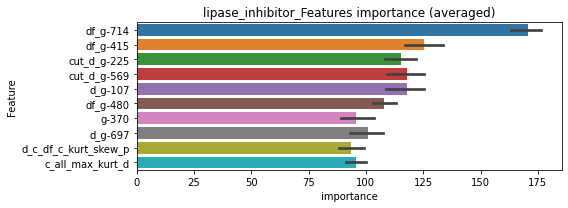

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000260658	valid_1's binary_logloss: 0.00371267


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000246	valid_1's binary_logloss: 0.000447716
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000248109	valid_1's binary_logloss: 0.000291146


len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


lipase_inhibitor logloss: 0.0012685981888012495


Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000243405	valid_1's binary_logloss: 0.000620295
neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439453	valid_1's binary_logloss: 0.0283289
[600]	training's binary_logloss: 0.000807528	valid_1's binary_logloss: 0.0206814
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000768431	valid_1's binary_logloss: 0.0205787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441319	valid_1's binary_logloss: 0.0266939
[600]	training's binary_logloss: 0.000812789	valid_1's binary_logloss: 0.0172452
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000623071	valid_1's binary_logloss: 0.0164874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461015	valid_1's binary_logloss: 0.0155114
[600]	training's binary_logloss: 0.000856286	valid_1's binary_logloss: 0.00876516
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000693036	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0057618, Threshold: 0.0464632, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.03252, conf_1:0.06040
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0464632
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_2: 0.0864632
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1264632
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_4: 0.1664632
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_5: 0.2064632
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_6: 0.2464632
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_7: 0.2864632
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_8: 0.3264632
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_9: 0.3664632
threshold: 0.3664632, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403122	valid_1's binary_logloss: 0.0249334
[600]	training's binary_logloss: 0.000770652	valid_1's binary_logloss: 0.0162834
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000562466	valid_1's binary_logloss: 0.0156325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396607	valid_1's binary_logloss: 0.0197617
[600]	training's binary_logloss: 0.000774587	valid_1's binary_logloss: 0.0125341
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000583401	valid_1's binary_logloss: 0.0118946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004066	valid_1's binary_logloss: 0.0179401
[600]	training's binary_logloss: 0.000777487	valid_1's binary_logloss: 0.0107436
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000714077	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0328273, Threshold: 0.3664632, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0082873 Vs.target_rate: 0.00256
Num_p_label: 33.0, conf_0:0.29317, conf_1:0.43976
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_1: 0.3664632
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.4064632
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_3: 0.4464632
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_4: 0.4864632
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_5: 0.5264632
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_6: 0.5664632
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_7: 0.6064632
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_8: 0.6464632
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_9: 0.6864632
threshold: 0.6864632, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393795	valid_1's binary_logloss: 0.0280992
[600]	training's binary_logloss: 0.000764227	valid_1's binary_logloss: 0.0211614
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000671429	valid_1's binary_logloss: 0.0210419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403503	valid_1's binary_logloss: 0.0208096
[600]	training's binary_logloss: 0.000771611	valid_1's binary_logloss: 0.0129639
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000616441	valid_1's binary_logloss: 0.0124919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402301	valid_1's binary_logloss: 0.0185177
[600]	training's binary_logloss: 0.000769748	valid_1's binary_logloss: 0.0107021
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000551844	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0287726, Threshold: 0.6864632, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0037670 Vs.target_rate: 0.00256
Num_p_label: 15.0, conf_0:0.50000, conf_1:0.75511
threshold: 0.6864632, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


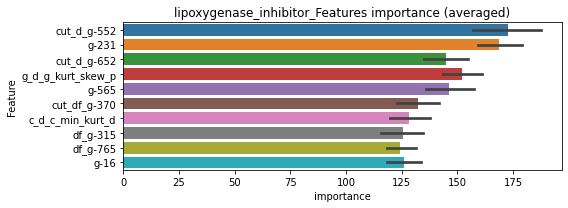

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000611253	valid_1's binary_logloss: 0.00873215


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000608911	valid_1's binary_logloss: 0.0124112


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00100821	valid_1's binary_logloss: 0.0135111


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00079874	valid_1's binary_logloss: 0.0142239


lipoxygenase_inhibitor logloss: 0.012218716944661688


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376414	valid_1's binary_logloss: 0.000646309
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000185285	valid_1's binary_logloss: 0.000369042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365735	valid_1's binary_logloss: 0.0015679
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000182165	valid_1's binary_logloss: 0.00110988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000377671	valid_1's binary_logloss: 0.00045553
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000187647	valid_1's binary_logloss: 0.000238649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000380076	valid_1's binary_logloss: 0.0024311


1 / 3 AUC score:1.000
y_Threshold: 0.0005568, Threshold: 0.0025146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00176, conf_1:0.00327
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0025146
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0425146
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.0825146
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.1225146
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_5: 0.1625146
threshold: 0.1625146, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000187532	valid_1's binary_logloss: 0.0019397


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343293	valid_1's binary_logloss: 0.000922804
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000172495	valid_1's binary_logloss: 0.00066288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340003	valid_1's binary_logloss: 0.00079267
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000168411	valid_1's binary_logloss: 0.000501669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.000370114
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00017214	valid_1's binary_logloss: 0.000182872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000345853	valid_1's binary_logloss: 0.00162022


2 / 3 AUC score:1.000
y_Threshold: 0.0661387, Threshold: 0.1625146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, conf_0:0.13001, conf_1:0.19502
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.1625146
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.2025146
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_3: 0.2425146
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_4: 0.2825146
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.3225146
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.3625146
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.4025146
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4425146
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4825146
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5225146


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000172091	valid_1's binary_logloss: 0.00122235


threshold: 0.5625146, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343293	valid_1's binary_logloss: 0.000922804
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000172495	valid_1's binary_logloss: 0.00066288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000340003	valid_1's binary_logloss: 0.00079267
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000168411	valid_1's binary_logloss: 0.000501669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.000370114
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00017214	valid_1's binary_logloss: 0.000182872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000345853	valid_1's binary_logloss: 0.00162022


3 / 3 AUC score:1.000
y_Threshold: 0.0661387, Threshold: 0.5625146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.50000, conf_1:0.61877
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5625146
threshold: 0.5625146, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000172091	valid_1's binary_logloss: 0.00122235


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


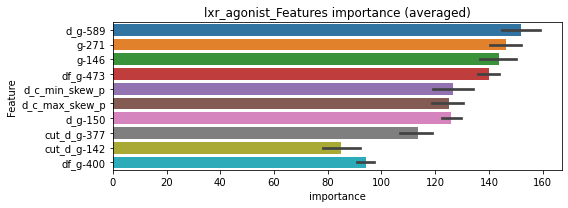

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173027	valid_1's binary_logloss: 0.000491089
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000172161	valid_1's binary_logloss: 0.000489625


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173569	valid_1's binary_logloss: 0.000483849
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000173	valid_1's binary_logloss: 0.000482446


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000173783	valid_1's binary_logloss: 0.000183667
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000171673	valid_1's binary_logloss: 0.000181427


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172258	valid_1's binary_logloss: 0.000558628
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.000172086	valid_1's binary_logloss: 0.000558506


lxr_agonist logloss: 0.00042800095685439926


neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207696	valid_1's binary_logloss: 0.012719
[600]	training's binary_logloss: 0.000461976	valid_1's binary_logloss: 0.00876306
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00044327	valid_1's binary_logloss: 0.00873484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223471	valid_1's binary_logloss: 0.00635359
[600]	training's binary_logloss: 0.000477057	valid_1's binary_logloss: 0.00282581
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000473997	valid_1's binary_logloss: 0.0028218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220669	valid_1's binary_logloss: 0.00555098
[600]	training's binary_logloss: 0.000482762	valid_1's binary_logloss: 0.00230732
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000453311	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0031696, Threshold: 0.0482526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.03378, conf_1:0.06273
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0482526
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_2: 0.0882526
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_3: 0.1282526
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_4: 0.1682526
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_5: 0.2082526
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_6: 0.2482526
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_7: 0.2882526
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_8: 0.3282526
threshold: 0.3282526, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191379	valid_1's binary_logloss: 0.0111156
[600]	training's binary_logloss: 0.000445538	valid_1's binary_logloss: 0.00773764
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000433693	valid_1's binary_logloss: 0.00770987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195429	valid_1's binary_logloss: 0.0049697
[600]	training's binary_logloss: 0.000453997	valid_1's binary_logloss: 0.00216176
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000437079	valid_1's binary_logloss: 0.00213256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202527	valid_1's binary_logloss: 0.00411386
[600]	training's binary_logloss: 0.000457865	valid_1's binary_logloss: 0.00137562
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000452201	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0262073, Threshold: 0.3282526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0055249 Vs.target_rate: 0.00130
Num_p_label: 22.0, conf_0:0.26260, conf_1:0.39390
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_1: 0.3282526
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_2: 0.3682526
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_3: 0.4082526
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_4: 0.4482526
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_5: 0.4882526
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_6: 0.5282526
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_7: 0.5682526
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_8: 0.6082526
threshold: 0.6082526, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191379	valid_1's binary_logloss: 0.0111156
[600]	training's binary_logloss: 0.000445538	valid_1's binary_logloss: 0.00773764
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000433693	valid_1's binary_logloss: 0.00770987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195429	valid_1's binary_logloss: 0.0049697
[600]	training's binary_logloss: 0.000453997	valid_1's binary_logloss: 0.00216176
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000437079	valid_1's binary_logloss: 0.00213256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202527	valid_1's binary_logloss: 0.00411386
[600]	training's binary_logloss: 0.000457865	valid_1's binary_logloss: 0.00137562
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000452201	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0262073, Threshold: 0.6082526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, conf_0:0.50000, conf_1:0.66908
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.6082526
threshold: 0.6082526, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


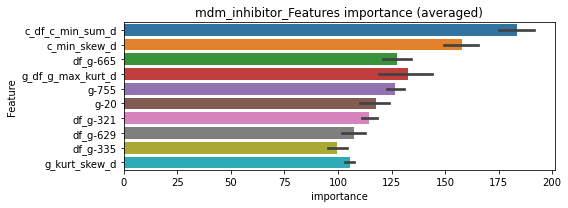

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000467975	valid_1's binary_logloss: 0.00496662


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000450892	valid_1's binary_logloss: 0.00218514


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000477504	valid_1's binary_logloss: 0.00132394


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000451164	valid_1's binary_logloss: 0.00183556


mdm_inhibitor logloss: 0.00257781567741077


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00681991	valid_1's binary_logloss: 0.042366
[600]	training's binary_logloss: 0.00106157	valid_1's binary_logloss: 0.0289422
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000790841	valid_1's binary_logloss: 0.0277559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715994	valid_1's binary_logloss: 0.0372208
[600]	training's binary_logloss: 0.00108682	valid_1's binary_logloss: 0.0229451
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000663154	valid_1's binary_logloss: 0.0211534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00743535	valid_1's binary_logloss: 0.0213724
[600]	training's binary_logloss: 0.00111427	valid_1's binary_logloss: 0.00777246
[900]	training's binary_logloss: 0.00065463	valid_1's binary_logloss: 0.00617497
Early stopping, best ite

1 / 3 AUC score:1.000
y_Threshold: 0.0066329, Threshold: 0.0178270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01248, conf_1:0.02318
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0178270
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_2: 0.0578270
threshold: 0.0578270, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 653.0/3793, y_label_rate: 0.1721592
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630552	valid_1's binary_logloss: 0.0284104
[600]	training's binary_logloss: 0.00102629	valid_1's binary_logloss: 0.0144069
[900]	training's binary_logloss: 0.000621644	valid_1's binary_logloss: 0.012629
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000627596	valid_1's binary_logloss: 0.0126037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633543	valid_1's binary_logloss: 0.0360968
[600]	training's binary_logloss: 0.00102209	valid_1's binary_logloss: 0.0223274
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00103968	valid_1's binary_logloss: 0.0222116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063425	valid_1's binary_logloss: 0.0336192
[600]	training's binary_logloss: 0.00102001	valid_1's binary_logloss: 0.0234342
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0265725, Threshold: 0.0578270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, conf_0:0.04626, conf_1:0.06939
threshold: 0.0578270, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642822	valid_1's binary_logloss: 0.0347329
[600]	training's binary_logloss: 0.00101689	valid_1's binary_logloss: 0.0219152
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000908111	valid_1's binary_logloss: 0.0214531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601617	valid_1's binary_logloss: 0.0279251
[600]	training's binary_logloss: 0.00100336	valid_1's binary_logloss: 0.0128875
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000629877	valid_1's binary_logloss: 0.010844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00596215	valid_1's binary_logloss: 0.0393944
[600]	training's binary_logloss: 0.00100583	valid_1's binary_logloss: 0.0286299
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000626765	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0279123, Threshold: 0.0578270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3781
p_label_rate: 0.0040181 Vs.target_rate: 0.00302
Num_p_label: 16.0, conf_0:0.05204, conf_1:0.06361
threshold: 0.0578270, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3781, y_label_rate: 0.1711188


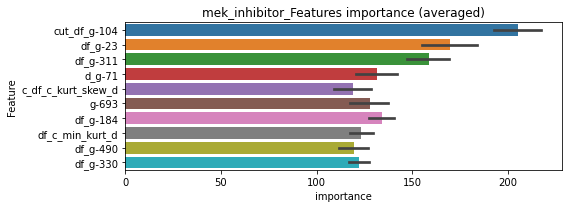

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000865912	valid_1's binary_logloss: 0.0166548


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00067124	valid_1's binary_logloss: 0.0120754
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000651941	valid_1's binary_logloss: 0.0119849


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000949073	valid_1's binary_logloss: 0.0215911


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000947171	valid_1's binary_logloss: 0.0247825


mek_inhibitor logloss: 0.018752749864649303


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054671	valid_1's binary_logloss: 0.030954
[600]	training's binary_logloss: 0.000980285	valid_1's binary_logloss: 0.0205459
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000723855	valid_1's binary_logloss: 0.0194907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555196	valid_1's binary_logloss: 0.0360861
[600]	training's binary_logloss: 0.000982879	valid_1's binary_logloss: 0.0246828
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000675013	valid_1's binary_logloss: 0.0238301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556975	valid_1's binary_logloss: 0.0363363
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00109208	valid_1's binary_logloss: 0.0291278
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0065232, Threshold: 0.0152581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.01068, conf_1:0.01984
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0152581
Num_p_label: 3.0, Expected: 12.4, Adj_threshold_2: 0.0552581
threshold: 0.0552581, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527606	valid_1's binary_logloss: 0.0322035
[600]	training's binary_logloss: 0.000943818	valid_1's binary_logloss: 0.021808
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000672934	valid_1's binary_logloss: 0.020872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503092	valid_1's binary_logloss: 0.0387512
[600]	training's binary_logloss: 0.000928419	valid_1's binary_logloss: 0.0286047
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000709081	valid_1's binary_logloss: 0.0279899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482144	valid_1's binary_logloss: 0.037355
[600]	training's binary_logloss: 0.000902797	valid_1's binary_logloss: 0.0285422
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000762865	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0204070, Threshold: 0.0552581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3789
p_label_rate: 0.0015068 Vs.target_rate: 0.00311
Num_p_label: 6.0, conf_0:0.04421, conf_1:0.06631
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0552581
threshold: 0.0552581, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473946	valid_1's binary_logloss: 0.0286942
[600]	training's binary_logloss: 0.000892063	valid_1's binary_logloss: 0.0182248
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000657036	valid_1's binary_logloss: 0.0167581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048345	valid_1's binary_logloss: 0.0324545
[600]	training's binary_logloss: 0.000902765	valid_1's binary_logloss: 0.0241598
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000678711	valid_1's binary_logloss: 0.0233602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466878	valid_1's binary_logloss: 0.0383659
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00174798	valid_1's binary_logloss: 0.0345396
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0248761, Threshold: 0.0552581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0025113 Vs.target_rate: 0.00311
Num_p_label: 10.0, conf_0:0.04973, conf_1:0.06078
threshold: 0.0552581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 648.0/3785, y_label_rate: 0.1712021


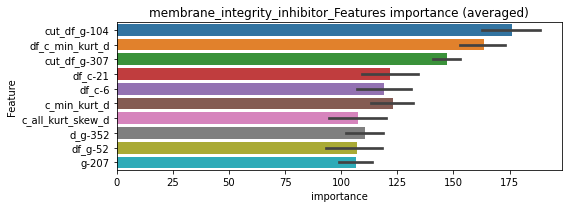

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00112326	valid_1's binary_logloss: 0.0228622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000856216	valid_1's binary_logloss: 0.0351857


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000903059	valid_1's binary_logloss: 0.0224291


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00129106	valid_1's binary_logloss: 0.0283421


membrane_integrity_inhibitor logloss: 0.02720364752484573


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156639	valid_1's binary_logloss: 0.00407663
[600]	training's binary_logloss: 0.000384473	valid_1's binary_logloss: 0.00173591
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00038103	valid_1's binary_logloss: 0.00172941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157183	valid_1's binary_logloss: 0.00449405
[600]	training's binary_logloss: 0.0003833	valid_1's binary_logloss: 0.00204863
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000379852	valid_1's binary_logloss: 0.00203815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161068	valid_1's binary_logloss: 0.00478751
[600]	training's binary_logloss: 0.000387375	valid_1's binary_logloss: 0.00244673
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000387375	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0019923, Threshold: 0.0051361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00360, conf_1:0.00668
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0051361
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0451361


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000412169	valid_1's binary_logloss: 0.00745615


threshold: 0.0451361, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014756	valid_1's binary_logloss: 0.00376169
[600]	training's binary_logloss: 0.000370171	valid_1's binary_logloss: 0.00148832
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000371714	valid_1's binary_logloss: 0.00148674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150885	valid_1's binary_logloss: 0.00375156
[600]	training's binary_logloss: 0.000379477	valid_1's binary_logloss: 0.00153123
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000381313	valid_1's binary_logloss: 0.00152695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154629	valid_1's binary_logloss: 0.00416551
[600]	training's binary_logloss: 0.000386169	valid_1's binary_logloss: 0.00225076
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000388906	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0184260, Threshold: 0.0451361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, conf_0:0.03611, conf_1:0.05416


[600]	training's binary_logloss: 0.000375624	valid_1's binary_logloss: 0.00735602
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000386415	valid_1's binary_logloss: 0.00735168


threshold: 0.0451361, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014756	valid_1's binary_logloss: 0.00376169
[600]	training's binary_logloss: 0.000370171	valid_1's binary_logloss: 0.00148832
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000371714	valid_1's binary_logloss: 0.00148674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150885	valid_1's binary_logloss: 0.00375156
[600]	training's binary_logloss: 0.000379477	valid_1's binary_logloss: 0.00153123
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000381313	valid_1's binary_logloss: 0.00152695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154629	valid_1's binary_logloss: 0.00416551
[600]	training's binary_logloss: 0.000386169	valid_1's binary_logloss: 0.00225076
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000388906	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0184260, Threshold: 0.0451361, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, conf_0:0.04062, conf_1:0.04965


[600]	training's binary_logloss: 0.000375624	valid_1's binary_logloss: 0.00735602
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000386415	valid_1's binary_logloss: 0.00735168


threshold: 0.0451361, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


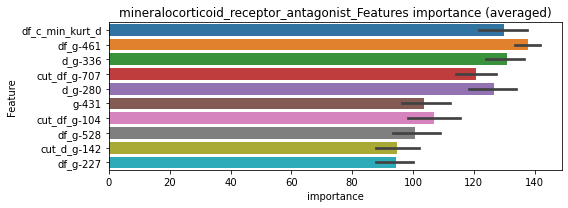

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000380033	valid_1's binary_logloss: 0.00149959


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000398295	valid_1's binary_logloss: 0.00207683


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000401193	valid_1's binary_logloss: 0.00139766


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0026682515912128807


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000422586	valid_1's binary_logloss: 0.00570211


neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000630741	valid_1's binary_logloss: 0.00266072
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000254257	valid_1's binary_logloss: 0.0018024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000637355	valid_1's binary_logloss: 0.00447973
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000259574	valid_1's binary_logloss: 0.00318523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064891	valid_1's binary_logloss: 0.00118934
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000258338	valid_1's binary_logloss: 0.000536014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000631411	valid_1's binary_logloss: 0.00123146


1 / 3 AUC score:1.000
y_Threshold: 0.0010231, Threshold: 0.0023352, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00163, conf_1:0.00304
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0023352
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0423352
threshold: 0.0423352, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000259893	valid_1's binary_logloss: 0.000610631


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571881	valid_1's binary_logloss: 0.0027163
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000246401	valid_1's binary_logloss: 0.00204408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000584573	valid_1's binary_logloss: 0.00286232
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000244562	valid_1's binary_logloss: 0.00198494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609279	valid_1's binary_logloss: 0.000657118
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00025304	valid_1's binary_logloss: 0.000278092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000585777	valid_1's binary_logloss: 0.00116724


2 / 3 AUC score:1.000
y_Threshold: 0.0569588, Threshold: 0.0423352, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, conf_0:0.03387, conf_1:0.05080
threshold: 0.0423352, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000242562	valid_1's binary_logloss: 0.000574889


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571881	valid_1's binary_logloss: 0.0027163
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000246401	valid_1's binary_logloss: 0.00204408
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000584573	valid_1's binary_logloss: 0.00286232
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000244562	valid_1's binary_logloss: 0.00198494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609279	valid_1's binary_logloss: 0.000657118
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00025304	valid_1's binary_logloss: 0.000278092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000585777	valid_1's binary_logloss: 0.00116724


3 / 3 AUC score:1.000
y_Threshold: 0.0569588, Threshold: 0.0423352, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, conf_0:0.03810, conf_1:0.04657


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000242562	valid_1's binary_logloss: 0.000574889


threshold: 0.0423352, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


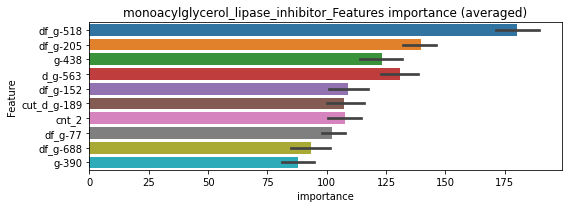

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000243592	valid_1's binary_logloss: 0.00148251
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000245729	valid_1's binary_logloss: 0.000900016
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000250718	valid_1's binary_logloss: 0.000292043
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0007893829101654101


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000251501	valid_1's binary_logloss: 0.000482066
neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280
target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752108	valid_1's binary_logloss: 0.0635411
[600]	training's binary_logloss: 0.00124056	valid_1's binary_logloss: 0.052049
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.0013329	valid_1's binary_logloss: 0.0518341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897539	valid_1's binary_logloss: 0.0551114
[600]	training's binary_logloss: 0.00134106	valid_1's binary_logloss: 0.0443447
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00126528	valid_1's binary_logloss: 0.0440187
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835978	valid_1's binary_logloss: 0.0368305
[600]	training's binary_logloss: 0.00132991	valid_1's binary_logloss: 0.0245759
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00119535	valid_1's binary_logloss: 0.02

1 / 3 AUC score:0.998
y_Threshold: 0.0103124, Threshold: 0.0281961, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, conf_0:0.01974, conf_1:0.03665
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0281961
Num_p_label: 12.0, Expected: 14.2, Adj_threshold_2: 0.0681961
threshold: 0.0681961, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727018	valid_1's binary_logloss: 0.0458118
[600]	training's binary_logloss: 0.00119135	valid_1's binary_logloss: 0.0317997
[900]	training's binary_logloss: 0.000679113	valid_1's binary_logloss: 0.0306473
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000665959	valid_1's binary_logloss: 0.0305256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671021	valid_1's binary_logloss: 0.0482239
[600]	training's binary_logloss: 0.00115838	valid_1's binary_logloss: 0.0343423
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000860376	valid_1's binary_logloss: 0.0335366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705317	valid_1's binary_logloss: 0.0469265
[600]	training's binary_logloss: 0.00119062	valid_1's binary_logloss: 0.0358088
Early stopping, best ite

2 / 3 AUC score:1.000
y_Threshold: 0.0307527, Threshold: 0.0681961, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0047715 Vs.target_rate: 0.00357
Num_p_label: 19.0, conf_0:0.05456, conf_1:0.08184
threshold: 0.0681961, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 647.0/3786, y_label_rate: 0.1708928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00666653	valid_1's binary_logloss: 0.0591941
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00139678	valid_1's binary_logloss: 0.0520787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00678725	valid_1's binary_logloss: 0.0426926
[600]	training's binary_logloss: 0.00114531	valid_1's binary_logloss: 0.0315923
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000783731	valid_1's binary_logloss: 0.0306595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697746	valid_1's binary_logloss: 0.0430815
[600]	training's binary_logloss: 0.0011709	valid_1's binary_logloss: 0.0325224
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000929672	valid_1's binary_logloss: 0.0321599
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:0.998
y_Threshold: 0.0240529, Threshold: 0.0681961, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0050226 Vs.target_rate: 0.00357
Num_p_label: 20.0, conf_0:0.06138, conf_1:0.07502
threshold: 0.0681961, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 639.0/3770, y_label_rate: 0.1694960


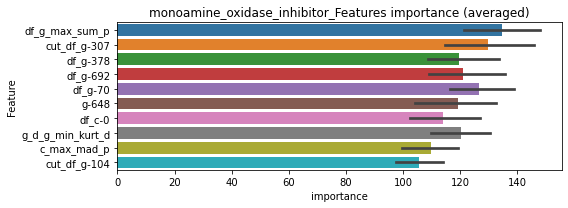

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00189523	valid_1's binary_logloss: 0.0410769
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00162509	valid_1's binary_logloss: 0.0497857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000781124	valid_1's binary_logloss: 0.0245404


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00135003	valid_1's binary_logloss: 0.0273793


monoamine_oxidase_inhibitor logloss: 0.035700756603624324


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108006	valid_1's binary_logloss: 0.00447069
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000354775	valid_1's binary_logloss: 0.00336989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107887	valid_1's binary_logloss: 0.00469963
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000343799	valid_1's binary_logloss: 0.0027812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110416	valid_1's binary_logloss: 0.00317294
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000344591	valid_1's binary_logloss: 0.00174838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110278	valid_1's binary_logloss: 0.00381019


1 / 3 AUC score:1.000
y_Threshold: 0.0017827, Threshold: 0.0220913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.01546, conf_1:0.02872
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0220913
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0620913
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1020913


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000351431	valid_1's binary_logloss: 0.00207987


threshold: 0.1020913, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102942	valid_1's binary_logloss: 0.00186473
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000336999	valid_1's binary_logloss: 0.000746732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100605	valid_1's binary_logloss: 0.00328812
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000328408	valid_1's binary_logloss: 0.00168019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104837	valid_1's binary_logloss: 0.00274887
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332844	valid_1's binary_logloss: 0.00148232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101429	valid_1's binary_logloss: 0.00371335


2 / 3 AUC score:1.000
y_Threshold: 0.0779897, Threshold: 0.1020913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, conf_0:0.08167, conf_1:0.12251
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.1020913
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_2: 0.1420913
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.1820913
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.2220913
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2620913
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.3020913
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_7: 0.3420913
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_8: 0.3820913
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4220913


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000333736	valid_1's binary_logloss: 0.00203472


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.4620913
threshold: 0.4620913, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102942	valid_1's binary_logloss: 0.00186473
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000336999	valid_1's binary_logloss: 0.000746732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100605	valid_1's binary_logloss: 0.00328812
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000328408	valid_1's binary_logloss: 0.00168019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104837	valid_1's binary_logloss: 0.00274887
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332844	valid_1's binary_logloss: 0.00148232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101429	valid_1's binary_logloss: 0.00371335


3 / 3 AUC score:1.000
y_Threshold: 0.0779897, Threshold: 0.4620913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.41588, conf_1:0.50830
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4620913
threshold: 0.4620913, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000333736	valid_1's binary_logloss: 0.00203472


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


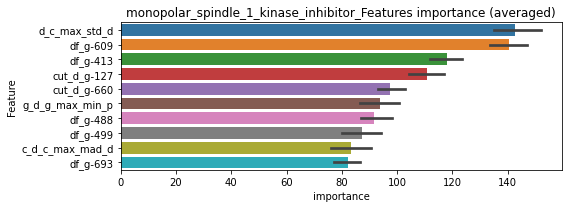

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000339357	valid_1's binary_logloss: 0.000854625


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000335193	valid_1's binary_logloss: 0.0013658


================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000340729	valid_1's binary_logloss: 0.00159018


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000336378	valid_1's binary_logloss: 0.00167534


monopolar_spindle_1_kinase_inhibitor logloss: 0.0013720682586733524


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269
target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147865	valid_1's binary_logloss: 0.11714
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00385673	valid_1's binary_logloss: 0.104698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145032	valid_1's binary_logloss: 0.0925314
[600]	training's binary_logloss: 0.00209589	valid_1's binary_logloss: 0.0744818
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00152323	valid_1's binary_logloss: 0.0734716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149966	valid_1's binary_logloss: 0.0968477
[600]	training's binary_logloss: 0.00212584	valid_1's binary_logloss: 0.0752429
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00167585	valid_1's binary_logloss: 0.0734424
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.990
y_Threshold: 0.0228136, Threshold: 0.3306903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 634/3752
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, conf_0:0.23148, conf_1:0.42990
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3306903
Num_p_label: 34.0, Expected: 21.7, Adj_threshold_2: 0.3706903
Num_p_label: 27.0, Expected: 21.7, Adj_threshold_3: 0.4106903
threshold: 0.4106903, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 634.0/3752, y_label_rate: 0.1689765
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123113	valid_1's binary_logloss: 0.0790464
[600]	training's binary_logloss: 0.00184143	valid_1's binary_logloss: 0.058799
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00170639	valid_1's binary_logloss: 0.0582745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117987	valid_1's binary_logloss: 0.0986037
[600]	training's binary_logloss: 0.00182205	valid_1's binary_logloss: 0.0805469
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00182887	valid_1's binary_logloss: 0.0804803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128185	valid_1's binary_logloss: 0.0809757
[600]	training's binary_logloss: 0.00190942	valid_1's binary_logloss: 0.0603539
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00203876	valid_1's binary_logloss: 0.0601

2 / 3 AUC score:0.994
y_Threshold: 0.0463849, Threshold: 0.4106903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 611.0/3706
p_label_rate: 0.0148167 Vs.target_rate: 0.00546
Num_p_label: 59.0, conf_0:0.32855, conf_1:0.49283
Num_p_label: 59.0, Expected: 21.7, Adj_threshold_1: 0.4106903
Num_p_label: 55.0, Expected: 21.7, Adj_threshold_2: 0.4506903
Num_p_label: 46.0, Expected: 21.7, Adj_threshold_3: 0.4906903
Num_p_label: 42.0, Expected: 21.7, Adj_threshold_4: 0.5306903
Num_p_label: 41.0, Expected: 21.7, Adj_threshold_5: 0.5706903
Num_p_label: 37.0, Expected: 21.7, Adj_threshold_6: 0.6106903
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_7: 0.6506903
threshold: 0.6506903, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 611.0/3706, y_label_rate: 0.1648678
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106041	valid_1's binary_logloss: 0.0583801
[600]	training's binary_logloss: 0.00167415	valid_1's binary_logloss: 0.035697
[900]	training's binary_logloss: 0.000860826	valid_1's binary_logloss: 0.0326083
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000837226	valid_1's binary_logloss: 0.032369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105846	valid_1's binary_logloss: 0.0748964
[600]	training's binary_logloss: 0.00166004	valid_1's binary_logloss: 0.0507892
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.00101949	valid_1's binary_logloss: 0.0480086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104552	valid_1's binary_logloss: 0.0762316
[600]	training's binary_logloss: 0.00166009	valid_1's binary_logloss: 0.0562894
Early stopping, best iteration

3 / 3 AUC score:0.998
y_Threshold: 0.0432655, Threshold: 0.6506903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 600.0/3684
p_label_rate: 0.0123054 Vs.target_rate: 0.00546
Num_p_label: 49.0, conf_0:0.50000, conf_1:0.71576
Num_p_label: 49.0, Expected: 21.7, Adj_threshold_1: 0.6506903
Num_p_label: 43.0, Expected: 21.7, Adj_threshold_2: 0.6906903
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_3: 0.7306903
Num_p_label: 35.0, Expected: 21.7, Adj_threshold_4: 0.7706903
Num_p_label: 28.0, Expected: 21.7, Adj_threshold_5: 0.8106903
threshold: 0.8106903, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 600.0/3684, y_label_rate: 0.1628664


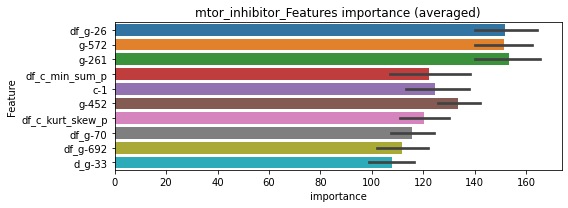

len(train_index) : 2763
len(valid_index) : 921
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2763
len(valid_index) : 921
================================= fold 2/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0020713	valid_1's binary_logloss: 0.0491517
Training until validation scores don't improve for 30 rounds


len(train_index) : 2763
len(valid_index) : 921
================================= fold 3/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00168224	valid_1's binary_logloss: 0.0651673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00120928	valid_1's binary_logloss: 0.0470293


len(train_index) : 2763
len(valid_index) : 921
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00130866	valid_1's binary_logloss: 0.0363061


mtor_inhibitor logloss: 0.049413591078053


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336045	valid_1's binary_logloss: 0.0134313
[600]	training's binary_logloss: 0.000649944	valid_1's binary_logloss: 0.00623536
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000523666	valid_1's binary_logloss: 0.00578836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323462	valid_1's binary_logloss: 0.0160609
[600]	training's binary_logloss: 0.0006386	valid_1's binary_logloss: 0.00941703
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000542579	valid_1's binary_logloss: 0.00915859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340965	valid_1's binary_logloss: 0.0149285
[600]	training's binary_logloss: 0.000660874	valid_1's binary_logloss: 0.00756689
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00054449	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0041008, Threshold: 0.0747553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.05233, conf_1:0.09718
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0747553
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_2: 0.1147553
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_3: 0.1547553
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_4: 0.1947553
threshold: 0.1947553, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00305712	valid_1's binary_logloss: 0.0120937
[600]	training's binary_logloss: 0.000615392	valid_1's binary_logloss: 0.00541731
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000515452	valid_1's binary_logloss: 0.00512946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317452	valid_1's binary_logloss: 0.0139584
[600]	training's binary_logloss: 0.000622177	valid_1's binary_logloss: 0.00754439
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000518919	valid_1's binary_logloss: 0.00733638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309116	valid_1's binary_logloss: 0.0128986
[600]	training's binary_logloss: 0.000618299	valid_1's binary_logloss: 0.00598131
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522342	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1621549, Threshold: 0.1947553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0175791 Vs.target_rate: 0.00202
Num_p_label: 70.0, conf_0:0.15580, conf_1:0.23371
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.1947553
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_2: 0.2347553
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_3: 0.2747553
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_4: 0.3147553
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_5: 0.3547553
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_6: 0.3947553
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_7: 0.4347553
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_8: 0.4747553
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_9: 0.5147553
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_10: 0.5547553
threshold: 0.5947553, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295047	valid_1's binary_logloss: 0.0140869
[600]	training's binary_logloss: 0.000595333	valid_1's binary_logloss: 0.00698266
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000562165	valid_1's binary_logloss: 0.00689245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311144	valid_1's binary_logloss: 0.0106064
[600]	training's binary_logloss: 0.000621792	valid_1's binary_logloss: 0.00535102
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000539337	valid_1's binary_logloss: 0.00507733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003053	valid_1's binary_logloss: 0.0102914
[600]	training's binary_logloss: 0.000615069	valid_1's binary_logloss: 0.00511988
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000518825	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1640343, Threshold: 0.5947553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3807
p_label_rate: 0.0092918 Vs.target_rate: 0.00202
Num_p_label: 37.0, conf_0:0.50000, conf_1:0.65423
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_1: 0.5947553
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.6347553
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_3: 0.6747553
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.7147553
threshold: 0.7147553, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3807, y_label_rate: 0.1717888


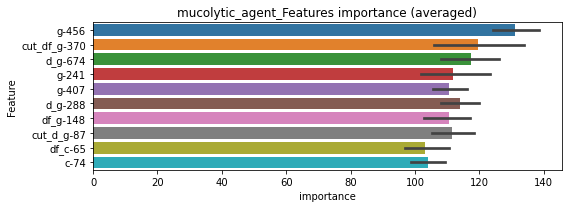

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000545416	valid_1's binary_logloss: 0.005346


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000538582	valid_1's binary_logloss: 0.00457451


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000527121	valid_1's binary_logloss: 0.00522259


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000546622	valid_1's binary_logloss: 0.00636603


mucolytic_agent logloss: 0.005379440523650227


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212383	valid_1's binary_logloss: 0.0142321
[600]	training's binary_logloss: 0.000480616	valid_1's binary_logloss: 0.00976196
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000482629	valid_1's binary_logloss: 0.00974824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226202	valid_1's binary_logloss: 0.00808329
[600]	training's binary_logloss: 0.000510834	valid_1's binary_logloss: 0.00421088
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000470597	valid_1's binary_logloss: 0.00409407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223669	valid_1's binary_logloss: 0.0103919
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000551919	valid_1's binary_logloss: 0.00750052
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0032781, Threshold: 0.0112536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00788, conf_1:0.01463
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0112536
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0512536
threshold: 0.0512536, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207014	valid_1's binary_logloss: 0.011732
[600]	training's binary_logloss: 0.000475194	valid_1's binary_logloss: 0.00787437
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000458261	valid_1's binary_logloss: 0.007821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214022	valid_1's binary_logloss: 0.0067094
[600]	training's binary_logloss: 0.000488321	valid_1's binary_logloss: 0.00301868
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000478415	valid_1's binary_logloss: 0.00299116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219158	valid_1's binary_logloss: 0.00868096
[600]	training's binary_logloss: 0.000492714	valid_1's binary_logloss: 0.00604972
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000513987	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0353616, Threshold: 0.0512536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, conf_0:0.04100, conf_1:0.06150
threshold: 0.0512536, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207014	valid_1's binary_logloss: 0.011732
[600]	training's binary_logloss: 0.000475194	valid_1's binary_logloss: 0.00787437
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000458261	valid_1's binary_logloss: 0.007821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214022	valid_1's binary_logloss: 0.0067094
[600]	training's binary_logloss: 0.000488321	valid_1's binary_logloss: 0.00301868
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000478415	valid_1's binary_logloss: 0.00299116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219158	valid_1's binary_logloss: 0.00868096
[600]	training's binary_logloss: 0.000492714	valid_1's binary_logloss: 0.00604972
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000513987	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0353616, Threshold: 0.0512536, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, conf_0:0.04613, conf_1:0.05638
threshold: 0.0512536, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


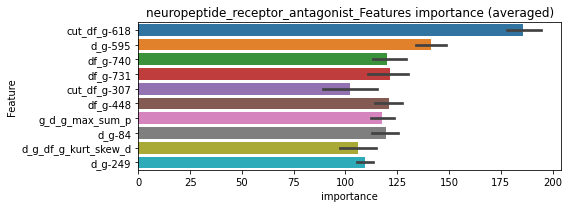

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000513779	valid_1's binary_logloss: 0.00937013


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000464287	valid_1's binary_logloss: 0.003446


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000640938	valid_1's binary_logloss: 0.00725018
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.00047415	valid_1's binary_logloss: 0.00720676


neuropeptide_receptor_antagonist logloss: 0.006819821538739444


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173
target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.467849	valid_1's binary_logloss: 0.508539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.426039	valid_1's binary_logloss: 0.50607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[56]	training's binary_logloss: 0.372433	valid_1's binary_logloss: 0.507025
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.539
y_Threshold: 0.2174219, Threshold: 0.4521732, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1378 → Positive_corect_labels: 252/2627
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, conf_0:0.31652, conf_1:0.58783
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4521732
Num_p_label: 87.0, Expected: 139.1, Adj_threshold_2: 0.4221732
Num_p_label: 123.0, Expected: 139.1, Adj_threshold_3: 0.3921732
Num_p_label: 139.0, Expected: 139.1, Adj_threshold_4: 0.3621732
Num_p_label: 143.0, Expected: 139.1, Adj_threshold_5: 0.3321732
Num_p_label: 152.0, Expected: 139.1, Adj_threshold_6: 0.3021732
Num_p_label: 201.0, Expected: 139.1, Adj_threshold_7: 0.2721732
Num_p_label: 376.0, Expected: 139.1, Adj_threshold_8: 0.2421732
threshold: 0.2421732, positive_p_label: 376.0/3982, p_label_rate: 0.0944249


Early stopping, best iteration is:
[21]	training's binary_logloss: 0.453777	valid_1's binary_logloss: 0.507171


positive_y_label: 252.0/2627, y_label_rate: 0.0959269
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.121036	valid_1's binary_logloss: 0.262163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[84]	training's binary_logloss: 0.095073	valid_1's binary_logloss: 0.260365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	training's binary_logloss: 0.128056	valid_1's binary_logloss: 0.24684
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.802
y_Threshold: 0.1324881, Threshold: 0.2421732, pos_neg_ratio: 0.7377876
Remove_noisy_data: 286 → Positive_corect_labels: 109.0/2341
p_label_rate: 0.0883978 Vs.target_rate: 0.03494
Num_p_label: 352.0, conf_0:0.19374, conf_1:0.29061
Num_p_label: 352.0, Expected: 139.1, Adj_threshold_1: 0.2421732
Num_p_label: 305.0, Expected: 139.1, Adj_threshold_2: 0.2821732
Num_p_label: 276.0, Expected: 139.1, Adj_threshold_3: 0.3221732
Num_p_label: 251.0, Expected: 139.1, Adj_threshold_4: 0.3621732
Num_p_label: 231.0, Expected: 139.1, Adj_threshold_5: 0.4021732
Num_p_label: 215.0, Expected: 139.1, Adj_threshold_6: 0.4421732
Num_p_label: 203.0, Expected: 139.1, Adj_threshold_7: 0.4821732
Num_p_label: 190.0, Expected: 139.1, Adj_threshold_8: 0.5221732
Num_p_label: 181.0, Expected: 139.1, Adj_threshold_9: 0.5621732
Num_p_label: 176.0, Expected: 139.1, Adj_threshold_10: 0.6021732
threshold: 0.6421732, positive_p_label: 172.0/3982, p_label_rate: 0.0431944


Early stopping, best iteration is:
[81]	training's binary_logloss: 0.103736	valid_1's binary_logloss: 0.241886


positive_y_label: 109.0/2341, y_label_rate: 0.0465613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.0250208	valid_1's binary_logloss: 0.0843326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0127517	valid_1's binary_logloss: 0.0629477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00593229	valid_1's binary_logloss: 0.0499875
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.975
y_Threshold: 0.1045065, Threshold: 0.6421732, pos_neg_ratio: 0.7377876
Remove_noisy_data: 48 → Positive_corect_labels: 85.0/2293
p_label_rate: 0.0725766 Vs.target_rate: 0.03494
Num_p_label: 289.0, conf_0:0.50000, conf_1:0.70639
Num_p_label: 289.0, Expected: 139.1, Adj_threshold_1: 0.6421732
Num_p_label: 278.0, Expected: 139.1, Adj_threshold_2: 0.6821732
Num_p_label: 267.0, Expected: 139.1, Adj_threshold_3: 0.7221732
Num_p_label: 250.0, Expected: 139.1, Adj_threshold_4: 0.7621732
Num_p_label: 234.0, Expected: 139.1, Adj_threshold_5: 0.8021732
Num_p_label: 224.0, Expected: 139.1, Adj_threshold_6: 0.8421732
Num_p_label: 208.0, Expected: 139.1, Adj_threshold_7: 0.8821732
threshold: 0.8821732, positive_p_label: 208.0/3982, p_label_rate: 0.0522351


Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0125554	valid_1's binary_logloss: 0.0640753


positive_y_label: 85.0/2293, y_label_rate: 0.0370693


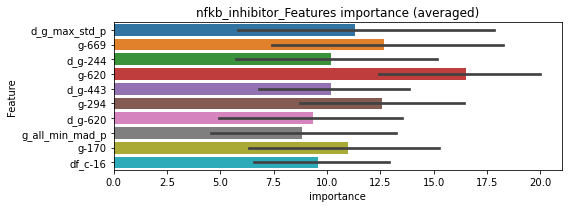

len(train_index) : 1719
len(valid_index) : 574
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1720
len(valid_index) : 573
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000718825	valid_1's binary_logloss: 0.0100663
Training until validation scores don't improve for 30 rounds


len(train_index) : 1720
len(valid_index) : 573
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[108]	training's binary_logloss: 0.00256755	valid_1's binary_logloss: 0.0222436
Training until validation scores don't improve for 30 rounds


len(train_index) : 1720
len(valid_index) : 573
================================= fold 4/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[38]	training's binary_logloss: 0.0108075	valid_1's binary_logloss: 0.0544637
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.02446321600028331


Early stopping, best iteration is:
[172]	training's binary_logloss: 0.0014955	valid_1's binary_logloss: 0.0111044
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000716181	valid_1's binary_logloss: 0.00436138
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000277671	valid_1's binary_logloss: 0.00297832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713111	valid_1's binary_logloss: 0.00210204
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00028092	valid_1's binary_logloss: 0.00133667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739859	valid_1's binary_logloss: 0.00113746
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000281171	valid_1's binary_logloss: 0.00048416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000716334	valid_1's binary_logloss: 0.00144479


1 / 3 AUC score:1.000
y_Threshold: 0.0011726, Threshold: 0.0045393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00318, conf_1:0.00590
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0045393
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0445393
threshold: 0.0445393, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000278909	valid_1's binary_logloss: 0.000715104


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000677651	valid_1's binary_logloss: 0.00455465
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000278588	valid_1's binary_logloss: 0.00340959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670436	valid_1's binary_logloss: 0.00190299
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000275369	valid_1's binary_logloss: 0.00125492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000681911	valid_1's binary_logloss: 0.000861634
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000274122	valid_1's binary_logloss: 0.00037803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662062	valid_1's binary_logloss: 0.00116493


2 / 3 AUC score:1.000
y_Threshold: 0.0416311, Threshold: 0.0445393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050
Num_p_label: 14.0, conf_0:0.03563, conf_1:0.05345
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0445393
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0845393
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_3: 0.1245393
threshold: 0.1245393, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000268198	valid_1's binary_logloss: 0.00057052


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000677651	valid_1's binary_logloss: 0.00455465
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000278588	valid_1's binary_logloss: 0.00340959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670436	valid_1's binary_logloss: 0.00190299
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000275369	valid_1's binary_logloss: 0.00125492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000681911	valid_1's binary_logloss: 0.000861634
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000274122	valid_1's binary_logloss: 0.00037803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662062	valid_1's binary_logloss: 0.00116493


3 / 3 AUC score:1.000
y_Threshold: 0.0416311, Threshold: 0.1245393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, conf_0:0.11209, conf_1:0.13699
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.1245393
threshold: 0.1245393, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000268198	valid_1's binary_logloss: 0.00057052


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


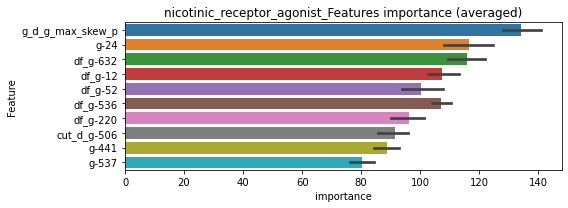

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000278713	valid_1's binary_logloss: 0.00155505
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000276245	valid_1's binary_logloss: 0.000940845


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00027797	valid_1's binary_logloss: 0.000411212
Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.0008495924280865298


[1000]	training's binary_logloss: 0.000271489	valid_1's binary_logloss: 0.000490407
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000271489	valid_1's binary_logloss: 0.000490407
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161755	valid_1's binary_logloss: 0.0109267
[600]	training's binary_logloss: 0.00040197	valid_1's binary_logloss: 0.00773874
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000407928	valid_1's binary_logloss: 0.00772404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164888	valid_1's binary_logloss: 0.00492313
[600]	training's binary_logloss: 0.000408052	valid_1's binary_logloss: 0.00206176
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000409318	valid_1's binary_logloss: 0.00205929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174492	valid_1's binary_logloss: 0.00421842
[600]	training's binary_logloss: 0.000407141	valid_1's binary_logloss: 0.00151933
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000401567	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026830, Threshold: 0.0395437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.02768, conf_1:0.05141
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0395437
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_2: 0.0795437
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_3: 0.1195437
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_4: 0.1595437
threshold: 0.1595437, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151684	valid_1's binary_logloss: 0.00749134
[600]	training's binary_logloss: 0.000388197	valid_1's binary_logloss: 0.00474713
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000395963	valid_1's binary_logloss: 0.00473165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153967	valid_1's binary_logloss: 0.00446973
[600]	training's binary_logloss: 0.000385342	valid_1's binary_logloss: 0.00184956
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000386478	valid_1's binary_logloss: 0.00184742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153249	valid_1's binary_logloss: 0.00345882
[600]	training's binary_logloss: 0.000385997	valid_1's binary_logloss: 0.00125571
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000384882	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0702043, Threshold: 0.1595437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0092918 Vs.target_rate: 0.00109


[600]	training's binary_logloss: 0.000397914	valid_1's binary_logloss: 0.00161411
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000397914	valid_1's binary_logloss: 0.00161411


Num_p_label: 37.0, conf_0:0.12763, conf_1:0.19145
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1595437
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_2: 0.1995437
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_3: 0.2395437
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2795437
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_5: 0.3195437
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3595437
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.3995437
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_8: 0.4395437
threshold: 0.4395437, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151684	valid_1's binary_logloss: 0.00749134
[600]	training's binary_logloss: 0.000388197	valid_1's binary_logloss: 0.00474713
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000395963	valid_1's binary_logloss: 0.00473165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153967	valid_1's binary_logloss: 0.00446973
[600]	training's binary_logloss: 0.000385342	valid_1's binary_logloss: 0.00184956
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000386478	valid_1's binary_logloss: 0.00184742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153249	valid_1's binary_logloss: 0.00345882
[600]	training's binary_logloss: 0.000385997	valid_1's binary_logloss: 0.00125571
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000384882	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0702043, Threshold: 0.4395437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.39559, conf_1:0.48350
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.4395437


[600]	training's binary_logloss: 0.000397914	valid_1's binary_logloss: 0.00161411
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000397914	valid_1's binary_logloss: 0.00161411


threshold: 0.4395437, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


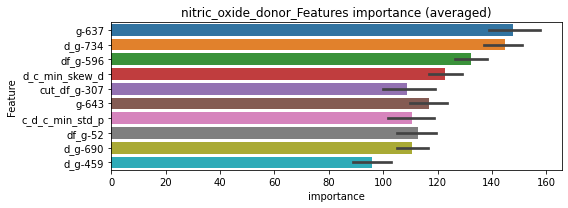

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000400247	valid_1's binary_logloss: 0.0043135


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.00039294	valid_1's binary_logloss: 0.00132204


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000398983	valid_1's binary_logloss: 0.00137923


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000399062	valid_1's binary_logloss: 0.00151225


nitric_oxide_donor logloss: 0.002132585945301534


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163256	valid_1's binary_logloss: 0.00822296
[600]	training's binary_logloss: 0.000401412	valid_1's binary_logloss: 0.00584929
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000411043	valid_1's binary_logloss: 0.00582582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162197	valid_1's binary_logloss: 0.00989838
[600]	training's binary_logloss: 0.000399419	valid_1's binary_logloss: 0.00628328
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000409903	valid_1's binary_logloss: 0.00624288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180981	valid_1's binary_logloss: 0.00369972
[600]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.0011608
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000410857	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0027981, Threshold: 0.0080462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00563, conf_1:0.01046
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0080462
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_2: 0.0480462
threshold: 0.0480462, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015886	valid_1's binary_logloss: 0.00692082
[600]	training's binary_logloss: 0.000393688	valid_1's binary_logloss: 0.00479803
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000388598	valid_1's binary_logloss: 0.00475075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015482	valid_1's binary_logloss: 0.00868486
[600]	training's binary_logloss: 0.000383146	valid_1's binary_logloss: 0.00525752
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000373925	valid_1's binary_logloss: 0.00522772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017025	valid_1's binary_logloss: 0.00331959
[600]	training's binary_logloss: 0.000404087	valid_1's binary_logloss: 0.00106466
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000394203	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0371693, Threshold: 0.0480462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, conf_0:0.03844, conf_1:0.05766
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0480462
threshold: 0.0480462, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015886	valid_1's binary_logloss: 0.00692082
[600]	training's binary_logloss: 0.000393688	valid_1's binary_logloss: 0.00479803
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000388598	valid_1's binary_logloss: 0.00475075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015482	valid_1's binary_logloss: 0.00868486
[600]	training's binary_logloss: 0.000383146	valid_1's binary_logloss: 0.00525752
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000373925	valid_1's binary_logloss: 0.00522772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017025	valid_1's binary_logloss: 0.00331959
[600]	training's binary_logloss: 0.000404087	valid_1's binary_logloss: 0.00106466
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000394203	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0371693, Threshold: 0.0480462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, conf_0:0.04324, conf_1:0.05285
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0480462
threshold: 0.0480462, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


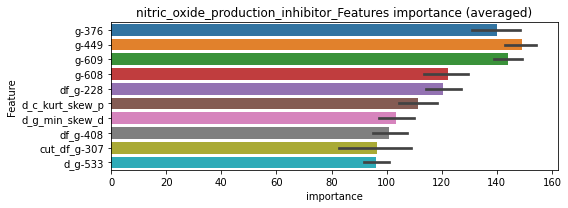

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000513969	valid_1's binary_logloss: 0.0053788
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000397617	valid_1's binary_logloss: 0.00425104


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000401067	valid_1's binary_logloss: 0.00104176


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000411498	valid_1's binary_logloss: 0.00218014


nitric_oxide_production_inhibitor logloss: 0.0032142583495087225


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170551	valid_1's binary_logloss: 0.00447332
[600]	training's binary_logloss: 0.000431511	valid_1's binary_logloss: 0.00194927
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000432782	valid_1's binary_logloss: 0.00194798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164875	valid_1's binary_logloss: 0.00709161
[600]	training's binary_logloss: 0.000416365	valid_1's binary_logloss: 0.00374192
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000416994	valid_1's binary_logloss: 0.00374067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174668	valid_1's binary_logloss: 0.00643814
[600]	training's binary_logloss: 0.000430723	valid_1's binary_logloss: 0.00352048
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000430723	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0025583, Threshold: 0.0221442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.01550, conf_1:0.02879
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0221442


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000441361	valid_1's binary_logloss: 0.00181751


Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0621442
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_3: 0.1021442
threshold: 0.1021442, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162352	valid_1's binary_logloss: 0.00381905
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000426844	valid_1's binary_logloss: 0.00153032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159757	valid_1's binary_logloss: 0.00587508
[600]	training's binary_logloss: 0.000415757	valid_1's binary_logloss: 0.00305845
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000415757	valid_1's binary_logloss: 0.00305845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160715	valid_1's binary_logloss: 0.00707261
[600]	training's binary_logloss: 0.000416716	valid_1's binary_logloss: 0.00420178
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000421951	valid_1's binary_logloss: 0.00419307
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0247025, Threshold: 0.1021442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00109
Num_p_label: 26.0, conf_0:0.08172, conf_1:0.12257
Num_p_label: 26.0, Expected: 4.3, Adj_threshold_1: 0.1021442


[600]	training's binary_logloss: 0.000411505	valid_1's binary_logloss: 0.00141458
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000411505	valid_1's binary_logloss: 0.00141458


Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.1421442
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1821442
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.2221442
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_5: 0.2621442
threshold: 0.2621442, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162352	valid_1's binary_logloss: 0.00381905
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000426844	valid_1's binary_logloss: 0.00153032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159757	valid_1's binary_logloss: 0.00587508
[600]	training's binary_logloss: 0.000415757	valid_1's binary_logloss: 0.00305845
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000415757	valid_1's binary_logloss: 0.00305845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160715	valid_1's binary_logloss: 0.00707261
[600]	training's binary_logloss: 0.000416716	valid_1's binary_logloss: 0.00420178
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000421951	valid_1's binary_logloss: 0.00419307
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0247025, Threshold: 0.2621442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, conf_0:0.23593, conf_1:0.28836
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.2621442


[600]	training's binary_logloss: 0.000411505	valid_1's binary_logloss: 0.00141458
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000411505	valid_1's binary_logloss: 0.00141458


threshold: 0.2621442, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


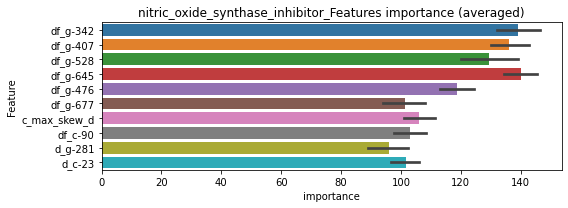

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000435129	valid_1's binary_logloss: 0.00152867


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000427512	valid_1's binary_logloss: 0.00235511


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000413806	valid_1's binary_logloss: 0.00274589


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000424345	valid_1's binary_logloss: 0.00139485


nitric_oxide_synthase_inhibitor logloss: 0.0020063839984864455


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427496	valid_1's binary_logloss: 0.00360199
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000209723	valid_1's binary_logloss: 0.00307441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00041847	valid_1's binary_logloss: 0.00398486
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000212086	valid_1's binary_logloss: 0.0030914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000433304	valid_1's binary_logloss: 0.0005128
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000208627	valid_1's binary_logloss: 0.000248876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000425967	valid_1's binary_logloss: 0.00154468


1 / 3 AUC score:1.000
y_Threshold: 0.0006783, Threshold: 0.0024797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00174, conf_1:0.00322
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0024797
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0424797
threshold: 0.0424797, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000210275	valid_1's binary_logloss: 0.000989113


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404868	valid_1's binary_logloss: 0.00336041
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000200898	valid_1's binary_logloss: 0.00282974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389081	valid_1's binary_logloss: 0.00576264
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000203149	valid_1's binary_logloss: 0.00502132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411801	valid_1's binary_logloss: 0.000424763
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000199685	valid_1's binary_logloss: 0.000212841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404075	valid_1's binary_logloss: 0.000408031


2 / 3 AUC score:1.000
y_Threshold: 0.0116955, Threshold: 0.0424797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00029
Num_p_label: 10.0, conf_0:0.03398, conf_1:0.05098
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_1: 0.0424797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0824797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1224797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.1624797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.2024797
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_6: 0.2424797
threshold: 0.2424797, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0002049	valid_1's binary_logloss: 0.000207233


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404868	valid_1's binary_logloss: 0.00336041
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000200898	valid_1's binary_logloss: 0.00282974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389081	valid_1's binary_logloss: 0.00576264
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000203149	valid_1's binary_logloss: 0.00502132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411801	valid_1's binary_logloss: 0.000424763
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000199685	valid_1's binary_logloss: 0.000212841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404075	valid_1's binary_logloss: 0.000408031


3 / 3 AUC score:1.000
y_Threshold: 0.0116955, Threshold: 0.2424797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, conf_0:0.21823, conf_1:0.26673
threshold: 0.2424797, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.0002049	valid_1's binary_logloss: 0.000207233


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


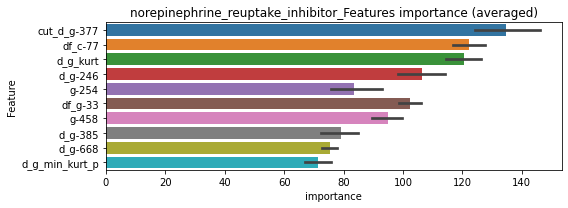

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00020668	valid_1's binary_logloss: 0.00185432
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000205124	valid_1's binary_logloss: 0.00254025
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00020653	valid_1's binary_logloss: 0.000243896
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0012126394171925812


Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000209336	valid_1's binary_logloss: 0.000210992
neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906737	valid_1's binary_logloss: 0.00150104
[600]	training's binary_logloss: 0.000300662	valid_1's binary_logloss: 0.00059318
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300662	valid_1's binary_logloss: 0.00059318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000877879	valid_1's binary_logloss: 0.00340967
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000312929	valid_1's binary_logloss: 0.00216343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000918922	valid_1's binary_logloss: 0.00143937
[600]	training's binary_logloss: 0.000308179	valid_1's binary_logloss: 0.0005621
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000308179	valid_1's binary_logloss: 0.0005621
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0014833, Threshold: 0.0040826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00286, conf_1:0.00531
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0040826
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0440826
threshold: 0.0440826, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000855841	valid_1's binary_logloss: 0.00145986
[600]	training's binary_logloss: 0.000294535	valid_1's binary_logloss: 0.000598161
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000294535	valid_1's binary_logloss: 0.000598161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00083924	valid_1's binary_logloss: 0.00274044
[600]	training's binary_logloss: 0.000295798	valid_1's binary_logloss: 0.00152928
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000297215	valid_1's binary_logloss: 0.00152716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860615	valid_1's binary_logloss: 0.00117994
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000301747	valid_1's binary_logloss: 0.000454234
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.1058675, Threshold: 0.0440826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03527, conf_1:0.05290
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0440826
threshold: 0.0440826, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000301859	valid_1's binary_logloss: 0.0013064


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000855841	valid_1's binary_logloss: 0.00145986
[600]	training's binary_logloss: 0.000294535	valid_1's binary_logloss: 0.000598161
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000294535	valid_1's binary_logloss: 0.000598161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00083924	valid_1's binary_logloss: 0.00274044
[600]	training's binary_logloss: 0.000295798	valid_1's binary_logloss: 0.00152928
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000297215	valid_1's binary_logloss: 0.00152716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860615	valid_1's binary_logloss: 0.00117994
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000301747	valid_1's binary_logloss: 0.000454234
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.1058675, Threshold: 0.0440826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03967, conf_1:0.04849
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0440826
threshold: 0.0440826, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000301859	valid_1's binary_logloss: 0.0013064


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


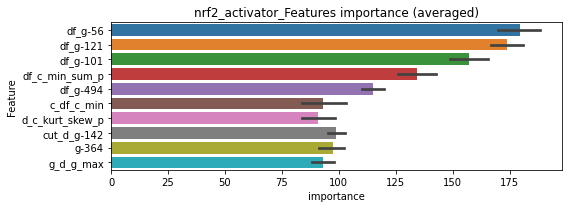

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299737	valid_1's binary_logloss: 0.00068057
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000299737	valid_1's binary_logloss: 0.00068057


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000305383	valid_1's binary_logloss: 0.00154773


================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000305661	valid_1's binary_logloss: 0.000440171


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000305445	valid_1's binary_logloss: 0.00104641


nrf2_activator logloss: 0.000928730226104825


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430804	valid_1's binary_logloss: 0.0312541
[600]	training's binary_logloss: 0.00079896	valid_1's binary_logloss: 0.0229236
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000723271	valid_1's binary_logloss: 0.022757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438337	valid_1's binary_logloss: 0.0311105
[600]	training's binary_logloss: 0.000826069	valid_1's binary_logloss: 0.0219847
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000779386	valid_1's binary_logloss: 0.0217962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476272	valid_1's binary_logloss: 0.0127094
[600]	training's binary_logloss: 0.000872329	valid_1's binary_logloss: 0.00582291
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000674042	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0051192, Threshold: 0.0145570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01019, conf_1:0.01892
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0145570
Num_p_label: 2.0, Expected: 10.2, Adj_threshold_2: 0.0545570
threshold: 0.0545570, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410104	valid_1's binary_logloss: 0.0326307
[600]	training's binary_logloss: 0.000773115	valid_1's binary_logloss: 0.0235938
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000741495	valid_1's binary_logloss: 0.0235228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400526	valid_1's binary_logloss: 0.0342977
[600]	training's binary_logloss: 0.000775353	valid_1's binary_logloss: 0.0258026
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000604508	valid_1's binary_logloss: 0.0251056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043739	valid_1's binary_logloss: 0.0123181
[600]	training's binary_logloss: 0.000817868	valid_1's binary_logloss: 0.00587376
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000620631	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0543356, Threshold: 0.0545570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0198393 Vs.target_rate: 0.00256
Num_p_label: 79.0, conf_0:0.04365, conf_1:0.06547
Num_p_label: 79.0, Expected: 10.2, Adj_threshold_1: 0.0545570
Num_p_label: 60.0, Expected: 10.2, Adj_threshold_2: 0.0945570
Num_p_label: 47.0, Expected: 10.2, Adj_threshold_3: 0.1345570
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_4: 0.1745570
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_5: 0.2145570
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_6: 0.2545570
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.2945570
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3345570
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3745570
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_10: 0.4145570
threshold: 0.4545570, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377809	valid_1's binary_logloss: 0.0304608
[600]	training's binary_logloss: 0.000744317	valid_1's binary_logloss: 0.0223191
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000725765	valid_1's binary_logloss: 0.0223064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376613	valid_1's binary_logloss: 0.0287473
[600]	training's binary_logloss: 0.000748973	valid_1's binary_logloss: 0.0199292
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000724084	valid_1's binary_logloss: 0.0197647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394465	valid_1's binary_logloss: 0.0197428
[600]	training's binary_logloss: 0.000764009	valid_1's binary_logloss: 0.0108205
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000595274	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0306620, Threshold: 0.4545570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00110988	valid_1's binary_logloss: 0.0255287


p_label_rate: 0.0055249 Vs.target_rate: 0.00256
Num_p_label: 22.0, conf_0:0.40910, conf_1:0.50001
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.4545570
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.4945570
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_3: 0.5345570
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_4: 0.5745570
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_5: 0.6145570
threshold: 0.6145570, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


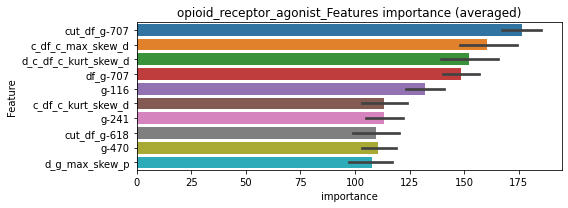

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000664062	valid_1's binary_logloss: 0.0117698


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000726269	valid_1's binary_logloss: 0.0103181


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000721755	valid_1's binary_logloss: 0.0160941


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.015377512107128302


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000882977	valid_1's binary_logloss: 0.0233372
neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760803	valid_1's binary_logloss: 0.0682313
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00145589	valid_1's binary_logloss: 0.0559672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00795988	valid_1's binary_logloss: 0.0512273
[600]	training's binary_logloss: 0.00132249	valid_1's binary_logloss: 0.0402683
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00134213	valid_1's binary_logloss: 0.0402037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00861079	valid_1's binary_logloss: 0.039178
[600]	training's binary_logloss: 0.00140376	valid_1's binary_logloss: 0.027339
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00108862	valid_1's binary_logloss: 0.0265687
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.998
y_Threshold: 0.0106043, Threshold: 0.0432962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3782


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00241835	valid_1's binary_logloss: 0.0540381


p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.03031, conf_1:0.05629
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0432962
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_2: 0.0832962
threshold: 0.0832962, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 647.0/3782, y_label_rate: 0.1710735
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067931	valid_1's binary_logloss: 0.0545895
[600]	training's binary_logloss: 0.00119564	valid_1's binary_logloss: 0.0422892
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00131617	valid_1's binary_logloss: 0.0422711
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693333	valid_1's binary_logloss: 0.0469363
[600]	training's binary_logloss: 0.00121687	valid_1's binary_logloss: 0.0356557
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00116416	valid_1's binary_logloss: 0.0355505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728701	valid_1's binary_logloss: 0.0546494
[600]	training's binary_logloss: 0.00122846	valid_1's binary_logloss: 0.0470755
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.0011899	valid_1's binary_logloss: 0.04

2 / 3 AUC score:0.999
y_Threshold: 0.0394226, Threshold: 0.0832962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0165746 Vs.target_rate: 0.00403
Num_p_label: 66.0, conf_0:0.06664, conf_1:0.09996
Num_p_label: 66.0, Expected: 16.1, Adj_threshold_1: 0.0832962
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_2: 0.1232962
Num_p_label: 44.0, Expected: 16.1, Adj_threshold_3: 0.1632962
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_4: 0.2032962
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_5: 0.2432962
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_6: 0.2832962
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_7: 0.3232962
threshold: 0.3232962, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062948	valid_1's binary_logloss: 0.0638088
[600]	training's binary_logloss: 0.00112837	valid_1's binary_logloss: 0.0548112
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00122293	valid_1's binary_logloss: 0.0546139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671674	valid_1's binary_logloss: 0.0438753
[600]	training's binary_logloss: 0.00117076	valid_1's binary_logloss: 0.0338417
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00105	valid_1's binary_logloss: 0.0334306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651755	valid_1's binary_logloss: 0.0451245
[600]	training's binary_logloss: 0.00115923	valid_1's binary_logloss: 0.0345187
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000920904	valid_1's binary_logloss: 0.033

3 / 3 AUC score:1.000
y_Threshold: 0.0450038, Threshold: 0.3232962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 632.0/3752
p_label_rate: 0.0065294 Vs.target_rate: 0.00403
Num_p_label: 26.0, conf_0:0.29097, conf_1:0.35563
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_1: 0.3232962
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.3632962
threshold: 0.3632962, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 632.0/3752, y_label_rate: 0.1684435


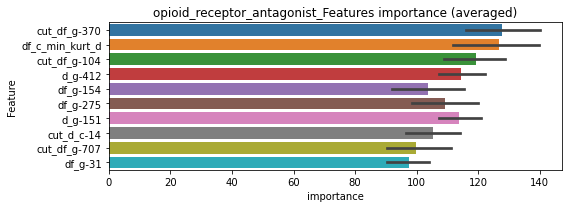

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000981553	valid_1's binary_logloss: 0.0331222


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00153616	valid_1's binary_logloss: 0.0439613
Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00154662	valid_1's binary_logloss: 0.0354058
Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.036015098040317245


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00122278	valid_1's binary_logloss: 0.0315711
neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232856	valid_1's binary_logloss: 0.0136474
[600]	training's binary_logloss: 0.00049964	valid_1's binary_logloss: 0.00945427
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000459107	valid_1's binary_logloss: 0.00932506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228735	valid_1's binary_logloss: 0.0127501
[600]	training's binary_logloss: 0.00049085	valid_1's binary_logloss: 0.00748605
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000488434	valid_1's binary_logloss: 0.00747055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250264	valid_1's binary_logloss: 0.00694171
[600]	training's binary_logloss: 0.000521814	valid_1's binary_logloss: 0.00334876
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000463662	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0032093, Threshold: 0.0089202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00624, conf_1:0.01160
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0089202
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0489202
threshold: 0.0489202, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215321	valid_1's binary_logloss: 0.0122831
[600]	training's binary_logloss: 0.000476664	valid_1's binary_logloss: 0.00817462
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000453795	valid_1's binary_logloss: 0.00809019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021998	valid_1's binary_logloss: 0.0121934
[600]	training's binary_logloss: 0.000478272	valid_1's binary_logloss: 0.00719798
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000461051	valid_1's binary_logloss: 0.00716168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225703	valid_1's binary_logloss: 0.0054964
[600]	training's binary_logloss: 0.000493677	valid_1's binary_logloss: 0.00231522
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000453369	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0242760, Threshold: 0.0489202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.03914, conf_1:0.05870
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0489202
threshold: 0.0489202, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215321	valid_1's binary_logloss: 0.0122831
[600]	training's binary_logloss: 0.000476664	valid_1's binary_logloss: 0.00817462
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000453795	valid_1's binary_logloss: 0.00809019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021998	valid_1's binary_logloss: 0.0121934
[600]	training's binary_logloss: 0.000478272	valid_1's binary_logloss: 0.00719798
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000461051	valid_1's binary_logloss: 0.00716168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225703	valid_1's binary_logloss: 0.0054964
[600]	training's binary_logloss: 0.000493677	valid_1's binary_logloss: 0.00231522
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000453369	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0242760, Threshold: 0.0489202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.04403, conf_1:0.05381
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0489202
threshold: 0.0489202, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


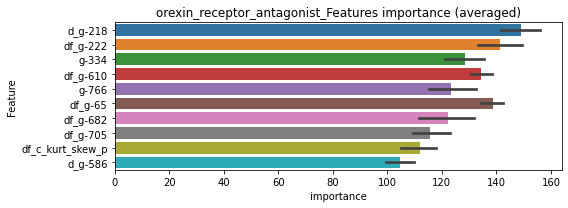

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000455396	valid_1's binary_logloss: 0.008535


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000458044	valid_1's binary_logloss: 0.00632826


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000459814	valid_1's binary_logloss: 0.00179741


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443938	valid_1's binary_logloss: 0.00150407
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000443938	valid_1's binary_logloss: 0.00150407


orexin_receptor_antagonist logloss: 0.004542332461247263


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455709	valid_1's binary_logloss: 0.0293394
[600]	training's binary_logloss: 0.000814214	valid_1's binary_logloss: 0.020057
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000683006	valid_1's binary_logloss: 0.0196824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495747	valid_1's binary_logloss: 0.0237738
[600]	training's binary_logloss: 0.000860042	valid_1's binary_logloss: 0.0143133
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000661734	valid_1's binary_logloss: 0.0137011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487755	valid_1's binary_logloss: 0.0194087
[600]	training's binary_logloss: 0.000874028	valid_1's binary_logloss: 0.0110848
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000613524	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0066950, Threshold: 0.0287360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.02012, conf_1:0.03736
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0287360
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.0687360
threshold: 0.0687360, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426853	valid_1's binary_logloss: 0.0251095
[600]	training's binary_logloss: 0.000807457	valid_1's binary_logloss: 0.0153033
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000741502	valid_1's binary_logloss: 0.0149858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425733	valid_1's binary_logloss: 0.0260865
[600]	training's binary_logloss: 0.000793813	valid_1's binary_logloss: 0.0192714
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000703108	valid_1's binary_logloss: 0.0190226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429627	valid_1's binary_logloss: 0.0202549
[600]	training's binary_logloss: 0.000810224	valid_1's binary_logloss: 0.012315
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000803163	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0333936, Threshold: 0.0687360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0077850 Vs.target_rate: 0.00260
Num_p_label: 31.0, conf_0:0.05499, conf_1:0.08248
Num_p_label: 31.0, Expected: 10.4, Adj_threshold_1: 0.0687360
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_2: 0.1087360
Num_p_label: 9.0, Expected: 10.4, Adj_threshold_3: 0.1487360
threshold: 0.1487360, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421659	valid_1's binary_logloss: 0.0198877
[600]	training's binary_logloss: 0.000793087	valid_1's binary_logloss: 0.0102678
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000623903	valid_1's binary_logloss: 0.00975693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408188	valid_1's binary_logloss: 0.021039
[600]	training's binary_logloss: 0.000787255	valid_1's binary_logloss: 0.013246
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000614044	valid_1's binary_logloss: 0.01266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424069	valid_1's binary_logloss: 0.0204044
[600]	training's binary_logloss: 0.000794408	valid_1's binary_logloss: 0.0125454
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000589338	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0311932, Threshold: 0.1487360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, conf_0:0.13386, conf_1:0.16361
threshold: 0.1487360, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


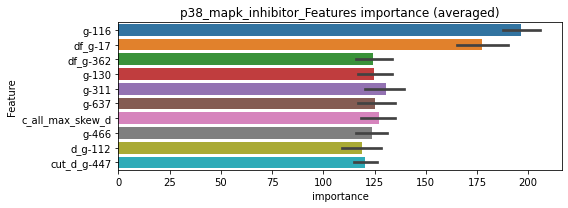

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000673986	valid_1's binary_logloss: 0.0110087


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000596647	valid_1's binary_logloss: 0.00897751
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000579464	valid_1's binary_logloss: 0.00893551


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00113117	valid_1's binary_logloss: 0.0311171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000743526	valid_1's binary_logloss: 0.0131922


p38_mapk_inhibitor logloss: 0.016067352579472956


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150527	valid_1's binary_logloss: 0.00439858
[600]	training's binary_logloss: 0.000376692	valid_1's binary_logloss: 0.00173076
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000372321	valid_1's binary_logloss: 0.0017184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151098	valid_1's binary_logloss: 0.00944708
[600]	training's binary_logloss: 0.000373759	valid_1's binary_logloss: 0.00639316
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000365712	valid_1's binary_logloss: 0.00635072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154054	valid_1's binary_logloss: 0.00288142
[600]	training's binary_logloss: 0.000377786	valid_1's binary_logloss: 0.000900202
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000367126	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0020798, Threshold: 0.0096724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00677, conf_1:0.01257
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0096724
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0496724
threshold: 0.0496724, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141563	valid_1's binary_logloss: 0.00339115
[600]	training's binary_logloss: 0.000365452	valid_1's binary_logloss: 0.00124096
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000365581	valid_1's binary_logloss: 0.0012407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138529	valid_1's binary_logloss: 0.00944264
[600]	training's binary_logloss: 0.000355929	valid_1's binary_logloss: 0.00689786
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000361206	valid_1's binary_logloss: 0.006874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145062	valid_1's binary_logloss: 0.00242827
[600]	training's binary_logloss: 0.000362341	valid_1's binary_logloss: 0.000747011
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000361549	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0141570, Threshold: 0.0496724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00101


[600]	training's binary_logloss: 0.000365554	valid_1's binary_logloss: 0.00134288
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000366244	valid_1's binary_logloss: 0.00134112


Num_p_label: 15.0, conf_0:0.03974, conf_1:0.05961
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_1: 0.0496724
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0896724
threshold: 0.0896724, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141563	valid_1's binary_logloss: 0.00339115
[600]	training's binary_logloss: 0.000365452	valid_1's binary_logloss: 0.00124096
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000365581	valid_1's binary_logloss: 0.0012407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138529	valid_1's binary_logloss: 0.00944264
[600]	training's binary_logloss: 0.000355929	valid_1's binary_logloss: 0.00689786
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000361206	valid_1's binary_logloss: 0.006874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145062	valid_1's binary_logloss: 0.00242827
[600]	training's binary_logloss: 0.000362341	valid_1's binary_logloss: 0.000747011
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000361549	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0141570, Threshold: 0.0896724, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000365554	valid_1's binary_logloss: 0.00134288
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000366244	valid_1's binary_logloss: 0.00134112


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.08071, conf_1:0.09864
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0896724
threshold: 0.0896724, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


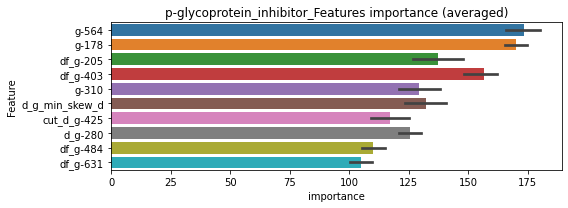

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000364152	valid_1's binary_logloss: 0.00116447


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000359783	valid_1's binary_logloss: 0.00385613


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000364903	valid_1's binary_logloss: 0.000831635


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000368528	valid_1's binary_logloss: 0.0009378


p-glycoprotein_inhibitor logloss: 0.0016973881032332227


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401418	valid_1's binary_logloss: 0.0420942
[600]	training's binary_logloss: 0.000776356	valid_1's binary_logloss: 0.0343475
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000721369	valid_1's binary_logloss: 0.034099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433946	valid_1's binary_logloss: 0.0194182
[600]	training's binary_logloss: 0.000815013	valid_1's binary_logloss: 0.0108963
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000623569	valid_1's binary_logloss: 0.0101553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430905	valid_1's binary_logloss: 0.0150235
[600]	training's binary_logloss: 0.000825969	valid_1's binary_logloss: 0.00866275
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000687146	valid_1's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0053212, Threshold: 0.0173685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01216, conf_1:0.02258
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0173685
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_2: 0.0573685
threshold: 0.0573685, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380663	valid_1's binary_logloss: 0.0209203
[600]	training's binary_logloss: 0.000765875	valid_1's binary_logloss: 0.0125084
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000597212	valid_1's binary_logloss: 0.0119186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374322	valid_1's binary_logloss: 0.0178138
[600]	training's binary_logloss: 0.000762422	valid_1's binary_logloss: 0.0107015
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000587176	valid_1's binary_logloss: 0.0102139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390117	valid_1's binary_logloss: 0.0139467
[600]	training's binary_logloss: 0.000782843	valid_1's binary_logloss: 0.00691394
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000595193	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0362800, Threshold: 0.0573685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0060271 Vs.target_rate: 0.00256
Num_p_label: 24.0, conf_0:0.04589, conf_1:0.06884
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_1: 0.0573685
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_2: 0.0973685
threshold: 0.0973685, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381613	valid_1's binary_logloss: 0.029908
[600]	training's binary_logloss: 0.000755252	valid_1's binary_logloss: 0.0223265
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000724989	valid_1's binary_logloss: 0.0221578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003694	valid_1's binary_logloss: 0.0278251
[600]	training's binary_logloss: 0.000751832	valid_1's binary_logloss: 0.0207211
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000619358	valid_1's binary_logloss: 0.0202045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00388811	valid_1's binary_logloss: 0.0144454
[600]	training's binary_logloss: 0.000770744	valid_1's binary_logloss: 0.00749423
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000581488	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0276082, Threshold: 0.0973685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0030136 Vs.target_rate: 0.00256
Num_p_label: 12.0, conf_0:0.08763, conf_1:0.10711
threshold: 0.0973685, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


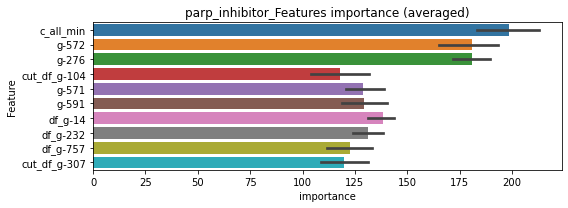

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000635655	valid_1's binary_logloss: 0.00806392


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000661644	valid_1's binary_logloss: 0.0123632


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000619415	valid_1's binary_logloss: 0.00494735
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000617198	valid_1's binary_logloss: 0.00492686


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.00062927	valid_1's binary_logloss: 0.0125396


parp_inhibitor logloss: 0.009475641359177698


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245
target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0394726	valid_1's binary_logloss: 0.248822
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.031031	valid_1's binary_logloss: 0.246853
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.050432	valid_1's binary_logloss: 0.253996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.046966	valid_1's binary_logloss: 0.264277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0400912	valid_1's binary_logloss: 0.262322


1 / 3 AUC score:0.893
y_Threshold: 0.1003610, Threshold: 0.5417506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 493/3452
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, conf_0:0.37923, conf_1:0.70428
threshold: 0.5417506, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.035401	valid_1's binary_logloss: 0.261246


positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165754	valid_1's binary_logloss: 0.153705
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00726434	valid_1's binary_logloss: 0.145984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180957	valid_1's binary_logloss: 0.136797
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00508685	valid_1's binary_logloss: 0.124646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167291	valid_1's binary_logloss: 0.137513
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00445263	valid_1's binary_logloss: 0.13038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182712	valid_1's binary_logloss: 0.140084
[600]	training's binary_logloss: 0.00278302	valid_1's binary_logloss: 0.119954
Early stopping, best ite

2 / 3 AUC score:0.985
y_Threshold: 0.0642227, Threshold: 0.5417506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 449.0/3364
p_label_rate: 0.0266198 Vs.target_rate: 0.01247
Num_p_label: 106.0, conf_0:0.43340, conf_1:0.65010
Num_p_label: 106.0, Expected: 49.7, Adj_threshold_1: 0.5417506
Num_p_label: 95.0, Expected: 49.7, Adj_threshold_2: 0.5817506
Num_p_label: 94.0, Expected: 49.7, Adj_threshold_3: 0.6217506
Num_p_label: 85.0, Expected: 49.7, Adj_threshold_4: 0.6617506
Num_p_label: 77.0, Expected: 49.7, Adj_threshold_5: 0.7017506
Num_p_label: 67.0, Expected: 49.7, Adj_threshold_6: 0.7417506
threshold: 0.7417506, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 449.0/3364, y_label_rate: 0.1334721
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141428	valid_1's binary_logloss: 0.117063
[600]	training's binary_logloss: 0.00229334	valid_1's binary_logloss: 0.106333
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00250476	valid_1's binary_logloss: 0.106057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132175	valid_1's binary_logloss: 0.116606
[600]	training's binary_logloss: 0.0021726	valid_1's binary_logloss: 0.102737
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00167701	valid_1's binary_logloss: 0.101276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124438	valid_1's binary_logloss: 0.146274
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.0053657	valid_1's binary_logloss: 0.143465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

3 / 3 AUC score:0.987
y_Threshold: 0.0583307, Threshold: 0.7417506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 413.0/3292
p_label_rate: 0.0238574 Vs.target_rate: 0.01247
Num_p_label: 95.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 95.0, Expected: 49.7, Adj_threshold_1: 0.7417506
Num_p_label: 86.0, Expected: 49.7, Adj_threshold_2: 0.7817506
Num_p_label: 79.0, Expected: 49.7, Adj_threshold_3: 0.8217506


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00535839	valid_1's binary_logloss: 0.121172


Num_p_label: 65.0, Expected: 49.7, Adj_threshold_4: 0.8617506
threshold: 0.8617506, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 413.0/3292, y_label_rate: 0.1254557


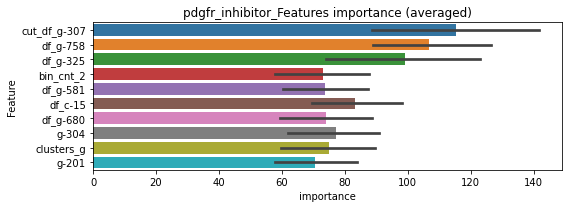

len(train_index) : 2469
len(valid_index) : 823
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2469
len(valid_index) : 823
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[292]	training's binary_logloss: 0.004007	valid_1's binary_logloss: 0.0984373
Training until validation scores don't improve for 30 rounds


len(train_index) : 2469


Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00529164	valid_1's binary_logloss: 0.13157


len(valid_index) : 823
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2469
len(valid_index) : 823
================================= fold 4/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[212]	training's binary_logloss: 0.00655832	valid_1's binary_logloss: 0.125655
Training until validation scores don't improve for 30 rounds


pdgfr_inhibitor logloss: 0.11148626152766719


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00492426	valid_1's binary_logloss: 0.0902834
neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101391	valid_1's binary_logloss: 0.00590503
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00036631	valid_1's binary_logloss: 0.00443952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104892	valid_1's binary_logloss: 0.00255565
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000354912	valid_1's binary_logloss: 0.00116956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106531	valid_1's binary_logloss: 0.00198458
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000362666	valid_1's binary_logloss: 0.000780977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106405	valid_1's binary_logloss: 0.0044019


1 / 3 AUC score:1.000
y_Threshold: 0.0017935, Threshold: 0.0108049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00756, conf_1:0.01405
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0108049
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0508049


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000343224	valid_1's binary_logloss: 0.0030007


threshold: 0.0508049, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924691	valid_1's binary_logloss: 0.00645116
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000330992	valid_1's binary_logloss: 0.00478296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098482	valid_1's binary_logloss: 0.00206286
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000347231	valid_1's binary_logloss: 0.000916635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001008	valid_1's binary_logloss: 0.00153994
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000334973	valid_1's binary_logloss: 0.000593204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980113	valid_1's binary_logloss: 0.0041959


2 / 3 AUC score:1.000
y_Threshold: 0.0188063, Threshold: 0.0508049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0082873 Vs.target_rate: 0.00076
Num_p_label: 33.0, conf_0:0.04064, conf_1:0.06097
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_1: 0.0508049
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0908049
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1308049


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000344918	valid_1's binary_logloss: 0.00300094


threshold: 0.1308049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924691	valid_1's binary_logloss: 0.00645116
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000330992	valid_1's binary_logloss: 0.00478296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098482	valid_1's binary_logloss: 0.00206286
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000347231	valid_1's binary_logloss: 0.000916635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001008	valid_1's binary_logloss: 0.00153994
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000334973	valid_1's binary_logloss: 0.000593204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980113	valid_1's binary_logloss: 0.0041959


3 / 3 AUC score:1.000
y_Threshold: 0.0188063, Threshold: 0.1308049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.11772, conf_1:0.14389
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1308049
threshold: 0.1308049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000344918	valid_1's binary_logloss: 0.00300094


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


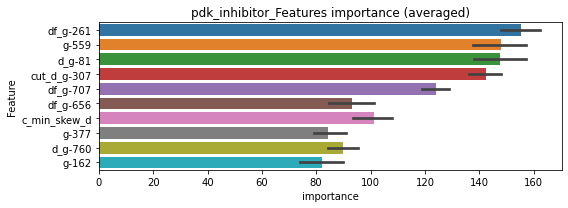

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000329016	valid_1's binary_logloss: 0.00406038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000332352	valid_1's binary_logloss: 0.00108734


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000334656	valid_1's binary_logloss: 0.000628533


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


pdk_inhibitor logloss: 0.0019129636713328135


Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000342951	valid_1's binary_logloss: 0.00187466
neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248
target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0421294	valid_1's binary_logloss: 0.250737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0281714	valid_1's binary_logloss: 0.227916
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.023381	valid_1's binary_logloss: 0.226839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0309882	valid_1's binary_logloss: 0.211928
Early stopping, best iteration is:
[342]	training's binary_logloss: 0.0228475	valid_1's binary_logloss: 0.210605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0304777	valid_1's binary_logloss: 0.214497


1 / 3 AUC score:0.913
y_Threshold: 0.0711222, Threshold: 0.2593014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 395 → Positive_corect_labels: 517/3502
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, conf_0:0.18151, conf_1:0.33709


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0225814	valid_1's binary_logloss: 0.213475


threshold: 0.2593014, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 517.0/3502, y_label_rate: 0.1476299
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015611	valid_1's binary_logloss: 0.129188
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00570082	valid_1's binary_logloss: 0.122635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150708	valid_1's binary_logloss: 0.131201
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00502137	valid_1's binary_logloss: 0.124279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162266	valid_1's binary_logloss: 0.104482
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00557836	valid_1's binary_logloss: 0.0926636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015039	valid_1's binary_logloss: 0.1212
[600]	training's binary_logloss: 0.0024402	valid_1's binary_logloss: 0.112197
Early stopping, best iterat

2 / 3 AUC score:0.992
y_Threshold: 0.0494473, Threshold: 0.2593014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 476.0/3420
p_label_rate: 0.0125565 Vs.target_rate: 0.01109
Num_p_label: 50.0, conf_0:0.20744, conf_1:0.31116
threshold: 0.2593014, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 476.0/3420, y_label_rate: 0.1391813
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112946	valid_1's binary_logloss: 0.105316
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00230951	valid_1's binary_logloss: 0.0962165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121695	valid_1's binary_logloss: 0.0990091
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00357082	valid_1's binary_logloss: 0.0880571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125867	valid_1's binary_logloss: 0.0950945
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00231959	valid_1's binary_logloss: 0.084754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011845	valid_1's binary_logloss: 0.0879264
[600]	training's binary_logloss: 0.00196648	valid_1's binary_logloss: 0.0745641
Early stopping, be

3 / 3 AUC score:0.994
y_Threshold: 0.0443921, Threshold: 0.2593014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 459.0/3386
p_label_rate: 0.0120542 Vs.target_rate: 0.01109
Num_p_label: 48.0, conf_0:0.23337, conf_1:0.28523
threshold: 0.2593014, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 459.0/3386, y_label_rate: 0.1355582


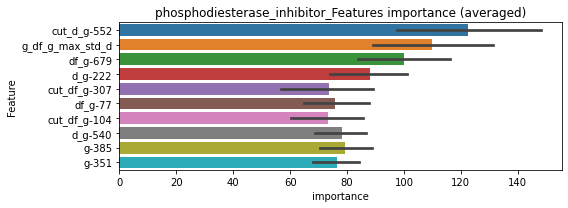

len(train_index) : 2539
len(valid_index) : 847
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2539
len(valid_index) : 847
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0033691	valid_1's binary_logloss: 0.0808642
Training until validation scores don't improve for 30 rounds


len(train_index) : 2540
len(valid_index) : 846
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00484405	valid_1's binary_logloss: 0.0644046
Training until validation scores don't improve for 30 rounds


len(train_index) : 2540
len(valid_index) : 846
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00551894	valid_1's binary_logloss: 0.089287
Training until validation scores don't improve for 30 rounds


phosphodiesterase_inhibitor logloss: 0.08515489736187665


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00438277	valid_1's binary_logloss: 0.106093
neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154998	valid_1's binary_logloss: 0.00621054
[600]	training's binary_logloss: 0.000393697	valid_1's binary_logloss: 0.00325455
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000389367	valid_1's binary_logloss: 0.00322935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154141	valid_1's binary_logloss: 0.0110366
[600]	training's binary_logloss: 0.000383333	valid_1's binary_logloss: 0.00705349
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000379839	valid_1's binary_logloss: 0.0070409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157052	valid_1's binary_logloss: 0.0046406
[600]	training's binary_logloss: 0.000400814	valid_1's binary_logloss: 0.00224232
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000382705	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0024675, Threshold: 0.0090192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00631, conf_1:0.01172
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0090192
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0490192
threshold: 0.0490192, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014785	valid_1's binary_logloss: 0.00556922
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000390758	valid_1's binary_logloss: 0.00302857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148818	valid_1's binary_logloss: 0.0103815
[600]	training's binary_logloss: 0.00037609	valid_1's binary_logloss: 0.00697379
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00036494	valid_1's binary_logloss: 0.00692557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150935	valid_1's binary_logloss: 0.00369072
[600]	training's binary_logloss: 0.000386565	valid_1's binary_logloss: 0.00161958
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000388702	valid_1's binary_logloss: 0.001617
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0281743, Threshold: 0.0490192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, conf_0:0.03922, conf_1:0.05882
threshold: 0.0490192, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014785	valid_1's binary_logloss: 0.00556922
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000390758	valid_1's binary_logloss: 0.00302857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148818	valid_1's binary_logloss: 0.0103815
[600]	training's binary_logloss: 0.00037609	valid_1's binary_logloss: 0.00697379
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00036494	valid_1's binary_logloss: 0.00692557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150935	valid_1's binary_logloss: 0.00369072
[600]	training's binary_logloss: 0.000386565	valid_1's binary_logloss: 0.00161958
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000388702	valid_1's binary_logloss: 0.001617
Training until validation scores don't improve for 30 rounds
[300

3 / 3 AUC score:1.000
y_Threshold: 0.0281743, Threshold: 0.0490192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, conf_0:0.04412, conf_1:0.05392
threshold: 0.0490192, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


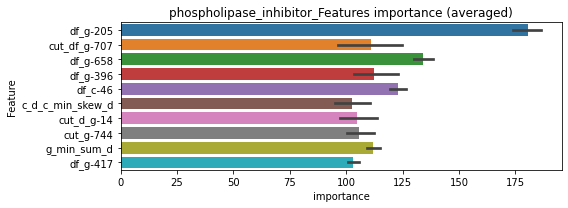

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000386738	valid_1's binary_logloss: 0.002559


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000500234	valid_1's binary_logloss: 0.00684648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000402662	valid_1's binary_logloss: 0.00164849


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000386598	valid_1's binary_logloss: 0.00180497


phospholipase_inhibitor logloss: 0.0032153330206644705


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262
target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153961	valid_1's binary_logloss: 0.139175
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00420656	valid_1's binary_logloss: 0.132099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167267	valid_1's binary_logloss: 0.0924931
[600]	training's binary_logloss: 0.00249504	valid_1's binary_logloss: 0.0758065
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00135184	valid_1's binary_logloss: 0.0740827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151746	valid_1's binary_logloss: 0.112002
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00266399	valid_1's binary_logloss: 0.0971137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155894	valid_1's binary_logloss: 0.115561
Early stopping, bes

1 / 3 AUC score:0.984
y_Threshold: 0.0228608, Threshold: 0.0652123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 201 → Positive_corect_labels: 617/3713
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, conf_0:0.04565, conf_1:0.08478
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0652123
Num_p_label: 15.0, Expected: 25.2, Adj_threshold_2: 0.1052123
threshold: 0.1052123, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 617.0/3713, y_label_rate: 0.1661729
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114316	valid_1's binary_logloss: 0.0838262
[600]	training's binary_logloss: 0.00181635	valid_1's binary_logloss: 0.0701989
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00146223	valid_1's binary_logloss: 0.068987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125411	valid_1's binary_logloss: 0.0720837
[600]	training's binary_logloss: 0.00195707	valid_1's binary_logloss: 0.0529479
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.00179815	valid_1's binary_logloss: 0.0526334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114181	valid_1's binary_logloss: 0.100071
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00453994	valid_1's binary_logloss: 0.088932
Training until validation scores don't improve for 30 rounds
[300]	training's 

2 / 3 AUC score:0.997
y_Threshold: 0.0483931, Threshold: 0.1052123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 592.0/3663
p_label_rate: 0.0072828 Vs.target_rate: 0.00634
Num_p_label: 29.0, conf_0:0.08417, conf_1:0.12625
threshold: 0.1052123, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 592.0/3663, y_label_rate: 0.1616162
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101783	valid_1's binary_logloss: 0.0578206
[600]	training's binary_logloss: 0.0016781	valid_1's binary_logloss: 0.0392089
[900]	training's binary_logloss: 0.000852136	valid_1's binary_logloss: 0.0364179
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000824378	valid_1's binary_logloss: 0.0361695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00985933	valid_1's binary_logloss: 0.0643745
[600]	training's binary_logloss: 0.00165705	valid_1's binary_logloss: 0.0474307
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00123433	valid_1's binary_logloss: 0.0462169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923863	valid_1's binary_logloss: 0.0858675
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.0018346	valid_1's binary_logloss: 0.0

3 / 3 AUC score:0.999
y_Threshold: 0.0451754, Threshold: 0.1052123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 581.0/3641
p_label_rate: 0.0085384 Vs.target_rate: 0.00634
Num_p_label: 34.0, conf_0:0.09469, conf_1:0.11573
threshold: 0.1052123, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 581.0/3641, y_label_rate: 0.1595715


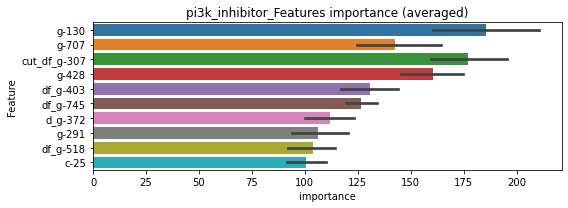

len(train_index) : 2730
len(valid_index) : 911
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2731
len(valid_index) : 910
================================= fold 2/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00193557	valid_1's binary_logloss: 0.0573434
Training until validation scores don't improve for 30 rounds


len(train_index) : 2731
len(valid_index) : 910


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00211307	valid_1's binary_logloss: 0.0481108


================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00123815	valid_1's binary_logloss: 0.039355


len(train_index) : 2731
len(valid_index) : 910
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


pi3k_inhibitor logloss: 0.051494127894637615


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00200066	valid_1's binary_logloss: 0.0611609
neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197359	valid_1's binary_logloss: 0.00515126
[600]	training's binary_logloss: 0.00046688	valid_1's binary_logloss: 0.00199536
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000444623	valid_1's binary_logloss: 0.00196403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191691	valid_1's binary_logloss: 0.0150561
[600]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.0102051
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000478173	valid_1's binary_logloss: 0.0101936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202848	valid_1's binary_logloss: 0.0041894
[600]	training's binary_logloss: 0.000478626	valid_1's binary_logloss: 0.00177574
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000464382	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0026708, Threshold: 0.0078220, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00548, conf_1:0.01017
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0078220
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_2: 0.0478220
threshold: 0.0478220, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185526	valid_1's binary_logloss: 0.00472711
[600]	training's binary_logloss: 0.000455108	valid_1's binary_logloss: 0.00170358
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000433524	valid_1's binary_logloss: 0.00165824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177956	valid_1's binary_logloss: 0.015087
[600]	training's binary_logloss: 0.000444747	valid_1's binary_logloss: 0.00992616
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00045622	valid_1's binary_logloss: 0.00987642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189279	valid_1's binary_logloss: 0.00335478
[600]	training's binary_logloss: 0.000459726	valid_1's binary_logloss: 0.00111444
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000445854	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0337358, Threshold: 0.0478220, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.03826, conf_1:0.05739
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0478220
threshold: 0.0478220, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185526	valid_1's binary_logloss: 0.00472711
[600]	training's binary_logloss: 0.000455108	valid_1's binary_logloss: 0.00170358
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000433524	valid_1's binary_logloss: 0.00165824
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177956	valid_1's binary_logloss: 0.015087
[600]	training's binary_logloss: 0.000444747	valid_1's binary_logloss: 0.00992616
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00045622	valid_1's binary_logloss: 0.00987642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189279	valid_1's binary_logloss: 0.00335478
[600]	training's binary_logloss: 0.000459726	valid_1's binary_logloss: 0.00111444
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000445854	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0337358, Threshold: 0.0478220, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.04304, conf_1:0.05260
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0478220
threshold: 0.0478220, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


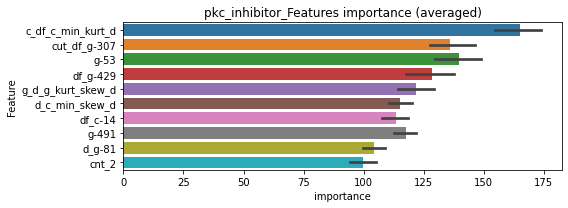

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000466269	valid_1's binary_logloss: 0.00171383


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000463306	valid_1's binary_logloss: 0.00839301


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000466776	valid_1's binary_logloss: 0.00125082


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000455754	valid_1's binary_logloss: 0.00278675


pkc_inhibitor logloss: 0.0035362984920580434


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360568	valid_1's binary_logloss: 0.0397757
[600]	training's binary_logloss: 0.000703041	valid_1's binary_logloss: 0.0315614
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000720534	valid_1's binary_logloss: 0.0314446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390892	valid_1's binary_logloss: 0.0184341
[600]	training's binary_logloss: 0.000757412	valid_1's binary_logloss: 0.0113664
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000699024	valid_1's binary_logloss: 0.0111565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417005	valid_1's binary_logloss: 0.0105025
[600]	training's binary_logloss: 0.000780896	valid_1's binary_logloss: 0.00409755
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00057618	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0055728, Threshold: 0.0261071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01827, conf_1:0.03394
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0261071


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.001085	valid_1's binary_logloss: 0.0299212


Num_p_label: 11.0, Expected: 9.2, Adj_threshold_2: 0.0661071
threshold: 0.0661071, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00353666	valid_1's binary_logloss: 0.0376171
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000829616	valid_1's binary_logloss: 0.0299675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382331	valid_1's binary_logloss: 0.0175926
[600]	training's binary_logloss: 0.00073344	valid_1's binary_logloss: 0.00993543
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000583167	valid_1's binary_logloss: 0.00973889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386222	valid_1's binary_logloss: 0.0099342
[600]	training's binary_logloss: 0.00075515	valid_1's binary_logloss: 0.00334494
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000604299	valid_1's binary_logloss: 0.00301624
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0275354, Threshold: 0.0661071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0138122 Vs.target_rate: 0.00231
Num_p_label: 55.0, conf_0:0.05289, conf_1:0.07933
Num_p_label: 55.0, Expected: 9.2, Adj_threshold_1: 0.0661071
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1061071
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_3: 0.1461071
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_4: 0.1861071
threshold: 0.1861071, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343643	valid_1's binary_logloss: 0.0206714
[600]	training's binary_logloss: 0.000687292	valid_1's binary_logloss: 0.0139356
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000638379	valid_1's binary_logloss: 0.0137115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341054	valid_1's binary_logloss: 0.0229648
[600]	training's binary_logloss: 0.000682307	valid_1's binary_logloss: 0.0155218
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000578655	valid_1's binary_logloss: 0.0151953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355177	valid_1's binary_logloss: 0.0117203
[600]	training's binary_logloss: 0.000702355	valid_1's binary_logloss: 0.00486772
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000575884	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0887405, Threshold: 0.1861071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, conf_0:0.16750, conf_1:0.20472
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_1: 0.1861071
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2261071
Num_p_label: 20.0, Expected: 9.2, Adj_threshold_3: 0.2661071
threshold: 0.2661071, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


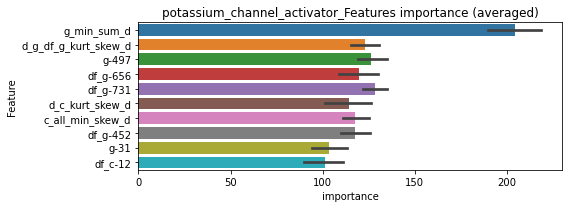

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000592501	valid_1's binary_logloss: 0.0120049


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000650567	valid_1's binary_logloss: 0.0148039


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000574911	valid_1's binary_logloss: 0.00404911
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000574107	valid_1's binary_logloss: 0.00404592


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000625227	valid_1's binary_logloss: 0.0106146


potassium_channel_activator logloss: 0.010367772389046357


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278
target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084178	valid_1's binary_logloss: 0.0724048
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00185662	valid_1's binary_logloss: 0.0608364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00885368	valid_1's binary_logloss: 0.0646796
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00214508	valid_1's binary_logloss: 0.055951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00962481	valid_1's binary_logloss: 0.0458904
[600]	training's binary_logloss: 0.00146036	valid_1's binary_logloss: 0.0330157
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00131513	valid_1's binary_logloss: 0.0326183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867192	valid_1's binary_logloss: 0.0711262
[600]	trainin

1 / 3 AUC score:0.995
y_Threshold: 0.0107499, Threshold: 0.0290152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, conf_0:0.02031, conf_1:0.03772
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0290152
Num_p_label: 10.0, Expected: 16.4, Adj_threshold_2: 0.0690152
threshold: 0.0690152, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 647.0/3785, y_label_rate: 0.1709379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791191	valid_1's binary_logloss: 0.0486606
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00149191	valid_1's binary_logloss: 0.0358767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00763636	valid_1's binary_logloss: 0.0627885
[600]	training's binary_logloss: 0.00126294	valid_1's binary_logloss: 0.0519255
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000865422	valid_1's binary_logloss: 0.0508095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0072967	valid_1's binary_logloss: 0.061083
[600]	training's binary_logloss: 0.00123067	valid_1's binary_logloss: 0.0540665
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00114604	valid_1's binary_logloss: 0.0539181
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0227979, Threshold: 0.0690152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0055249 Vs.target_rate: 0.00412
Num_p_label: 22.0, conf_0:0.05521, conf_1:0.08282
threshold: 0.0690152, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 639.0/3769, y_label_rate: 0.1695410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674401	valid_1's binary_logloss: 0.0558255
[600]	training's binary_logloss: 0.00117763	valid_1's binary_logloss: 0.042383
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00103326	valid_1's binary_logloss: 0.0416854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732813	valid_1's binary_logloss: 0.0550611
[600]	training's binary_logloss: 0.00120162	valid_1's binary_logloss: 0.0429625
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000804377	valid_1's binary_logloss: 0.0414905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773358	valid_1's binary_logloss: 0.0420257
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00198534	valid_1's binary_logloss: 0.0351647
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0340352, Threshold: 0.0690152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 633.0/3757
p_label_rate: 0.0062783 Vs.target_rate: 0.00412
Num_p_label: 25.0, conf_0:0.06211, conf_1:0.07592
Num_p_label: 25.0, Expected: 16.4, Adj_threshold_1: 0.0690152
Num_p_label: 11.0, Expected: 16.4, Adj_threshold_2: 0.1090152
threshold: 0.1090152, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 633.0/3757, y_label_rate: 0.1684855


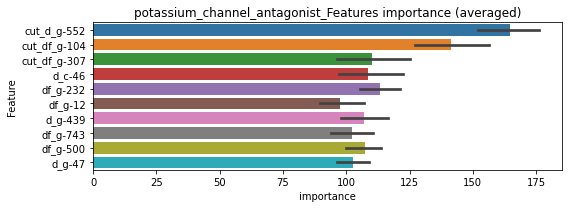

len(train_index) : 2817
len(valid_index) : 940
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2818
len(valid_index) : 939
================================= fold 2/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00142146	valid_1's binary_logloss: 0.0583944
Training until validation scores don't improve for 30 rounds


len(train_index) : 2818
len(valid_index) : 939
================================= fold 3/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00120544	valid_1's binary_logloss: 0.0336576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00137345	valid_1's binary_logloss: 0.0265416


len(train_index) : 2818
len(valid_index) : 939
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000910415	valid_1's binary_logloss: 0.0296812


potassium_channel_antagonist logloss: 0.037074378043087386


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106177	valid_1's binary_logloss: 0.086125
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00275632	valid_1's binary_logloss: 0.0787253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120202	valid_1's binary_logloss: 0.0817629
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.0041451	valid_1's binary_logloss: 0.0727255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122329	valid_1's binary_logloss: 0.0584174
[600]	training's binary_logloss: 0.00182326	valid_1's binary_logloss: 0.0428871
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00172276	valid_1's binary_logloss: 0.0426084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108032	valid_1's binary_logloss: 0.0930686


1 / 3 AUC score:0.993
y_Threshold: 0.0173137, Threshold: 0.0545558, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00255881	valid_1's binary_logloss: 0.0842496


Remove_noisy_data: 166 → Positive_corect_labels: 638/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03819, conf_1:0.07092
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0545558
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_2: 0.0945558
threshold: 0.0945558, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 638.0/3767, y_label_rate: 0.1693655
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945813	valid_1's binary_logloss: 0.0598839
[600]	training's binary_logloss: 0.00151619	valid_1's binary_logloss: 0.0418419
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000923438	valid_1's binary_logloss: 0.0397038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00965802	valid_1's binary_logloss: 0.0488663
[600]	training's binary_logloss: 0.00152693	valid_1's binary_logloss: 0.037273
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000993979	valid_1's binary_logloss: 0.0363998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00962168	valid_1's binary_logloss: 0.0479832
[600]	training's binary_logloss: 0.00155406	valid_1's binary_logloss: 0.0341149
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00141331	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0353136, Threshold: 0.0945558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 627.0/3745
p_label_rate: 0.0072828 Vs.target_rate: 0.00483
Num_p_label: 29.0, conf_0:0.07564, conf_1:0.11347
Num_p_label: 29.0, Expected: 19.2, Adj_threshold_1: 0.0945558
Num_p_label: 13.0, Expected: 19.2, Adj_threshold_2: 0.1345558


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00308793	valid_1's binary_logloss: 0.0788109


threshold: 0.1345558, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 627.0/3745, y_label_rate: 0.1674232
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789711	valid_1's binary_logloss: 0.0639436
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.001688	valid_1's binary_logloss: 0.0543041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835639	valid_1's binary_logloss: 0.0560878
[600]	training's binary_logloss: 0.00138531	valid_1's binary_logloss: 0.0421065
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00106965	valid_1's binary_logloss: 0.0414184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00914618	valid_1's binary_logloss: 0.0432587
[600]	training's binary_logloss: 0.00146069	valid_1's binary_logloss: 0.0296364
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00103412	valid_1's binary_logloss: 0.0281451
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:1.000
y_Threshold: 0.0340981, Threshold: 0.1345558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 618.0/3727
p_label_rate: 0.0027624 Vs.target_rate: 0.00483
Num_p_label: 11.0, conf_0:0.12110, conf_1:0.14801
Num_p_label: 11.0, Expected: 19.2, Adj_threshold_1: 0.1345558
Num_p_label: 22.0, Expected: 19.2, Adj_threshold_2: 0.1045558
threshold: 0.1045558, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 618.0/3727, y_label_rate: 0.1658170


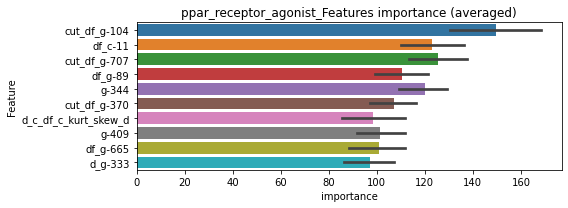

len(train_index) : 2795
len(valid_index) : 932
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2795
len(valid_index) : 932
================================= fold 2/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00134839	valid_1's binary_logloss: 0.0439476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00103252	valid_1's binary_logloss: 0.0322964


len(train_index) : 2795
len(valid_index) : 932
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00160244	valid_1's binary_logloss: 0.0431492


len(train_index) : 2796
len(valid_index) : 931
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_agonist logloss: 0.04092897302785531


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00167612	valid_1's binary_logloss: 0.0443262
neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188723	valid_1's binary_logloss: 0.00977872
[600]	training's binary_logloss: 0.00043083	valid_1's binary_logloss: 0.00578652
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000423311	valid_1's binary_logloss: 0.00575767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198683	valid_1's binary_logloss: 0.00698034
[600]	training's binary_logloss: 0.000436854	valid_1's binary_logloss: 0.00379386
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000409449	valid_1's binary_logloss: 0.00374094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199308	valid_1's binary_logloss: 0.0051921
[600]	training's binary_logloss: 0.000440946	valid_1's binary_logloss: 0.00254934
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000424606	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0023420, Threshold: 0.0053369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00374, conf_1:0.00694
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0053369
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0453369
threshold: 0.0453369, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180996	valid_1's binary_logloss: 0.00833321
[600]	training's binary_logloss: 0.000424887	valid_1's binary_logloss: 0.00442965
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00041004	valid_1's binary_logloss: 0.00437883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187556	valid_1's binary_logloss: 0.0066715
[600]	training's binary_logloss: 0.000431434	valid_1's binary_logloss: 0.0037502
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000411918	valid_1's binary_logloss: 0.003719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186665	valid_1's binary_logloss: 0.00444059
[600]	training's binary_logloss: 0.000426838	valid_1's binary_logloss: 0.00207839
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000421346	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0123309, Threshold: 0.0453369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0010045 Vs.target_rate: 0.00126
Num_p_label: 4.0, conf_0:0.03627, conf_1:0.05440
threshold: 0.0453369, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000526326	valid_1's binary_logloss: 0.0220438


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180996	valid_1's binary_logloss: 0.00833321
[600]	training's binary_logloss: 0.000424887	valid_1's binary_logloss: 0.00442965
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00041004	valid_1's binary_logloss: 0.00437883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187556	valid_1's binary_logloss: 0.0066715
[600]	training's binary_logloss: 0.000431434	valid_1's binary_logloss: 0.0037502
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000411918	valid_1's binary_logloss: 0.003719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186665	valid_1's binary_logloss: 0.00444059
[600]	training's binary_logloss: 0.000426838	valid_1's binary_logloss: 0.00207839
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000421346	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0123309, Threshold: 0.0453369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0010045 Vs.target_rate: 0.00126
Num_p_label: 4.0, conf_0:0.04080, conf_1:0.04987


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000526326	valid_1's binary_logloss: 0.0220438


threshold: 0.0453369, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


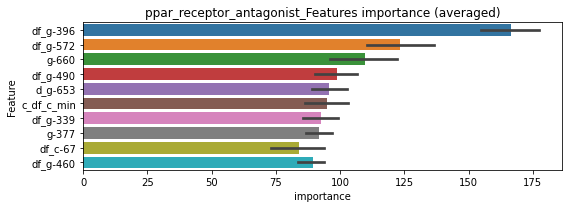

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000450203	valid_1's binary_logloss: 0.00474926


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000443737	valid_1's binary_logloss: 0.00261642


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000426771	valid_1's binary_logloss: 0.00255595


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000440841	valid_1's binary_logloss: 0.0182694


ppar_receptor_antagonist logloss: 0.007046260276897463


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270
target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989157	valid_1's binary_logloss: 0.124102
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00396108	valid_1's binary_logloss: 0.120435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010399	valid_1's binary_logloss: 0.06709
[600]	training's binary_logloss: 0.00170599	valid_1's binary_logloss: 0.0513279
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00106497	valid_1's binary_logloss: 0.0494725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110731	valid_1's binary_logloss: 0.0649751
[600]	training's binary_logloss: 0.00174796	valid_1's binary_logloss: 0.0493487
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00116003	valid_1's binary_logloss: 0.0472858
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.994
y_Threshold: 0.0140229, Threshold: 0.1700625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 165 → Positive_corect_labels: 637/3759
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, conf_0:0.11904, conf_1:0.22108
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1700625
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_2: 0.2100625
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_3: 0.2500625
threshold: 0.2500625, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 637.0/3759, y_label_rate: 0.1694600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00825245	valid_1's binary_logloss: 0.0829678
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.001632	valid_1's binary_logloss: 0.0723626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863985	valid_1's binary_logloss: 0.057889
[600]	training's binary_logloss: 0.00149425	valid_1's binary_logloss: 0.0429203
[900]	training's binary_logloss: 0.000818722	valid_1's binary_logloss: 0.0407612
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000758103	valid_1's binary_logloss: 0.0402686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872871	valid_1's binary_logloss: 0.069935
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00209057	valid_1's binary_logloss: 0.0621527
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:0.998
y_Threshold: 0.0369862, Threshold: 0.2500625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 620.0/3725
p_label_rate: 0.0183325 Vs.target_rate: 0.00500
Num_p_label: 73.0, conf_0:0.20005, conf_1:0.30007
Num_p_label: 73.0, Expected: 19.9, Adj_threshold_1: 0.2500625
Num_p_label: 64.0, Expected: 19.9, Adj_threshold_2: 0.2900625
Num_p_label: 57.0, Expected: 19.9, Adj_threshold_3: 0.3300625
Num_p_label: 52.0, Expected: 19.9, Adj_threshold_4: 0.3700625
Num_p_label: 48.0, Expected: 19.9, Adj_threshold_5: 0.4100625
Num_p_label: 44.0, Expected: 19.9, Adj_threshold_6: 0.4500625
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_7: 0.4900625
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_8: 0.5300625
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_9: 0.5700625
threshold: 0.5700625, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 620.0/3725, y_label_rate: 0.1664430
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736298	valid_1's binary_logloss: 0.0604939
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00149337	valid_1's binary_logloss: 0.0520736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00774816	valid_1's binary_logloss: 0.0604506
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00236787	valid_1's binary_logloss: 0.0532018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780038	valid_1's binary_logloss: 0.0482289
[600]	training's binary_logloss: 0.00137387	valid_1's binary_logloss: 0.0346676
[900]	training's binary_logloss: 0.000761134	valid_1's binary_logloss: 0.0327702
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000738564	valid_1's binary_logloss: 0.0326224
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0316129, Threshold: 0.5700625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 608.0/3701
p_label_rate: 0.0123054 Vs.target_rate: 0.00500
Num_p_label: 49.0, conf_0:0.50000, conf_1:0.62707
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_1: 0.5700625
Num_p_label: 44.0, Expected: 19.9, Adj_threshold_2: 0.6100625
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_3: 0.6500625
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_4: 0.6900625
Num_p_label: 24.0, Expected: 19.9, Adj_threshold_5: 0.7300625
threshold: 0.7300625, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 608.0/3701, y_label_rate: 0.1642799


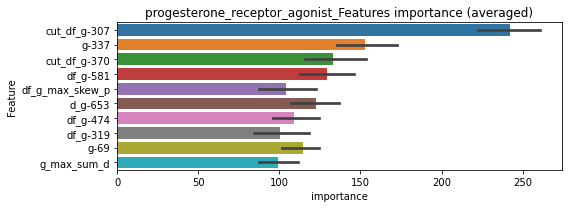

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.001626	valid_1's binary_logloss: 0.0465276
Training until validation scores don't improve for 30 rounds


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00237273	valid_1's binary_logloss: 0.0610917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00118138	valid_1's binary_logloss: 0.0192143


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_agonist logloss: 0.045300454042145694


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00288521	valid_1's binary_logloss: 0.0543668
neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000965093	valid_1's binary_logloss: 0.00255
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000314755	valid_1's binary_logloss: 0.00109884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00096475	valid_1's binary_logloss: 0.00249373
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000319764	valid_1's binary_logloss: 0.00112994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000987159	valid_1's binary_logloss: 0.00173343
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000329146	valid_1's binary_logloss: 0.000698626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000971086	valid_1's binary_logloss: 0.00440651


1 / 3 AUC score:1.000
y_Threshold: 0.0019121, Threshold: 0.0081371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00570, conf_1:0.01058
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0081371
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0481371


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000323379	valid_1's binary_logloss: 0.00268082


threshold: 0.0481371, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910722	valid_1's binary_logloss: 0.00156711
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000306799	valid_1's binary_logloss: 0.000643503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884955	valid_1's binary_logloss: 0.00255708
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000298549	valid_1's binary_logloss: 0.00129105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910213	valid_1's binary_logloss: 0.00150803
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000301093	valid_1's binary_logloss: 0.000616693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878047	valid_1's binary_logloss: 0.00522754


2 / 3 AUC score:1.000
y_Threshold: 0.0484053, Threshold: 0.0481371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, conf_0:0.03851, conf_1:0.05776
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0481371
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0881371
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1281371


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301128	valid_1's binary_logloss: 0.0037241


threshold: 0.1281371, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910722	valid_1's binary_logloss: 0.00156711
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000306799	valid_1's binary_logloss: 0.000643503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884955	valid_1's binary_logloss: 0.00255708
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000298549	valid_1's binary_logloss: 0.00129105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910213	valid_1's binary_logloss: 0.00150803
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000301093	valid_1's binary_logloss: 0.000616693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878047	valid_1's binary_logloss: 0.00522754


3 / 3 AUC score:1.000
y_Threshold: 0.0484053, Threshold: 0.1281371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.11532, conf_1:0.14095
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1281371
threshold: 0.1281371, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301128	valid_1's binary_logloss: 0.0037241


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


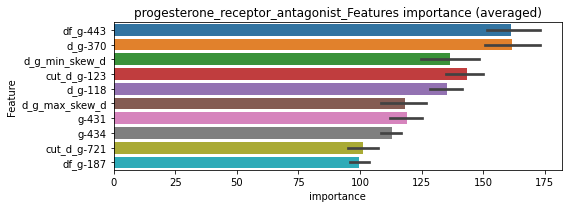

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000309669	valid_1's binary_logloss: 0.000716572


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000303053	valid_1's binary_logloss: 0.000964409


================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000307181	valid_1's binary_logloss: 0.000673638


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0010817150962191843


Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000301026	valid_1's binary_logloss: 0.00197223


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220795	valid_1's binary_logloss: 0.00943758
[600]	training's binary_logloss: 0.000478459	valid_1's binary_logloss: 0.00556263
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000443931	valid_1's binary_logloss: 0.00548229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206813	valid_1's binary_logloss: 0.0165792
[600]	training's binary_logloss: 0.000465788	valid_1's binary_logloss: 0.0123072
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000468188	valid_1's binary_logloss: 0.0122831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224728	valid_1's binary_logloss: 0.0206776
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00104553	valid_1's binary_logloss: 0.0195948
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0033176, Threshold: 0.0163284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01143, conf_1:0.02123
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0163284
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.0563284
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.0963284
threshold: 0.0963284, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199234	valid_1's binary_logloss: 0.0162988
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000539496	valid_1's binary_logloss: 0.0134053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208245	valid_1's binary_logloss: 0.00521522
[600]	training's binary_logloss: 0.000465118	valid_1's binary_logloss: 0.00193373
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00043657	valid_1's binary_logloss: 0.00188681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210291	valid_1's binary_logloss: 0.00526176
[600]	training's binary_logloss: 0.000468427	valid_1's binary_logloss: 0.00224832
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000430436	valid_1's binary_logloss: 0.00219227
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0176693, Threshold: 0.0963284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, conf_0:0.07706, conf_1:0.11559
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.0963284
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.1363284
threshold: 0.1363284, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205943	valid_1's binary_logloss: 0.0110558
[600]	training's binary_logloss: 0.000466321	valid_1's binary_logloss: 0.00804504
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000493425	valid_1's binary_logloss: 0.00801832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207334	valid_1's binary_logloss: 0.00635879
[600]	training's binary_logloss: 0.000464638	valid_1's binary_logloss: 0.00291783
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000462407	valid_1's binary_logloss: 0.00291631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204793	valid_1's binary_logloss: 0.0190347
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000523136	valid_1's binary_logloss: 0.0167704
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0158457, Threshold: 0.1363284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, conf_0:0.12270, conf_1:0.14996
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1363284
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.1763284
threshold: 0.1763284, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3803, y_label_rate: 0.1717065


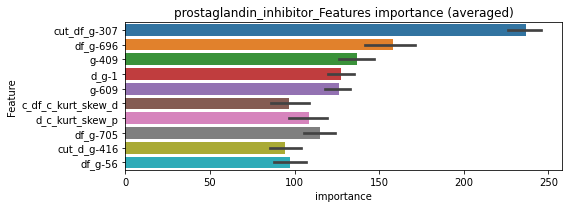

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000485079	valid_1's binary_logloss: 0.00304859


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000456828	valid_1's binary_logloss: 0.00359464


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000465666	valid_1's binary_logloss: 0.0106122


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000453994	valid_1's binary_logloss: 0.00182713


prostaglandin_inhibitor logloss: 0.004771760789847285


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280
target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698743	valid_1's binary_logloss: 0.0679994
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00136597	valid_1's binary_logloss: 0.0599191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00768423	valid_1's binary_logloss: 0.0422337
[600]	training's binary_logloss: 0.0012126	valid_1's binary_logloss: 0.0312099
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.0011412	valid_1's binary_logloss: 0.030971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801226	valid_1's binary_logloss: 0.0380956
[600]	training's binary_logloss: 0.00124661	valid_1's binary_logloss: 0.0289124
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00110861	valid_1's binary_logloss: 0.0286426
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.998
y_Threshold: 0.0090867, Threshold: 0.0543483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, conf_0:0.03804, conf_1:0.07065
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0543483
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_2: 0.0943483
Num_p_label: 19.0, Expected: 14.0, Adj_threshold_3: 0.1343483
threshold: 0.1343483, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063314	valid_1's binary_logloss: 0.0543576
[600]	training's binary_logloss: 0.00108237	valid_1's binary_logloss: 0.0453527
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000984868	valid_1's binary_logloss: 0.0451017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639907	valid_1's binary_logloss: 0.0349303
[600]	training's binary_logloss: 0.0010952	valid_1's binary_logloss: 0.0233944
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000740427	valid_1's binary_logloss: 0.022115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629027	valid_1's binary_logloss: 0.0497887
[600]	training's binary_logloss: 0.00108676	valid_1's binary_logloss: 0.0408643
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00105699	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0233271, Threshold: 0.1343483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0123054 Vs.target_rate: 0.00353
Num_p_label: 49.0, conf_0:0.10748, conf_1:0.16122
Num_p_label: 49.0, Expected: 14.0, Adj_threshold_1: 0.1343483
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1743483
Num_p_label: 41.0, Expected: 14.0, Adj_threshold_3: 0.2143483
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_4: 0.2543483
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_5: 0.2943483
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_6: 0.3343483
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_7: 0.3743483
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_8: 0.4143483
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_9: 0.4543483
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_10: 0.4943483
threshold: 0.4943483, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3778, y_label_rate: 0.1701959


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593342	valid_1's binary_logloss: 0.0410553
[600]	training's binary_logloss: 0.00102795	valid_1's binary_logloss: 0.03039
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000736143	valid_1's binary_logloss: 0.0292614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560764	valid_1's binary_logloss: 0.0379199
[600]	training's binary_logloss: 0.00100354	valid_1's binary_logloss: 0.0268886
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000747487	valid_1's binary_logloss: 0.0258394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561911	valid_1's binary_logloss: 0.0467353
[600]	training's binary_logloss: 0.000996528	valid_1's binary_logloss: 0.0394234
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00106974	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0354554, Threshold: 0.4943483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0060271 Vs.target_rate: 0.00353
Num_p_label: 24.0, conf_0:0.44491, conf_1:0.54378
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_1: 0.4943483
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_2: 0.5343483
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_3: 0.5743483
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_4: 0.6143483
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_5: 0.6543483
threshold: 0.6543483, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3768, y_label_rate: 0.1693206


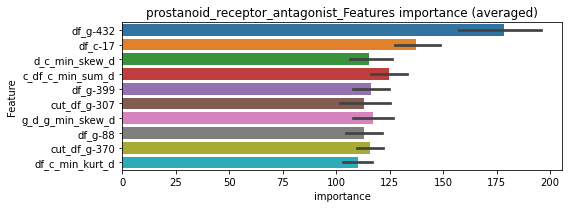

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000932872	valid_1's binary_logloss: 0.032119


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00117547	valid_1's binary_logloss: 0.0267275
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00113208	valid_1's binary_logloss: 0.0271872
Training until validation scores don't improve for 30 rounds


prostanoid_receptor_antagonist logloss: 0.030515605997899112


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00108115	valid_1's binary_logloss: 0.0360287
neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197
target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[36]	training's binary_logloss: 0.378274	valid_1's binary_logloss: 0.474777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[48]	training's binary_logloss: 0.352774	valid_1's binary_logloss: 0.469919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.392367	valid_1's binary_logloss: 0.471765
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.556
y_Threshold: 0.1988373, Threshold: 0.4453404, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1197 → Positive_corect_labels: 210/2726
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, conf_0:0.31174, conf_1:0.57894
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4453404
Num_p_label: 66.0, Expected: 121.4, Adj_threshold_2: 0.4153404
Num_p_label: 106.0, Expected: 121.4, Adj_threshold_3: 0.3853404
Num_p_label: 132.0, Expected: 121.4, Adj_threshold_4: 0.3553404
Num_p_label: 144.0, Expected: 121.4, Adj_threshold_5: 0.3253404
Num_p_label: 150.0, Expected: 121.4, Adj_threshold_6: 0.2953404
Num_p_label: 170.0, Expected: 121.4, Adj_threshold_7: 0.2653404
Num_p_label: 247.0, Expected: 121.4, Adj_threshold_8: 0.2353404
threshold: 0.2353404, positive_p_label: 247.0/3982, p_label_rate: 0.0620291


Early stopping, best iteration is:
[12]	training's binary_logloss: 0.447323	valid_1's binary_logloss: 0.476872


positive_y_label: 210.0/2726, y_label_rate: 0.0770360
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[35]	training's binary_logloss: 0.136502	valid_1's binary_logloss: 0.240395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[62]	training's binary_logloss: 0.0952191	valid_1's binary_logloss: 0.222635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[80]	training's binary_logloss: 0.0741062	valid_1's binary_logloss: 0.207682
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.804
y_Threshold: 0.1261901, Threshold: 0.2353404, pos_neg_ratio: 0.7729121
Remove_noisy_data: 240 → Positive_corect_labels: 90.0/2486
p_label_rate: 0.0868910 Vs.target_rate: 0.03049
Num_p_label: 346.0, conf_0:0.18827, conf_1:0.28241
Num_p_label: 346.0, Expected: 121.4, Adj_threshold_1: 0.2353404
Num_p_label: 295.0, Expected: 121.4, Adj_threshold_2: 0.2753404
Num_p_label: 266.0, Expected: 121.4, Adj_threshold_3: 0.3153404
Num_p_label: 241.0, Expected: 121.4, Adj_threshold_4: 0.3553404
Num_p_label: 216.0, Expected: 121.4, Adj_threshold_5: 0.3953404
Num_p_label: 197.0, Expected: 121.4, Adj_threshold_6: 0.4353404
Num_p_label: 189.0, Expected: 121.4, Adj_threshold_7: 0.4753404
Num_p_label: 177.0, Expected: 121.4, Adj_threshold_8: 0.5153404
Num_p_label: 166.0, Expected: 121.4, Adj_threshold_9: 0.5553404
Num_p_label: 157.0, Expected: 121.4, Adj_threshold_10: 0.5953404
threshold: 0.6353404, positive_p_label: 145.0/3982, p_label_rate: 0.0364139


Early stopping, best iteration is:
[88]	training's binary_logloss: 0.0678608	valid_1's binary_logloss: 0.187637


positive_y_label: 90.0/2486, y_label_rate: 0.0362027
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[90]	training's binary_logloss: 0.0127143	valid_1's binary_logloss: 0.0632893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[114]	training's binary_logloss: 0.00962116	valid_1's binary_logloss: 0.0514465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[163]	training's binary_logloss: 0.0040447	valid_1's binary_logloss: 0.033718
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.988
y_Threshold: 0.1325915, Threshold: 0.6353404, pos_neg_ratio: 0.7729121
Remove_noisy_data: 40 → Positive_corect_labels: 70.0/2446
p_label_rate: 0.0798594 Vs.target_rate: 0.03049
Num_p_label: 318.0, conf_0:0.50000, conf_1:0.69887
Num_p_label: 318.0, Expected: 121.4, Adj_threshold_1: 0.6353404
Num_p_label: 308.0, Expected: 121.4, Adj_threshold_2: 0.6753404
Num_p_label: 289.0, Expected: 121.4, Adj_threshold_3: 0.7153404
Num_p_label: 272.0, Expected: 121.4, Adj_threshold_4: 0.7553404
Num_p_label: 259.0, Expected: 121.4, Adj_threshold_5: 0.7953404
Num_p_label: 242.0, Expected: 121.4, Adj_threshold_6: 0.8353404
Num_p_label: 224.0, Expected: 121.4, Adj_threshold_7: 0.8753404
threshold: 0.8753404, positive_p_label: 224.0/3982, p_label_rate: 0.0562531


Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00440104	valid_1's binary_logloss: 0.0366141


positive_y_label: 70.0/2446, y_label_rate: 0.0286182


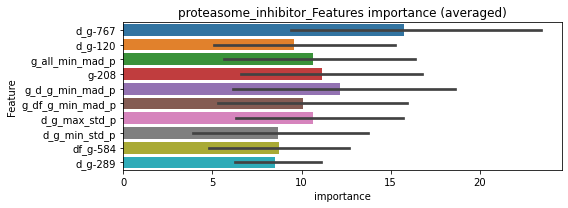

len(train_index) : 1834
len(valid_index) : 612
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1834
len(valid_index) : 612
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[85]	training's binary_logloss: 0.00280181	valid_1's binary_logloss: 0.0212753
Training until validation scores don't improve for 30 rounds


len(train_index) : 1835
len(valid_index) : 611
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.000700562	valid_1's binary_logloss: 0.0156996
Training until validation scores don't improve for 30 rounds


len(train_index) : 1835
len(valid_index) : 611
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[137]	training's binary_logloss: 0.00144707	valid_1's binary_logloss: 0.0115196
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.013591854431819669


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00102924	valid_1's binary_logloss: 0.00585695
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336874	valid_1's binary_logloss: 0.0237403
[600]	training's binary_logloss: 0.000654796	valid_1's binary_logloss: 0.0157753
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000628437	valid_1's binary_logloss: 0.0155742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031775	valid_1's binary_logloss: 0.0222902
[600]	training's binary_logloss: 0.000633667	valid_1's binary_logloss: 0.0170126
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000619636	valid_1's binary_logloss: 0.0169169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340204	valid_1's binary_logloss: 0.00990635
[600]	training's binary_logloss: 0.000670646	valid_1's binary_logloss: 0.0043554
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000532433	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0041911, Threshold: 0.0101688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00712, conf_1:0.01322
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0101688
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_2: 0.0501688
threshold: 0.0501688, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312732	valid_1's binary_logloss: 0.0221764
[600]	training's binary_logloss: 0.000626128	valid_1's binary_logloss: 0.0149191
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000539721	valid_1's binary_logloss: 0.0145649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316473	valid_1's binary_logloss: 0.0214407
[600]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0161066
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000610898	valid_1's binary_logloss: 0.0159637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325987	valid_1's binary_logloss: 0.00902334
[600]	training's binary_logloss: 0.000651128	valid_1's binary_logloss: 0.00374174
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00052827	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0153592, Threshold: 0.0501688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, conf_0:0.04014, conf_1:0.06020
threshold: 0.0501688, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312818	valid_1's binary_logloss: 0.0177506
[600]	training's binary_logloss: 0.000617227	valid_1's binary_logloss: 0.01197
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000670925	valid_1's binary_logloss: 0.0119637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315084	valid_1's binary_logloss: 0.0120717
[600]	training's binary_logloss: 0.000637392	valid_1's binary_logloss: 0.0061716
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000535218	valid_1's binary_logloss: 0.00586162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320713	valid_1's binary_logloss: 0.0177236
[600]	training's binary_logloss: 0.000626768	valid_1's binary_logloss: 0.0116895
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000567552	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0218884, Threshold: 0.0501688, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, conf_0:0.04515, conf_1:0.05519
threshold: 0.0501688, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


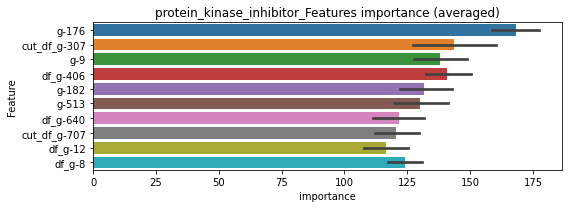

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000650023	valid_1's binary_logloss: 0.0110957


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000555698	valid_1's binary_logloss: 0.00504689


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000713047	valid_1's binary_logloss: 0.0103448


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000546463	valid_1's binary_logloss: 0.00581062


protein_kinase_inhibitor logloss: 0.008076233303340721


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013552	valid_1's binary_logloss: 0.00684358
[600]	training's binary_logloss: 0.00037674	valid_1's binary_logloss: 0.00437272
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00037262	valid_1's binary_logloss: 0.00435953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137597	valid_1's binary_logloss: 0.0054039
[600]	training's binary_logloss: 0.000370622	valid_1's binary_logloss: 0.00275487
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000369314	valid_1's binary_logloss: 0.00275165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139952	valid_1's binary_logloss: 0.00259568
[600]	training's binary_logloss: 0.000380063	valid_1's binary_logloss: 0.000941794
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000380063	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0019185, Threshold: 0.0057569, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000377204	valid_1's binary_logloss: 0.00282032
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00037932	valid_1's binary_logloss: 0.00280481


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00403, conf_1:0.00748
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0057569
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_2: 0.0457569
threshold: 0.0457569, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127871	valid_1's binary_logloss: 0.0050864
[600]	training's binary_logloss: 0.000363969	valid_1's binary_logloss: 0.00299295
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000363524	valid_1's binary_logloss: 0.00298432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128883	valid_1's binary_logloss: 0.00495391
[600]	training's binary_logloss: 0.000362234	valid_1's binary_logloss: 0.00272124
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000369633	valid_1's binary_logloss: 0.00270741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129803	valid_1's binary_logloss: 0.00260872
[600]	training's binary_logloss: 0.000368385	valid_1's binary_logloss: 0.000935328
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000368844	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0515036, Threshold: 0.0457569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.03661, conf_1:0.05491
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0457569


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00038853	valid_1's binary_logloss: 0.00254151


threshold: 0.0457569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127871	valid_1's binary_logloss: 0.0050864
[600]	training's binary_logloss: 0.000363969	valid_1's binary_logloss: 0.00299295
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000363524	valid_1's binary_logloss: 0.00298432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128883	valid_1's binary_logloss: 0.00495391
[600]	training's binary_logloss: 0.000362234	valid_1's binary_logloss: 0.00272124
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000369633	valid_1's binary_logloss: 0.00270741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129803	valid_1's binary_logloss: 0.00260872
[600]	training's binary_logloss: 0.000368385	valid_1's binary_logloss: 0.000935328
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000368844	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0515036, Threshold: 0.0457569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.04118, conf_1:0.05033
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0457569


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00038853	valid_1's binary_logloss: 0.00254151


threshold: 0.0457569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


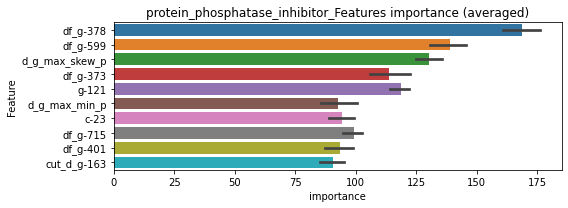

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000364766	valid_1's binary_logloss: 0.00259607


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000362545	valid_1's binary_logloss: 0.00184637
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000362545	valid_1's binary_logloss: 0.00184637


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000373756	valid_1's binary_logloss: 0.000816055


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000372743	valid_1's binary_logloss: 0.00185893


protein_phosphatase_inhibitor logloss: 0.0017795243086747446


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278
target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894956	valid_1's binary_logloss: 0.0706574
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00185437	valid_1's binary_logloss: 0.0599207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931392	valid_1's binary_logloss: 0.0646611
[600]	training's binary_logloss: 0.00147204	valid_1's binary_logloss: 0.0512195
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00158449	valid_1's binary_logloss: 0.050928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107896	valid_1's binary_logloss: 0.0573666
[600]	training's binary_logloss: 0.001585	valid_1's binary_logloss: 0.0453692
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00164433	valid_1's binary_logloss: 0.045226
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.997
y_Threshold: 0.0127730, Threshold: 0.0533819, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00231436	valid_1's binary_logloss: 0.0496094


Remove_noisy_data: 152 → Positive_corect_labels: 645/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, conf_0:0.03737, conf_1:0.06940
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0533819
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_2: 0.0933819
threshold: 0.0933819, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0082658	valid_1's binary_logloss: 0.0625026
[600]	training's binary_logloss: 0.00133101	valid_1's binary_logloss: 0.0496831
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000912391	valid_1's binary_logloss: 0.0487532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00873529	valid_1's binary_logloss: 0.0630045
[600]	training's binary_logloss: 0.00135017	valid_1's binary_logloss: 0.0504579
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00149192	valid_1's binary_logloss: 0.0502983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00943781	valid_1's binary_logloss: 0.0381241
[600]	training's binary_logloss: 0.00146427	valid_1's binary_logloss: 0.0214335
[900]	training's binary_logloss: 0.000767935	valid_1's binary_logloss: 0.0190177
Early stopping, best itera

2 / 3 AUC score:0.999
y_Threshold: 0.0259068, Threshold: 0.0933819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0085384 Vs.target_rate: 0.00433
Num_p_label: 34.0, conf_0:0.07471, conf_1:0.11206
Num_p_label: 34.0, Expected: 17.2, Adj_threshold_1: 0.0933819
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_2: 0.1333819
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_3: 0.1733819
threshold: 0.1733819, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 637.0/3765, y_label_rate: 0.1691899
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757167	valid_1's binary_logloss: 0.0662113
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00209755	valid_1's binary_logloss: 0.0559613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00793163	valid_1's binary_logloss: 0.0529621
[600]	training's binary_logloss: 0.00130992	valid_1's binary_logloss: 0.0421991
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000946837	valid_1's binary_logloss: 0.0408129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853641	valid_1's binary_logloss: 0.0388649
[600]	training's binary_logloss: 0.0013637	valid_1's binary_logloss: 0.0236299
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000779433	valid_1's binary_logloss: 0.0215709
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0284501, Threshold: 0.1733819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 630.0/3751
p_label_rate: 0.0057760 Vs.target_rate: 0.00433
Num_p_label: 23.0, conf_0:0.15604, conf_1:0.19072
threshold: 0.1733819, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 630.0/3751, y_label_rate: 0.1679552


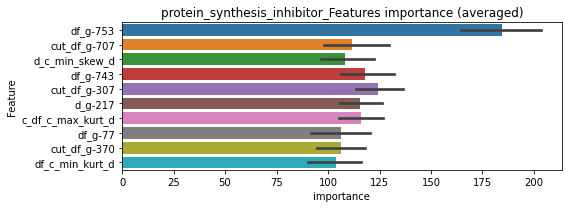

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.00174199	valid_1's binary_logloss: 0.0522846
Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00129365	valid_1's binary_logloss: 0.0340462
Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 937


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00127484	valid_1's binary_logloss: 0.0291581


================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_synthesis_inhibitor logloss: 0.036749694388434194


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.0013889	valid_1's binary_logloss: 0.0315043
neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123588	valid_1's binary_logloss: 0.00349117
[600]	training's binary_logloss: 0.000340913	valid_1's binary_logloss: 0.00184618
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000342819	valid_1's binary_logloss: 0.00184339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012359	valid_1's binary_logloss: 0.00618985
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000348326	valid_1's binary_logloss: 0.00383861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125298	valid_1's binary_logloss: 0.00206708
[600]	training's binary_logloss: 0.000346801	valid_1's binary_logloss: 0.000684838
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000346085	valid_1's binary_logloss: 0.000683432
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0017530, Threshold: 0.0054224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


[600]	training's binary_logloss: 0.000345793	valid_1's binary_logloss: 0.00071743
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345793	valid_1's binary_logloss: 0.00071743


p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00380, conf_1:0.00705
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0054224
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0454224
threshold: 0.0454224, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001165	valid_1's binary_logloss: 0.00349752
[600]	training's binary_logloss: 0.000335585	valid_1's binary_logloss: 0.00204719
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000339223	valid_1's binary_logloss: 0.00203122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115795	valid_1's binary_logloss: 0.00503719
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000366928	valid_1's binary_logloss: 0.00309654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118043	valid_1's binary_logloss: 0.00180861
[600]	training's binary_logloss: 0.000333873	valid_1's binary_logloss: 0.000588937
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00033167	valid_1's binary_logloss: 0.000585229
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0446583, Threshold: 0.0454224, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000340714	valid_1's binary_logloss: 0.000628267
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000339845	valid_1's binary_logloss: 0.000626916


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03634, conf_1:0.05451
threshold: 0.0454224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001165	valid_1's binary_logloss: 0.00349752
[600]	training's binary_logloss: 0.000335585	valid_1's binary_logloss: 0.00204719
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000339223	valid_1's binary_logloss: 0.00203122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115795	valid_1's binary_logloss: 0.00503719
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000366928	valid_1's binary_logloss: 0.00309654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118043	valid_1's binary_logloss: 0.00180861
[600]	training's binary_logloss: 0.000333873	valid_1's binary_logloss: 0.000588937
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00033167	valid_1's binary_logloss: 0.000585229
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0446583, Threshold: 0.0454224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.04088, conf_1:0.04996
threshold: 0.0454224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


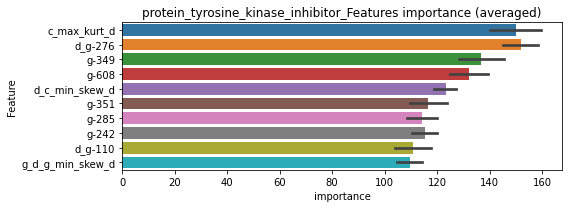

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000352452	valid_1's binary_logloss: 0.0021888


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000347475	valid_1's binary_logloss: 0.00274487


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00033168	valid_1's binary_logloss: 0.000606087
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.00033168	valid_1's binary_logloss: 0.000606087


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00033699	valid_1's binary_logloss: 0.000688685
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00033699	valid_1's binary_logloss: 0.000688685


protein_tyrosine_kinase_inhibitor logloss: 0.0015575877741745821


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444068	valid_1's binary_logloss: 0.0323176
[600]	training's binary_logloss: 0.000783397	valid_1's binary_logloss: 0.0218455
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000570314	valid_1's binary_logloss: 0.0207806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459289	valid_1's binary_logloss: 0.0179365
[600]	training's binary_logloss: 0.000824885	valid_1's binary_logloss: 0.00872973
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000603078	valid_1's binary_logloss: 0.00805519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478164	valid_1's binary_logloss: 0.0124153
[600]	training's binary_logloss: 0.000840353	valid_1's binary_logloss: 0.00498653
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000602395	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0043060, Threshold: 0.0123078, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.00862, conf_1:0.01600
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0123078
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_2: 0.0523078
threshold: 0.0523078, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416104	valid_1's binary_logloss: 0.0290658
[600]	training's binary_logloss: 0.000766011	valid_1's binary_logloss: 0.019373
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000588511	valid_1's binary_logloss: 0.0186049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436191	valid_1's binary_logloss: 0.0169644
[600]	training's binary_logloss: 0.000787284	valid_1's binary_logloss: 0.00835462
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000620958	valid_1's binary_logloss: 0.00766873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442457	valid_1's binary_logloss: 0.0119088
[600]	training's binary_logloss: 0.000807865	valid_1's binary_logloss: 0.00430757
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000590707	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0318756, Threshold: 0.0523078, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00235
Num_p_label: 12.0, conf_0:0.04185, conf_1:0.06277
threshold: 0.0523078, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416104	valid_1's binary_logloss: 0.0290658
[600]	training's binary_logloss: 0.000766011	valid_1's binary_logloss: 0.019373
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000588511	valid_1's binary_logloss: 0.0186049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436191	valid_1's binary_logloss: 0.0169644
[600]	training's binary_logloss: 0.000787284	valid_1's binary_logloss: 0.00835462
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000620958	valid_1's binary_logloss: 0.00766873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442457	valid_1's binary_logloss: 0.0119088
[600]	training's binary_logloss: 0.000807865	valid_1's binary_logloss: 0.00430757
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000590707	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0318756, Threshold: 0.0523078, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00235
Num_p_label: 12.0, conf_0:0.04708, conf_1:0.05754
threshold: 0.0523078, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


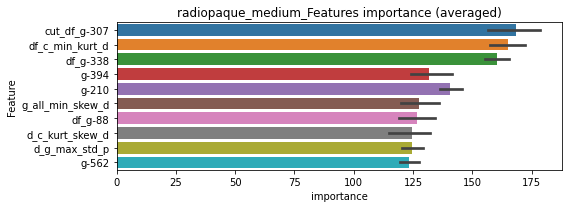

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 radiopaque_medium=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00100933	valid_1's binary_logloss: 0.0202409
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000605229	valid_1's binary_logloss: 0.00823737
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000603351	valid_1's binary_logloss: 0.00821861


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000613714	valid_1's binary_logloss: 0.00334556
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000602472	valid_1's binary_logloss: 0.00331914


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000670168	valid_1's binary_logloss: 0.0114394


radiopaque_medium logloss: 0.010804838069386494


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266
target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325694	valid_1's binary_logloss: 0.206665
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.0105212	valid_1's binary_logloss: 0.196864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0328995	valid_1's binary_logloss: 0.176317
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00658771	valid_1's binary_logloss: 0.158889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332537	valid_1's binary_logloss: 0.19941
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.0159864	valid_1's binary_logloss: 0.189743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299476	valid_1's binary_logloss: 0.218485


1 / 3 AUC score:0.940
y_Threshold: 0.0608910, Threshold: 0.4106453, pos_neg_ratio: 0.8000000
Remove_noisy_data: 321 → Positive_corect_labels: 558/3598
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, conf_0:0.28745, conf_1:0.53384


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.016254	valid_1's binary_logloss: 0.213291


threshold: 0.4106453, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 558.0/3598, y_label_rate: 0.1550862
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196958	valid_1's binary_logloss: 0.113955
[600]	training's binary_logloss: 0.00291981	valid_1's binary_logloss: 0.0858921
[900]	training's binary_logloss: 0.00126722	valid_1's binary_logloss: 0.0817151
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00122507	valid_1's binary_logloss: 0.0813556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194249	valid_1's binary_logloss: 0.121582
[600]	training's binary_logloss: 0.0028947	valid_1's binary_logloss: 0.0966735
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00213806	valid_1's binary_logloss: 0.0948763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192129	valid_1's binary_logloss: 0.112797
[600]	training's binary_logloss: 0.00282595	valid_1's binary_logloss: 0.085919
Early stopping, best iteration is:


2 / 3 AUC score:0.993
y_Threshold: 0.0632608, Threshold: 0.4106453, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 523.0/3528
p_label_rate: 0.0273732 Vs.target_rate: 0.00936
Num_p_label: 109.0, conf_0:0.32852, conf_1:0.49277
Num_p_label: 109.0, Expected: 37.3, Adj_threshold_1: 0.4106453
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_2: 0.4506453
Num_p_label: 98.0, Expected: 37.3, Adj_threshold_3: 0.4906453
Num_p_label: 91.0, Expected: 37.3, Adj_threshold_4: 0.5306453
Num_p_label: 81.0, Expected: 37.3, Adj_threshold_5: 0.5706453
Num_p_label: 73.0, Expected: 37.3, Adj_threshold_6: 0.6106453
Num_p_label: 65.0, Expected: 37.3, Adj_threshold_7: 0.6506453
Num_p_label: 58.0, Expected: 37.3, Adj_threshold_8: 0.6906453
Num_p_label: 55.0, Expected: 37.3, Adj_threshold_9: 0.7306453
threshold: 0.7306453, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 523.0/3528, y_label_rate: 0.1482426
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161587	valid_1's binary_logloss: 0.09934
[600]	training's binary_logloss: 0.00243481	valid_1's binary_logloss: 0.0731088
[900]	training's binary_logloss: 0.00112548	valid_1's binary_logloss: 0.0688038
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.0010682	valid_1's binary_logloss: 0.0685237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157013	valid_1's binary_logloss: 0.108336
[600]	training's binary_logloss: 0.00238338	valid_1's binary_logloss: 0.0896709
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00181823	valid_1's binary_logloss: 0.088429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016323	valid_1's binary_logloss: 0.100669
[600]	training's binary_logloss: 0.00245353	valid_1's binary_logloss: 0.0694986
Early stopping, best iteration is:
[8

3 / 3 AUC score:0.995
y_Threshold: 0.0512767, Threshold: 0.7306453, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 502.0/3486
p_label_rate: 0.0210949 Vs.target_rate: 0.00936
Num_p_label: 84.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 84.0, Expected: 37.3, Adj_threshold_1: 0.7306453
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_2: 0.7706453
Num_p_label: 63.0, Expected: 37.3, Adj_threshold_3: 0.8106453
Num_p_label: 53.0, Expected: 37.3, Adj_threshold_4: 0.8506453
threshold: 0.8506453, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 502.0/3486, y_label_rate: 0.1440046


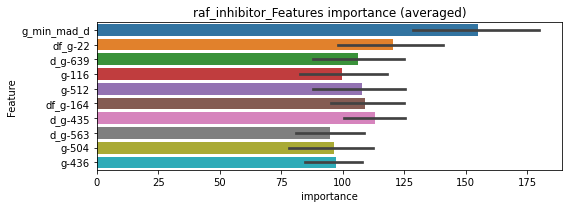

len(train_index) : 2614
len(valid_index) : 872
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2614
len(valid_index) : 872
================================= fold 2/4 raf_inhibitor=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00348548	valid_1's binary_logloss: 0.102452
Training until validation scores don't improve for 30 rounds


len(train_index) : 2615
len(valid_index) : 871
================================= fold 3/4 raf_inhibitor=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.005257	valid_1's binary_logloss: 0.102621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00171655	valid_1's binary_logloss: 0.0798385


len(train_index) : 2615
len(valid_index) : 871
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


raf_inhibitor logloss: 0.09087495549171566


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00200919	valid_1's binary_logloss: 0.0785617
neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662213	valid_1's binary_logloss: 0.00232796
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000274716	valid_1's binary_logloss: 0.00145406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657979	valid_1's binary_logloss: 0.00212476
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000270365	valid_1's binary_logloss: 0.00138221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657154	valid_1's binary_logloss: 0.00201772
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000269806	valid_1's binary_logloss: 0.00177404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670522	valid_1's binary_logloss: 0.00154685


1 / 3 AUC score:1.000
y_Threshold: 0.0012039, Threshold: 0.0204702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01433, conf_1:0.02661
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0204702
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0604702
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.1004702
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.1404702
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.1804702
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.2204702
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2604702
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.3004702
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.3404702


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000283578	valid_1's binary_logloss: 0.000851504


threshold: 0.3404702, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000591988	valid_1's binary_logloss: 0.00206079
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000247086	valid_1's binary_logloss: 0.00137551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594425	valid_1's binary_logloss: 0.00129481
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000250873	valid_1's binary_logloss: 0.000788925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611443	valid_1's binary_logloss: 0.000688564
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000253775	valid_1's binary_logloss: 0.000297865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592308	valid_1's binary_logloss: 0.00101065


2 / 3 AUC score:1.000
y_Threshold: 0.0769786, Threshold: 0.3404702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, conf_0:0.27238, conf_1:0.40856
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.3404702
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.3804702
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.4204702
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.4604702


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000253326	valid_1's binary_logloss: 0.00049578


Num_p_label: 13.0, Expected: 2.0, Adj_threshold_5: 0.5004702
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.5404702
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_7: 0.5804702
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6204702
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_9: 0.6604702
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_10: 0.7004702
threshold: 0.7404702, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000591988	valid_1's binary_logloss: 0.00206079
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000247086	valid_1's binary_logloss: 0.00137551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000594425	valid_1's binary_logloss: 0.00129481
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000250873	valid_1's binary_logloss: 0.000788925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611443	valid_1's binary_logloss: 0.000688564
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000253775	valid_1's binary_logloss: 0.000297865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592308	valid_1's binary_logloss: 0.00101065


3 / 3 AUC score:1.000
y_Threshold: 0.0769786, Threshold: 0.7404702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.7404702
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.7804702
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.8204702
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.8604702
threshold: 0.8604702, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000253326	valid_1's binary_logloss: 0.00049578


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


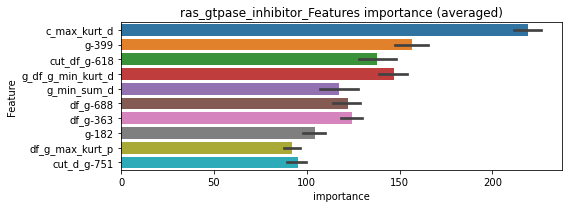

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000255698	valid_1's binary_logloss: 0.000702489


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000252437	valid_1's binary_logloss: 0.000759363
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000260261	valid_1's binary_logloss: 0.000338755
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0005639731264520866


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000256157	valid_1's binary_logloss: 0.000455071
neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494804	valid_1's binary_logloss: 0.0311712
[600]	training's binary_logloss: 0.000883406	valid_1's binary_logloss: 0.0186826
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000632403	valid_1's binary_logloss: 0.0177255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540247	valid_1's binary_logloss: 0.0260184
[600]	training's binary_logloss: 0.000935104	valid_1's binary_logloss: 0.0148151
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000611171	valid_1's binary_logloss: 0.0133797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506417	valid_1's binary_logloss: 0.0339053
[600]	training's binary_logloss: 0.000907214	valid_1's binary_logloss: 0.0272085
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000826088	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0066498, Threshold: 0.0891664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.06242, conf_1:0.11592
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0891664
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1291664
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_3: 0.1691664
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2091664
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2491664
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2891664
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.3291664
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_8: 0.3691664
threshold: 0.3691664, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469405	valid_1's binary_logloss: 0.0283124
[600]	training's binary_logloss: 0.000850968	valid_1's binary_logloss: 0.0186187
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000614243	valid_1's binary_logloss: 0.0177364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472633	valid_1's binary_logloss: 0.0312358
[600]	training's binary_logloss: 0.000869721	valid_1's binary_logloss: 0.0222071
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000644282	valid_1's binary_logloss: 0.0212612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464938	valid_1's binary_logloss: 0.0248408
[600]	training's binary_logloss: 0.000869642	valid_1's binary_logloss: 0.0162019
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00064059	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0351437, Threshold: 0.3691664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0082873 Vs.target_rate: 0.00281
Num_p_label: 33.0, conf_0:0.29533, conf_1:0.44300
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_1: 0.3691664
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_2: 0.4091664
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_3: 0.4491664
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_4: 0.4891664
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_5: 0.5291664
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_6: 0.5691664
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.6091664
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6491664
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6891664
threshold: 0.6891664, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435075	valid_1's binary_logloss: 0.0252166
[600]	training's binary_logloss: 0.00081529	valid_1's binary_logloss: 0.0173914
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000614771	valid_1's binary_logloss: 0.016598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044884	valid_1's binary_logloss: 0.0232047
[600]	training's binary_logloss: 0.000836277	valid_1's binary_logloss: 0.0124584
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000575663	valid_1's binary_logloss: 0.0114488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045873	valid_1's binary_logloss: 0.0255972
[600]	training's binary_logloss: 0.000835967	valid_1's binary_logloss: 0.0144853
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000625784	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0387430, Threshold: 0.6891664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3787
p_label_rate: 0.0032647 Vs.target_rate: 0.00281
Num_p_label: 13.0, conf_0:0.50000, conf_1:0.75808
threshold: 0.6891664, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3787, y_label_rate: 0.1711117


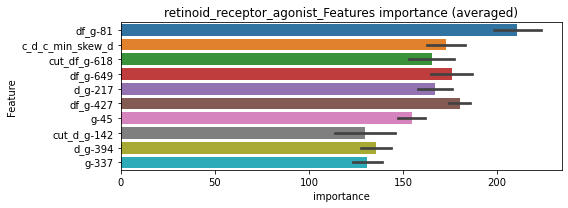

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000658521	valid_1's binary_logloss: 0.010309


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000652286	valid_1's binary_logloss: 0.0143806


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000728783	valid_1's binary_logloss: 0.00838808


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000862283	valid_1's binary_logloss: 0.014693


retinoid_receptor_agonist logloss: 0.011941964717164197


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353896	valid_1's binary_logloss: 0.000597096
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000176871	valid_1's binary_logloss: 0.000332713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000356215	valid_1's binary_logloss: 0.000658929
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000181081	valid_1's binary_logloss: 0.000390505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362457	valid_1's binary_logloss: 0.000378328
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000181221	valid_1's binary_logloss: 0.000193773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359811	valid_1's binary_logloss: 0.000392822


1 / 3 AUC score:1.000
y_Threshold: 0.0004969, Threshold: 0.0020080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00141, conf_1:0.00261
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0020080
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0420080
threshold: 0.0420080, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000182768	valid_1's binary_logloss: 0.000201108


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343194	valid_1's binary_logloss: 0.0011206
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000169269	valid_1's binary_logloss: 0.000792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000338557	valid_1's binary_logloss: 0.000577668
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000167574	valid_1's binary_logloss: 0.000324441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342991	valid_1's binary_logloss: 0.000356231
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000169347	valid_1's binary_logloss: 0.000176644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000341848	valid_1's binary_logloss: 0.000379012


2 / 3 AUC score:1.000
y_Threshold: 0.0998768, Threshold: 0.0420080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, conf_0:0.03361, conf_1:0.05041
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0420080
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0820080
threshold: 0.0820080, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000166473	valid_1's binary_logloss: 0.000189689


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343194	valid_1's binary_logloss: 0.0011206
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000169269	valid_1's binary_logloss: 0.000792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000338557	valid_1's binary_logloss: 0.000577668
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000167574	valid_1's binary_logloss: 0.000324441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342991	valid_1's binary_logloss: 0.000356231
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000169347	valid_1's binary_logloss: 0.000176644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000341848	valid_1's binary_logloss: 0.000379012


3 / 3 AUC score:1.000
y_Threshold: 0.0998768, Threshold: 0.0820080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.07381, conf_1:0.09021
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0820080
threshold: 0.0820080, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000166473	valid_1's binary_logloss: 0.000189689


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


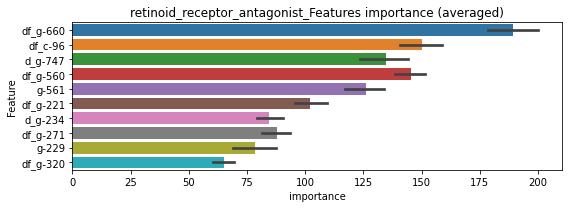

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017193	valid_1's binary_logloss: 0.000716515
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000170348	valid_1's binary_logloss: 0.000712399


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172349	valid_1's binary_logloss: 0.000243605
Early stopping, best iteration is:
[1104]	training's binary_logloss: 0.000169618	valid_1's binary_logloss: 0.000240233


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172192	valid_1's binary_logloss: 0.000193941


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000168348	valid_1's binary_logloss: 0.000189716
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171993	valid_1's binary_logloss: 0.000205443
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000169764	valid_1's binary_logloss: 0.000202924


retinoid_receptor_antagonist logloss: 0.00033641660932631713


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283
target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213795	valid_1's binary_logloss: 0.0109963
[600]	training's binary_logloss: 0.000472674	valid_1's binary_logloss: 0.00587301
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00043256	valid_1's binary_logloss: 0.00581154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217509	valid_1's binary_logloss: 0.00583508
[600]	training's binary_logloss: 0.00048089	valid_1's binary_logloss: 0.00226592
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000427968	valid_1's binary_logloss: 0.00213052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221761	valid_1's binary_logloss: 0.00508515
[600]	training's binary_logloss: 0.000477622	valid_1's binary_logloss: 0.00194854
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000436123	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0035838, Threshold: 0.0101620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, conf_0:0.00711, conf_1:0.01321
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0101620
Num_p_label: 4.0, Expected: 5.9, Adj_threshold_2: 0.0501620
threshold: 0.0501620, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192702	valid_1's binary_logloss: 0.00930306
[600]	training's binary_logloss: 0.000446197	valid_1's binary_logloss: 0.00540239
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00044156	valid_1's binary_logloss: 0.00539281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196136	valid_1's binary_logloss: 0.00525595
[600]	training's binary_logloss: 0.000453347	valid_1's binary_logloss: 0.00200059
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000422172	valid_1's binary_logloss: 0.0019298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207696	valid_1's binary_logloss: 0.00383027
[600]	training's binary_logloss: 0.000463749	valid_1's binary_logloss: 0.00129683
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000431136	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0364385, Threshold: 0.0501620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00147
Num_p_label: 12.0, conf_0:0.04013, conf_1:0.06019
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_1: 0.0501620
threshold: 0.0501620, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192702	valid_1's binary_logloss: 0.00930306
[600]	training's binary_logloss: 0.000446197	valid_1's binary_logloss: 0.00540239
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00044156	valid_1's binary_logloss: 0.00539281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196136	valid_1's binary_logloss: 0.00525595
[600]	training's binary_logloss: 0.000453347	valid_1's binary_logloss: 0.00200059
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000422172	valid_1's binary_logloss: 0.0019298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207696	valid_1's binary_logloss: 0.00383027
[600]	training's binary_logloss: 0.000463749	valid_1's binary_logloss: 0.00129683
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000431136	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0364385, Threshold: 0.0501620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00147
Num_p_label: 12.0, conf_0:0.04515, conf_1:0.05518
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_1: 0.0501620
threshold: 0.0501620, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


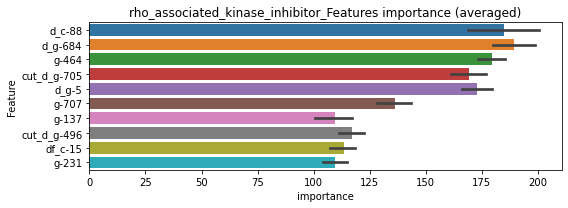

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000430365	valid_1's binary_logloss: 0.0051637


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430179	valid_1's binary_logloss: 0.00226049
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000428951	valid_1's binary_logloss: 0.00225629


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435708	valid_1's binary_logloss: 0.00230843
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000436457	valid_1's binary_logloss: 0.00230827


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000442251	valid_1's binary_logloss: 0.00587735


rho_associated_kinase_inhibitor logloss: 0.003902112754364


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246902	valid_1's binary_logloss: 0.0184106
[600]	training's binary_logloss: 0.000517485	valid_1's binary_logloss: 0.0122949
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000480592	valid_1's binary_logloss: 0.0121393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262521	valid_1's binary_logloss: 0.00820082
[600]	training's binary_logloss: 0.000525406	valid_1's binary_logloss: 0.0035756
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000467354	valid_1's binary_logloss: 0.00341674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026121	valid_1's binary_logloss: 0.00772826
[600]	training's binary_logloss: 0.000536712	valid_1's binary_logloss: 0.00268225
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000478649	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0039078, Threshold: 0.0187689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01314, conf_1:0.02440
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0187689
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0587689
threshold: 0.0587689, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021869	valid_1's binary_logloss: 0.0178704
[600]	training's binary_logloss: 0.000481937	valid_1's binary_logloss: 0.0123233
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000451535	valid_1's binary_logloss: 0.0121705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239995	valid_1's binary_logloss: 0.00643364
[600]	training's binary_logloss: 0.000504638	valid_1's binary_logloss: 0.00262379
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000451646	valid_1's binary_logloss: 0.00252965
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234518	valid_1's binary_logloss: 0.00616312
[600]	training's binary_logloss: 0.000499413	valid_1's binary_logloss: 0.00195923
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000460143	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0451692, Threshold: 0.0587689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0075339 Vs.target_rate: 0.00155
Num_p_label: 30.0, conf_0:0.04702, conf_1:0.07052
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_1: 0.0587689
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0987689
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_3: 0.1387689
threshold: 0.1387689, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225842	valid_1's binary_logloss: 0.0133451
[600]	training's binary_logloss: 0.000491613	valid_1's binary_logloss: 0.00903222
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000465142	valid_1's binary_logloss: 0.00898488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234729	valid_1's binary_logloss: 0.00718319
[600]	training's binary_logloss: 0.000498307	valid_1's binary_logloss: 0.00328691
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000470956	valid_1's binary_logloss: 0.00324939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224687	valid_1's binary_logloss: 0.0100022
[600]	training's binary_logloss: 0.000488704	valid_1's binary_logloss: 0.00510442
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000450935	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0235046, Threshold: 0.1387689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.12489, conf_1:0.15265
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.1387689
threshold: 0.1387689, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


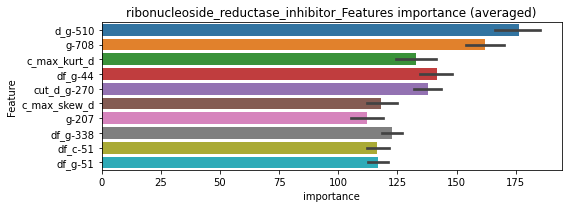

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000553929	valid_1's binary_logloss: 0.0090642


================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000481815	valid_1's binary_logloss: 0.00522603


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000479446	valid_1's binary_logloss: 0.00617136


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000467721	valid_1's binary_logloss: 0.00227443


ribonucleoside_reductase_inhibitor logloss: 0.005684095546973668


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139108	valid_1's binary_logloss: 0.0047985
[600]	training's binary_logloss: 0.000385662	valid_1's binary_logloss: 0.0022181
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000385662	valid_1's binary_logloss: 0.0022181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139947	valid_1's binary_logloss: 0.00350216
[600]	training's binary_logloss: 0.000387261	valid_1's binary_logloss: 0.00150469
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000387998	valid_1's binary_logloss: 0.00150209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144245	valid_1's binary_logloss: 0.00403743
[600]	training's binary_logloss: 0.000383793	valid_1's binary_logloss: 0.00220152
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000388914	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022918, Threshold: 0.0068230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00478, conf_1:0.00887
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0068230
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0468230


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00039467	valid_1's binary_logloss: 0.00200241


threshold: 0.0468230, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129494	valid_1's binary_logloss: 0.00414339
[600]	training's binary_logloss: 0.000365672	valid_1's binary_logloss: 0.00200539
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000365672	valid_1's binary_logloss: 0.00200539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134244	valid_1's binary_logloss: 0.0030803
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000380718	valid_1's binary_logloss: 0.00129152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132867	valid_1's binary_logloss: 0.00304852
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000390212	valid_1's binary_logloss: 0.00132326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133382	valid_1's binary_logloss: 0.00299576


2 / 3 AUC score:1.000
y_Threshold: 0.1269423, Threshold: 0.0468230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00105
Num_p_label: 13.0, conf_0:0.03746, conf_1:0.05619
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_1: 0.0468230
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_2: 0.0868230


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000378976	valid_1's binary_logloss: 0.00108485


threshold: 0.0868230, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129494	valid_1's binary_logloss: 0.00414339
[600]	training's binary_logloss: 0.000365672	valid_1's binary_logloss: 0.00200539
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000365672	valid_1's binary_logloss: 0.00200539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134244	valid_1's binary_logloss: 0.0030803
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000380718	valid_1's binary_logloss: 0.00129152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132867	valid_1's binary_logloss: 0.00304852
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000390212	valid_1's binary_logloss: 0.00132326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133382	valid_1's binary_logloss: 0.00299576


3 / 3 AUC score:1.000
y_Threshold: 0.1269423, Threshold: 0.0868230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, conf_0:0.07814, conf_1:0.09551


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000378976	valid_1's binary_logloss: 0.00108485


threshold: 0.0868230, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


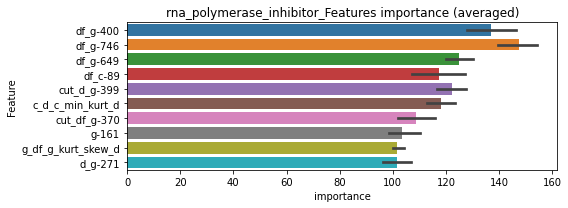

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000376496	valid_1's binary_logloss: 0.00163791


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000392429	valid_1's binary_logloss: 0.00105072


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000387299	valid_1's binary_logloss: 0.00123983


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000391684	valid_1's binary_logloss: 0.000993104


rna_polymerase_inhibitor logloss: 0.0012305105998469594


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249
target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0263681	valid_1's binary_logloss: 0.208493
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.020322	valid_1's binary_logloss: 0.206768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272891	valid_1's binary_logloss: 0.196679
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.010895	valid_1's binary_logloss: 0.191857
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0289185	valid_1's binary_logloss: 0.167608
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.0106664	valid_1's binary_logloss: 0.157006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287237	valid_1's binary_logloss: 0.196428


1 / 3 AUC score:0.940
y_Threshold: 0.0518867, Threshold: 0.3804580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 321 → Positive_corect_labels: 554/3577
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, conf_0:0.26632, conf_1:0.49460


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0189574	valid_1's binary_logloss: 0.193108


threshold: 0.3804580, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 554.0/3577, y_label_rate: 0.1548784
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143606	valid_1's binary_logloss: 0.128874
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00436706	valid_1's binary_logloss: 0.117894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164115	valid_1's binary_logloss: 0.100341
[600]	training's binary_logloss: 0.00256626	valid_1's binary_logloss: 0.085865
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00214168	valid_1's binary_logloss: 0.0852147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148705	valid_1's binary_logloss: 0.125695
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00286227	valid_1's binary_logloss: 0.114168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147456	valid_1's binary_logloss: 0.123084


2 / 3 AUC score:0.993
y_Threshold: 0.0524771, Threshold: 0.3804580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 520.0/3509
p_label_rate: 0.0198393 Vs.target_rate: 0.00991
Num_p_label: 79.0, conf_0:0.30437, conf_1:0.45655
Num_p_label: 79.0, Expected: 39.5, Adj_threshold_1: 0.3804580
Num_p_label: 74.0, Expected: 39.5, Adj_threshold_2: 0.4204580
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_3: 0.4604580


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00621051	valid_1's binary_logloss: 0.117298


Num_p_label: 67.0, Expected: 39.5, Adj_threshold_4: 0.5004580
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_5: 0.5404580
Num_p_label: 56.0, Expected: 39.5, Adj_threshold_6: 0.5804580
threshold: 0.5804580, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 520.0/3509, y_label_rate: 0.1481904
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114031	valid_1's binary_logloss: 0.106546
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00320993	valid_1's binary_logloss: 0.0963039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113729	valid_1's binary_logloss: 0.110657
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00489009	valid_1's binary_logloss: 0.106574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118004	valid_1's binary_logloss: 0.0926682
[600]	training's binary_logloss: 0.00196027	valid_1's binary_logloss: 0.0765928
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00148456	valid_1's binary_logloss: 0.0753779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118743	valid_1's binary_logloss: 0.0985621
[600]	training's b

3 / 3 AUC score:0.997
y_Threshold: 0.0539603, Threshold: 0.5804580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 499.0/3467
p_label_rate: 0.0165746 Vs.target_rate: 0.00991
Num_p_label: 66.0, conf_0:0.50000, conf_1:0.63850
Num_p_label: 66.0, Expected: 39.5, Adj_threshold_1: 0.5804580
Num_p_label: 63.0, Expected: 39.5, Adj_threshold_2: 0.6204580
Num_p_label: 54.0, Expected: 39.5, Adj_threshold_3: 0.6604580
threshold: 0.6604580, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 499.0/3467, y_label_rate: 0.1439285


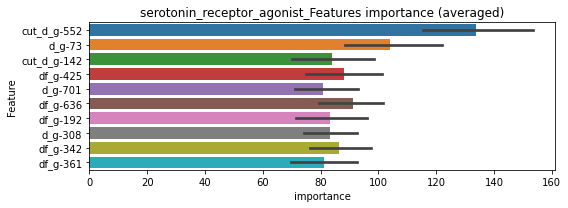

len(train_index) : 2600
len(valid_index) : 867
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2600
len(valid_index) : 867
================================= fold 2/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0037223	valid_1's binary_logloss: 0.0988692
Training until validation scores don't improve for 30 rounds


len(train_index) : 2600
len(valid_index) : 867
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00608896	valid_1's binary_logloss: 0.0878241
Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 866
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00786336	valid_1's binary_logloss: 0.0883348
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.08655648477767962


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.0022295	valid_1's binary_logloss: 0.07118
neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239
target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0748248	valid_1's binary_logloss: 0.340765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0685133	valid_1's binary_logloss: 0.346312
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0731074	valid_1's binary_logloss: 0.335172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.057048	valid_1's binary_logloss: 0.332436
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0640359	valid_1's binary_logloss: 0.330601


1 / 3 AUC score:0.797
y_Threshold: 0.1306191, Threshold: 0.5229609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 645 → Positive_corect_labels: 390/3241
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, conf_0:0.36607, conf_1:0.67985
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5229609
Num_p_label: 48.0, Expected: 67.6, Adj_threshold_2: 0.4929609
threshold: 0.4929609, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 390.0/3241, y_label_rate: 0.1203332
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167011	valid_1's binary_logloss: 0.174371
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.0208954	valid_1's binary_logloss: 0.173494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165345	valid_1's binary_logloss: 0.179953
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0126599	valid_1's binary_logloss: 0.178451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0214555	valid_1's binary_logloss: 0.176489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165811	valid_1's binary_logloss: 0.174449


2 / 3 AUC score:0.957
y_Threshold: 0.0770477, Threshold: 0.4929609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 316.0/3093


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0103063	valid_1's binary_logloss: 0.170879


p_label_rate: 0.0293822 Vs.target_rate: 0.01696
Num_p_label: 117.0, conf_0:0.39437, conf_1:0.59155
Num_p_label: 117.0, Expected: 67.6, Adj_threshold_1: 0.4929609
Num_p_label: 111.0, Expected: 67.6, Adj_threshold_2: 0.5329609
Num_p_label: 105.0, Expected: 67.6, Adj_threshold_3: 0.5729609
Num_p_label: 101.0, Expected: 67.6, Adj_threshold_4: 0.6129609
threshold: 0.6129609, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 316.0/3093, y_label_rate: 0.1021662
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102311	valid_1's binary_logloss: 0.131999
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.0063937	valid_1's binary_logloss: 0.12974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106564	valid_1's binary_logloss: 0.120015
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00469993	valid_1's binary_logloss: 0.112315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996273	valid_1's binary_logloss: 0.132843
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00853578	valid_1's binary_logloss: 0.131586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100575	valid_1's binary_logloss: 0.13284


3 / 3 AUC score:0.989
y_Threshold: 0.0611462, Threshold: 0.6129609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 283.0/3027
p_label_rate: 0.0339026 Vs.target_rate: 0.01696
Num_p_label: 135.0, conf_0:0.50000, conf_1:0.67426
Num_p_label: 135.0, Expected: 67.6, Adj_threshold_1: 0.6129609


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00706299	valid_1's binary_logloss: 0.130319


Num_p_label: 131.0, Expected: 67.6, Adj_threshold_2: 0.6529609
Num_p_label: 122.0, Expected: 67.6, Adj_threshold_3: 0.6929609
Num_p_label: 118.0, Expected: 67.6, Adj_threshold_4: 0.7329609
Num_p_label: 114.0, Expected: 67.6, Adj_threshold_5: 0.7729609
Num_p_label: 105.0, Expected: 67.6, Adj_threshold_6: 0.8129609
Num_p_label: 95.0, Expected: 67.6, Adj_threshold_7: 0.8529609
threshold: 0.8529609, positive_p_label: 95.0/3982, p_label_rate: 0.0238574
positive_y_label: 283.0/3027, y_label_rate: 0.0934919


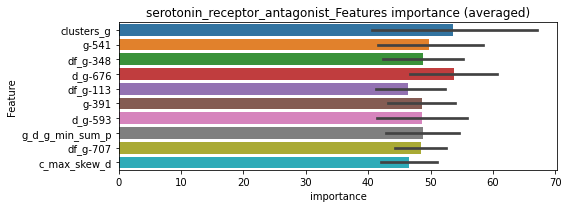

len(train_index) : 2270
len(valid_index) : 757
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2270
len(valid_index) : 757
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00624336	valid_1's binary_logloss: 0.115931
Training until validation scores don't improve for 30 rounds


len(train_index) : 2270
len(valid_index) : 757
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00568293	valid_1's binary_logloss: 0.105668
Training until validation scores don't improve for 30 rounds


len(train_index) : 2271
len(valid_index) : 756
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[212]	training's binary_logloss: 0.0053862	valid_1's binary_logloss: 0.105704
Training until validation scores don't improve for 30 rounds


serotonin_receptor_antagonist logloss: 0.11934317741656603


Early stopping, best iteration is:
[114]	training's binary_logloss: 0.0144687	valid_1's binary_logloss: 0.15011
neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300288	valid_1's binary_logloss: 0.0179482
[600]	training's binary_logloss: 0.000592618	valid_1's binary_logloss: 0.0114966
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000512553	valid_1's binary_logloss: 0.0112625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027726	valid_1's binary_logloss: 0.0225975
[600]	training's binary_logloss: 0.000581789	valid_1's binary_logloss: 0.0173009
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000544187	valid_1's binary_logloss: 0.0170477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311817	valid_1's binary_logloss: 0.011842
[600]	training's binary_logloss: 0.000610425	valid_1's binary_logloss: 0.00562607
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000527404	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0032842, Threshold: 0.0284795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, conf_0:0.01994, conf_1:0.03702
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0284795
Num_p_label: 9.0, Expected: 7.4, Adj_threshold_2: 0.0684795
threshold: 0.0684795, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268134	valid_1's binary_logloss: 0.0160536
[600]	training's binary_logloss: 0.000557954	valid_1's binary_logloss: 0.0103275
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000536066	valid_1's binary_logloss: 0.0101991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256496	valid_1's binary_logloss: 0.0222968
[600]	training's binary_logloss: 0.000547072	valid_1's binary_logloss: 0.0167659
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000552071	valid_1's binary_logloss: 0.0167049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276949	valid_1's binary_logloss: 0.0121129
[600]	training's binary_logloss: 0.0005811	valid_1's binary_logloss: 0.00670146
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000520616	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0397155, Threshold: 0.0684795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0256153 Vs.target_rate: 0.00185
Num_p_label: 102.0, conf_0:0.05478, conf_1:0.08218
Num_p_label: 102.0, Expected: 7.4, Adj_threshold_1: 0.0684795
Num_p_label: 84.0, Expected: 7.4, Adj_threshold_2: 0.1084795
Num_p_label: 73.0, Expected: 7.4, Adj_threshold_3: 0.1484795
Num_p_label: 64.0, Expected: 7.4, Adj_threshold_4: 0.1884795
Num_p_label: 56.0, Expected: 7.4, Adj_threshold_5: 0.2284795
Num_p_label: 50.0, Expected: 7.4, Adj_threshold_6: 0.2684795
Num_p_label: 41.0, Expected: 7.4, Adj_threshold_7: 0.3084795
Num_p_label: 38.0, Expected: 7.4, Adj_threshold_8: 0.3484795
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_9: 0.3884795
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_10: 0.4284795
threshold: 0.4684795, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253807	valid_1's binary_logloss: 0.0111129
[600]	training's binary_logloss: 0.000549775	valid_1's binary_logloss: 0.00611034
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000498456	valid_1's binary_logloss: 0.00597119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025545	valid_1's binary_logloss: 0.0168736
[600]	training's binary_logloss: 0.000549594	valid_1's binary_logloss: 0.012386
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000488155	valid_1's binary_logloss: 0.0121344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252673	valid_1's binary_logloss: 0.0170313
[600]	training's binary_logloss: 0.000552012	valid_1's binary_logloss: 0.011331
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00050898	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0540397, Threshold: 0.4684795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0060271 Vs.target_rate: 0.00185
Num_p_label: 24.0, conf_0:0.42163, conf_1:0.51533
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_1: 0.4684795
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_2: 0.5084795
threshold: 0.5084795, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


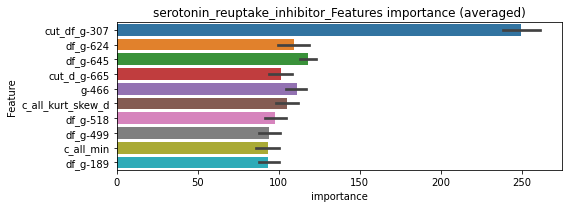

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000527662	valid_1's binary_logloss: 0.00979148


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000523484	valid_1's binary_logloss: 0.00715683


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000560095	valid_1's binary_logloss: 0.0176158


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000540847	valid_1's binary_logloss: 0.00745565


serotonin_reuptake_inhibitor logloss: 0.010507937993610805


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206397	valid_1's binary_logloss: 0.0214331
[600]	training's binary_logloss: 0.00047501	valid_1's binary_logloss: 0.0170695
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000501779	valid_1's binary_logloss: 0.0169023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234018	valid_1's binary_logloss: 0.00868201
[600]	training's binary_logloss: 0.000493758	valid_1's binary_logloss: 0.00566044
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000453081	valid_1's binary_logloss: 0.00559803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236156	valid_1's binary_logloss: 0.0050703
[600]	training's binary_logloss: 0.000501553	valid_1's binary_logloss: 0.00193841
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000458541	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0028247, Threshold: 0.0246072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01723, conf_1:0.03199
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0246072
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0646072
threshold: 0.0646072, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190342	valid_1's binary_logloss: 0.0205723
[600]	training's binary_logloss: 0.000449215	valid_1's binary_logloss: 0.0149783
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000446254	valid_1's binary_logloss: 0.0149353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212517	valid_1's binary_logloss: 0.00687129
[600]	training's binary_logloss: 0.000469041	valid_1's binary_logloss: 0.00385034
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000461092	valid_1's binary_logloss: 0.00383491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217659	valid_1's binary_logloss: 0.00468122
[600]	training's binary_logloss: 0.000482928	valid_1's binary_logloss: 0.00164712
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000445464	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0674727, Threshold: 0.0646072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0133099 Vs.target_rate: 0.00151
Num_p_label: 53.0, conf_0:0.05169, conf_1:0.07753
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_1: 0.0646072
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_2: 0.1046072
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_3: 0.1446072
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_4: 0.1846072
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_5: 0.2246072
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_6: 0.2646072
threshold: 0.2646072, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194569	valid_1's binary_logloss: 0.0174448
[600]	training's binary_logloss: 0.000452636	valid_1's binary_logloss: 0.0135184
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000458905	valid_1's binary_logloss: 0.0134767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206848	valid_1's binary_logloss: 0.0115667
[600]	training's binary_logloss: 0.000474004	valid_1's binary_logloss: 0.00550926
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00043968	valid_1's binary_logloss: 0.00532095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206326	valid_1's binary_logloss: 0.00953271
[600]	training's binary_logloss: 0.000463162	valid_1's binary_logloss: 0.00583255
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000483238	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0163810, Threshold: 0.2646072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.23815, conf_1:0.29107
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.2646072
threshold: 0.2646072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


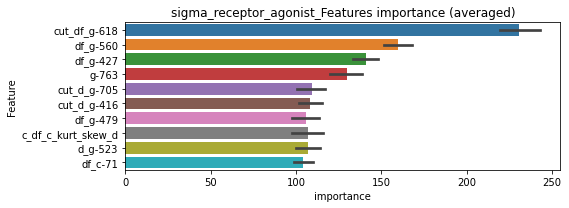

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000526421	valid_1's binary_logloss: 0.00719051


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000452933	valid_1's binary_logloss: 0.00481608


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.00044904	valid_1's binary_logloss: 0.00147864


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.00778378763827624


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000603292	valid_1's binary_logloss: 0.0176582
neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257148	valid_1's binary_logloss: 0.0141636
[600]	training's binary_logloss: 0.000520113	valid_1's binary_logloss: 0.00872343
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000472245	valid_1's binary_logloss: 0.00858909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260018	valid_1's binary_logloss: 0.00972751
[600]	training's binary_logloss: 0.000516425	valid_1's binary_logloss: 0.00437492
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000484499	valid_1's binary_logloss: 0.00430839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027479	valid_1's binary_logloss: 0.00591196
[600]	training's binary_logloss: 0.000543438	valid_1's binary_logloss: 0.00199459
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000486852	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0029235, Threshold: 0.0100797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00706, conf_1:0.01310
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0100797
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0500797
threshold: 0.0500797, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024048	valid_1's binary_logloss: 0.0135295
[600]	training's binary_logloss: 0.000503529	valid_1's binary_logloss: 0.00835322
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000512495	valid_1's binary_logloss: 0.00833215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241406	valid_1's binary_logloss: 0.00903107
[600]	training's binary_logloss: 0.00049945	valid_1's binary_logloss: 0.00402571
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000470991	valid_1's binary_logloss: 0.00397841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259556	valid_1's binary_logloss: 0.00482944
[600]	training's binary_logloss: 0.000521016	valid_1's binary_logloss: 0.00142503
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000476607	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0278667, Threshold: 0.0500797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04006, conf_1:0.06010
threshold: 0.0500797, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024048	valid_1's binary_logloss: 0.0135295
[600]	training's binary_logloss: 0.000503529	valid_1's binary_logloss: 0.00835322
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000512495	valid_1's binary_logloss: 0.00833215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241406	valid_1's binary_logloss: 0.00903107
[600]	training's binary_logloss: 0.00049945	valid_1's binary_logloss: 0.00402571
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000470991	valid_1's binary_logloss: 0.00397841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259556	valid_1's binary_logloss: 0.00482944
[600]	training's binary_logloss: 0.000521016	valid_1's binary_logloss: 0.00142503
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000476607	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0278667, Threshold: 0.0500797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04507, conf_1:0.05509
threshold: 0.0500797, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


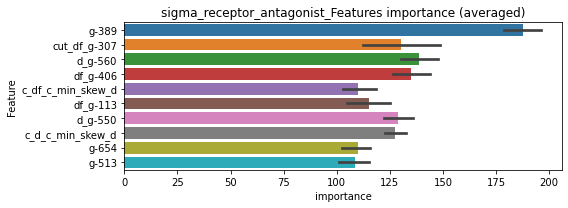

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000477365	valid_1's binary_logloss: 0.00694188


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000473895	valid_1's binary_logloss: 0.00357768


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000495884	valid_1's binary_logloss: 0.00142671


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000468708	valid_1's binary_logloss: 0.00728504


sigma_receptor_antagonist logloss: 0.004811007181716285


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152217	valid_1's binary_logloss: 0.00361018
[600]	training's binary_logloss: 0.000380275	valid_1's binary_logloss: 0.00145739
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000379694	valid_1's binary_logloss: 0.00145239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143051	valid_1's binary_logloss: 0.00865811
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000381615	valid_1's binary_logloss: 0.00585684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153421	valid_1's binary_logloss: 0.00232035
[600]	training's binary_logloss: 0.000381127	valid_1's binary_logloss: 0.000690831
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000376756	valid_1's binary_logloss: 0.000684988
Training until validation scores don't improve for 30 rou

1 / 3 AUC score:1.000
y_Threshold: 0.0020300, Threshold: 0.0050297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00352, conf_1:0.00654
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0050297
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0450297
threshold: 0.0450297, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141906	valid_1's binary_logloss: 0.00320587
[600]	training's binary_logloss: 0.000368328	valid_1's binary_logloss: 0.00117938
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000360123	valid_1's binary_logloss: 0.00116214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001358	valid_1's binary_logloss: 0.00783789
[600]	training's binary_logloss: 0.000357593	valid_1's binary_logloss: 0.0052321
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000357771	valid_1's binary_logloss: 0.00522791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142312	valid_1's binary_logloss: 0.00237891
[600]	training's binary_logloss: 0.000366916	valid_1's binary_logloss: 0.000729594
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000366045	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0343659, Threshold: 0.0450297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.03602, conf_1:0.05404
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0450297


[600]	training's binary_logloss: 0.000371647	valid_1's binary_logloss: 0.000834031
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000371647	valid_1's binary_logloss: 0.000834031


threshold: 0.0450297, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141906	valid_1's binary_logloss: 0.00320587
[600]	training's binary_logloss: 0.000368328	valid_1's binary_logloss: 0.00117938
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000360123	valid_1's binary_logloss: 0.00116214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001358	valid_1's binary_logloss: 0.00783789
[600]	training's binary_logloss: 0.000357593	valid_1's binary_logloss: 0.0052321
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000357771	valid_1's binary_logloss: 0.00522791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142312	valid_1's binary_logloss: 0.00237891
[600]	training's binary_logloss: 0.000366916	valid_1's binary_logloss: 0.000729594
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000366045	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0343659, Threshold: 0.0450297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.04053, conf_1:0.04953
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0450297


[600]	training's binary_logloss: 0.000371647	valid_1's binary_logloss: 0.000834031
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000371647	valid_1's binary_logloss: 0.000834031


threshold: 0.0450297, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


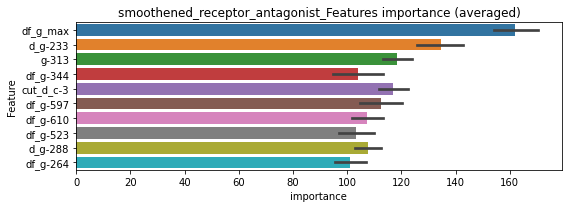

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000372314	valid_1's binary_logloss: 0.00120781


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000374858	valid_1's binary_logloss: 0.00417514


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000377104	valid_1's binary_logloss: 0.000731819


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000384735	valid_1's binary_logloss: 0.000847543


smoothened_receptor_antagonist logloss: 0.0017410778963786486


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261
target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311842	valid_1's binary_logloss: 0.228772
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0222825	valid_1's binary_logloss: 0.227122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301237	valid_1's binary_logloss: 0.246684
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0344276	valid_1's binary_logloss: 0.246071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0305333	valid_1's binary_logloss: 0.218997
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.01898	valid_1's binary_logloss: 0.214497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0303816	valid_1's binary_logloss: 0.205924
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.020645	valid_1's binary_logloss: 0.20

1 / 3 AUC score:0.923
y_Threshold: 0.0710459, Threshold: 0.1765755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 375 → Positive_corect_labels: 530/3538
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.12360, conf_1:0.22955
threshold: 0.1765755, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 530.0/3538, y_label_rate: 0.1498021
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155891	valid_1's binary_logloss: 0.137549
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00552439	valid_1's binary_logloss: 0.128742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160808	valid_1's binary_logloss: 0.115195
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00484673	valid_1's binary_logloss: 0.109254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154949	valid_1's binary_logloss: 0.158382
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0122085	valid_1's binary_logloss: 0.154458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166005	valid_1's binary_logloss: 0.13218
[600]	training's binary_logloss: 0.00260338	valid_1's binary_logloss: 0.122271
Early stopping, best iter

2 / 3 AUC score:0.986
y_Threshold: 0.0578750, Threshold: 0.1765755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 481.0/3440
p_label_rate: 0.0173280 Vs.target_rate: 0.01121
Num_p_label: 69.0, conf_0:0.14126, conf_1:0.21189
Num_p_label: 69.0, Expected: 44.6, Adj_threshold_1: 0.1765755
Num_p_label: 51.0, Expected: 44.6, Adj_threshold_2: 0.2165755
threshold: 0.2165755, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 481.0/3440, y_label_rate: 0.1398256
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114495	valid_1's binary_logloss: 0.10019
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00306183	valid_1's binary_logloss: 0.0905551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123326	valid_1's binary_logloss: 0.0832466
[600]	training's binary_logloss: 0.00205958	valid_1's binary_logloss: 0.0690306
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.002044	valid_1's binary_logloss: 0.068843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112157	valid_1's binary_logloss: 0.114833
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00299933	valid_1's binary_logloss: 0.104728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116734	valid_1's binary_logloss: 0.107939


3 / 3 AUC score:0.994
y_Threshold: 0.0548686, Threshold: 0.2165755, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 454.0/3386
p_label_rate: 0.0138122 Vs.target_rate: 0.01121
Num_p_label: 55.0, conf_0:0.19492, conf_1:0.23823


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00417741	valid_1's binary_logloss: 0.101347


threshold: 0.2165755, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 454.0/3386, y_label_rate: 0.1340815


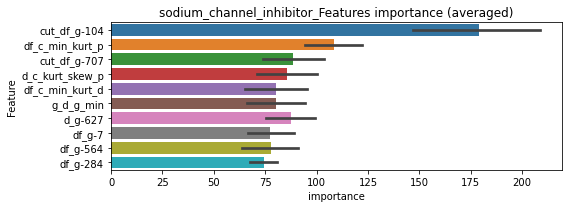

len(train_index) : 2539
len(valid_index) : 847
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2539
len(valid_index) : 847
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00535741	valid_1's binary_logloss: 0.100209
Training until validation scores don't improve for 30 rounds


len(train_index) : 2540
len(valid_index) : 846
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.001862	valid_1's binary_logloss: 0.0578611
Training until validation scores don't improve for 30 rounds


len(train_index) : 2540
len(valid_index) : 846
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00447079	valid_1's binary_logloss: 0.0824287
Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.07807438550626136


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00429204	valid_1's binary_logloss: 0.0717961
neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204168	valid_1's binary_logloss: 0.00863847
[600]	training's binary_logloss: 0.000443934	valid_1's binary_logloss: 0.00434057
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000432824	valid_1's binary_logloss: 0.00428872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199372	valid_1's binary_logloss: 0.00917354
[600]	training's binary_logloss: 0.000447747	valid_1's binary_logloss: 0.00620684
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000445217	valid_1's binary_logloss: 0.00619831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210922	valid_1's binary_logloss: 0.0061165
[600]	training's binary_logloss: 0.000453421	valid_1's binary_logloss: 0.00370447
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00044704	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022279, Threshold: 0.0067598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00473, conf_1:0.00879
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0067598
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_2: 0.0467598
threshold: 0.0467598, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195316	valid_1's binary_logloss: 0.00814752
[600]	training's binary_logloss: 0.000434489	valid_1's binary_logloss: 0.00383742
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000427892	valid_1's binary_logloss: 0.00380105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191323	valid_1's binary_logloss: 0.0100055
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000478043	valid_1's binary_logloss: 0.00735727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198733	valid_1's binary_logloss: 0.0062555
[600]	training's binary_logloss: 0.000442566	valid_1's binary_logloss: 0.00414954
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000436692	valid_1's binary_logloss: 0.00413891
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0195053, Threshold: 0.0467598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0022602 Vs.target_rate: 0.00134
Num_p_label: 9.0, conf_0:0.03741, conf_1:0.05611
Num_p_label: 9.0, Expected: 5.4, Adj_threshold_1: 0.0467598
threshold: 0.0467598, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186951	valid_1's binary_logloss: 0.007659
[600]	training's binary_logloss: 0.000436369	valid_1's binary_logloss: 0.0035314
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000409604	valid_1's binary_logloss: 0.00345244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200642	valid_1's binary_logloss: 0.00612999
[600]	training's binary_logloss: 0.000438639	valid_1's binary_logloss: 0.00265145
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00041948	valid_1's binary_logloss: 0.00261165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195114	valid_1's binary_logloss: 0.00772097
[600]	training's binary_logloss: 0.000437422	valid_1's binary_logloss: 0.00363627
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000431577	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0648526, Threshold: 0.0467598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00134
Num_p_label: 6.0, conf_0:0.04208, conf_1:0.05144
threshold: 0.0467598, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


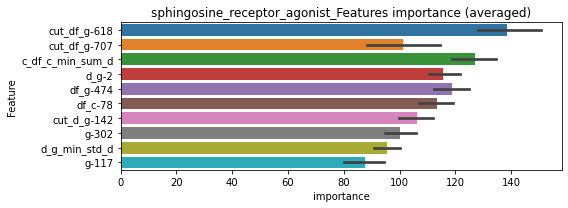

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.00044369	valid_1's binary_logloss: 0.00319581


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000435104	valid_1's binary_logloss: 0.00273191


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000439106	valid_1's binary_logloss: 0.00320392


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000423698	valid_1's binary_logloss: 0.00488199


sphingosine_receptor_agonist logloss: 0.003505045376625519


neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278
target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562905	valid_1's binary_logloss: 0.0299694
[600]	training's binary_logloss: 0.000971011	valid_1's binary_logloss: 0.0189948
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000708482	valid_1's binary_logloss: 0.0181528
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600052	valid_1's binary_logloss: 0.0264575
[600]	training's binary_logloss: 0.00101478	valid_1's binary_logloss: 0.0147395
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000682964	valid_1's binary_logloss: 0.0139239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600013	valid_1's binary_logloss: 0.029802
[600]	training's binary_logloss: 0.00100925	valid_1's binary_logloss: 0.0204159
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000727131	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0073747, Threshold: 0.0239881, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00138144	valid_1's binary_logloss: 0.0457249


Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, conf_0:0.01679, conf_1:0.03118
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0239881
Num_p_label: 11.0, Expected: 11.9, Adj_threshold_2: 0.0639881
threshold: 0.0639881, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512935	valid_1's binary_logloss: 0.0418268
[600]	training's binary_logloss: 0.000921976	valid_1's binary_logloss: 0.0314409
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000668293	valid_1's binary_logloss: 0.030359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521246	valid_1's binary_logloss: 0.0250915
[600]	training's binary_logloss: 0.000939818	valid_1's binary_logloss: 0.0171785
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000818064	valid_1's binary_logloss: 0.0167918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500158	valid_1's binary_logloss: 0.038554
[600]	training's binary_logloss: 0.000910456	valid_1's binary_logloss: 0.0309422
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000748601	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0265511, Threshold: 0.0639881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0113009 Vs.target_rate: 0.00298
Num_p_label: 45.0, conf_0:0.05119, conf_1:0.07679
Num_p_label: 45.0, Expected: 11.9, Adj_threshold_1: 0.0639881
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_2: 0.1039881
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1439881
threshold: 0.1439881, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467074	valid_1's binary_logloss: 0.0347923
[600]	training's binary_logloss: 0.000887007	valid_1's binary_logloss: 0.026353
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000887007	valid_1's binary_logloss: 0.026353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475968	valid_1's binary_logloss: 0.0435993
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00100582	valid_1's binary_logloss: 0.0365329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521069	valid_1's binary_logloss: 0.0255795
[600]	training's binary_logloss: 0.000927363	valid_1's binary_logloss: 0.0184087
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000659931	valid_1's binary_logloss: 0.0176584
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3 AUC score:1.000
y_Threshold: 0.0328822, Threshold: 0.1439881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 643.0/3777
p_label_rate: 0.0042692 Vs.target_rate: 0.00298
Num_p_label: 17.0, conf_0:0.12959, conf_1:0.15839
threshold: 0.1439881, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3777, y_label_rate: 0.1702409


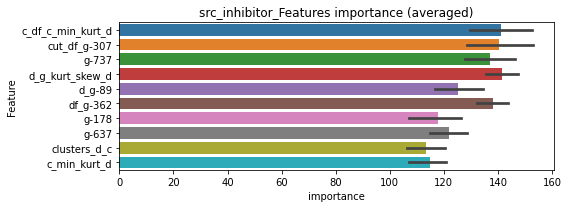

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 src_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.001272	valid_1's binary_logloss: 0.0297247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000797369	valid_1's binary_logloss: 0.0245211


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 src_inhibitor=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.0010277	valid_1's binary_logloss: 0.027497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000740179	valid_1's binary_logloss: 0.0119818


src_inhibitor logloss: 0.023432791858034267


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275
target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676866	valid_1's binary_logloss: 0.0575724
[600]	training's binary_logloss: 0.00113143	valid_1's binary_logloss: 0.0465957
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00107044	valid_1's binary_logloss: 0.0464494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699873	valid_1's binary_logloss: 0.0424792
[600]	training's binary_logloss: 0.00115528	valid_1's binary_logloss: 0.0292126
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000799955	valid_1's binary_logloss: 0.0280131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00726985	valid_1's binary_logloss: 0.0389887
[600]	training's binary_logloss: 0.00119699	valid_1's binary_logloss: 0.0244466
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000730789	valid_1's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0096634, Threshold: 0.2916852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, conf_0:0.20418, conf_1:0.37919
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2916852
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_2: 0.3316852
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_3: 0.3716852
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_4: 0.4116852
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_5: 0.4516852
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_6: 0.4916852
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_7: 0.5316852
threshold: 0.5316852, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617134	valid_1's binary_logloss: 0.0380207
[600]	training's binary_logloss: 0.00104717	valid_1's binary_logloss: 0.0255491
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000774967	valid_1's binary_logloss: 0.0250084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597603	valid_1's binary_logloss: 0.0346975
[600]	training's binary_logloss: 0.00103127	valid_1's binary_logloss: 0.0230667
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000713901	valid_1's binary_logloss: 0.0222903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591936	valid_1's binary_logloss: 0.0330633
[600]	training's binary_logloss: 0.00103253	valid_1's binary_logloss: 0.0206328
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000974892	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0406208, Threshold: 0.5316852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0160723 Vs.target_rate: 0.00332
Num_p_label: 64.0, conf_0:0.42535, conf_1:0.63802
Num_p_label: 64.0, Expected: 13.2, Adj_threshold_1: 0.5316852
Num_p_label: 56.0, Expected: 13.2, Adj_threshold_2: 0.5716852
Num_p_label: 51.0, Expected: 13.2, Adj_threshold_3: 0.6116852
Num_p_label: 43.0, Expected: 13.2, Adj_threshold_4: 0.6516852
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_5: 0.6916852
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_6: 0.7316852
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_7: 0.7716852
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_8: 0.8116852
threshold: 0.8116852, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575511	valid_1's binary_logloss: 0.0385844
[600]	training's binary_logloss: 0.00101622	valid_1's binary_logloss: 0.0255429
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000703402	valid_1's binary_logloss: 0.0242746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551309	valid_1's binary_logloss: 0.0488579
[600]	training's binary_logloss: 0.000979173	valid_1's binary_logloss: 0.0390375
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000741898	valid_1's binary_logloss: 0.0381014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576484	valid_1's binary_logloss: 0.0364893
[600]	training's binary_logloss: 0.00102063	valid_1's binary_logloss: 0.0260941
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000927244	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0440737, Threshold: 0.8116852, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3773
p_label_rate: 0.0057760 Vs.target_rate: 0.00332
Num_p_label: 23.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_1: 0.8116852
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8516852
threshold: 0.8516852, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3773, y_label_rate: 0.1701564


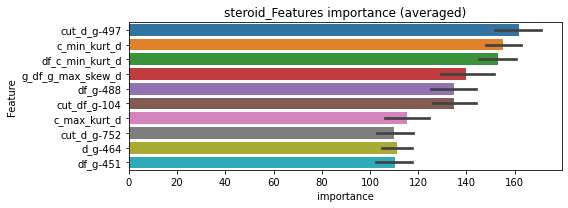

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00131489	valid_1's binary_logloss: 0.0290156
Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 steroid=================================


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00106206	valid_1's binary_logloss: 0.0320127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000713096	valid_1's binary_logloss: 0.00583598


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds


steroid logloss: 0.02438924755414837


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00137661	valid_1's binary_logloss: 0.0306878
neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120599	valid_1's binary_logloss: 0.00252837
[600]	training's binary_logloss: 0.000344992	valid_1's binary_logloss: 0.00119256
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000346042	valid_1's binary_logloss: 0.00119179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114184	valid_1's binary_logloss: 0.00530607
[600]	training's binary_logloss: 0.000347978	valid_1's binary_logloss: 0.00321205
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000349238	valid_1's binary_logloss: 0.00320699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012202	valid_1's binary_logloss: 0.00205153
[600]	training's binary_logloss: 0.000351869	valid_1's binary_logloss: 0.000709473
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000351869	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0016727, Threshold: 0.0043663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00306, conf_1:0.00568
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0043663
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0443663
threshold: 0.0443663, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116638	valid_1's binary_logloss: 0.00182674
[600]	training's binary_logloss: 0.000344499	valid_1's binary_logloss: 0.000637693
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000344499	valid_1's binary_logloss: 0.000637693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106806	valid_1's binary_logloss: 0.00527351
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000342675	valid_1's binary_logloss: 0.00317359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114632	valid_1's binary_logloss: 0.00199883
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000348284	valid_1's binary_logloss: 0.000687514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110802	valid_1's binary_logloss: 0.00192

2 / 3 AUC score:1.000
y_Threshold: 0.0553868, Threshold: 0.0443663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03549, conf_1:0.05324
threshold: 0.0443663, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000346273	valid_1's binary_logloss: 0.000803478
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000346273	valid_1's binary_logloss: 0.000803478


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116638	valid_1's binary_logloss: 0.00182674
[600]	training's binary_logloss: 0.000344499	valid_1's binary_logloss: 0.000637693
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000344499	valid_1's binary_logloss: 0.000637693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106806	valid_1's binary_logloss: 0.00527351
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000342675	valid_1's binary_logloss: 0.00317359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114632	valid_1's binary_logloss: 0.00199883
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000348284	valid_1's binary_logloss: 0.000687514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110802	valid_1's binary_logloss: 0.00192

3 / 3 AUC score:1.000
y_Threshold: 0.0553868, Threshold: 0.0443663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03993, conf_1:0.04880
threshold: 0.0443663, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000346273	valid_1's binary_logloss: 0.000803478


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


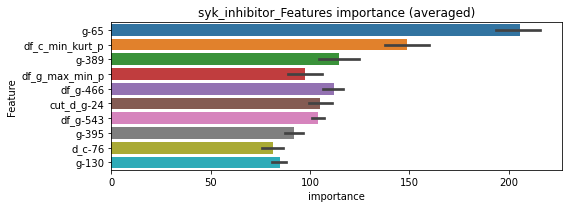

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000349447	valid_1's binary_logloss: 0.000696928


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000349766	valid_1's binary_logloss: 0.00317441


================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000354175	valid_1's binary_logloss: 0.000732539


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000352081	valid_1's binary_logloss: 0.000908


syk_inhibitor logloss: 0.0013779874853259097


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488874	valid_1's binary_logloss: 0.0262764
[600]	training's binary_logloss: 0.000849543	valid_1's binary_logloss: 0.0157398
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000641149	valid_1's binary_logloss: 0.0150323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502583	valid_1's binary_logloss: 0.0190337
[600]	training's binary_logloss: 0.000865303	valid_1's binary_logloss: 0.00892419
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000594713	valid_1's binary_logloss: 0.00789768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490342	valid_1's binary_logloss: 0.0214404
[600]	training's binary_logloss: 0.000857784	valid_1's binary_logloss: 0.0129447
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000616441	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0053550, Threshold: 0.0123995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.00868, conf_1:0.01612
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0123995
Num_p_label: 3.0, Expected: 10.0, Adj_threshold_2: 0.0523995
threshold: 0.0523995, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448247	valid_1's binary_logloss: 0.0223408
[600]	training's binary_logloss: 0.00082332	valid_1's binary_logloss: 0.0144427
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000641846	valid_1's binary_logloss: 0.0140356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478195	valid_1's binary_logloss: 0.0174694
[600]	training's binary_logloss: 0.00084401	valid_1's binary_logloss: 0.00802953
[900]	training's binary_logloss: 0.000576518	valid_1's binary_logloss: 0.00742854
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000577814	valid_1's binary_logloss: 0.00741733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457695	valid_1's binary_logloss: 0.0202777
[600]	training's binary_logloss: 0.000825809	valid_1's binary_logloss: 0.0119885
Early stopping, best

2 / 3 AUC score:1.000
y_Threshold: 0.0230770, Threshold: 0.0523995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0022602 Vs.target_rate: 0.00252
Num_p_label: 9.0, conf_0:0.04192, conf_1:0.06288
threshold: 0.0523995, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439644	valid_1's binary_logloss: 0.0249039
[600]	training's binary_logloss: 0.000810114	valid_1's binary_logloss: 0.0142788
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000571238	valid_1's binary_logloss: 0.0129463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424727	valid_1's binary_logloss: 0.0268965
[600]	training's binary_logloss: 0.000791542	valid_1's binary_logloss: 0.0197304
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000600131	valid_1's binary_logloss: 0.0188244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440929	valid_1's binary_logloss: 0.0289491
[600]	training's binary_logloss: 0.000799166	valid_1's binary_logloss: 0.0188924
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000608819	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0290827, Threshold: 0.0523995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0022602 Vs.target_rate: 0.00252
Num_p_label: 9.0, conf_0:0.04716, conf_1:0.05764
threshold: 0.0523995, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


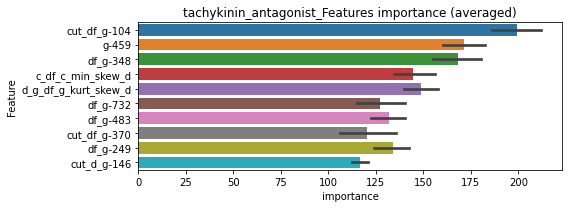

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000611252	valid_1's binary_logloss: 0.0124645
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000610734	valid_1's binary_logloss: 0.0124584


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000943847	valid_1's binary_logloss: 0.0186721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000853016	valid_1's binary_logloss: 0.0179836


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000681368	valid_1's binary_logloss: 0.00979399


tachykinin_antagonist logloss: 0.014726715767920092


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226734	valid_1's binary_logloss: 0.0070288
[600]	training's binary_logloss: 0.000485386	valid_1's binary_logloss: 0.00282448
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000448424	valid_1's binary_logloss: 0.00274044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224803	valid_1's binary_logloss: 0.00790716
[600]	training's binary_logloss: 0.000483458	valid_1's binary_logloss: 0.00354315
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000455817	valid_1's binary_logloss: 0.00347169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225671	valid_1's binary_logloss: 0.00456694
[600]	training's binary_logloss: 0.000490643	valid_1's binary_logloss: 0.00132931
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000455688	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030623, Threshold: 0.0083223, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00583, conf_1:0.01082
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0083223
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0483223
threshold: 0.0483223, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210971	valid_1's binary_logloss: 0.00729332
[600]	training's binary_logloss: 0.00046934	valid_1's binary_logloss: 0.00282913
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000430872	valid_1's binary_logloss: 0.00272647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202517	valid_1's binary_logloss: 0.00750727
[600]	training's binary_logloss: 0.000466566	valid_1's binary_logloss: 0.00371686
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000435803	valid_1's binary_logloss: 0.00362858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212119	valid_1's binary_logloss: 0.00396888
[600]	training's binary_logloss: 0.000483446	valid_1's binary_logloss: 0.00115252
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000443483	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0804642, Threshold: 0.0483223, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, conf_0:0.03866, conf_1:0.05799
threshold: 0.0483223, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210971	valid_1's binary_logloss: 0.00729332
[600]	training's binary_logloss: 0.00046934	valid_1's binary_logloss: 0.00282913
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000430872	valid_1's binary_logloss: 0.00272647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202517	valid_1's binary_logloss: 0.00750727
[600]	training's binary_logloss: 0.000466566	valid_1's binary_logloss: 0.00371686
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000435803	valid_1's binary_logloss: 0.00362858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212119	valid_1's binary_logloss: 0.00396888
[600]	training's binary_logloss: 0.000483446	valid_1's binary_logloss: 0.00115252
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000443483	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0804642, Threshold: 0.0483223, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, conf_0:0.04349, conf_1:0.05315
threshold: 0.0483223, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


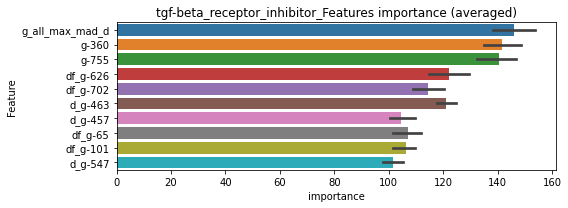

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443754	valid_1's binary_logloss: 0.00178588
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000443771	valid_1's binary_logloss: 0.00178587


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00044116	valid_1's binary_logloss: 0.00244425
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000433447	valid_1's binary_logloss: 0.00242157


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446782	valid_1's binary_logloss: 0.00128241
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000440522	valid_1's binary_logloss: 0.00126967


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000473336	valid_1's binary_logloss: 0.00439231


tgf-beta_receptor_inhibitor logloss: 0.0024672905509792223


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110475	valid_1's binary_logloss: 0.00446238
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000343143	valid_1's binary_logloss: 0.00265474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108578	valid_1's binary_logloss: 0.00480804
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000346274	valid_1's binary_logloss: 0.00281152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112647	valid_1's binary_logloss: 0.00216625
[600]	training's binary_logloss: 0.000342319	valid_1's binary_logloss: 0.000767484
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000342319	valid_1's binary_logloss: 0.000767484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112252	valid_1's binary_logloss: 0.002884

1 / 3 AUC score:1.000
y_Threshold: 0.0020328, Threshold: 0.0079997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00560, conf_1:0.01040
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0079997
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0479997
threshold: 0.0479997, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103123	valid_1's binary_logloss: 0.0047552
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000339869	valid_1's binary_logloss: 0.00304741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100171	valid_1's binary_logloss: 0.00393131
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000327811	valid_1's binary_logloss: 0.00223235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105554	valid_1's binary_logloss: 0.0016991
[600]	training's binary_logloss: 0.000330714	valid_1's binary_logloss: 0.000601242
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000330714	valid_1's binary_logloss: 0.000601242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104821	valid_1's binary_logloss: 0.00292787

2 / 3 AUC score:1.000
y_Threshold: 0.0691399, Threshold: 0.0479997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00080
Num_p_label: 12.0, conf_0:0.03840, conf_1:0.05760
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0479997
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0879997


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000334686	valid_1's binary_logloss: 0.00137264


threshold: 0.0879997, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103123	valid_1's binary_logloss: 0.0047552
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000339869	valid_1's binary_logloss: 0.00304741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100171	valid_1's binary_logloss: 0.00393131
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000327811	valid_1's binary_logloss: 0.00223235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105554	valid_1's binary_logloss: 0.0016991
[600]	training's binary_logloss: 0.000330714	valid_1's binary_logloss: 0.000601242
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000330714	valid_1's binary_logloss: 0.000601242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104821	valid_1's binary_logloss: 0.00292787

3 / 3 AUC score:1.000
y_Threshold: 0.0691399, Threshold: 0.0879997, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000334686	valid_1's binary_logloss: 0.00137264


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.07920, conf_1:0.09680
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0879997
threshold: 0.0879997, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


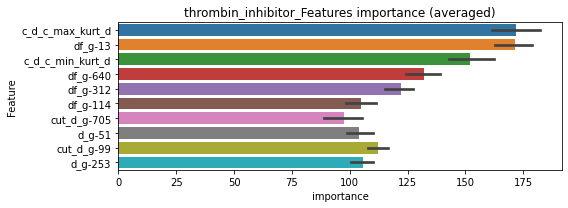

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000353663	valid_1's binary_logloss: 0.00260991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00033231	valid_1's binary_logloss: 0.00174491


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000338475	valid_1's binary_logloss: 0.000598081


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


thrombin_inhibitor logloss: 0.001636330055507915


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000344202	valid_1's binary_logloss: 0.00159238
neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282724	valid_1's binary_logloss: 0.0150911
[600]	training's binary_logloss: 0.000546033	valid_1's binary_logloss: 0.00872178
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000511381	valid_1's binary_logloss: 0.00862274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281819	valid_1's binary_logloss: 0.00881924
[600]	training's binary_logloss: 0.000560797	valid_1's binary_logloss: 0.0035483
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000500144	valid_1's binary_logloss: 0.00336655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283791	valid_1's binary_logloss: 0.00600068
[600]	training's binary_logloss: 0.000562263	valid_1's binary_logloss: 0.00198763
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000498847	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0030166, Threshold: 0.0118985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00833, conf_1:0.01547
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0118985
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0518985
threshold: 0.0518985, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257186	valid_1's binary_logloss: 0.012397
[600]	training's binary_logloss: 0.000531181	valid_1's binary_logloss: 0.00698851
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000489937	valid_1's binary_logloss: 0.00690558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263558	valid_1's binary_logloss: 0.00702851
[600]	training's binary_logloss: 0.000544483	valid_1's binary_logloss: 0.00305229
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000498662	valid_1's binary_logloss: 0.0029841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252685	valid_1's binary_logloss: 0.00566972
[600]	training's binary_logloss: 0.000542824	valid_1's binary_logloss: 0.00209437
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000509	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0345426, Threshold: 0.0518985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00155
Num_p_label: 25.0, conf_0:0.04152, conf_1:0.06228
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_1: 0.0518985
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0918985
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_3: 0.1318985
threshold: 0.1318985, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257186	valid_1's binary_logloss: 0.012397
[600]	training's binary_logloss: 0.000531181	valid_1's binary_logloss: 0.00698851
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000489937	valid_1's binary_logloss: 0.00690558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263558	valid_1's binary_logloss: 0.00702851
[600]	training's binary_logloss: 0.000544483	valid_1's binary_logloss: 0.00305229
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000498662	valid_1's binary_logloss: 0.0029841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252685	valid_1's binary_logloss: 0.00566972
[600]	training's binary_logloss: 0.000542824	valid_1's binary_logloss: 0.00209437
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000509	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0345426, Threshold: 0.1318985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00155
Num_p_label: 10.0, conf_0:0.11871, conf_1:0.14509
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_1: 0.1318985
threshold: 0.1318985, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


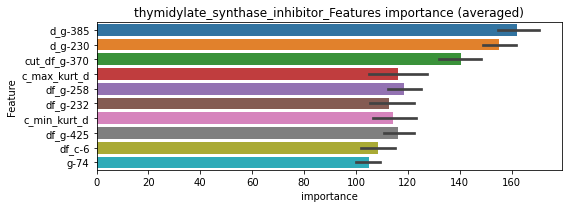

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000532028	valid_1's binary_logloss: 0.00816491


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000516355	valid_1's binary_logloss: 0.00262286


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000520096	valid_1's binary_logloss: 0.0030601


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00054364	valid_1's binary_logloss: 0.00869006


thymidylate_synthase_inhibitor logloss: 0.005636433492121194


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181535	valid_1's binary_logloss: 0.0061912
[600]	training's binary_logloss: 0.00042266	valid_1's binary_logloss: 0.00264239
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000400045	valid_1's binary_logloss: 0.00258039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183456	valid_1's binary_logloss: 0.00566667
[600]	training's binary_logloss: 0.000418873	valid_1's binary_logloss: 0.00222331
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000411437	valid_1's binary_logloss: 0.00221567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191443	valid_1's binary_logloss: 0.0037805
[600]	training's binary_logloss: 0.000434183	valid_1's binary_logloss: 0.0011379
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000415631	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0026010, Threshold: 0.0159663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01118, conf_1:0.02076
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0159663
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0559663
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0959663
threshold: 0.0959663, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171118	valid_1's binary_logloss: 0.00594418
[600]	training's binary_logloss: 0.000410928	valid_1's binary_logloss: 0.00275267
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000408088	valid_1's binary_logloss: 0.00274608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170908	valid_1's binary_logloss: 0.00596461
[600]	training's binary_logloss: 0.000415881	valid_1's binary_logloss: 0.00276638
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000407732	valid_1's binary_logloss: 0.00273258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174797	valid_1's binary_logloss: 0.00300985
[600]	training's binary_logloss: 0.000417108	valid_1's binary_logloss: 0.0008911
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000412532	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0234461, Threshold: 0.0959663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00126
Num_p_label: 25.0, conf_0:0.07677, conf_1:0.11516
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.0959663
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.1359663
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.1759663
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_4: 0.2159663
threshold: 0.2159663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171118	valid_1's binary_logloss: 0.00594418
[600]	training's binary_logloss: 0.000410928	valid_1's binary_logloss: 0.00275267
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000408088	valid_1's binary_logloss: 0.00274608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170908	valid_1's binary_logloss: 0.00596461
[600]	training's binary_logloss: 0.000415881	valid_1's binary_logloss: 0.00276638
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000407732	valid_1's binary_logloss: 0.00273258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174797	valid_1's binary_logloss: 0.00300985
[600]	training's binary_logloss: 0.000417108	valid_1's binary_logloss: 0.0008911
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000412532	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0234461, Threshold: 0.2159663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, conf_0:0.19437, conf_1:0.23756
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.2159663
threshold: 0.2159663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


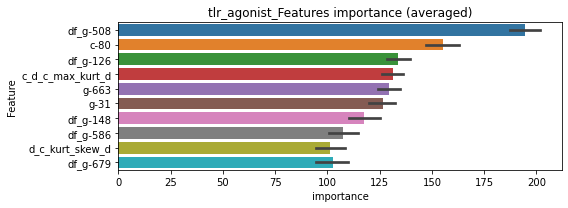

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000421167	valid_1's binary_logloss: 0.00192457


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000420681	valid_1's binary_logloss: 0.00232253


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000416018	valid_1's binary_logloss: 0.000920933


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.003761224590927611


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00064726	valid_1's binary_logloss: 0.00988031
neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453754	valid_1's binary_logloss: 0.000539606
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000217133	valid_1's binary_logloss: 0.000264875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453406	valid_1's binary_logloss: 0.00332672
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000218016	valid_1's binary_logloss: 0.00245282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000451402	valid_1's binary_logloss: 0.000556096
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000218127	valid_1's binary_logloss: 0.00027526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000452368	valid_1's binary_logloss: 0.000591943


1 / 3 AUC score:1.000
y_Threshold: 0.0006404, Threshold: 0.0014379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00101, conf_1:0.00187
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0014379
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0414379
threshold: 0.0414379, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000219394	valid_1's binary_logloss: 0.000295763


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000444177	valid_1's binary_logloss: 0.000553308
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000213148	valid_1's binary_logloss: 0.000272294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000441783	valid_1's binary_logloss: 0.00210395
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216184	valid_1's binary_logloss: 0.00155194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004431	valid_1's binary_logloss: 0.000519536
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000214469	valid_1's binary_logloss: 0.000254384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000443489	valid_1's binary_logloss: 0.000496587


2 / 3 AUC score:1.000
y_Threshold: 0.0564537, Threshold: 0.0414379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.03315, conf_1:0.04973
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0414379
threshold: 0.0414379, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00021712	valid_1's binary_logloss: 0.000247992


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000444177	valid_1's binary_logloss: 0.000553308
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000213148	valid_1's binary_logloss: 0.000272294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000441783	valid_1's binary_logloss: 0.00210395
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216184	valid_1's binary_logloss: 0.00155194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004431	valid_1's binary_logloss: 0.000519536
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000214469	valid_1's binary_logloss: 0.000254384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000443489	valid_1's binary_logloss: 0.000496587


3 / 3 AUC score:1.000
y_Threshold: 0.0564537, Threshold: 0.0414379, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.03729, conf_1:0.04558
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0414379


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00021712	valid_1's binary_logloss: 0.000247992


threshold: 0.0414379, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


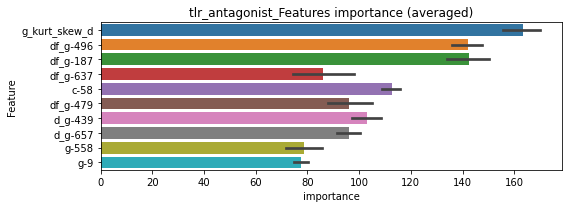

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0002122	valid_1's binary_logloss: 0.000267305
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000212125	valid_1's binary_logloss: 0.000267217


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000211704	valid_1's binary_logloss: 0.000607321
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000211557	valid_1's binary_logloss: 0.000607088


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000213205	valid_1's binary_logloss: 0.000261691
Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00034747821468005907


[1000]	training's binary_logloss: 0.000212669	valid_1's binary_logloss: 0.000254
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000212669	valid_1's binary_logloss: 0.000254
neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252913	valid_1's binary_logloss: 0.0119217
[600]	training's binary_logloss: 0.000525443	valid_1's binary_logloss: 0.00687229
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000489205	valid_1's binary_logloss: 0.00678588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250397	valid_1's binary_logloss: 0.0161902
[600]	training's binary_logloss: 0.000514639	valid_1's binary_logloss: 0.0100103
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00048128	valid_1's binary_logloss: 0.00987406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246193	valid_1's binary_logloss: 0.00959678
[600]	training's binary_logloss: 0.000525146	valid_1's binary_logloss: 0.00548846
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00048853	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0035667, Threshold: 0.0171865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01203, conf_1:0.02234
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0171865
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0571865
threshold: 0.0571865, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230063	valid_1's binary_logloss: 0.0110202
[600]	training's binary_logloss: 0.00049826	valid_1's binary_logloss: 0.00674389
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000478445	valid_1's binary_logloss: 0.00664972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234041	valid_1's binary_logloss: 0.0157728
[600]	training's binary_logloss: 0.000497098	valid_1's binary_logloss: 0.00982604
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000476482	valid_1's binary_logloss: 0.00973328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232288	valid_1's binary_logloss: 0.00765965
[600]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.00372003
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00047159	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0338935, Threshold: 0.0571865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00151
Num_p_label: 25.0, conf_0:0.04575, conf_1:0.06862
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_1: 0.0571865
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0971865
threshold: 0.0971865, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230063	valid_1's binary_logloss: 0.0110202
[600]	training's binary_logloss: 0.00049826	valid_1's binary_logloss: 0.00674389
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000478445	valid_1's binary_logloss: 0.00664972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234041	valid_1's binary_logloss: 0.0157728
[600]	training's binary_logloss: 0.000497098	valid_1's binary_logloss: 0.00982604
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000476482	valid_1's binary_logloss: 0.00973328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232288	valid_1's binary_logloss: 0.00765965
[600]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.00372003
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00047159	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0338935, Threshold: 0.0971865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, conf_0:0.08747, conf_1:0.10691
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0971865
threshold: 0.0971865, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


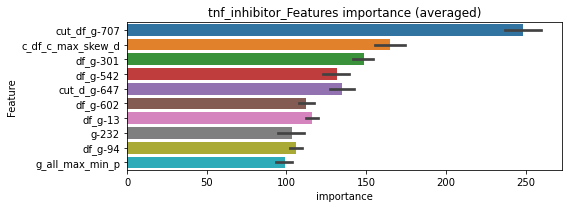

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000490125	valid_1's binary_logloss: 0.00509348


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000496713	valid_1's binary_logloss: 0.00690405


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000495835	valid_1's binary_logloss: 0.0036541


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000539112	valid_1's binary_logloss: 0.00703302


tnf_inhibitor logloss: 0.005671756830532216


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114315	valid_1's binary_logloss: 0.10846
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00285705	valid_1's binary_logloss: 0.10034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131599	valid_1's binary_logloss: 0.079838
[600]	training's binary_logloss: 0.00195718	valid_1's binary_logloss: 0.0661596
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00198794	valid_1's binary_logloss: 0.0660264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136714	valid_1's binary_logloss: 0.0502421
[600]	training's binary_logloss: 0.00202875	valid_1's binary_logloss: 0.0304313
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.0010696	valid_1's binary_logloss: 0.0273395
Training until validation scores don't improve for 30 rounds
[300]	training's bin

1 / 3 AUC score:0.992
y_Threshold: 0.0179988, Threshold: 0.1907539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, conf_0:0.13353, conf_1:0.24798
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1907539
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_2: 0.2307539
threshold: 0.2307539, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101973	valid_1's binary_logloss: 0.0712205
[600]	training's binary_logloss: 0.0016598	valid_1's binary_logloss: 0.0519774
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000896732	valid_1's binary_logloss: 0.048693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101694	valid_1's binary_logloss: 0.0638381
[600]	training's binary_logloss: 0.00160913	valid_1's binary_logloss: 0.049661
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00179518	valid_1's binary_logloss: 0.0495189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106463	valid_1's binary_logloss: 0.0665013
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00223828	valid_1's binary_logloss: 0.0560106
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.998
y_Threshold: 0.0427354, Threshold: 0.2307539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0205927 Vs.target_rate: 0.00533
Num_p_label: 82.0, conf_0:0.18460, conf_1:0.27690
Num_p_label: 82.0, Expected: 21.2, Adj_threshold_1: 0.2307539
Num_p_label: 74.0, Expected: 21.2, Adj_threshold_2: 0.2707539
Num_p_label: 66.0, Expected: 21.2, Adj_threshold_3: 0.3107539
Num_p_label: 57.0, Expected: 21.2, Adj_threshold_4: 0.3507539
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_5: 0.3907539
Num_p_label: 45.0, Expected: 21.2, Adj_threshold_6: 0.4307539
Num_p_label: 39.0, Expected: 21.2, Adj_threshold_7: 0.4707539
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_8: 0.5107539
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_9: 0.5507539
threshold: 0.5507539, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 628.0/3745, y_label_rate: 0.1676903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00895964	valid_1's binary_logloss: 0.0643939
[600]	training's binary_logloss: 0.00146898	valid_1's binary_logloss: 0.0492454
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000853846	valid_1's binary_logloss: 0.0473874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00944512	valid_1's binary_logloss: 0.0739186
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00200877	valid_1's binary_logloss: 0.0636361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00967273	valid_1's binary_logloss: 0.0527044
[600]	training's binary_logloss: 0.00157191	valid_1's binary_logloss: 0.0366487
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000896579	valid_1's binary_logloss: 0.0347608
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3 AUC score:0.999
y_Threshold: 0.0355343, Threshold: 0.5507539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0095429 Vs.target_rate: 0.00533
Num_p_label: 38.0, conf_0:0.49568, conf_1:0.60583
Num_p_label: 38.0, Expected: 21.2, Adj_threshold_1: 0.5507539
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_2: 0.5907539
Num_p_label: 28.0, Expected: 21.2, Adj_threshold_3: 0.6307539
threshold: 0.6307539, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 620.0/3729, y_label_rate: 0.1662644


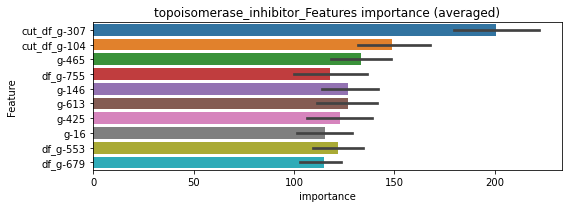

len(train_index) : 2796
len(valid_index) : 933
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2797
len(valid_index) : 932
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00266449	valid_1's binary_logloss: 0.0482247
Training until validation scores don't improve for 30 rounds


len(train_index) : 2797
len(valid_index) : 932
================================= fold 3/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.00496215	valid_1's binary_logloss: 0.0723887
Training until validation scores don't improve for 30 rounds


len(train_index) : 2797
len(valid_index) : 932
================================= fold 4/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00167589	valid_1's binary_logloss: 0.0404208
Training until validation scores don't improve for 30 rounds


topoisomerase_inhibitor logloss: 0.05211134744961843


Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00206016	valid_1's binary_logloss: 0.0474154
neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113948	valid_1's binary_logloss: 0.00209942
[600]	training's binary_logloss: 0.000344659	valid_1's binary_logloss: 0.000763955
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000344251	valid_1's binary_logloss: 0.000763156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010873	valid_1's binary_logloss: 0.00463231
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000350524	valid_1's binary_logloss: 0.00253605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113548	valid_1's binary_logloss: 0.00449172
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000350687	valid_1's binary_logloss: 0.00302628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113419	valid_1's binary_logloss: 0.0030608

1 / 3 AUC score:1.000
y_Threshold: 0.0018254, Threshold: 0.0132462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00927, conf_1:0.01722
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0132462
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0532462
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0932462


[600]	training's binary_logloss: 0.000353811	valid_1's binary_logloss: 0.00155105
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000353811	valid_1's binary_logloss: 0.00155105


threshold: 0.0932462, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106944	valid_1's binary_logloss: 0.00163823
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000342114	valid_1's binary_logloss: 0.000619249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000989643	valid_1's binary_logloss: 0.00333186
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000336429	valid_1's binary_logloss: 0.00182048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103788	valid_1's binary_logloss: 0.00443837
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000339787	valid_1's binary_logloss: 0.00320222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104218	valid_1's binary_logloss: 0.00291807


2 / 3 AUC score:1.000
y_Threshold: 0.1076291, Threshold: 0.0932462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, conf_0:0.07460, conf_1:0.11190
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_1: 0.0932462
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1332462


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000342664	valid_1's binary_logloss: 0.00152198


Num_p_label: 33.0, Expected: 3.0, Adj_threshold_3: 0.1732462
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.2132462
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_5: 0.2532462
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_6: 0.2932462
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3332462
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3732462
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_9: 0.4132462
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.4532462
threshold: 0.4932462, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010342	valid_1's binary_logloss: 0.00283051
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000343665	valid_1's binary_logloss: 0.00139875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010197	valid_1's binary_logloss: 0.00338525
[600]	training's binary_logloss: 0.000337509	valid_1's binary_logloss: 0.0021521
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000337685	valid_1's binary_logloss: 0.00214921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106082	valid_1's binary_logloss: 0.00144401
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000347439	valid_1's binary_logloss: 0.00052107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100943	valid_1's binary_logloss: 0.00244798


3 / 3 AUC score:1.000
y_Threshold: 0.0833329, Threshold: 0.4932462, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00076
Num_p_label: 14.0, conf_0:0.44392, conf_1:0.54257
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.4932462
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.5332462
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.5732462
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.6132462
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.6532462
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.6932462


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000337006	valid_1's binary_logloss: 0.00111169


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.7332462
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.7732462
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_9: 0.8132462
threshold: 0.8132462, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


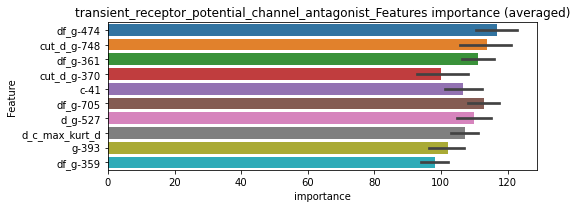

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000346154	valid_1's binary_logloss: 0.00106517


================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000343055	valid_1's binary_logloss: 0.00171992


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000348463	valid_1's binary_logloss: 0.000536206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000339096	valid_1's binary_logloss: 0.00115609


transient_receptor_potential_channel_antagonist logloss: 0.001119648655775265


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000357671	valid_1's binary_logloss: 0.00133267
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000182439	valid_1's binary_logloss: 0.00101233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000350656	valid_1's binary_logloss: 0.0007249
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000181356	valid_1's binary_logloss: 0.000426449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000357165	valid_1's binary_logloss: 0.000407587
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000182142	valid_1's binary_logloss: 0.000212604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359341	valid_1's binary_logloss: 0.000399487
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.0001

1 / 3 AUC score:1.000
y_Threshold: 0.0005288, Threshold: 0.0013614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00095, conf_1:0.00177
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013614
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0413614
threshold: 0.0413614, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348339	valid_1's binary_logloss: 0.000821399
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000176392	valid_1's binary_logloss: 0.000569878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342177	valid_1's binary_logloss: 0.000712421
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000170417	valid_1's binary_logloss: 0.000434156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00034909	valid_1's binary_logloss: 0.000369902
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000172572	valid_1's binary_logloss: 0.000185131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343234	valid_1's binary_logloss: 0.000398517


2 / 3 AUC score:1.000
y_Threshold: 0.1238381, Threshold: 0.0413614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.03309, conf_1:0.04963
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0413614
threshold: 0.0413614, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000171084	valid_1's binary_logloss: 0.000203108


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348339	valid_1's binary_logloss: 0.000821399
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000176392	valid_1's binary_logloss: 0.000569878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342177	valid_1's binary_logloss: 0.000712421
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000170417	valid_1's binary_logloss: 0.000434156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00034909	valid_1's binary_logloss: 0.000369902
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000172572	valid_1's binary_logloss: 0.000185131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000343234	valid_1's binary_logloss: 0.000398517


3 / 3 AUC score:1.000
y_Threshold: 0.1238381, Threshold: 0.0413614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.03723, conf_1:0.04550
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0413614
threshold: 0.0413614, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000171084	valid_1's binary_logloss: 0.000203108


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


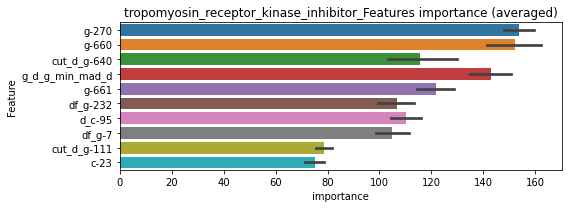

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000172994	valid_1's binary_logloss: 0.000399101
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000174737	valid_1's binary_logloss: 0.000280601
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172302	valid_1's binary_logloss: 0.000183832
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000172196	valid_1's binary_logloss: 0.000183716


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.00026761881209832333


Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000171296	valid_1's binary_logloss: 0.000206861
neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160736	valid_1's binary_logloss: 0.00789293
[600]	training's binary_logloss: 0.000406943	valid_1's binary_logloss: 0.00467149
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000407937	valid_1's binary_logloss: 0.00466737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166619	valid_1's binary_logloss: 0.00373716
[600]	training's binary_logloss: 0.000408212	valid_1's binary_logloss: 0.00145435
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000406664	valid_1's binary_logloss: 0.00145078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157498	valid_1's binary_logloss: 0.0034853
[600]	training's binary_logloss: 0.000409415	valid_1's binary_logloss: 0.00136514
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000409415	valid_1's binar

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000409858	valid_1's binary_logloss: 0.00492422
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000409858	valid_1's binary_logloss: 0.00492422


y_Threshold: 0.0021954, Threshold: 0.0086413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00605, conf_1:0.01123
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0086413
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0486413
threshold: 0.0486413, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151949	valid_1's binary_logloss: 0.00797296
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000423603	valid_1's binary_logloss: 0.00504678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154118	valid_1's binary_logloss: 0.0031595
[600]	training's binary_logloss: 0.000398799	valid_1's binary_logloss: 0.0012097
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000396737	valid_1's binary_logloss: 0.00120203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151758	valid_1's binary_logloss: 0.00287448
[600]	training's binary_logloss: 0.000401926	valid_1's binary_logloss: 0.000995515
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000393516	valid_1's binary_logloss: 0.000981579
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0259516, Threshold: 0.0486413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, conf_0:0.03891, conf_1:0.05837
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0486413
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_2: 0.0886413
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_3: 0.1286413
threshold: 0.1286413, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151949	valid_1's binary_logloss: 0.00797296
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000423603	valid_1's binary_logloss: 0.00504678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154118	valid_1's binary_logloss: 0.0031595
[600]	training's binary_logloss: 0.000398799	valid_1's binary_logloss: 0.0012097
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000396737	valid_1's binary_logloss: 0.00120203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151758	valid_1's binary_logloss: 0.00287448
[600]	training's binary_logloss: 0.000401926	valid_1's binary_logloss: 0.000995515
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000393516	valid_1's binary_logloss: 0.000981579
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0259516, Threshold: 0.1286413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, conf_0:0.11578, conf_1:0.14151
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.1286413


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000412516	valid_1's binary_logloss: 0.00450752


threshold: 0.1286413, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


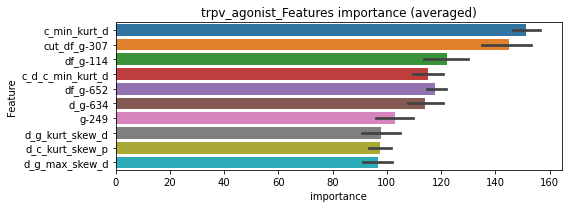

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000407237	valid_1's binary_logloss: 0.00336875


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.00040867	valid_1's binary_logloss: 0.00110443


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.00041145	valid_1's binary_logloss: 0.00101519


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000401404	valid_1's binary_logloss: 0.00281548


trpv_agonist logloss: 0.0020770111903955927


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295666	valid_1's binary_logloss: 0.0305942
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000861838	valid_1's binary_logloss: 0.0245797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319954	valid_1's binary_logloss: 0.0125998
[600]	training's binary_logloss: 0.000647194	valid_1's binary_logloss: 0.00650611
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000521991	valid_1's binary_logloss: 0.00593248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329112	valid_1's binary_logloss: 0.00781518
[600]	training's binary_logloss: 0.000658319	valid_1's binary_logloss: 0.00276802
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000522397	valid_1's binary_logloss: 0.00242247
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:0.999
y_Threshold: 0.0050393, Threshold: 0.0177937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.01246, conf_1:0.02313
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0177937
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_2: 0.0577937


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00134643	valid_1's binary_logloss: 0.0234351


threshold: 0.0577937, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280622	valid_1's binary_logloss: 0.0176926
[600]	training's binary_logloss: 0.000598603	valid_1's binary_logloss: 0.0121579
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000622027	valid_1's binary_logloss: 0.0121254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287769	valid_1's binary_logloss: 0.0129148
[600]	training's binary_logloss: 0.000610691	valid_1's binary_logloss: 0.00891608
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000524091	valid_1's binary_logloss: 0.0086694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289232	valid_1's binary_logloss: 0.0133079
[600]	training's binary_logloss: 0.000612896	valid_1's binary_logloss: 0.00889191
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000558618	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0201951, Threshold: 0.0577937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0065294 Vs.target_rate: 0.00202
Num_p_label: 26.0, conf_0:0.04623, conf_1:0.06935
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_1: 0.0577937
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_2: 0.0977937
threshold: 0.0977937, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282281	valid_1's binary_logloss: 0.0133462
[600]	training's binary_logloss: 0.000598636	valid_1's binary_logloss: 0.00797237
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00052209	valid_1's binary_logloss: 0.00771631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273185	valid_1's binary_logloss: 0.0239082
[600]	training's binary_logloss: 0.000589315	valid_1's binary_logloss: 0.0175688
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000553204	valid_1's binary_logloss: 0.0174044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290849	valid_1's binary_logloss: 0.0101969
[600]	training's binary_logloss: 0.000616787	valid_1's binary_logloss: 0.00593161
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000577996	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0374289, Threshold: 0.0977937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, conf_0:0.08801, conf_1:0.10757
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_1: 0.0977937
threshold: 0.0977937, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


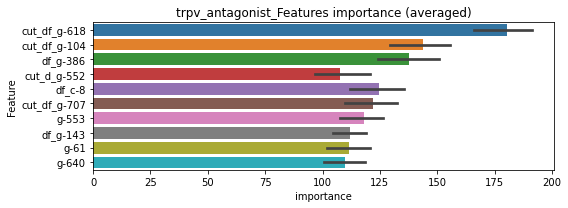

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000537093	valid_1's binary_logloss: 0.00818721


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 trpv_antagonist=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000760844	valid_1's binary_logloss: 0.0167771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000634045	valid_1's binary_logloss: 0.00566729


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522266	valid_1's binary_logloss: 0.00449623
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000513786	valid_1's binary_logloss: 0.00448576


trpv_antagonist logloss: 0.008779342959327224


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253
target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[223]	training's binary_logloss: 0.0677348	valid_1's binary_logloss: 0.29243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0381816	valid_1's binary_logloss: 0.2876
Early stopping, best iteration is:
[298]	training's binary_logloss: 0.0387105	valid_1's binary_logloss: 0.287198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0414851	valid_1's binary_logloss: 0.275743
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.0317475	valid_1's binary_logloss: 0.273537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0414944	valid_1's binary_logloss: 0.269576


1 / 3 AUC score:0.863
y_Threshold: 0.1036057, Threshold: 0.2190737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 495 → Positive_corect_labels: 468/3408
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, conf_0:0.15335, conf_1:0.28480
threshold: 0.2190737, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[300]	training's binary_logloss: 0.0414944	valid_1's binary_logloss: 0.269576


positive_y_label: 468.0/3408, y_label_rate: 0.1373239
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154594	valid_1's binary_logloss: 0.187473
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00805986	valid_1's binary_logloss: 0.184191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170136	valid_1's binary_logloss: 0.131271
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00452436	valid_1's binary_logloss: 0.121994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170611	valid_1's binary_logloss: 0.138399
[600]	training's binary_logloss: 0.00272726	valid_1's binary_logloss: 0.123611
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00303168	valid_1's binary_logloss: 0.1231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149281	valid_1's binary_logloss: 0.175253


2 / 3 AUC score:0.979
y_Threshold: 0.0521009, Threshold: 0.2190737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 415.0/3302
p_label_rate: 0.0032647 Vs.target_rate: 0.01327
Num_p_label: 13.0, conf_0:0.17526, conf_1:0.26289
Num_p_label: 13.0, Expected: 52.8, Adj_threshold_1: 0.2190737
Num_p_label: 18.0, Expected: 52.8, Adj_threshold_2: 0.1890737
Num_p_label: 28.0, Expected: 52.8, Adj_threshold_3: 0.1590737
Num_p_label: 45.0, Expected: 52.8, Adj_threshold_4: 0.1290737


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00731799	valid_1's binary_logloss: 0.170729


threshold: 0.1290737, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 415.0/3302, y_label_rate: 0.1256814
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122175	valid_1's binary_logloss: 0.131118
[600]	training's binary_logloss: 0.00205285	valid_1's binary_logloss: 0.117618
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00208169	valid_1's binary_logloss: 0.117523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113289	valid_1's binary_logloss: 0.121349
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00358602	valid_1's binary_logloss: 0.111062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124118	valid_1's binary_logloss: 0.113594
[600]	training's binary_logloss: 0.00213729	valid_1's binary_logloss: 0.102122
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00209354	valid_1's binary_logloss: 0.101923
Training until validation scores don't improve for 30 rounds
[300]	training's binar

3 / 3 AUC score:0.991
y_Threshold: 0.0374948, Threshold: 0.1290737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 395.0/3262
p_label_rate: 0.0037670 Vs.target_rate: 0.01327
Num_p_label: 15.0, conf_0:0.11617, conf_1:0.14198
Num_p_label: 15.0, Expected: 52.8, Adj_threshold_1: 0.1290737
threshold: 0.1290737, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 395.0/3262, y_label_rate: 0.1210914


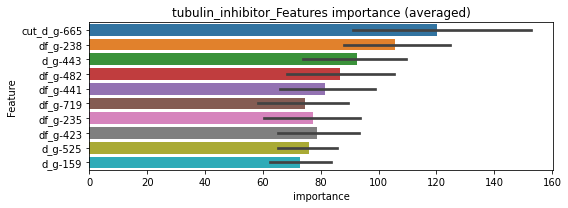

len(train_index) : 2446
len(valid_index) : 816
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2446
len(valid_index) : 816
================================= fold 2/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00277504	valid_1's binary_logloss: 0.0921772
Training until validation scores don't improve for 30 rounds


len(train_index) : 2447
len(valid_index) : 815
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00244475	valid_1's binary_logloss: 0.0803203
Training until validation scores don't improve for 30 rounds


len(train_index) : 2447
len(valid_index) : 815
================================= fold 4/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00966138	valid_1's binary_logloss: 0.116336
Training until validation scores don't improve for 30 rounds


tubulin_inhibitor logloss: 0.09622988707412665


Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00283423	valid_1's binary_logloss: 0.0961108
neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504558	valid_1's binary_logloss: 0.0473331
[600]	training's binary_logloss: 0.000946429	valid_1's binary_logloss: 0.037805
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000857572	valid_1's binary_logloss: 0.037489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500028	valid_1's binary_logloss: 0.0445785
[600]	training's binary_logloss: 0.000948381	valid_1's binary_logloss: 0.0358332
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000858753	valid_1's binary_logloss: 0.0353899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538928	valid_1's binary_logloss: 0.0276537
[600]	training's binary_logloss: 0.000991693	valid_1's binary_logloss: 0.0215039
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00107107	valid_1's binary_logloss:

1 / 3 AUC score:0.999
y_Threshold: 0.0061174, Threshold: 0.0506844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.03548, conf_1:0.06589
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0506844
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.0906844
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_3: 0.1306844
threshold: 0.1306844, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443079	valid_1's binary_logloss: 0.051827
[600]	training's binary_logloss: 0.000876045	valid_1's binary_logloss: 0.0428964
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00092048	valid_1's binary_logloss: 0.0427695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046772	valid_1's binary_logloss: 0.0286067
[600]	training's binary_logloss: 0.000920675	valid_1's binary_logloss: 0.0189159
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000687023	valid_1's binary_logloss: 0.0180743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478088	valid_1's binary_logloss: 0.0350046
[600]	training's binary_logloss: 0.000916949	valid_1's binary_logloss: 0.0260416
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000682639	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0236248, Threshold: 0.1306844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0150678 Vs.target_rate: 0.00307
Num_p_label: 60.0, conf_0:0.10455, conf_1:0.15682
Num_p_label: 60.0, Expected: 12.2, Adj_threshold_1: 0.1306844
Num_p_label: 52.0, Expected: 12.2, Adj_threshold_2: 0.1706844
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_3: 0.2106844
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_4: 0.2506844
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_5: 0.2906844
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_6: 0.3306844
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_7: 0.3706844
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4106844
threshold: 0.4106844, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452421	valid_1's binary_logloss: 0.033977
[600]	training's binary_logloss: 0.000885715	valid_1's binary_logloss: 0.0251828
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.0006575	valid_1's binary_logloss: 0.0247712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443049	valid_1's binary_logloss: 0.0415311
[600]	training's binary_logloss: 0.000879481	valid_1's binary_logloss: 0.0313767
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000811116	valid_1's binary_logloss: 0.0309166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00452944	valid_1's binary_logloss: 0.0382727
[600]	training's binary_logloss: 0.000881126	valid_1's binary_logloss: 0.0303171
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000870423	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0215458, Threshold: 0.4106844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, conf_0:0.36962, conf_1:0.45175
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.4106844
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.4506844
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_3: 0.4906844
threshold: 0.4906844, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 645.0/3783, y_label_rate: 0.1704996


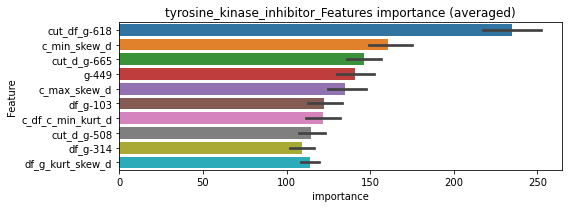

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00100716	valid_1's binary_logloss: 0.0350035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000686958	valid_1's binary_logloss: 0.0183098


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00106993	valid_1's binary_logloss: 0.0240525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000801564	valid_1's binary_logloss: 0.0128021


tyrosine_kinase_inhibitor logloss: 0.02254451668318391


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000673409	valid_1's binary_logloss: 0.00473715
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000261489	valid_1's binary_logloss: 0.00369793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691621	valid_1's binary_logloss: 0.0018389
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000258039	valid_1's binary_logloss: 0.0010578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000707515	valid_1's binary_logloss: 0.000864834
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000265476	valid_1's binary_logloss: 0.0003447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000683582	valid_1's binary_logloss: 0.00281012


1 / 3 AUC score:1.000
y_Threshold: 0.0008944, Threshold: 0.0032114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00225, conf_1:0.00417
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0032114
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0432114
threshold: 0.0432114, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000261295	valid_1's binary_logloss: 0.00195915


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642924	valid_1's binary_logloss: 0.00570388
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000250262	valid_1's binary_logloss: 0.00442521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675951	valid_1's binary_logloss: 0.00154083
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000252914	valid_1's binary_logloss: 0.000819024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680255	valid_1's binary_logloss: 0.000767241
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000256099	valid_1's binary_logloss: 0.000303545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000663347	valid_1's binary_logloss: 0.00339662


2 / 3 AUC score:1.000
y_Threshold: 0.0127887, Threshold: 0.0432114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.03457, conf_1:0.05185
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0432114
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0832114
threshold: 0.0832114, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000262556	valid_1's binary_logloss: 0.00264703


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642924	valid_1's binary_logloss: 0.00570388
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000250262	valid_1's binary_logloss: 0.00442521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675951	valid_1's binary_logloss: 0.00154083
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000252914	valid_1's binary_logloss: 0.000819024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000680255	valid_1's binary_logloss: 0.000767241
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000256099	valid_1's binary_logloss: 0.000303545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000663347	valid_1's binary_logloss: 0.00339662


3 / 3 AUC score:1.000
y_Threshold: 0.0127887, Threshold: 0.0832114, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, conf_0:0.07489, conf_1:0.09153
threshold: 0.0832114, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000262556	valid_1's binary_logloss: 0.00264703


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


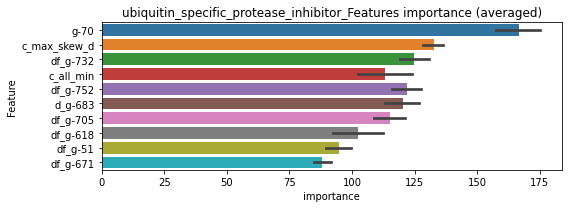

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000265205	valid_1's binary_logloss: 0.00252324


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000265422	valid_1's binary_logloss: 0.000449358
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000267815	valid_1's binary_logloss: 0.000330172
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0013639546609700945


Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000264962	valid_1's binary_logloss: 0.00215205
neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264
target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016472	valid_1's binary_logloss: 0.157286
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00556114	valid_1's binary_logloss: 0.153507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181946	valid_1's binary_logloss: 0.108643
[600]	training's binary_logloss: 0.00280234	valid_1's binary_logloss: 0.0918568
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00245055	valid_1's binary_logloss: 0.0916049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183708	valid_1's binary_logloss: 0.124478
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00814329	valid_1's binary_logloss: 0.117326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181403	valid_1's binary_logloss: 0.135432
[600]	training's binar

1 / 3 AUC score:0.975
y_Threshold: 0.0280879, Threshold: 0.1943104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 226 → Positive_corect_labels: 605/3690
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.13602, conf_1:0.25260
threshold: 0.1943104, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 605.0/3690, y_label_rate: 0.1639566
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119839	valid_1's binary_logloss: 0.100745
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00287189	valid_1's binary_logloss: 0.0888611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120271	valid_1's binary_logloss: 0.100189
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.0021888	valid_1's binary_logloss: 0.0877911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012487	valid_1's binary_logloss: 0.0839678
[600]	training's binary_logloss: 0.00199055	valid_1's binary_logloss: 0.0683279
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00186182	valid_1's binary_logloss: 0.0681852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118346	valid_1's binary_logloss: 0.0780481
[600]	training's bi

2 / 3 AUC score:0.995
y_Threshold: 0.0438015, Threshold: 0.1943104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 584.0/3648
p_label_rate: 0.0168257 Vs.target_rate: 0.00714
Num_p_label: 67.0, conf_0:0.15545, conf_1:0.23317
Num_p_label: 67.0, Expected: 28.4, Adj_threshold_1: 0.1943104
Num_p_label: 51.0, Expected: 28.4, Adj_threshold_2: 0.2343104
Num_p_label: 40.0, Expected: 28.4, Adj_threshold_3: 0.2743104
threshold: 0.2743104, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 584.0/3648, y_label_rate: 0.1600877
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105691	valid_1's binary_logloss: 0.0782901
[600]	training's binary_logloss: 0.00174293	valid_1's binary_logloss: 0.0625005
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00109621	valid_1's binary_logloss: 0.0605956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102248	valid_1's binary_logloss: 0.0849818
[600]	training's binary_logloss: 0.00173746	valid_1's binary_logloss: 0.0687905
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00141368	valid_1's binary_logloss: 0.0677088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100777	valid_1's binary_logloss: 0.0815036
[600]	training's binary_logloss: 0.00169536	valid_1's binary_logloss: 0.0687297
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00162984	valid_1's binary_logloss: 0.068

3 / 3 AUC score:0.998
y_Threshold: 0.0394114, Threshold: 0.2743104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 569.0/3618
p_label_rate: 0.0140633 Vs.target_rate: 0.00714
Num_p_label: 56.0, conf_0:0.24688, conf_1:0.30174
Num_p_label: 56.0, Expected: 28.4, Adj_threshold_1: 0.2743104
Num_p_label: 37.0, Expected: 28.4, Adj_threshold_2: 0.3143104
threshold: 0.3143104, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 569.0/3618, y_label_rate: 0.1572692


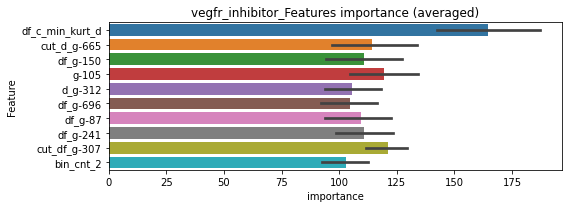

len(train_index) : 2713
len(valid_index) : 905
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2713
len(valid_index) : 905
================================= fold 2/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00768705	valid_1's binary_logloss: 0.115885
Training until validation scores don't improve for 30 rounds


len(train_index) : 2714
len(valid_index) : 904
================================= fold 3/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00209924	valid_1's binary_logloss: 0.0478564
Training until validation scores don't improve for 30 rounds


len(train_index) : 2714
len(valid_index) : 904
================================= fold 4/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00268674	valid_1's binary_logloss: 0.0802835
Training until validation scores don't improve for 30 rounds


vegfr_inhibitor logloss: 0.07609903130330933


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00215447	valid_1's binary_logloss: 0.0603585
neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163147	valid_1's binary_logloss: 0.00453002
[600]	training's binary_logloss: 0.000399696	valid_1's binary_logloss: 0.00178722
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000394268	valid_1's binary_logloss: 0.00176805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016296	valid_1's binary_logloss: 0.00589232
[600]	training's binary_logloss: 0.000396292	valid_1's binary_logloss: 0.0029869
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000396292	valid_1's binary_logloss: 0.0029869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162774	valid_1's binary_logloss: 0.00438303
[600]	training's binary_logloss: 0.000399441	valid_1's binary_logloss: 0.00193905
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00039884	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0025171, Threshold: 0.0123693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00866, conf_1:0.01608
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0123693
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_2: 0.0523693


[600]	training's binary_logloss: 0.000396426	valid_1's binary_logloss: 0.00585312
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000404584	valid_1's binary_logloss: 0.00581785


threshold: 0.0523693, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155698	valid_1's binary_logloss: 0.00511139
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000405121	valid_1's binary_logloss: 0.00218218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152284	valid_1's binary_logloss: 0.00439238
[600]	training's binary_logloss: 0.000385548	valid_1's binary_logloss: 0.00203498
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000385548	valid_1's binary_logloss: 0.00203498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156842	valid_1's binary_logloss: 0.00456546
[600]	training's binary_logloss: 0.000396864	valid_1's binary_logloss: 0.00232491
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000399376	valid_1's binary_logloss: 0.00231521
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0456142, Threshold: 0.0523693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, conf_0:0.04190, conf_1:0.06284
Num_p_label: 30.0, Expected: 4.3, Adj_threshold_1: 0.0523693
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_2: 0.0923693
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1323693
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_4: 0.1723693


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000413387	valid_1's binary_logloss: 0.00649823


threshold: 0.1723693, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155698	valid_1's binary_logloss: 0.00511139
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000405121	valid_1's binary_logloss: 0.00218218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152284	valid_1's binary_logloss: 0.00439238
[600]	training's binary_logloss: 0.000385548	valid_1's binary_logloss: 0.00203498
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000385548	valid_1's binary_logloss: 0.00203498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156842	valid_1's binary_logloss: 0.00456546
[600]	training's binary_logloss: 0.000396864	valid_1's binary_logloss: 0.00232491
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000399376	valid_1's binary_logloss: 0.00231521
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0456142, Threshold: 0.1723693, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.15513, conf_1:0.18961
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.1723693


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000413387	valid_1's binary_logloss: 0.00649823


threshold: 0.1723693, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


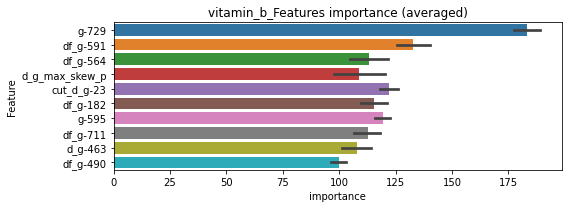

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000400231	valid_1's binary_logloss: 0.00184284


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000399487	valid_1's binary_logloss: 0.00138181


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000391649	valid_1's binary_logloss: 0.00183445


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000404044	valid_1's binary_logloss: 0.00361878


vitamin_b logloss: 0.0021693743462551473


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284
target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259526	valid_1's binary_logloss: 0.0140464
[600]	training's binary_logloss: 0.000534627	valid_1's binary_logloss: 0.00872935
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000513495	valid_1's binary_logloss: 0.00865494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267186	valid_1's binary_logloss: 0.0106939
[600]	training's binary_logloss: 0.000538321	valid_1's binary_logloss: 0.005473
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000489317	valid_1's binary_logloss: 0.00534884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027453	valid_1's binary_logloss: 0.00638343
[600]	training's binary_logloss: 0.000551198	valid_1's binary_logloss: 0.00211434
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000503473	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0034884, Threshold: 0.0164665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, conf_0:0.01153, conf_1:0.02141
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0164665
Num_p_label: 7.0, Expected: 6.5, Adj_threshold_2: 0.0564665
threshold: 0.0564665, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240181	valid_1's binary_logloss: 0.0112095
[600]	training's binary_logloss: 0.000514301	valid_1's binary_logloss: 0.00683166
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000485619	valid_1's binary_logloss: 0.0067076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243234	valid_1's binary_logloss: 0.0107394
[600]	training's binary_logloss: 0.000521756	valid_1's binary_logloss: 0.00596098
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000509283	valid_1's binary_logloss: 0.00591068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257329	valid_1's binary_logloss: 0.00592116
[600]	training's binary_logloss: 0.000538339	valid_1's binary_logloss: 0.00191548
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000526522	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0422083, Threshold: 0.0564665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00164
Num_p_label: 34.0, conf_0:0.04517, conf_1:0.06776
Num_p_label: 34.0, Expected: 6.5, Adj_threshold_1: 0.0564665
Num_p_label: 20.0, Expected: 6.5, Adj_threshold_2: 0.0964665
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_3: 0.1364665
threshold: 0.1364665, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240181	valid_1's binary_logloss: 0.0112095
[600]	training's binary_logloss: 0.000514301	valid_1's binary_logloss: 0.00683166
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000485619	valid_1's binary_logloss: 0.0067076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243234	valid_1's binary_logloss: 0.0107394
[600]	training's binary_logloss: 0.000521756	valid_1's binary_logloss: 0.00596098
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000509283	valid_1's binary_logloss: 0.00591068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257329	valid_1's binary_logloss: 0.00592116
[600]	training's binary_logloss: 0.000538339	valid_1's binary_logloss: 0.00191548
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000526522	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0422083, Threshold: 0.1364665, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00164
Num_p_label: 13.0, conf_0:0.12282, conf_1:0.15011
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_1: 0.1364665
threshold: 0.1364665, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


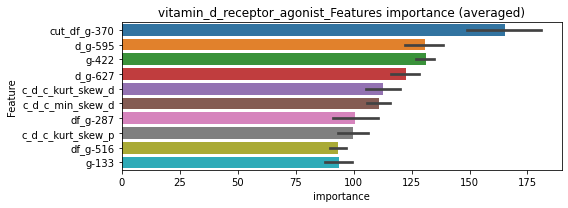

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000583796	valid_1's binary_logloss: 0.00748


len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047937	valid_1's binary_logloss: 0.00475988
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.00047937	valid_1's binary_logloss: 0.00475988


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000495306	valid_1's binary_logloss: 0.00182817


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000499061	valid_1's binary_logloss: 0.00432068


vitamin_d_receptor_agonist logloss: 0.004597229307010574


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195976	valid_1's binary_logloss: 0.00682429
[600]	training's binary_logloss: 0.000435614	valid_1's binary_logloss: 0.00305294
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00041975	valid_1's binary_logloss: 0.00299819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192363	valid_1's binary_logloss: 0.0111081
[600]	training's binary_logloss: 0.000426583	valid_1's binary_logloss: 0.006676
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000410253	valid_1's binary_logloss: 0.00665207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209155	valid_1's binary_logloss: 0.00409746
[600]	training's binary_logloss: 0.00044241	valid_1's binary_logloss: 0.00130906
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00041404	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0025390, Threshold: 0.0121981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00854, conf_1:0.01586
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0121981
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0521981
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.0921981
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_4: 0.1321981
threshold: 0.1321981, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188653	valid_1's binary_logloss: 0.00577699
[600]	training's binary_logloss: 0.000421633	valid_1's binary_logloss: 0.00261873
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000406131	valid_1's binary_logloss: 0.00256754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188234	valid_1's binary_logloss: 0.00924225
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000444282	valid_1's binary_logloss: 0.00576827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190509	valid_1's binary_logloss: 0.00368862
[600]	training's binary_logloss: 0.000423065	valid_1's binary_logloss: 0.00122241
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413978	valid_1's binary_logloss: 0.00120054
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0320409, Threshold: 0.1321981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00044419	valid_1's binary_logloss: 0.00373735


p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, conf_0:0.10576, conf_1:0.15864
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.1321981
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1721981
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.2121981
threshold: 0.2121981, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188653	valid_1's binary_logloss: 0.00577699
[600]	training's binary_logloss: 0.000421633	valid_1's binary_logloss: 0.00261873
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000406131	valid_1's binary_logloss: 0.00256754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188234	valid_1's binary_logloss: 0.00924225
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000444282	valid_1's binary_logloss: 0.00576827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190509	valid_1's binary_logloss: 0.00368862
[600]	training's binary_logloss: 0.000423065	valid_1's binary_logloss: 0.00122241
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413978	valid_1's binary_logloss: 0.00120054
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0320409, Threshold: 0.2121981, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00044419	valid_1's binary_logloss: 0.00373735


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, conf_0:0.19098, conf_1:0.23342
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.2121981
threshold: 0.2121981, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


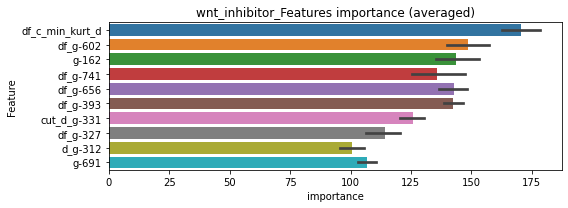

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000425473	valid_1's binary_logloss: 0.00218833


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000409517	valid_1's binary_logloss: 0.00423753


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000423775	valid_1's binary_logloss: 0.00107667


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000412404	valid_1's binary_logloss: 0.00323683


wnt_inhibitor logloss: 0.0026848382582003467


CV:0.021389872083449734


In [49]:
RUN()